In [27]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(5, 8, 5,dilation=4,padding="same")
        torch.nn.init.xavier_uniform_(self.conv1.weight)
        self.pool = nn.MaxPool2d(3, 2)
        self.pool2 = nn.AvgPool2d(3, 2)
        
        self.conv2 = nn.Conv2d(8, 16, 5,dilation=3,padding="same")
        torch.nn.init.xavier_uniform_(self.conv2.weight)
        
        self.conv3 = nn.Conv2d(16, 24, 3,dilation=2)
        self.conv4 = nn.Conv2d(24, 48, 2)
        self.conv5 = nn.Conv2d(48, 64, 2)
        self.conv6 = nn.Conv2d(64, 128, 1)
        
        self.fc1 = nn.Linear(1152, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 16)
        self.fc6 = nn.Linear(16, 8)
        
        self.batch1=nn.BatchNorm2d(8)
        self.batch2=nn.BatchNorm2d(16)
        self.batch3=nn.BatchNorm2d(24)
        self.batch4=nn.BatchNorm2d(64)
        
        self.dropout1=nn.Dropout2d(p=0.2)
        

    def forward(self, x):
        x = self.dropout1(self.batch1(F.relu(self.conv1(x))))
        x = self.pool(self.batch2(F.relu(self.conv2(x))))
        x = self.pool2(self.batch3(F.relu(self.conv3(x))))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = F.relu(self.conv6(x))
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        x = self.fc6(x)
        return x


net = Net().to(device)

In [3]:
df = pd.read_parquet("data/F_BTCUSDT_1m.parquet")
tc = ["Open",
"High",
"Low",
"Close",
"Volume"]
for i in tc:
    df[i]=df[i].astype("float")

In [4]:
df

OpenTime      Open      High       Low     Close    Volume  \
0       2019-10-01 00:00:00   8209.67   8216.04   8209.22   8211.91     3.282   
1       2019-10-01 00:01:00   8215.93   8216.90   8210.87   8215.00     2.821   
2       2019-10-01 00:02:00   8215.00   8215.00   8213.00   8214.58     1.241   
3       2019-10-01 00:03:00   8214.31   8215.00   8213.04   8214.72     0.548   
4       2019-10-01 00:04:00   8214.72   8215.00   8214.72   8215.00     1.055   
...                     ...       ...       ...       ...       ...       ...   
1583995 2022-10-04 23:55:00  20357.50  20375.00  20355.20  20355.30   954.064   
1583996 2022-10-04 23:56:00  20355.20  20370.70  20353.30  20353.30   371.426   
1583997 2022-10-04 23:57:00  20353.40  20355.30  20323.50  20330.00  1098.885   
1583998 2022-10-04 23:58:00  20329.90  20360.40  20329.90  20344.00   595.273   
1583999 2022-10-04 23:59:00  20344.10  20344.10  20322.70  20322.70   337.727   

             CloseTime      QuoteAsset  NumberOfTrades  \
0        1569877259999     26949.57673              33   
1        1569877319999     23173.71997              18   
2        1569877379999     10192.89112              27   
3        1569877439999      4501.69900              23   
4        1569877499999      8666.78673              17   
...                ...             ...             ...   
1583995  1664916959999  19430279.00560            5093   
1583996  1664917019999   7562153.35400            3115   
1583997  1664917079999  22345525.97800            6736   
1583998  1664917139999  12111296.57470            3793   
1583999  1664917199999   6866758.18540            2858   

        TakerBuybaseassetvolume TakerBuyquoteassetvolume Ignore  
0                         1.650              13550.96373      0  
1                         2.711              22270.40007      0  
2                         0.400               3285.73147      0  
3                         0.361               2965.55218      0  
4                         0.948               7787.78280      0  
...                         ...                      ...    ...  
1583995                 509.076           10367821.83960      0  
1583996                 163.501            3328771.53970      0  
1583997                 442.725            9001848.01150      0  
1583998                 384.144            7815856.88280      0  
1583999                 101.121            2056048.84150      0  

[1584000 rows x 12 columns]

In [28]:


from comet_ml.integration.pytorch import load_model
model = Net()

# Load the model state dict from a Comet Experiment
checkpoint = load_model("experiment://c9d790db2d0544c7a0fcd25ae43ecb90/4_layer_w_volume_classic_CNN_mse_target3")
model.load_state_dict(checkpoint['model_state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
model.to(device)



Net(
  (conv1): Conv2d(5, 8, kernel_size=(5, 5), stride=(1, 1), padding=same, dilation=(4, 4))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): AvgPool2d(kernel_size=3, stride=2, padding=0)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=same, dilation=(3, 3))
  (conv3): Conv2d(16, 24, kernel_size=(3, 3), stride=(1, 1), dilation=(2, 2))
  (conv4): Conv2d(24, 48, kernel_size=(2, 2), stride=(1, 1))
  (conv5): Conv2d(48, 64, kernel_size=(2, 2), stride=(1, 1))
  (conv6): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
  (fc1): Linear(in_features=1152, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=16, bias=True)
  (fc6): Linear(in_features=16, out_features=8, bias=True)
  (batch1): BatchNorm2d(8, eps=1e-05, momen

In [9]:
import os
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
class HilbertImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.img_labels = pd.read_parquet(os.path.join(self.img_dir, annotations_file))
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, -1])
        image = np.load(img_path)
        label = self.img_labels.iloc[idx, :-1].values.astype("float64")
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
train_ds = HilbertImageDataset(annotations_file="target_line_3.parquet",img_dir="imgs/train_4layer_w_volume/")
test_ds = HilbertImageDataset(annotations_file="target_line_3.parquet",img_dir="imgs/test_4layer_w_volume/")
trainloader = DataLoader(train_ds, batch_size=64, shuffle=True)
testloader = DataLoader(test_ds, batch_size=64, shuffle=True)

In [6]:
dataiter = iter(testloader)
cols = list(pd.concat([pd.read_parquet("imgs/train_4layer_w_volume/target_line_3.parquet"),
pd.read_parquet("imgs/test_4layer_w_volume/target_line_3.parquet")]).iloc[:,:-1].columns)
fcs = [[i+"_target",i+"_pred"] for i in cols]
fullcols = [item for sublist in fcs for item in sublist]
tl = []
for images, labels in dataiter:
    images = images.float().to(device)
    labels = labels.float().to(device)
    outputs = model(images)
    evaldf = pd.DataFrame(labels.cpu(),columns=[i+"_target" for i in cols]).join(pd.DataFrame(outputs.cpu().tolist(),columns=[i+"_pred" for i in cols]))
    tl.append(evaldf[fullcols])
tf = pd.concat(tl)

In [29]:
ohlc_mean,ohlc_std,vol_mean,vol_std = 27993.054512542625, 17832.786089817815, 248.04630290656564, 426.867918968892

In [179]:
data = np.array(range(32*32))
locs = decode(data, 2, 5)

position_history = []
output_history=[]
verbose = 1
open_position=False
profit_margin=1.0
current_position={}
margin=1
odf_s  =np.array([odf.iloc[:,range(0,8,2)].values.std() if not i%2 else odf.iloc[:,range(1,9,2)].values.std() for i in range(8)])
odf_m = np.array([odf.iloc[:,range(0,8,2)].values.mean() if not i%2 else odf.iloc[:,range(1,9,2)].values.mean() for i in range(8)])

for i in tqdm(range(1424680,len(df))):
    if verbose>0:
        print(profit_margin)
    current_ts = df.iloc[i]
    if not open_position:
        pos_dict_open = {}
        temp_f = df.iloc[i-32*32:i]
        lv = temp_f.Close.iloc[-1]
        o1 = np.zeros((5,32,32))
        vals = temp_f[["Open","High","Low","Close","Volume"]].values
        for j in range(len(data)):
            o1[:,locs[j][0],locs[j][1]] = vals[j]
        ohlc = o1[:4,:,:]
        vol = o1[-1:,:,:]
        ohlc = (ohlc-ohlc_mean)/ohlc_std
        vol = (vol-vol_mean)/vol_std
        on1 = torch.Tensor(np.concatenate((ohlc,vol),axis=0).reshape((1,*o1.shape)))
        output=model(on1.to(device)).tolist()[0]
        output_history.append(output)
        short = min(output[::2])
        long = max(output[1::2])
        short_index = output.index(short)//2
        long_index = output.index(long)//2
        norm_max = np.abs((np.array(output) - odf_m)/odf_s).argmax()
        if norm_max%2:
            low_slope=0
            high_slope=1
        else:
            low_slope=1
            high_slope=0
        #low_slope = ((-((output[2]/output[0])-1)) + (-((output[4]/output[2])-1)) + (-((output[6]/output[4])-1)))/3
        #high_slope = ((((output[3]/output[1])-1)) + (((output[5]/output[3])-1)) + (((output[7]/output[5])-1)))/3

        print(low_slope,high_slope)

        
        if abs(low_slope)<abs(high_slope):
            print(i)
            open_position=True
            long=long*1.25
            if long_index==0:
                stop_loss=output[0]/5
            else:
                stop_loss = min(output[::2][:long_index])/5
            pos_dict_open["status"]="Opened"
            pos_dict_open["time"]=current_ts["OpenTime"]
            pos_dict_open["price"]=current_ts["Close"]
            pos_dict_open["type"]="long"
            current_position["type"]="long"
            pos_dict_open["take_profit"]=lv*(1+long)
            current_position["take_profit"]=lv*(1+long)
            pos_dict_open["stop_loss"]=lv*(1+(stop_loss))
            current_position["stop_loss"]=lv*(1+(stop_loss))
            pos_dict_open["take_profit_ratio"]=(1+long*margin)
            current_position["take_profit_ratio"]=(1+long*margin)
            pos_dict_open["stop_loss_ratio"]=(1+(stop_loss)*margin)
            current_position["stop_loss_ratio"]=(1+(stop_loss)*margin)
            pos_dict_open["result"]=None
            if verbose==2:
                print("\nOpened Position",pos_dict_open)
        
        elif abs(high_slope)<abs(low_slope):
            print(i)
            open_position=True
            short=short*1.25
            
            if short_index == 0:
                stop_loss = output[1]/6
            else:
                stop_loss = max(output[1::2][:short_index])/6
            
            pos_dict_open["status"]="Opened"
            pos_dict_open["time"]=current_ts["OpenTime"]
            pos_dict_open["price"]=current_ts["Close"]
            pos_dict_open["type"]="short"
            current_position["type"]="short"
            pos_dict_open["take_profit"]=lv*(1+short)
            current_position["take_profit"]=lv*(1+short)
            pos_dict_open["stop_loss"]=lv*(1+(stop_loss))
            current_position["stop_loss"]=lv*(1+(stop_loss))
            pos_dict_open["take_profit_ratio"]=(1-short*margin)
            current_position["take_profit_ratio"]=(1-short*margin)
            pos_dict_open["stop_loss_ratio"]=(1-(stop_loss)*margin)
            current_position["stop_loss_ratio"]=(1-(stop_loss)*margin)
            pos_dict_open["result"]=None
            if verbose==2:
                print("\nOpened Position",pos_dict_open)

        position_history.append(pos_dict_open)
        
        #print(current_position)
        continue #skip current candle
    elif open_position:
        pos_dict_closed={}
        current = df.iloc[i]
        if current_position["type"]=="long":
            if current.Low<current_position["stop_loss"]:
                pos_dict_closed["status"]="Closed"
                pos_dict_closed["time"]=current_ts["OpenTime"]
                pos_dict_closed["price"]=current_ts["Low"]
                pos_dict_closed["result"] = "loss"
                profit_margin*=current_position["stop_loss_ratio"]*0.99985

                open_position=False
            elif current.High>current_position["take_profit"]:
                pos_dict_closed["status"]="Closed"
                pos_dict_closed["time"]=current_ts["OpenTime"]
                pos_dict_closed["price"]=current_ts["High"]
                pos_dict_closed["result"] = "profit"
                profit_margin*=current_position["take_profit_ratio"]*0.99985
                open_position=False
        elif current_position["type"]=="short":
            if current.High>current_position["stop_loss"]:
                pos_dict_closed["status"]="Closed"
                pos_dict_closed["time"]=current_ts["OpenTime"]
                pos_dict_closed["price"]=current_ts["High"]
                pos_dict_closed["result"] = "loss"
                profit_margin*=current_position["stop_loss_ratio"]*0.99985
                open_position=False
            elif current.Low<current_position["take_profit"]:
                pos_dict_closed["status"]="Closed"
                pos_dict_closed["time"]=current_ts["OpenTime"]
                pos_dict_closed["price"]=current_ts["Low"]
                pos_dict_closed["result"] = "profit"
                profit_margin*=current_position["take_profit_ratio"]*0.99985

                open_position=False
        else:
            print("Error")
            break
        
        if not open_position:
            pos_dict_closed["type"] = current_position["type"]
            pos_dict_closed["take_profit"] = current_position["take_profit"]
            pos_dict_closed["stop_loss"] = current_position["stop_loss"]
            pos_dict_closed["take_profit_ratio"] = current_position["take_profit_ratio"]
            pos_dict_closed["stop_loss_ratio"] = current_position["stop_loss_ratio"]
            position_history.append(pos_dict_closed)
            if verbose==2:
                print("\nClosed Position", pos_dict_closed)
        
                
        

  #  if i>=1424681+1440*90:
   #     break


  0%|                                     | 184/159320 [00:00<02:49, 939.90it/s]

1.0
0 1
1424680
1.0
0.9996613804346556
0 1
1424682
0.9996613804346556
0.9993152524719031
0 1
1424684
0.9993152524719031
0.9993152524719031
0.9989868775354249
0 1
1424687
0.9989868775354249
0.9986614876406016
0 1
1424689
0.9986614876406016
0.9983289678030218
0 1
1424691
0.9983289678030218
0.9979434258610604
1 0
1424693
0.9979434258610604
0.9973792041531414
0 1
1424695
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9973792041531414
0.9969749735248834
1 0
1424713
0.9969749735248834
0.9964277851339839
0 1
1424715
0.9964277851339839
0.9964277851339839
0.9960249987932774
1 0
1424718
0.9960249987932774
0.9954781422020875
0 1
1424720
0.9954781422020875
0.9950139904097552
0 1
1424722
0.9950139904097552
0.994708951359827
0 1
1424724
0.994708

  0%|                                    | 466/159320 [00:00<02:05, 1266.27it/s]

1 0
1424866
1.0006756816273512
1.0006756816273512
0.9999065166456662
1 0
1424869
0.9999065166456662
0.9993058108440918
1 0
1424871
0.9993058108440918
0.9986746502007872
1 0
1424873
0.9986746502007872
0.9981219450723028
1 0
1424875
0.9981219450723028
0.9981219450723028
0.9974944481020143
1 0
1424878
0.9974944481020143
0.9974944481020143
1.000121474546747
1 0
1424881
1.000121474546747
1.0028238104795768
1 0
1424883
1.0028238104795768
1.0028238104795768
1.0072744514110672
1 0
1424886
1.0072744514110672
1.0102841718034932
1 0
1424888
1.0102841718034932
1.009420745310479
1 0
1424890
1.009420745310479
1.009420745310479
1.009420745310479
1.009420745310479
1.0083911194953914
1 0
1424895
1.0083911194953914
1.0106506270539306
1 0
1424897
1.0106506270539306
1.0099402506115756
1 0
1424899
1.0099402506115756
1.01244126384912
0 1
1424901
1.01244126384912
1.0120091354633394
1 0
1424903
1.0120091354633394
1.0120091354633394
1.0144123186422516
1 0
1424906
1.0144123186422516
1.013644965816687
1 0
142490

  0%|▏                                   | 642/159320 [00:00<01:50, 1437.80it/s]

1 0
1425149
1.0278895191885844
1.0272042862327213
1 0
1425151
1.0272042862327213
1.0316628947596929
1 0
1425153
1.0316628947596929
1.035041267149192
1 0
1425155
1.035041267149192
1.0330230231678978
1 0
1425157
1.0330230231678978
1.0330230231678978
1.0330230231678978
1.0330230231678978
1.0330230231678978
1.0330230231678978
1.0330230231678978
1.0330230231678978
1.0330230231678978
1.0330230231678978
1.0313425045042102
1 0
1425168
1.0313425045042102
1.0293199110849334
1 0
1425170
1.0293199110849334
1.0293199110849334
1.0361495631232185
1 0
1425173
1.0361495631232185
1.0361495631232185
1.0361495631232185
1.0361495631232185
1.0361495631232185
1.0348087693583004
1 0
1425179
1.0348087693583004
1.0348087693583004
1.0348087693583004
1.0348087693583004
1.0348087693583004
1.0348087693583004
1.0465684898112453
1 0
1425186
1.0465684898112453
1.044731363200098
1 0
1425188
1.044731363200098
1.044731363200098
1.0426452279447345
1 0
1425191
1.0426452279447345
1.0426452279447345
1.040858084978088
1 0
142

  1%|▏                                   | 925/159320 [00:00<02:01, 1306.95it/s]

1 0
1425460
1.0433034689510274
1.0425753871176604
1 0
1425462
1.0425753871176604
1.0418159335663557
1 0
1425464
1.0418159335663557
1.0418159335663557
1.0418159335663557
1.0418159335663557
1.0451232586730077
1 0
1425469
1.0451232586730077
1.0443367707403834
1 0
1425471
1.0443367707403834
1.0443367707403834
1.0443367707403834
1.0443367707403834
1.0443367707403834
1.0435502688976739
1 0
1425477
1.0435502688976739
1.0435502688976739
1.0428694112622767
1 0
1425480
1.0428694112622767
1.042152516454033
1 0
1425482
1.042152516454033
1.042152516454033
1.041515518325866
1 0
1425485
1.041515518325866
1.0440259117957984
1 0
1425487
1.0440259117957984
1.0440259117957984
1.0433271150644794
0 1
1425490
1.0433271150644794
1.0428915049392442
1 0
1425492
1.0428915049392442
1.0455878880251004
1 0
1425494
1.0455878880251004
1.0447714281308158
1 0
1425496
1.0447714281308158
1.0440171208798112
1 0
1425498
1.0440171208798112
1.0432936825035406
1 0
1425500
1.0432936825035406
1.04267945685325
1 0
1425502
1.042

  1%|▎                                  | 1189/159320 [00:00<02:01, 1306.24it/s]

0 1
1425706
1.0379609722845138
1.0375427655780942
1 0
1425708
1.0375427655780942
1.0368961778860193
1 0
1425710
1.0368961778860193
1.0393910331636047
1 0
1425712
1.0393910331636047
1.037970476310042
1 0
1425714
1.037970476310042
1.0401378537853696
1 0
1425716
1.0401378537853696
1.039409245178709
1 0
1425718
1.039409245178709
1.042319841061051
1 0
1425720
1.042319841061051
1.041634370882167
1 0
1425722
1.041634370882167
1.041634370882167
1.041634370882167
1.041634370882167
1.041634370882167
1.041634370882167
1.041634370882167
1.041634370882167
1.041634370882167
1.0494602549074954
1 0
1425732
1.0494602549074954
1.0494602549074954
1.0494602549074954
1.0494602549074954
1.0480249989084145
1 0
1425737
1.0480249989084145
1.0480249989084145
1.0480249989084145
1.0480249989084145
1.0480249989084145
1.0480249989084145
1.0480249989084145
1.0480249989084145
1.0480249989084145
1.0480249989084145
1.0480249989084145
1.0480249989084145
1.046812529196828
1 0
1425750
1.046812529196828
1.0460033674121367


  1%|▎                                  | 1464/159320 [00:01<02:03, 1276.00it/s]

1 0
1425958
1.0651995121417066
1.0646138194589014
1 0
1425960
1.0646138194589014
1.0639719161636965
1 0
1425962
1.0639719161636965
1.0639719161636965
1.0632876068264077
1 0
1425965
1.0632876068264077
1.0625329051006036
1 0
1425967
1.0625329051006036
1.0625329051006036
1.0625329051006036
1.0646399023791482
1 0
1425971
1.0646399023791482
1.0639711351198542
1 0
1425973
1.0639711351198542
1.0633271637496935
1 0
1425975
1.0633271637496935
1.0626487798682225
1 0
1425977
1.0626487798682225
1.0619215512475693
1 0
1425979
1.0619215512475693
1.0619215512475693
1.0646706380236173
1 0
1425982
1.0646706380236173
1.064086499433995
1 0
1425984
1.064086499433995
1.064086499433995
1.066439087776311
1 0
1425987
1.066439087776311
1.0657672915415453
1 0
1425989
1.0657672915415453
1.064978330864769
1 0
1425991
1.064978330864769
1.064978330864769
1.0643993968448104
1 0
1425994
1.0643993968448104
1.0637467297603027
1 0
1425996
1.0637467297603027
1.0631684610425434
1 0
1425998
1.0631684610425434
1.06258318683

  1%|▍                                  | 1721/159320 [00:01<02:07, 1238.25it/s]

1 0
1426208
1.0737553481553306
1.0737553481553306
1.0737553481553306
1.0737553481553306
1.0761998661549992
1 0
1426213
1.0761998661549992
1.0750537582222288
1 0
1426215
1.0750537582222288
1.0750537582222288
1.0750537582222288
1.0743382731899322
1 0
1426219
1.0743382731899322
1.0736639597454196
1 0
1426221
1.0736639597454196
1.0729635510220674
1 0
1426223
1.0729635510220674
1.0721897387097272
1 0
1426225
1.0721897387097272
1.0721897387097272
1.0721897387097272
1.0721897387097272
1.0721897387097272
1.0721897387097272
1.0721897387097272
1.0781729600124357
1 0
1426233
1.0781729600124357
1.0781729600124357
1.0781729600124357
1.0781729600124357
1.080291279701168
1 0
1426238
1.080291279701168
1.0794627053550347
1 0
1426240
1.0794627053550347
1.0794627053550347
1.0787434450194324
1 0
1426243
1.0787434450194324
1.0780763440019034
1 0
1426245
1.0780763440019034
1.0780763440019034
1.0780763440019034
1.08114932903861
1 0
1426249
1.08114932903861
1.080483477136495
1 0
1426251
1.080483477136495
1.07

  1%|▍                                  | 1995/159320 [00:01<02:02, 1283.59it/s]

1 0
1426454
1.113341076355053
1.113341076355053
1.113341076355053
1.1166504995930502
1 0
1426458
1.1166504995930502
1.1166504995930502
1.1166504995930502
1.1159599160872062
1 0
1426462
1.1159599160872062
1.115321500793565
0 1
1426464
1.115321500793565
1.114800872810729
0 1
1426466
1.114800872810729
1.114800872810729
1.1143500039460414
1 0
1426469
1.1143500039460414
1.113656852914135
1 0
1426471
1.113656852914135
1.1130505664301453
1 0
1426473
1.1130505664301453
1.1124086514654616
1 0
1426475
1.1124086514654616
1.1146094427330115
0 1
1426477
1.1146094427330115
1.1146094427330115
1.1146094427330115
1.1146094427330115
1.1142036360746463
0 1
1426482
1.1142036360746463
1.1137592151405757
1 0
1426484
1.1137592151405757
1.1131161848662685
0 1
1426486
1.1131161848662685
1.1126443816694644
0 1
1426488
1.1126443816694644
1.1121853905960084
1 0
1426490
1.1121853905960084
1.1114316180915755
1 0
1426492
1.1114316180915755
1.1114316180915755
1.1143796040108664
1 0
1426495
1.1143796040108664
1.113660

  1%|▍                                  | 2250/159320 [00:01<02:07, 1227.48it/s]

1 0
1426715
1.1023372520285868
1.1023372520285868
1.1014618098322368
1 0
1426718
1.1014618098322368
1.1006936665571239
1 0
1426720
1.1006936665571239
1.0998993525252898
1 0
1426722
1.0998993525252898
1.0998993525252898
1.0998993525252898
1.10296969874534
1 0
1426726
1.10296969874534
1.10296969874534
1.1021220479927765
1 0
1426729
1.1021220479927765
1.1021220479927765
1.104566401816311
1 0
1426732
1.104566401816311
1.103836791242112
1 0
1426734
1.103836791242112
1.103836791242112
1.103836791242112
1.1031728660440356
1 0
1426738
1.1031728660440356
1.1025538868631912
1 0
1426740
1.1025538868631912
1.1049499717397226
1 0
1426742
1.1049499717397226
1.1040253013490473
1 0
1426744
1.1040253013490473
1.1062544764350273
1 0
1426746
1.1062544764350273
1.1056238867174164
0 1
1426748
1.1056238867174164
1.1051195494585924
0 1
1426750
1.1051195494585924
1.1051195494585924
1.1051195494585924
1.1098722190923844
1 0
1426754
1.1098722190923844
1.112677133644264
1 0
1426756
1.112677133644264
1.1119149808

  2%|▌                                  | 2599/159320 [00:02<01:46, 1474.38it/s]

0 1
1426969
1.1180700267930774
1.117711080502271
0 1
1426971
1.117711080502271
1.117204881113948
0 1
1426973
1.117204881113948
1.116724803345462
0 1
1426975
1.116724803345462
1.1164265198391699
0 1
1426977
1.1164265198391699
1.116032970799021
0 1
1426979
1.116032970799021
1.1156085709375332
0 1
1426981
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1156085709375332
1.1191495143378705
0 1
1427002
1.1191495143378705
1.1191495143378705
1.1191495143378705
1.1191495143378705
1.1191495143378705
1.1191495143378705
1.1191495143378705
1.1191495143378705
1.1191495143378705
1.1191495143378705
1.1191495143378705
1.1233422488735938
0 1
1427014
1.1233422488735938
1.1228698973043378
0 1
142

  2%|▌                                  | 2748/159320 [00:02<01:57, 1335.71it/s]

0 1
1427306
1.1375067267779593
1.1370329772850405
0 1
1427308
1.1370329772850405
1.1367243476915543
0 1
1427310
1.1367243476915543
1.1362702261832966
0 1
1427312
1.1362702261832966
1.1359628675213087
0 1
1427314
1.1359628675213087
1.1359628675213087
1.1355111056146037
0 1
1427317
1.1355111056146037
1.1350283230684886
0 1
1427319
1.1350283230684886
1.134634770068064
0 1
1427321
1.134634770068064
1.134245199693828
0 1
1427323
1.134245199693828
1.1338735733921552
0 1
1427325
1.1338735733921552
1.1338735733921552
1.1338735733921552
1.1338735733921552
1.1338735733921552
1.1338735733921552
1.1379969222040858
0 1
1427332
1.1379969222040858
1.137520475331534
0 1
1427334
1.137520475331534
1.137062120608827
0 1
1427336
1.137062120608827
1.1365639596414459
0 1
1427338
1.1365639596414459
1.136076280580474
0 1
1427340
1.136076280580474
1.135587399753721
0 1
1427342
1.135587399753721
1.1351547016938839
0 1
1427344
1.1351547016938839
1.1346290057388264
1 0
1427346
1.1346290057388264
1.133931722666985

  2%|▋                                  | 3072/159320 [00:02<01:56, 1338.67it/s]

0 1
1427576
1.1319235045997944
1.1319235045997944
1.1316223286648683
0 1
1427579
1.1316223286648683
1.131293505084672
1 0
1427581
1.131293505084672
1.131293505084672
1.1305792784672195
0 1
1427584
1.1305792784672195
1.1305792784672195
1.1305792784672195
1.1305792784672195
1.1305792784672195
1.1305792784672195
1.1305792784672195
1.1305792784672195
1.1305792784672195
1.1305792784672195
1.1305792784672195
1.1305792784672195
1.1305792784672195
1.1305792784672195
1.1305792784672195
1.1305792784672195
1.1302709628517933
0 1
1427601
1.1302709628517933
1.1300083511343373
0 1
1427603
1.1300083511343373
1.1296489729010144
0 1
1427605
1.1296489729010144
1.1296489729010144
1.1296489729010144
1.1293821852953665
0 1
1427609
1.1293821852953665
1.1291297215399985
0 1
1427611
1.1291297215399985
1.1288788435202477
0 1
1427613
1.1288788435202477
1.1288788435202477
1.1288788435202477
1.1286456111642917
0 1
1427617
1.1286456111642917
1.128385485239295
0 1
1427619
1.128385485239295
1.128385485239295
1.12838

  2%|▋                                  | 3357/159320 [00:02<01:53, 1372.23it/s]

1 0
1427830
1.1640306914620118
1.1640306914620118
1.1640306914620118
1.1640306914620118
1.1673581381986902
1 0
1427835
1.1673581381986902
1.16650424747094
1 0
1427837
1.16650424747094
1.1651286515765205
1 0
1427839
1.1651286515765205
1.164217461630232
1 0
1427841
1.164217461630232
1.1633100880573697
1 0
1427843
1.1633100880573697
1.1623687480574616
1 0
1427845
1.1623687480574616
1.16086497213344
1 0
1427847
1.16086497213344
1.16086497213344
1.16086497213344
1.16086497213344
1.1596883784578933
1 0
1427852
1.1596883784578933
1.164791757719113
1 0
1427854
1.164791757719113
1.1635471298997535
1 0
1427856
1.1635471298997535
1.1618967514367509
1 0
1427858
1.1618967514367509
1.1607998269479676
1 0
1427860
1.1607998269479676
1.1607998269479676
1.1607998269479676
1.159100168027804
1 0
1427864
1.159100168027804
1.159100168027804
1.159100168027804
1.162572298747891
1 0
1427868
1.162572298747891
1.162572298747891
1.162572298747891
1.161730414283299
1 0
1427872
1.161730414283299
1.161730414283299
1

  2%|▊                                  | 3650/159320 [00:02<01:57, 1320.23it/s]

1 0
1428135
1.1874030754364988
1.1866197005482408
1 0
1428137
1.1866197005482408
1.1855610058981607
1 0
1428139
1.1855610058981607
1.1846310387877845
1 0
1428141
1.1846310387877845
1.1846310387877845
1.18380501263945
1 0
1428144
1.18380501263945
1.1829110683605917
1 0
1428146
1.1829110683605917
1.1829110683605917
1.1829110683605917
1.1829110683605917
1.1829110683605917
1.1829110683605917
1.1829110683605917
1.1829110683605917
1.1829110683605917
1.1829110683605917
1.1866765479911563
1 0
1428157
1.1866765479911563
1.1856344600467363
1 0
1428159
1.1856344600467363
1.1856344600467363
1.1890768841114603
1 0
1428162
1.1890768841114603
1.188235139740679
1 0
1428164
1.188235139740679
1.187416917453656
1 0
1428166
1.187416917453656
1.1865810738483569
1 0
1428168
1.1865810738483569
1.1865810738483569
1.1895539051651725
1 0
1428171
1.1895539051651725
1.1887793211690647
1 0
1428173
1.1887793211690647
1.1887793211690647
1.1879958601529292
1 0
1428176
1.1879958601529292
1.1872919302412699
1 0
1428178

  2%|▊                                  | 3909/159320 [00:03<02:07, 1215.99it/s]

1 0
1428363
1.2350414292732554
1.233934610178258
1 0
1428365
1.233934610178258
1.233934610178258
1.2330571596666515
1 0
1428368
1.2330571596666515
1.2322153040807513
1 0
1428370
1.2322153040807513
1.2322153040807513
1.2312915284169452
1 0
1428373
1.2312915284169452
1.2312915284169452
1.2301443456468697
1 0
1428376
1.2301443456468697
1.2292923378050584
1 0
1428378
1.2292923378050584
1.2279337971461115
1 0
1428380
1.2279337971461115
1.2271063679133651
1 0
1428382
1.2271063679133651
1.2262160431576694
1 0
1428384
1.2262160431576694
1.2287281523414793
1 0
1428386
1.2287281523414793
1.2314607094472494
1 0
1428388
1.2314607094472494
1.2306015372259698
1 0
1428390
1.2306015372259698
1.2297158419636323
1 0
1428392
1.2297158419636323
1.2297158419636323
1.2297158419636323
1.2288956877834731
1 0
1428396
1.2288956877834731
1.232020167418483
1 0
1428398
1.232020167418483
1.2312087791311015
1 0
1428400
1.2312087791311015
1.2312087791311015
1.2354322660185295
1 0
1428403
1.2354322660185295
1.23457978

  3%|▉                                  | 4175/159320 [00:03<02:02, 1263.80it/s]

1 0
1428591
1.2578366119575997
1.2568641763093962
1 0
1428593
1.2568641763093962
1.2568641763093962
1.2568641763093962
1.2568641763093962
1.2568641763093962
1.2549501937917638
1 0
1428599
1.2549501937917638
1.2539892811800208
1 0
1428601
1.2539892811800208
1.2539892811800208
1.2539892811800208
1.2539892811800208
1.2539892811800208
1.2539892811800208
1.2539892811800208
1.2539892811800208
1.2630796865188019
1 0
1428610
1.2630796865188019
1.261924835405654
1 0
1428612
1.261924835405654
1.260394045523144
1 0
1428614
1.260394045523144
1.260394045523144
1.2685815865316987
1 0
1428617
1.2685815865316987
1.2675995260088324
1 0
1428619
1.2675995260088324
1.266282365891083
1 0
1428621
1.266282365891083
1.2653259247569693
1 0
1428623
1.2653259247569693
1.264437410755956
1 0
1428625
1.264437410755956
1.26342819268248
1 0
1428627
1.26342819268248
1.26342819268248
1.262539927437448
1 0
1428630
1.262539927437448
1.2616110883938902
1 0
1428632
1.2616110883938902
1.2616110883938902
1.2616110883938902
1

  3%|▉                                  | 4303/159320 [00:03<02:06, 1221.49it/s]

1 0
1428856
1.30542224015097
1.30542224015097
1.30542224015097
1.30542224015097
1.3126655272718666
1 0
1428861
1.3126655272718666
1.3116948873249288
1 0
1428863
1.3116948873249288
1.3107902055392737
1 0
1428865
1.3107902055392737
1.3139198141821453
1 0
1428867
1.3139198141821453
1.3129387545468407
1 0
1428869
1.3129387545468407
1.3129387545468407
1.311983327235212
1 0
1428872
1.311983327235212
1.311983327235212
1.311983327235212
1.3111293358679228
1 0
1428876
1.3111293358679228
1.3111293358679228
1.310256453049531
1 0
1428879
1.310256453049531
1.3132523131735538
1 0
1428881
1.3132523131735538
1.3158029909460431
1 0
1428883
1.3158029909460431
1.3149157646489475
1 0
1428885
1.3149157646489475
1.3149157646489475
1.3141277042987705
1 0
1428888
1.3141277042987705
1.3133697666444724
1 0
1428890
1.3133697666444724
1.3165985408462653
1 0
1428892
1.3165985408462653
1.3193032110738745
1 0
1428894
1.3193032110738745
1.3183362843391433
1 0
1428896
1.3183362843391433
1.3183362843391433
1.3183362843

  3%|▉                                  | 4550/159320 [00:03<02:08, 1203.46it/s]

0 1
1429099
1.3438215164679004
1.3433030899056402
0 1
1429101
1.3433030899056402
1.3427540148649793
1 0
1429103
1.3427540148649793
1.3427540148649793
1.3417825997314345
0 1
1429106
1.3417825997314345
1.3417825997314345
1.3417825997314345
1.3417825997314345
1.3417825997314345
1.3417825997314345
1.341174773065327
1 0
1429113
1.341174773065327
1.3451092291591833
1 0
1429115
1.3451092291591833
1.3442957004712845
1 0
1429117
1.3442957004712845
1.3442957004712845
1.3442957004712845
1.343386423751705
0 1
1429121
1.343386423751705
1.3427598845615307
1 0
1429123
1.3427598845615307
1.3427598845615307
1.3427598845615307
1.3427598845615307
1.346302231195338
0 1
1429128
1.346302231195338
1.3456829000778703
1 0
1429130
1.3456829000778703
1.3449388017033994
0 1
1429132
1.3449388017033994
1.344345769663808
1 0
1429134
1.344345769663808
1.3435882265701948
1 0
1429136
1.3435882265701948
1.3435882265701948
1.3435882265701948
1.3435882265701948
1.3460921513222932
1 0
1429141
1.3460921513222932
1.345211700

  3%|█                                  | 4784/159320 [00:03<02:21, 1093.54it/s]

1 0
1429310
1.3917199280850874
1.394859238691452
1 0
1429312
1.394859238691452
1.3938407892836187
1 0
1429314
1.3938407892836187
1.3929918875933527
1 0
1429316
1.3929918875933527
1.3967707588567866
1 0
1429318
1.3967707588567866
1.3958158807468197
1 0
1429320
1.3958158807468197
1.394386408524601
1 0
1429322
1.394386408524601
1.3930383048983208
1 0
1429324
1.3930383048983208
1.3974221383727394
1 0
1429326
1.3974221383727394
1.396432259357837
1 0
1429328
1.396432259357837
1.396432259357837
1.4001773997652158
1 0
1429331
1.4001773997652158
1.3992035550276494
1 0
1429333
1.3992035550276494
1.3992035550276494
1.398246291204158
1 0
1429336
1.398246291204158
1.401331317773523
1 0
1429338
1.401331317773523
1.401331317773523
1.4049275568163646
1 0
1429341
1.4049275568163646
1.404014861553074
1 0
1429343
1.404014861553074
1.4030676632934542
1 0
1429345
1.4030676632934542
1.4021916409196993
1 0
1429347
1.4021916409196993
1.4014010793193434
1 0
1429349
1.4014010793193434
1.4014010793193434
1.40140

  3%|█                                  | 5008/159320 [00:04<02:21, 1089.91it/s]

0 1
1429517
1.4367600373821405
1.4367600373821405
1.4367600373821405
1.4367600373821405
1.4427412851400685
0 1
1429522
1.4427412851400685
1.4421000907658368
0 1
1429524
1.4421000907658368
1.4414637067907552
1 0
1429526
1.4414637067907552
1.4404808661433077
0 1
1429528
1.4404808661433077
1.4404808661433077
1.4466613755617448
0 1
1429531
1.4466613755617448
1.4460056153465273
0 1
1429533
1.4460056153465273
1.4453778045558892
0 1
1429535
1.4453778045558892
1.4453778045558892
1.4447636285462413
0 1
1429538
1.4447636285462413
1.4441055831618739
0 1
1429540
1.4441055831618739
1.443576285896228
0 1
1429542
1.443576285896228
1.443576285896228
1.443576285896228
1.443576285896228
1.4499334949532152
1 0
1429547
1.4499334949532152
1.4499334949532152
1.4499334949532152
1.4499334949532152
1.4491205799233318
1 0
1429552
1.4491205799233318
1.4491205799233318
1.4491205799233318
1.4481460760472828
0 1
1429556
1.4481460760472828
1.4481460760472828
1.4481460760472828
1.4481460760472828
1.4535886033395522
0

  3%|█▏                                 | 5246/159320 [00:04<02:25, 1061.50it/s]

1 0
1429752
1.4754654964320122
1.4746533897693874
1 0
1429754
1.4746533897693874
1.4737306974690803
1 0
1429756
1.4737306974690803
1.4727854159143938
1 0
1429758
1.4727854159143938
1.4727854159143938
1.4727854159143938
1.4727854159143938
1.4727854159143938
1.4727854159143938
1.4727854159143938
1.4727854159143938
1.4781038076393156
1 0
1429767
1.4781038076393156
1.4769695045693132
1 0
1429769
1.4769695045693132
1.4761565361651794
1 0
1429771
1.4761565361651794
1.4752984327278627
1 0
1429773
1.4752984327278627
1.474476577455917
0 1
1429775
1.474476577455917
1.474476577455917
1.4738263454317688
0 1
1429778
1.4738263454317688
1.4732019927043865
1 0
1429780
1.4732019927043865
1.4732019927043865
1.4732019927043865
1.4732019927043865
1.4732019927043865
1.472104887716905
0 1
1429786
1.472104887716905
1.472104887716905
1.472104887716905
1.472104887716905
1.4773167877694222
1 0
1429791
1.4773167877694222
1.476259729335233
0 1
1429793
1.476259729335233
1.4822684497186602
1 0
1429795
1.48226844971

  3%|█▏                                 | 5474/159320 [00:04<02:19, 1101.91it/s]

0 1
1429956
1.5311652810449223
1.5311652810449223
1.53057546557688
0 1
1429959
1.53057546557688
1.5299016628216
1 0
1429961
1.5299016628216
1.529022988541886
0 1
1429963
1.529022988541886
1.5283298639864324
0 1
1429965
1.5283298639864324
1.5283298639864324
1.5283298639864324
1.5283298639864324
1.5283298639864324
1.5283298639864324
1.5283298639864324
1.5277075752125198
0 1
1429973
1.5277075752125198
1.5271163818133326
0 1
1429975
1.5271163818133326
1.5271163818133326
1.5271163818133326
1.5271163818133326
1.5271163818133326
1.5337881510056814
0 1
1429981
1.5337881510056814
1.5331820857555605
0 1
1429983
1.5331820857555605
1.532545561308328
1 0
1429985
1.532545561308328
1.532545561308328
1.5356326910010605
0 1
1429988
1.5356326910010605
1.5350777271814247
0 1
1429990
1.5350777271814247
1.5409023222808038
0 1
1429992
1.5409023222808038
1.5464288571038378
1 0
1429994
1.5464288571038378
1.545482085968881
0 1
1429996
1.545482085968881
1.5513217582744923
1 0
1429998
1.5513217582744923
1.550433

  4%|█▎                                 | 5705/159320 [00:04<02:16, 1123.31it/s]

1 0
1430178
1.5600550427365163
1.5589772780641336
1 0
1430180
1.5589772780641336
1.558056918377959
1 0
1430182
1.558056918377959
1.5624607207233596
1 0
1430184
1.5624607207233596
1.561367697704182
1 0
1430186
1.561367697704182
1.561367697704182
1.561367697704182
1.5601437836873746
1 0
1430190
1.5601437836873746
1.5601437836873746
1.5601437836873746
1.5601437836873746
1.5601437836873746
1.5601437836873746
1.5601437836873746
1.5601437836873746
1.5601437836873746
1.5601437836873746
1.5676205501251843
1 0
1430201
1.5676205501251843
1.566665336431934
1 0
1430203
1.566665336431934
1.566665336431934
1.5655011753558707
1 0
1430206
1.5655011753558707
1.568758197177198
1 0
1430208
1.568758197177198
1.566565431597224
1 0
1430210
1.566565431597224
1.565416559249345
1 0
1430212
1.565416559249345
1.565416559249345
1.5641560567106205
1 0
1430215
1.5641560567106205
1.5630109233267862
1 0
1430217
1.5630109233267862
1.561832744118841
1 0
1430219
1.561832744118841
1.5603537455238883
1 0
1430221
1.5603537

  4%|█▎                                 | 5934/159320 [00:04<02:17, 1113.51it/s]

1 0
1430414
1.574710980138947
1.5737917123784972
0 1
1430416
1.5737917123784972
1.573180048746803
0 1
1430418
1.573180048746803
1.572547259205507
1 0
1430420
1.572547259205507
1.5715571612450963
1 0
1430422
1.5715571612450963
1.5705989436989174
0 1
1430424
1.5705989436989174
1.5698988426171905
0 1
1430426
1.5698988426171905
1.5698988426171905
1.5698988426171905
1.5698988426171905
1.5698988426171905
1.5692290972304432
1 0
1430432
1.5692290972304432
1.568199585096386
1 0
1430434
1.568199585096386
1.567305289149156
1 0
1430436
1.567305289149156
1.5664440532567079
0 1
1430438
1.5664440532567079
1.5657874024814966
1 0
1430440
1.5657874024814966
1.5649280831384087
0 1
1430442
1.5649280831384087
1.5642434011435398
1 0
1430444
1.5642434011435398
1.5634056263096157
0 1
1430446
1.5634056263096157
1.5634056263096157
1.5634056263096157
1.5634056263096157
1.5702298021375949
1 0
1430451
1.5702298021375949
1.5691441833202686
1 0
1430453
1.5691441833202686
1.5681165822031873
1 0
1430455
1.568116582203

  4%|█▎                                 | 6165/159320 [00:05<02:19, 1098.57it/s]

1 0
1430635
1.5733487697069124
1.571965879971391
1 0
1430637
1.571965879971391
1.570834437913528
1 0
1430639
1.570834437913528
1.56976208384642
1 0
1430641
1.56976208384642
1.56976208384642
1.56976208384642
1.56976208384642
1.56976208384642
1.5685723482442242
1 0
1430647
1.5685723482442242
1.5685723482442242
1.5674807132840762
1 0
1430650
1.5674807132840762
1.5665426303818386
1 0
1430652
1.5665426303818386
1.5649759879101326
1 0
1430654
1.5649759879101326
1.5638745887982628
1 0
1430656
1.5638745887982628
1.5627983635027949
1 0
1430658
1.5627983635027949
1.5627983635027949
1.5627983635027949
1.5627983635027949
1.5617334374169054
1 0
1430663
1.5617334374169054
1.5607947329195042
1 0
1430665
1.5607947329195042
1.5597948957113443
1 0
1430667
1.5597948957113443
1.5587599908890928
1 0
1430669
1.5587599908890928
1.5576956694030257
1 0
1430671
1.5576956694030257
1.5620405666917385
1 0
1430673
1.5620405666917385
1.5662990250692046
1 0
1430675
1.5662990250692046
1.5700538338594814
1 0
1430677
1.

  4%|█▍                                 | 6293/159320 [00:05<02:13, 1147.10it/s]

1 0
1430855
1.5902032088840576
1.5886793301872095
1 0
1430857
1.5886793301872095
1.587527614608335
1 0
1430859
1.587527614608335
1.587527614608335
1.587527614608335
1.5857869331096528
1 0
1430863
1.5857869331096528
1.5847152741493935
1 0
1430865
1.5847152741493935
1.5836358030829434
1 0
1430867
1.5836358030829434
1.582550733439961
1 0
1430869
1.582550733439961
1.5813427353602758
1 0
1430871
1.5813427353602758
1.5813427353602758
1.5813427353602758
1.5813427353602758
1.580424673800018
1 0
1430876
1.580424673800018
1.5793823960391369
1 0
1430878
1.5793823960391369
1.5793823960391369
1.5793823960391369
1.5793823960391369
1.583643680250005
1 0
1430883
1.583643680250005
1.5875495621421514
1 0
1430885
1.5875495621421514
1.5875495621421514
1.5875495621421514
1.5875495621421514
1.5875495621421514
1.5875495621421514
1.5875495621421514
1.5875495621421514
1.5875495621421514
1.5875495621421514
1.5875495621421514
1.5875495621421514
1.5875495621421514
1.5875495621421514
1.5875495621421514
1.587549562

  4%|█▍                                 | 6520/159320 [00:05<02:20, 1087.79it/s]

1 0
1431088
1.5965390036061482
1.5965390036061482
1.5965390036061482
1.5965390036061482
1.5954543236053853
1 0
1431093
1.5954543236053853
1.594535250754045
1 0
1431095
1.594535250754045
1.594535250754045
1.594535250754045
1.5975160654337424
1 0
1431099
1.5975160654337424
1.595913621472805
1 0
1431101
1.595913621472805
1.5989408858868333
1 0
1431103
1.5989408858868333
1.598082837799933
1 0
1431105
1.598082837799933
1.5971617595747865
1 0
1431107
1.5971617595747865
1.5962914366481662
1 0
1431109
1.5962914366481662
1.5952713685497109
1 0
1431111
1.5952713685497109
1.5952713685497109
1.5989391795201287
1 0
1431114
1.5989391795201287
1.5989391795201287
1.5989391795201287
1.5989391795201287
1.5973906384866272
1 0
1431119
1.5973906384866272
1.596348520649613
1 0
1431121
1.596348520649613
1.5953265760432753
1 0
1431123
1.5953265760432753
1.5942504501421528
1 0
1431125
1.5942504501421528
1.598557241990179
1 0
1431127
1.598557241990179
1.5974146140337786
1 0
1431129
1.5974146140337786
1.59627608

  4%|█▍                                 | 6756/159320 [00:05<02:15, 1129.18it/s]

1 0
1431311
1.6307739700895654
1.6297520063344917
1 0
1431313
1.6297520063344917
1.6297520063344917
1.6297520063344917
1.6297520063344917
1.6288611478103197
1 0
1431318
1.6288611478103197
1.6321053016636804
1 0
1431320
1.6321053016636804
1.6310963845859836
1 0
1431322
1.6310963845859836
1.6299967452045803
1 0
1431324
1.6299967452045803
1.6330867754829521
0 1
1431326
1.6330867754829521
1.6330867754829521
1.6330867754829521
1.6330867754829521
1.6330867754829521
1.6330867754829521
1.6330867754829521
1.6330867754829521
1.639690318718977
1 0
1431335
1.639690318718977
1.6386598752081456
0 1
1431337
1.6386598752081456
1.6386598752081456
1.6455967398645197
1 0
1431340
1.6455967398645197
1.6455967398645197
1.6455967398645197
1.6455967398645197
1.644497251962288
1 0
1431345
1.644497251962288
1.6481129236352297
1 0
1431347
1.6481129236352297
1.6481129236352297
1.6481129236352297
1.6481129236352297
1.6481129236352297
1.6471106786791891
1 0
1431353
1.6471106786791891
1.6458553785203862
1 0
1431355


  4%|█▌                                 | 7003/159320 [00:05<02:15, 1126.61it/s]

1 0
1431562
1.6894633972469413
1.6884221033597857
1 0
1431564
1.6884221033597857
1.6872216483968276
1 0
1431566
1.6872216483968276
1.6862966869979321
1 0
1431568
1.6862966869979321
1.685348289365408
0 1
1431570
1.685348289365408
1.6846562636976972
1 0
1431572
1.6846562636976972
1.6882077157496245
1 0
1431574
1.6882077157496245
1.6870635585322002
1 0
1431576
1.6870635585322002
1.6870635585322002
1.6851836715824684
0 1
1431579
1.6851836715824684
1.684409387511657
0 1
1431581
1.684409387511657
1.6836690770257945
0 1
1431583
1.6836690770257945
1.6829710334859758
0 1
1431585
1.6829710334859758
1.6890770636605674
0 1
1431587
1.6890770636605674
1.6890770636605674
1.6958734524710692
0 1
1431590
1.6958734524710692
1.6958734524710692
1.6951844838580064
0 1
1431593
1.6951844838580064
1.694497436183
0 1
1431595
1.694497436183
1.6938092178327044
1 0
1431597
1.6938092178327044
1.692671423193004
1 0
1431599
1.692671423193004
1.6917497653596398
1 0
1431601
1.6917497653596398
1.6906661519188784
1 0
143

  5%|█▌                                 | 7242/159320 [00:05<02:11, 1157.56it/s]

0 1
1431786
1.6910335202952562
1.6981601303044824
1 0
1431788
1.6981601303044824
1.7016874679839191
1 0
1431790
1.7016874679839191
1.7016874679839191
1.7053454605169123
1 0
1431793
1.7053454605169123
1.7042586246208404
1 0
1431795
1.7042586246208404
1.7026806789633115
1 0
1431797
1.7026806789633115
1.7026806789633115
1.7078612721562378
1 0
1431800
1.7078612721562378
1.7067428387290262
1 0
1431802
1.7067428387290262
1.7056268883370598
1 0
1431804
1.7056268883370598
1.7045254700337362
1 0
1431806
1.7045254700337362
1.7045254700337362
1.7045254700337362
1.7045254700337362
1.7033420100959449
0 1
1431811
1.7033420100959449
1.702657319637016
0 1
1431813
1.702657319637016
1.7020162615600924
0 1
1431815
1.7020162615600924
1.7013196734141194
0 1
1431817
1.7013196734141194
1.7013196734141194
1.7013196734141194
1.7013196734141194
1.7013196734141194
1.7013196734141194
1.7013196734141194
1.7013196734141194
1.707746228389118
0 1
1431826
1.707746228389118
1.707746228389118
1.707746228389118
1.7077462

  5%|█▋                                 | 7488/159320 [00:06<02:08, 1184.53it/s]

1 0
1432033
1.7504963256799098
1.7504963256799098
1.7495484342109084
1 0
1432036
1.7495484342109084
1.7536874029727805
1 0
1432038
1.7536874029727805
1.7527267951939236
1 0
1432040
1.7527267951939236
1.751766274700588
0 1
1432042
1.751766274700588
1.7509576402158347
1 0
1432044
1.7509576402158347
1.7499878286140818
0 1
1432046
1.7499878286140818
1.7493009514747513
1 0
1432048
1.7493009514747513
1.7493009514747513
1.748160531748121
0 1
1432051
1.748160531748121
1.7556711872016053
1 0
1432053
1.7556711872016053
1.754528240666377
1 0
1432055
1.754528240666377
1.7534374763313336
0 1
1432057
1.7534374763313336
1.7534374763313336
1.7534374763313336
1.7534374763313336
1.7526849548353853
1 0
1432062
1.7526849548353853
1.751424069443457
1 0
1432064
1.751424069443457
1.755689817133228
1 0
1432066
1.755689817133228
1.7546533054256623
1 0
1432068
1.7546533054256623
1.7528223354572958
1 0
1432070
1.7528223354572958
1.7516256515433077
1 0
1432072
1.7516256515433077
1.7504678526283655
1 0
1432074
1.7

  5%|█▋                                 | 7747/159320 [00:06<02:04, 1221.37it/s]

1 0
1432281
1.7949160612743216
1.7949160612743216
1.7999450032205973
1 0
1432284
1.7999450032205973
1.7999450032205973
1.8046406637570023
1 0
1432287
1.8046406637570023
1.8031918682404888
1 0
1432289
1.8031918682404888
1.8012779041892057
1 0
1432291
1.8012779041892057
1.798871262892402
1 0
1432293
1.798871262892402
1.7977855237075935
1 0
1432295
1.7977855237075935
1.7977855237075935
1.7977855237075935
1.7977855237075935
1.7977855237075935
1.7977855237075935
1.7977855237075935
1.7977855237075935
1.7964780814586543
1 0
1432304
1.7964780814586543
1.7952523553684683
1 0
1432306
1.7952523553684683
1.793189615159568
1 0
1432308
1.793189615159568
1.793189615159568
1.7917271635026746
1 0
1432311
1.7917271635026746
1.7906280936318821
1 0
1432313
1.7906280936318821
1.7906280936318821
1.7906280936318821
1.7906280936318821
1.7906280936318821
1.7906280936318821
1.7906280936318821
1.795152846229279
0 1
1432321
1.795152846229279
1.795152846229279
1.795152846229279
1.7943552867765855
1 0
1432325
1.794

  5%|█▊                                 | 8004/159320 [00:06<02:03, 1229.46it/s]

1 0
1432519
1.803140109228782
1.8018663626527625
1 0
1432521
1.8018663626527625
1.800647328131316
1 0
1432523
1.800647328131316
1.800647328131316
1.800647328131316
1.800647328131316
1.800647328131316
1.7993503260458488
1 0
1432529
1.7993503260458488
1.7983639553812096
1 0
1432531
1.7983639553812096
1.7983639553812096
1.7974001629589584
1 0
1432534
1.7974001629589584
1.7963521541843332
1 0
1432536
1.7963521541843332
1.799761783153724
1 0
1432538
1.799761783153724
1.799761783153724
1.799761783153724
1.8033804906131592
1 0
1432542
1.8033804906131592
1.802394210596465
1 0
1432544
1.802394210596465
1.8013590788252418
0 1
1432546
1.8013590788252418
1.8005557705708435
1 0
1432548
1.8005557705708435
1.7995638262494713
1 0
1432550
1.7995638262494713
1.7995638262494713
1.7995638262494713
1.7984638597022138
1 0
1432554
1.7984638597022138
1.7974978574243066
0 1
1432556
1.7974978574243066
1.7967283216418932
0 1
1432558
1.7967283216418932
1.795924751530196
0 1
1432560
1.795924751530196
1.79509730299

  5%|█▊                                 | 8310/159320 [00:06<01:50, 1366.42it/s]

0 1
1432791
1.80925900669652
1.8085026681651535
0 1
1432793
1.8085026681651535
1.8077892579195098
0 1
1432795
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8077892579195098
1.8154431087804241
0 1
1432815
1.8154431087804241
1.8147487752041334
0 1
1432817
1.8147487752041334
1.8147487752041334
1.8147487752041334
1.814045969407826
0 1
1432821
1.814045969407826
1.814045969407826
1.814045969407826
1.814045969407826
1.814045969407826
1.8133874636595493
0 1
1432827
1.8133874636595493
1.8133874636595493
1.8133874636595493
1.8133874636595493
1.8133874636595493
1.8133874636595493
1.8133874636595493
1.8133874636595493
1.8133874636595493
1.8133874636595493
1.8133874636595493
1.8133874636595493
1.8133874636

  5%|█▉                                 | 8581/159320 [00:07<01:58, 1275.62it/s]

1 0
1433095
1.8474170030641415
1.8460900959363669
1 0
1433097
1.8460900959363669
1.8449242552316076
0 1
1433099
1.8449242552316076
1.8442301927307145
1 0
1433101
1.8442301927307145
1.8479355375391662
1 0
1433103
1.8479355375391662
1.8466963444121363
1 0
1433105
1.8466963444121363
1.8454793591931036
1 0
1433107
1.8454793591931036
1.8454793591931036
1.8454793591931036
1.8454793591931036
1.8441939204214732
1 0
1433112
1.8441939204214732
1.8484625487940345
1 0
1433114
1.8484625487940345
1.8473564733818117
1 0
1433116
1.8473564733818117
1.8462692298564638
1 0
1433118
1.8462692298564638
1.8450614502636273
1 0
1433120
1.8450614502636273
1.8450614502636273
1.8438579370356778
0 1
1433123
1.8438579370356778
1.8430355945290005
0 1
1433125
1.8430355945290005
1.8430355945290005
1.8430355945290005
1.8430355945290005
1.8430355945290005
1.8430355945290005
1.8430355945290005
1.8507554189508675
1 0
1433133
1.8507554189508675
1.8497570445737135
1 0
1433135
1.8497570445737135
1.8486887458515915
1 0
143313

  6%|█▉                                 | 8847/159320 [00:07<01:59, 1261.62it/s]

0 1
1433328
1.8396303214834322
1.8389813033492655
0 1
1433330
1.8389813033492655
1.8381901929348214
1 0
1433332
1.8381901929348214
1.8370993065468288
1 0
1433334
1.8370993065468288
1.8370993065468288
1.8370993065468288
1.8370993065468288
1.8370993065468288
1.84063015589686
1 0
1433340
1.84063015589686
1.844250297340158
1 0
1433342
1.844250297340158
1.8430105055923371
1 0
1433344
1.8430105055923371
1.8419581239255505
1 0
1433346
1.8419581239255505
1.8409261081443358
1 0
1433348
1.8409261081443358
1.8399362614462975
1 0
1433350
1.8399362614462975
1.8399362614462975
1.838933001719159
1 0
1433353
1.838933001719159
1.8427101334812752
0 1
1433355
1.8427101334812752
1.8418605787422415
1 0
1433357
1.8418605787422415
1.8469764791764594
1 0
1433359
1.8469764791764594
1.8550006538688077
1 0
1433361
1.8550006538688077
1.8550006538688077
1.853478813077832
1 0
1433364
1.853478813077832
1.8521182276803232
1 0
1433366
1.8521182276803232
1.8521182276803232
1.8619772707475424
1 0
1433369
1.8619772707475

  6%|██                                 | 9108/159320 [00:07<01:57, 1278.31it/s]

1 0
1433586
1.8801451682511954
1.8801451682511954
1.8788926511654567
1 0
1433589
1.8788926511654567
1.87783822441227
1 0
1433591
1.87783822441227
1.87783822441227
1.882442358505045
1 0
1433594
1.882442358505045
1.8811392313889228
1 0
1433596
1.8811392313889228
1.8811392313889228
1.8811392313889228
1.8811392313889228
1.8799157269287237
0 1
1433601
1.8799157269287237
1.879074104055818
1 0
1433603
1.879074104055818
1.879074104055818
1.8779671263671975
1 0
1433606
1.8779671263671975
1.8821741511931167
0 1
1433608
1.8821741511931167
1.8821741511931167
1.8821741511931167
1.890385255320149
0 1
1433612
1.890385255320149
1.889628423904904
1 0
1433614
1.889628423904904
1.8886052681025558
0 1
1433616
1.8886052681025558
1.8878245892523937
1 0
1433618
1.8878245892523937
1.8878245892523937
1.8878245892523937
1.8878245892523937
1.891576683527223
0 1
1433623
1.891576683527223
1.891576683527223
1.891576683527223
1.8908654773927527
1 0
1433627
1.8908654773927527
1.889606481412661
1 0
1433629
1.889606481

  6%|██                                 | 9374/159320 [00:07<01:56, 1282.04it/s]

1 0
1433832
1.911045465713213
1.909723102704059
1 0
1433834
1.909723102704059
1.9076949513453336
1 0
1433836
1.9076949513453336
1.9052231072912118
1 0
1433838
1.9052231072912118
1.9037644994640248
1 0
1433840
1.9037644994640248
1.9037644994640248
1.9109865688135592
1 0
1433843
1.9109865688135592
1.9095085337837217
1 0
1433845
1.9095085337837217
1.9075522340125561
1 0
1433847
1.9075522340125561
1.9060720965834077
1 0
1433849
1.9060720965834077
1.9024536291589955
1 0
1433851
1.9024536291589955
1.9008665030542016
1 0
1433853
1.9008665030542016
1.9008665030542016
1.9071176029485755
1 0
1433856
1.9071176029485755
1.905676478220352
1 0
1433858
1.905676478220352
1.9042826244200617
1 0
1433860
1.9042826244200617
1.9090631077244722
1 0
1433862
1.9090631077244722
1.907575057262477
1 0
1433864
1.907575057262477
1.9062070450533646
1 0
1433866
1.9062070450533646
1.9110524041332262
1 0
1433868
1.9110524041332262
1.9097042542096767
1 0
1433870
1.9097042542096767
1.9084310217221985
1 0
1433872
1.90843

  6%|██▏                                | 9716/159320 [00:07<01:39, 1510.68it/s]

1 0
1434113
1.9725381256734738
1.9725381256734738
1.9725381256734738
1.9712237088532398
1 0
1434117
1.9712237088532398
1.9712237088532398
1.9712237088532398
1.9712237088532398
1.9712237088532398
1.9712237088532398
1.9700191826994895
0 1
1434124
1.9700191826994895
1.9700191826994895
1.9691625366316332
1 0
1434127
1.9691625366316332
1.974510536622361
1 0
1434129
1.974510536622361
1.973132427482203
1 0
1434131
1.973132427482203
1.9718348082323347
1 0
1434133
1.9718348082323347
1.970565288512092
1 0
1434135
1.970565288512092
1.970565288512092
1.9692585731804004
1 0
1434138
1.9692585731804004
1.9692585731804004
1.9692585731804004
1.9692585731804004
1.9692585731804004
1.9692585731804004
1.9692585731804004
1.9692585731804004
1.9740970955718753
0 1
1434147
1.9740970955718753
1.97318639545588
1 0
1434149
1.97318639545588
1.9720251691542554
0 1
1434151
1.9720251691542554
1.9711512726972498
0 1
1434153
1.9711512726972498
1.9702677534091735
1 0
1434155
1.9702677534091735
1.9702677534091735
1.97403

  6%|██▏                               | 10022/159320 [00:08<01:41, 1466.02it/s]

1 0
1434436
2.0236696333859743
2.0236696333859743
2.022447558981257
1 0
1434439
2.022447558981257
2.021053207479769
1 0
1434441
2.021053207479769
2.021053207479769
2.021053207479769
2.021053207479769
2.021053207479769
2.0198118520975386
1 0
1434447
2.0198118520975386
2.018510207157908
1 0
1434449
2.018510207157908
2.0170150650675267
1 0
1434451
2.0170150650675267
2.0155426569435404
1 0
1434453
2.0155426569435404
2.020717181658044
1 0
1434455
2.020717181658044
2.0266505647377233
1 0
1434457
2.0266505647377233
2.0266505647377233
2.0266505647377233
2.0252598697099398
1 0
1434461
2.0252598697099398
2.0239389121642617
1 0
1434463
2.0239389121642617
2.0225444801362245
1 0
1434465
2.0225444801362245
2.0213136101795017
1 0
1434467
2.0213136101795017
2.0213136101795017
2.0201545100440157
1 0
1434470
2.0201545100440157
2.019009426709109
1 0
1434472
2.019009426709109
2.022733341583001
1 0
1434474
2.022733341583001
2.020074485486114
1 0
1434476
2.020074485486114
2.0260126004080843
1 0
1434478
2.02

  6%|██▏                               | 10323/159320 [00:08<01:41, 1461.04it/s]

0 1
1434729
2.0629999788625417
2.062116593606604
0 1
1434731
2.062116593606604
2.062116593606604
2.062116593606604
2.062116593606604
2.062116593606604
2.062116593606604
2.062116593606604
2.062116593606604
2.062116593606604
2.062116593606604
2.071012290793383
0 1
1434742
2.071012290793383
2.0702247687857835
1 0
1434744
2.0702247687857835
2.0691080734029725
1 0
1434746
2.0691080734029725
2.0678931146932644
0 1
1434748
2.0678931146932644
2.0671701764118926
0 1
1434750
2.0671701764118926
2.0671701764118926
2.0671701764118926
2.0671701764118926
2.0671701764118926
2.07421426167328
0 1
1434756
2.07421426167328
2.073274207416302
0 1
1434758
2.073274207416302
2.072528584358671
1 0
1434760
2.072528584358671
2.072528584358671
2.071405644131693
0 1
1434763
2.071405644131693
2.0704974440313175
0 1
1434765
2.0704974440313175
2.0704974440313175
2.0704974440313175
2.0704974440313175
2.0704974440313175
2.06973065324518
0 1
1434771
2.06973065324518
2.0689393818137503
1 0
1434773
2.0689393818137503
2.068

  7%|██▎                               | 10616/159320 [00:08<01:44, 1421.08it/s]

1 0
1435023
2.101090764356986
2.099556608306802
1 0
1435025
2.099556608306802
2.1052821738702714
1 0
1435027
2.1052821738702714
2.1031289150347248
1 0
1435029
2.1031289150347248
2.1014803572484513
1 0
1435031
2.1014803572484513
2.1014803572484513
2.1014803572484513
2.1014803572484513
2.0983097058614972
1 0
1435036
2.0983097058614972
2.0983097058614972
2.0983097058614972
2.096914057496266
1 0
1435040
2.096914057496266
2.0953667332629573
1 0
1435042
2.0953667332629573
2.093963595443655
1 0
1435044
2.093963595443655
2.09238410884674
1 0
1435046
2.09238410884674
2.09238410884674
2.09238410884674
2.09238410884674
2.09238410884674
2.0982493544123364
1 0
1435052
2.0982493544123364
2.096880950510176
1 0
1435054
2.096880950510176
2.096880950510176
2.095713085093327
1 0
1435057
2.095713085093327
2.0945330271909524
1 0
1435059
2.0945330271909524
2.093188648851695
1 0
1435061
2.093188648851695
2.093188648851695
2.093188648851695
2.093188648851695
2.0920109949431382
1 0
1435066
2.0920109949431382
2

  7%|██▎                               | 10903/159320 [00:08<01:45, 1405.58it/s]

1 0
1435307
2.1096828653681015
2.1096828653681015
2.1096828653681015
2.1096828653681015
2.1096828653681015
2.1150124820850293
1 0
1435313
2.1150124820850293
2.1150124820850293
2.1138508800558142
1 0
1435316
2.1138508800558142
2.112543224645942
1 0
1435318
2.112543224645942
2.111398106431988
1 0
1435320
2.111398106431988
2.111398106431988
2.111398106431988
2.111398106431988
2.116383243524598
1 0
1435325
2.116383243524598
2.1149069668729923
1 0
1435327
2.1149069668729923
2.1136847679890303
0 1
1435329
2.1136847679890303
2.1136847679890303
2.1136847679890303
2.1136847679890303
2.1136847679890303
2.1136847679890303
2.1136847679890303
2.1136847679890303
2.1136847679890303
2.11270145604539
1 0
1435339
2.11270145604539
2.111365380884145
1 0
1435341
2.111365380884145
2.111365380884145
2.117026104309192
1 0
1435344
2.117026104309192
2.1158259157980135
1 0
1435346
2.1158259157980135
2.1158259157980135
2.1158259157980135
2.120100083754002
1 0
1435350
2.120100083754002
2.120100083754002
2.12010008

  7%|██▍                               | 11236/159320 [00:08<01:36, 1528.93it/s]

1 0
1435587
2.1327519560480783
2.1314579567679295
1 0
1435589
2.1314579567679295
2.1314579567679295
2.1314579567679295
2.1314579567679295
2.1314579567679295
2.1314579567679295
2.1296834518312804
1 0
1435596
2.1296834518312804
2.128266839174584
1 0
1435598
2.128266839174584
2.128266839174584
2.128266839174584
2.128266839174584
2.128266839174584
2.128266839174584
2.125691066696539
1 0
1435605
2.125691066696539
2.125691066696539
2.1242738744995098
1 0
1435608
2.1242738744995098
2.122854916666156
1 0
1435610
2.122854916666156
2.121443168394716
1 0
1435612
2.121443168394716
2.126589222527714
1 0
1435614
2.126589222527714
2.125060197296614
1 0
1435616
2.125060197296614
2.123138412945207
1 0
1435618
2.123138412945207
2.1215574179888037
1 0
1435620
2.1215574179888037
2.1201531187653
1 0
1435622
2.1201531187653
2.1256178759919457
1 0
1435624
2.1256178759919457
2.1256178759919457
2.1320507280096925
1 0
1435627
2.1320507280096925
2.1320507280096925
2.130560418159273
1 0
1435630
2.130560418159273


  7%|██▍                               | 11580/159320 [00:09<01:30, 1630.01it/s]

0 1
1435922
2.1695028016170603
2.1686605599688855
0 1
1435924
2.1686605599688855
2.1686605599688855
2.1678143477679006
0 1
1435927
2.1678143477679006
2.1678143477679006
2.1678143477679006
2.1760902822527197
0 1
1435931
2.1760902822527197
2.175230085889113
0 1
1435933
2.175230085889113
2.175230085889113
2.175230085889113
2.1743502024642782
0 1
1435937
2.1743502024642782
2.1743502024642782
2.1743502024642782
2.1743502024642782
2.1743502024642782
2.1822480076937403
0 1
1435943
2.1822480076937403
2.1816185082987327
1 0
1435945
2.1816185082987327
2.180424464052256
1 0
1435947
2.180424464052256
2.1855013256028486
0 1
1435949
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1855013256028486
2.1845744192579195
0 1
1435967
2.1845744192579195


  7%|██▌                               | 11918/159320 [00:09<01:29, 1651.03it/s]

0 1
1436267
2.199750594481845
2.1988626401089175
0 1
1436269
2.1988626401089175
2.197916066733465
0 1
1436271
2.197916066733465
2.197096274021722
0 1
1436273
2.197096274021722
2.19630961597683
0 1
1436275
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.19630961597683
2.195441209008577
0 1
1436294
2.195441209008577
2.194564526597191
1 0
1436296
2.194564526597191
2.193158398754729
0 1
1436298
2.193158398754729
2.192378314834984
0 1
1436300
2.192378314834984
2.191587881940497
0 1
1436302
2.191587881940497
2.191587881940497
2.191587881940497
2.191587881940497
2.191587881940497
2.191587881940497
2.199853036750285
1 0
1436309
2.199853036750285
2.1985015342978187
1 0
1436311
2.1985015342978187
2.1971159025130222
1 0
1436313
2.1971159025130222
2.195779858

  8%|██▌                               | 12084/159320 [00:09<01:34, 1550.14it/s]

1 0
1436604
2.210735879886537
2.209110206991379
1 0
1436606
2.209110206991379
2.2076326621937272
1 0
1436608
2.2076326621937272
2.2055596803479216
1 0
1436610
2.2055596803479216
2.2122794364420297
1 0
1436612
2.2122794364420297
2.2105347554168806
1 0
1436614
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2105347554168806
2.2225256830578486
1 0
1436635
2.2225256830578486
2.220902972894128
1 0
1436637
2.220902972894128
2.219605320554172
1 0
1436639
2.219605320554172
2.2183855135235624
0 1
1436641
2.2183855135235624
2.2183855135235624
2.2183855135235624
2.2183855135235624
2.217480502817292
1 0
1436646
2.217480502817292
2.216155211080211
1 0
1436648
2.216155211080211
2.2161552110

  8%|██▋                               | 12391/159320 [00:09<01:41, 1449.79it/s]

1 0
1436880
2.2265881507616587
2.225129175997341
1 0
1436882
2.225129175997341
2.225129175997341
2.225129175997341
2.225129175997341
2.225129175997341
2.2226098932484266
1 0
1436888
2.2226098932484266
2.2212017158090367
1 0
1436890
2.2212017158090367
2.219646526299065
1 0
1436892
2.219646526299065
2.219646526299065
2.218093595184748
1 0
1436895
2.218093595184748
2.218093595184748
2.218093595184748
2.218093595184748
2.218093595184748
2.218093595184748
2.218093595184748
2.218093595184748
2.216542137303154
1 0
1436904
2.216542137303154
2.2152311870669767
1 0
1436906
2.2152311870669767
2.2152311870669767
2.2152311870669767
2.2152311870669767
2.2152311870669767
2.2152311870669767
2.2152311870669767
2.2152311870669767
2.2152311870669767
2.221095152455454
1 0
1436916
2.221095152455454
2.226105382572868
1 0
1436918
2.226105382572868
2.224612757592638
1 0
1436920
2.224612757592638
2.224612757592638
2.224612757592638
2.224612757592638
2.224612757592638
2.224612757592638
2.224612757592638
2.22461

  8%|██▋                               | 12688/159320 [00:09<01:40, 1458.86it/s]

0 1
1437183
2.279006613004384
2.2779946074920594
0 1
1437185
2.2779946074920594
2.277027348579267
0 1
1437187
2.277027348579267
2.277027348579267
2.277027348579267
2.2760422528238173
0 1
1437191
2.2760422528238173
2.2750151017584965
1 0
1437193
2.2750151017584965
2.2799129015131014
0 1
1437195
2.2799129015131014
2.2799129015131014
2.2890109257992126
1 0
1437198
2.2890109257992126
2.2941054697405066
1 0
1437200
2.2941054697405066
2.2927168761713688
1 0
1437202
2.2927168761713688
2.2927168761713688
2.2927168761713688
2.2927168761713688
2.2991314253111597
1 0
1437207
2.2991314253111597
2.2976173561991593
1 0
1437209
2.2976173561991593
2.302951790157087
1 0
1437211
2.302951790157087
2.3014352151910344
1 0
1437213
2.3014352151910344
2.2999573628193843
1 0
1437215
2.2999573628193843
2.29836151869339
1 0
1437217
2.29836151869339
2.2968550215570733
1 0
1437219
2.2968550215570733
2.2968550215570733
2.295515153837635
0 1
1437222
2.295515153837635
2.2944487570112018
1 0
1437224
2.2944487570112018

  8%|██▊                               | 12994/159320 [00:10<01:38, 1485.52it/s]

0 1
1437472
2.2877905861330006
2.2869611982803923
0 1
1437474
2.2869611982803923
2.286187284452445
0 1
1437476
2.286187284452445
2.2854880746542263
0 1
1437478
2.2854880746542263
2.2854880746542263
2.2854880746542263
2.2854880746542263
2.2854880746542263
2.2854880746542263
2.2854880746542263
2.2854880746542263
2.2854880746542263
2.2854880746542263
2.2854880746542263
2.2854880746542263
2.2854880746542263
2.2854880746542263
2.2931757120398637
0 1
1437493
2.2931757120398637
2.2931757120398637
2.2931757120398637
2.2931757120398637
2.300603763089353
0 1
1437498
2.300603763089353
2.299795590455915
0 1
1437500
2.299795590455915
2.298827426599422
0 1
1437502
2.298827426599422
2.297958708647884
0 1
1437504
2.297958708647884
2.2969712144716086
0 1
1437506
2.2969712144716086
2.2969712144716086
2.2962736664012997
0 1
1437509
2.2962736664012997
2.2953982125958583
0 1
1437511
2.2953982125958583
2.2946378121406803
0 1
1437513
2.2946378121406803
2.293800417682681
0 1
1437515
2.293800417682681
2.292827

  8%|██▊                               | 13329/159320 [00:10<01:33, 1563.75it/s]

1 0
1437770
2.3091686545209678
2.3077705448784886
1 0
1437772
2.3077705448784886
2.306017289018737
1 0
1437774
2.306017289018737
2.304750623279945
0 1
1437776
2.304750623279945
2.3037125329823134
0 1
1437778
2.3037125329823134
2.302730794277627
1 0
1437780
2.302730794277627
2.3014417055564738
1 0
1437782
2.3014417055564738
2.3001884881065306
0 1
1437784
2.3001884881065306
2.299180096823427
0 1
1437786
2.299180096823427
2.298210052403787
0 1
1437788
2.298210052403787
2.297336188730214
0 1
1437790
2.297336188730214
2.296444268851408
0 1
1437792
2.296444268851408
2.29553429616252
0 1
1437794
2.29553429616252
2.294676952579577
0 1
1437796
2.294676952579577
2.293932896487855
0 1
1437798
2.293932896487855
2.293932896487855
2.293932896487855
2.2930895702262886
0 1
1437802
2.2930895702262886
2.2930895702262886
2.2930895702262886
2.2930895702262886
2.2930895702262886
2.2930895702262886
2.2930895702262886
2.2930895702262886
2.2930895702262886
2.2930895702262886
2.292051972242886
0 1
1437813
2.29

  9%|██▉                               | 13681/159320 [00:10<01:27, 1669.14it/s]

0 1
1438106
2.2902399212012856
2.2892474489077514
0 1
1438108
2.2892474489077514
2.2892474489077514
2.2892474489077514
2.2892474489077514
2.2892474489077514
2.2892474489077514
2.2892474489077514
2.2892474489077514
2.2892474489077514
2.2892474489077514
2.2892474489077514
2.2974687849960373
0 1
1438120
2.2974687849960373
2.296541425782965
0 1
1438122
2.296541425782965
2.2955416070026518
1 0
1438124
2.2955416070026518
2.294268766005186
0 1
1438126
2.294268766005186
2.293320453577635
0 1
1438128
2.293320453577635
2.2923535993486586
0 1
1438130
2.2923535993486586
2.2914973309957603
0 1
1438132
2.2914973309957603
2.2914973309957603
2.2914973309957603
2.2914973309957603
2.2905012607599953
1 0
1438137
2.2905012607599953
2.2891878110694033
1 0
1438139
2.2891878110694033
2.2879632406212944
0 1
1438141
2.2879632406212944
2.2879632406212944
2.286908109281242
1 0
1438144
2.286908109281242
2.285627861555414
0 1
1438146
2.285627861555414
2.2846279887273484
0 1
1438148
2.2846279887273484
2.28462798872

  9%|███                               | 14088/159320 [00:10<01:21, 1775.15it/s]

0 1
1438472
2.2595497028182243
2.25856362289982
0 1
1438474
2.25856362289982
2.25856362289982
2.25856362289982
2.25856362289982
2.25856362289982
2.25856362289982
2.25856362289982
2.25856362289982
2.25856362289982
2.25856362289982
2.25856362289982
2.25856362289982
2.25856362289982
2.25856362289982
2.25856362289982
2.25856362289982
2.25856362289982
2.257605686752791
0 1
1438492
2.257605686752791
2.257605686752791
2.257605686752791
2.257605686752791
2.257605686752791
2.257605686752791
2.257605686752791
2.257605686752791
2.257605686752791
2.257605686752791
2.257605686752791
2.257605686752791
2.257605686752791
2.257605686752791
2.257605686752791
2.257605686752791
2.257605686752791
2.256721168456468
0 1
1438510
2.256721168456468
2.255905454882881
0 1
1438512
2.255905454882881
2.255905454882881
2.255905454882881
2.255905454882881
2.255905454882881
2.2553227511115113
0 1
1438518
2.2553227511115113
2.2553227511115113
2.2553227511115113
2.2553227511115113
2.2553227511115113
2.2553227511115113
2.

  9%|███                               | 14530/159320 [00:10<01:13, 1969.23it/s]

0 1
1438870
2.288441678866649
2.2876904933969264
0 1
1438872
2.2876904933969264
2.287015427059997
1 0
1438874
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.287015427059997
2.2857050160541714
0 1
1438900
2.2857050160541714
2.2857050160541714
2.2857050160541714
2.2857050160541714
2.2857050160541714
2.2857050160541714
2.2848948727068477
0 1
1438907
2.2848948727068477
2.284189408408253
0 1
1438909
2.284189408408253
2.284189408408253
2.284189408408253
2.284189408408253
2.284189408408253
2.284189408408253
2.284189408408253
2.284189408408253
2.284189408408253
2.284189408408253
2.284189408408253
2.284189408408253

  9%|███▏                              | 14988/159320 [00:11<01:11, 2012.31it/s]

0 1
1439298
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.299436350017337
2.29943635001733

 10%|███▎                              | 15400/159320 [00:11<01:12, 1994.69it/s]

1 0
1439739
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.363854644155634
2.370044816690731
1 0
1439760
2.370044816690731
2.370044816690731
2.370044816690731
2.370044816690731
2.370044816690731
2.370044816690731
2.370044816690731
2.370044816690731
2.370044816690731
2.370044816690731
2.368585575502804
0 1
1439771
2.368585575502804
2.3679070316407236
0 1
1439773
2.3679070316407236
2.3670460281462
0 1
1439775
2.3670460281462
2.3670460281462
2.3670460281462
2.366071265546951
1 0
1439779
2.366071265546951
2.366071265546951
2.366071265546951
2.366071265546951
2.3716679572915225
1 0
1439784
2.3716679572915225
2.3703548258910354
0 1
1439786
2.3703548258910354
2.369411199138578
0 1
1439788
2.3694111991

 10%|███▎                              | 15601/159320 [00:11<01:24, 1706.62it/s]

1 0
1440129
2.371454891430435
2.3696186571687288
1 0
1440131
2.3696186571687288
2.368068785126508
1 0
1440133
2.368068785126508
2.368068785126508
2.368068785126508
2.368068785126508
2.3734557029502676
1 0
1440138
2.3734557029502676
2.372028601977424
1 0
1440140
2.372028601977424
2.3703953512443867
0 1
1440142
2.3703953512443867
2.369344494998906
1 0
1440144
2.369344494998906
2.368050369330416
0 1
1440146
2.368050369330416
2.367070519674523
0 1
1440148
2.367070519674523
2.367070519674523
2.367070519674523
2.367070519674523
2.367070519674523
2.367070519674523
2.366072648111594
0 1
1440155
2.366072648111594
2.3652734649293388
0 1
1440157
2.3652734649293388
2.364370357475816
0 1
1440159
2.364370357475816
2.3632927426574186
1 0
1440161
2.3632927426574186
2.3679421799480154
0 1
1440163
2.3679421799480154
2.3669423978745017
1 0
1440165
2.3669423978745017
2.3656439008783634
1 0
1440167
2.3656439008783634
2.364370882292647
1 0
1440169
2.364370882292647
2.364370882292647
2.364370882292647
2.3689

 10%|███▍                              | 16040/159320 [00:11<01:14, 1920.79it/s]

1 0
1440444
2.338464286950594
2.338464286950594
2.344114331342532
0 1
1440447
2.344114331342532
2.3431527840192925
1 0
1440449
2.3431527840192925
2.3431527840192925
2.3431527840192925
2.3431527840192925
2.3417081100481414
1 0
1440454
2.3417081100481414
2.3417081100481414
2.3417081100481414
2.3417081100481414
2.3417081100481414
2.3403626032919482
1 0
1440460
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.3403626032919482
2.338956985473645
0 1
1440491
2.338956985473645
2.338324641516031
0 1


 10%|███▌                              | 16461/159320 [00:11<01:14, 1924.86it/s]

0 1
1440906
2.372986064426327
2.372986064426327
2.372986064426327
2.372986064426327
2.372986064426327
2.3719144151195346
1 0
1440912
2.3719144151195346
2.370364608761418
1 0
1440914
2.370364608761418
2.369082307808336
1 0
1440916
2.369082307808336
2.3738768907335452
0 1
1440918
2.3738768907335452
2.3738768907335452
2.372822292898869
1 0
1440921
2.372822292898869
2.371525398221636
1 0
1440923
2.371525398221636
2.371525398221636
2.371525398221636
2.371525398221636
2.371525398221636
2.371525398221636
2.3759997774268484
1 0
1440930
2.3759997774268484
2.3759997774268484
2.3759997774268484
2.37467233353331
0 1
1440934
2.37467233353331
2.3736667485724756
0 1
1440936
2.3736667485724756
2.372574752682687
0 1
1440938
2.372574752682687
2.371716948635428
0 1
1440940
2.371716948635428
2.3706279562127066
1 0
1440942
2.3706279562127066
2.368895705075098
1 0
1440944
2.368895705075098
2.368895705075098
2.368895705075098
2.368895705075098
2.368895705075098
2.368895705075098
2.368895705075098
2.368895705

 11%|███▌                              | 16843/159320 [00:12<01:18, 1824.18it/s]

0 1
1441250
2.39654237387468
2.3955963596094105
0 1
1441252
2.3955963596094105
2.3955963596094105
2.3955963596094105
2.3955963596094105
2.3955963596094105
2.3955963596094105
2.3955963596094105
2.3955963596094105
2.3955963596094105
2.3955963596094105
2.3955963596094105
2.3955963596094105
2.3955963596094105
2.3955963596094105
2.394558797856941
0 1
1441267
2.394558797856941
2.3936471226551013
1 0
1441269
2.3936471226551013
2.3913937284222695
0 1
1441271
2.3913937284222695
2.4018421791155187
1 0
1441273
2.4018421791155187
2.4018421791155187
2.4018421791155187
2.3980856048633554
1 0
1441277
2.3980856048633554
2.3980856048633554
2.3962522942947553
1 0
1441280
2.3962522942947553
2.3962522942947553
2.3962522942947553
2.3962522942947553
2.3962522942947553
2.3944878923221364
1 0
1441286
2.3944878923221364
2.392746164958542
1 0
1441288
2.392746164958542
2.392746164958542
2.392746164958542
2.3909715847423545
1 0
1441292
2.3909715847423545
2.389258096255566
1 0
1441294
2.389258096255566
2.387604180

 11%|███▋                              | 17262/159320 [00:12<01:12, 1968.68it/s]

0 1
1441603
2.398500098853591
2.398500098853591
2.398500098853591
2.397611784427466
1 0
1441607
2.397611784427466
2.396227028534872
1 0
1441609
2.396227028534872
2.396227028534872
2.396227028534872
2.396227028534872
2.396227028534872
2.396227028534872
2.396227028534872
2.396227028534872
2.396227028534872
2.396227028534872
2.396227028534872
2.396227028534872
2.396227028534872
2.396227028534872
2.396227028534872
2.396227028534872
2.3947734379520087
0 1
1441626
2.3947734379520087
2.3937374693593414
0 1
1441628
2.3937374693593414
2.3937374693593414
2.3937374693593414
2.392655857508379
0 1
1441632
2.392655857508379
2.3916716359043417
1 0
1441634
2.3916716359043417
2.3903778843519783
0 1
1441636
2.3903778843519783
2.38940784956175
0 1
1441638
2.38940784956175
2.38940784956175
2.38940784956175
2.38940784956175
2.388421190915587
0 1
1441643
2.388421190915587
2.388421190915587
2.388421190915587
2.388421190915587
2.388421190915587
2.388421190915587
2.388421190915587
2.388421190915587
2.388421190

 11%|███▊                              | 17683/159320 [00:12<01:10, 2010.71it/s]

0 1
1442018
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.411990724322099
2.4215027656009087
0 1
1442045
2.4215027656009087
2.4205673042618514
0 1
1442047
2.4205673042618514
2.4197170765262648
0 1
1442049
2.4197170765262648
2.419000969661071
0 1
1442051
2.419000969661071
2.419000969661071
2.419000969661071
2.419000969661071
2.419000969661071
2.419000969661071
2.419000969661071
2.419000969661071
2.419000969661071
2.419000969661071
2.419000969661071
2.419000969661071
2.419000969661071
2.419000969661071
2.419000969661071
2.419000969661071
2.418069184147588
0 1
1442068
2.418069184147588
2.41

 11%|███▊                              | 18074/159320 [00:12<01:18, 1799.84it/s]

0 1
1442431
2.391392391553791
2.3903347212768282
1 0
1442433
2.3903347212768282
2.3903347212768282
2.3903347212768282
2.3903347212768282
2.395877360699484
0 1
1442438
2.395877360699484
2.395877360699484
2.395877360699484
2.395877360699484
2.395877360699484
2.395877360699484
2.395877360699484
2.395877360699484
2.394805499661076
1 0
1442447
2.394805499661076
2.393266019124718
1 0
1442449
2.393266019124718
2.391574560228488
1 0
1442451
2.391574560228488
2.39005033620612
1 0
1442453
2.39005033620612
2.388447222235895
1 0
1442455
2.388447222235895
2.3931658721533307
1 0
1442457
2.3931658721533307
2.3918481606807673
0 1
1442459
2.3918481606807673
2.3918481606807673
2.3918481606807673
2.3918481606807673
2.390761041049295
1 0
1442464
2.390761041049295
2.3894294171683064
1 0
1442466
2.3894294171683064
2.3894294171683064
2.3894294171683064
2.3894294171683064
2.3894294171683064
2.3877345820457765
0 1
1442472
2.3877345820457765
2.3867589003165897
0 1
1442474
2.3867589003165897
2.3857578201660994
0

 11%|███▉                              | 18262/159320 [00:12<01:17, 1813.32it/s]

1 0
1442764
2.430080583005864
2.4286266411075523
1 0
1442766
2.4286266411075523
2.427248641534968
1 0
1442768
2.427248641534968
2.427248641534968
2.4256753046450195
1 0
1442771
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4256753046450195
2.4241807267061968
1 0
1442792
2.4241807267061968
2.4228257700424174
1 0
1442794
2.4228257700424174
2.421476253232606
1 0
1442796
2.421476253232606
2.421476253232606
2.421476253232606
2.421476253232606
2.421476253232606
2.421476253232606
2.421476253232606
2.421476253232606
2.421476253232606
2.421476253232606
2.4279123370088516
1 0
1442807
2.4279123370088516
2.4279123370088516
2.4279123370088516
2.4279123370088516
2.4279123370088516
2.42649

 12%|███▉                              | 18656/159320 [00:13<01:16, 1829.43it/s]

0 1
1443107
2.395101184142228
2.394009125926015
0 1
1443109
2.394009125926015
2.394009125926015
2.394009125926015
2.393009255561279
0 1
1443113
2.393009255561279
2.392092777088069
0 1
1443115
2.392092777088069
2.391205355535783
0 1
1443117
2.391205355535783
2.391205355535783
2.391205355535783
2.391205355535783
2.391205355535783
2.391205355535783
2.391205355535783
2.391205355535783
2.390338449113779
0 1
1443126
2.390338449113779
2.390338449113779
2.390338449113779
2.390338449113779
2.3987881459074476
0 1
1443131
2.3987881459074476
2.3978385260474693
0 1
1443133
2.3978385260474693
2.3978385260474693
2.3978385260474693
2.3978385260474693
2.3978385260474693
2.3978385260474693
2.3978385260474693
2.3978385260474693
2.3978385260474693
2.3978385260474693
2.3978385260474693
2.3978385260474693
2.3969490236152446
0 1
1443146
2.3969490236152446
2.3969490236152446
2.3969490236152446
2.3969490236152446
2.3969490236152446
2.3969490236152446
2.3969490236152446
2.3969490236152446
2.3969490236152446
2.3

 12%|████                              | 19010/159320 [00:13<01:25, 1633.53it/s]

1 0
1443452
2.4150972037593172
2.4135253572845983
1 0
1443454
2.4135253572845983
2.4135253572845983
2.4135253572845983
2.4135253572845983
2.4135253572845983
2.4135253572845983
2.4204579904930474
0 1
1443461
2.4204579904930474
2.4194830925723063
0 1
1443463
2.4194830925723063
2.4184103960851124
1 0
1443465
2.4184103960851124
2.416906683808024
1 0
1443467
2.416906683808024
2.421818590956599
0 1
1443469
2.421818590956599
2.4208893335477644
1 0
1443471
2.4208893335477644
2.4256348948493818
1 0
1443473
2.4256348948493818
2.423710545308416
1 0
1443475
2.423710545308416
2.423710545308416
2.423710545308416
2.423710545308416
2.423710545308416
2.423710545308416
2.423710545308416
2.4217975434056407
1 0
1443483
2.4217975434056407
2.420106738305953
1 0
1443485
2.420106738305953
2.420106738305953
2.420106738305953
2.420106738305953
2.4269410231074566
1 0
1443490
2.4269410231074566
2.4253825269217955
1 0
1443492
2.4253825269217955
2.423914943306551
1 0
1443494
2.423914943306551
2.4225376779130894
1 0

 12%|████▏                             | 19389/159320 [00:13<01:20, 1748.80it/s]

1 0
1443755
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3897550531478586
2.3870533163095
1 0
1443779
2.3870533163095
2.3854385993246456
1 0
1443781
2.3854385993246456
2.3854385993246456
2.383849670612777
1 0
1443784
2.383849670612777
2.382131410151711
1 0
1443786
2.382131410151711
2.382131410151711
2.382131410151711
2.382131410151711
2.382131410151711
2.382131410151711
2.382131410151711
2.382131410151711
2.382131410151711
2.382131410151711
2.382131410151711
2.382131410151711
2.382131410151711
2.382131410151711
2.382131410151711
2.382131410151711
2.379719068461663
1 0
1443803
2.379719068461663
2.379719068461663
2.3797

 12%|████▏                             | 19787/159320 [00:13<01:14, 1863.07it/s]

1 0
1444136
2.3748068361590233
2.37340968804666
1 0
1444138
2.37340968804666
2.3720421625429555
1 0
1444140
2.3720421625429555
2.3720421625429555
2.370738310404196
1 0
1444143
2.370738310404196
2.370738310404196
2.370738310404196
2.370738310404196
2.370738310404196
2.370738310404196
2.370738310404196
2.370738310404196
2.370738310404196
2.370738310404196
2.369283488628775
1 0
1444154
2.369283488628775
2.3679052506163676
0 1
1444156
2.3679052506163676
2.366987140593838
0 1
1444158
2.366987140593838
2.366987140593838
2.3659395396174614
0 1
1444161
2.3659395396174614
2.3652109594737376
0 1
1444163
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376
2.3652109594737376


 13%|████▎                             | 20239/159320 [00:13<01:07, 2062.91it/s]

0 1
1444563
2.4007617660896945
2.4007617660896945
2.4007617660896945
2.4007617660896945
2.4007617660896945
2.4007617660896945
2.4007617660896945
2.4007617660896945
2.4007617660896945
2.4007617660896945
2.4007617660896945
2.4007617660896945
2.4007617660896945
2.4007617660896945
2.399819909412106
1 0
1444578
2.399819909412106
2.4055531403787342
0 1
1444580
2.4055531403787342
2.404548106770802
1 0
1444582
2.404548106770802
2.402990461483592
1 0
1444584
2.402990461483592
2.4014146064630415
0 1
1444586
2.4014146064630415
2.400551048490102
0 1
1444588
2.400551048490102
2.400551048490102
2.400551048490102
2.399644651608644
0 1
1444592
2.399644651608644
2.3987450318994816
0 1
1444594
2.3987450318994816
2.3987450318994816
2.3987450318994816
2.3987450318994816
2.3987450318994816
2.4086285529232017
0 1
1444600
2.4086285529232017
2.4075931066645153
0 1
1444602
2.4075931066645153
2.4065214749753276
0 1
1444604
2.4065214749753276
2.4065214749753276
2.4065214749753276
2.4065214749753276
2.40652147497

 13%|████▍                             | 20647/159320 [00:14<01:10, 1966.62it/s]

1 0
1445007
2.4177232964475195
2.4161698687419277
1 0
1445009
2.4161698687419277
2.4147080439518165
0 1
1445011
2.4147080439518165
2.4136472919653684
1 0
1445013
2.4136472919653684
2.412191825416891
1 0
1445015
2.412191825416891
2.412191825416891
2.412191825416891
2.412191825416891
2.412191825416891
2.412191825416891
2.412191825416891
2.412191825416891
2.410393596158026
1 0
1445024
2.410393596158026
2.410393596158026
2.410393596158026
2.410393596158026
2.410393596158026
2.410393596158026
2.410393596158026
2.4155671358766506
1 0
1445032
2.4155671358766506
2.4136914918713805
1 0
1445034
2.4136914918713805
2.4136914918713805
2.4136914918713805
2.4136914918713805
2.4136914918713805
2.420114700383157
1 0
1445040
2.420114700383157
2.4182496914014897
1 0
1445042
2.4182496914014897
2.4241412546153174
1 0
1445044
2.4241412546153174
2.421503571879425
1 0
1445046
2.421503571879425
2.4287535448421993
1 0
1445048
2.4287535448421993
2.4287535448421993
2.4287535448421993
2.4287535448421993
2.44616468

 13%|████▍                             | 20845/159320 [00:14<01:16, 1812.13it/s]

1 0
1445377
2.4804310016956017
2.478740467237409
1 0
1445379
2.478740467237409
2.478740467237409
2.478740467237409
2.478740467237409
2.478740467237409
2.477232650457696
1 0
1445385
2.477232650457696
2.4754342773810945
1 0
1445387
2.4754342773810945
2.4754342773810945
2.4726292895004014
1 0
1445390
2.4726292895004014
2.470750410956974
1 0
1445392
2.470750410956974
2.468946986374731
1 0
1445394
2.468946986374731
2.468946986374731
2.468946986374731
2.468946986374731
2.4669919807805964
1 0
1445399
2.4669919807805964
2.4669919807805964
2.4669919807805964
2.4653163272802714
1 0
1445403
2.4653163272802714
2.4653163272802714
2.4653163272802714
2.4653163272802714
2.461497910420673
1 0
1445408
2.461497910420673
2.4599693964774154
1 0
1445410
2.4599693964774154
2.4599693964774154
2.4599693964774154
2.4599693964774154
2.4599693964774154
2.458174026416043
1 0
1445416
2.458174026416043
2.458174026416043
2.458174026416043
2.458174026416043
2.458174026416043
2.458174026416043
2.458174026416043
2.45636

 13%|████▌                             | 21203/159320 [00:14<01:27, 1571.06it/s]

1 0
1445679
2.4540670617829496
2.4540670617829496
2.4597184281087854
1 0
1445682
2.4597184281087854
2.4579381153799766
1 0
1445684
2.4579381153799766
2.4562242002338377
1 0
1445686
2.4562242002338377
2.454514059008312
1 0
1445688
2.454514059008312
2.454514059008312
2.454514059008312
2.454514059008312
2.4618435604891795
1 0
1445693
2.4618435604891795
2.4618435604891795
2.4618435604891795
2.460121102186324
1 0
1445697
2.460121102186324
2.460121102186324
2.458405146358491
1 0
1445700
2.458405146358491
2.456661634189264
1 0
1445702
2.456661634189264
2.456661634189264
2.456661634189264
2.456661634189264
2.456661634189264
2.456661634189264
2.456661634189264
2.455057078222145
1 0
1445710
2.455057078222145
2.453389804448408
1 0
1445712
2.453389804448408
2.451745104066341
1 0
1445714
2.451745104066341
2.451745104066341
2.450180394976705
1 0
1445717
2.450180394976705
2.450180394976705
2.450180394976705
2.450180394976705
2.450180394976705
2.450180394976705
2.450180394976705
2.450180394976705
2.44

 13%|████▌                             | 21364/159320 [00:14<01:41, 1357.48it/s]

1 0
1445932
2.441916093869018
2.438196252666452
1 0
1445934
2.438196252666452
2.4354828887487048
1 0
1445936
2.4354828887487048
2.4321323381572046
1 0
1445938
2.4321323381572046
2.4285345039738044
1 0
1445940
2.4285345039738044
2.44083658189027
1 0
1445942
2.44083658189027
2.450745820143115
1 0
1445944
2.450745820143115
2.4585657101922904
1 0
1445946
2.4585657101922904
2.455694675867419
1 0
1445948
2.455694675867419
2.4538758019671403
1 0
1445950
2.4538758019671403
2.452205582436585
1 0
1445952
2.452205582436585
2.452205582436585
2.452205582436585
2.459683074187588
1 0
1445956
2.459683074187588
2.4578730231076937
1 0
1445958
2.4578730231076937
2.4543175923803564
1 0
1445960
2.4543175923803564
2.4543175923803564
2.4543175923803564
2.4543175923803564
2.4543175923803564
2.45244913928673
1 0
1445966
2.45244913928673
2.4508747879318973
1 0
1445968
2.4508747879318973
2.4489950546714607
1 0
1445970
2.4489950546714607
2.4448648594492353
1 0
1445972
2.4448648594492353
2.4606634158694494
1 0
144

 14%|████▌                             | 21662/159320 [00:14<01:42, 1344.87it/s]

1 0
1446177
2.5328822453672077
2.530989627758438
1 0
1446179
2.530989627758438
2.530989627758438
2.530989627758438
2.530989627758438
2.543756658654256
1 0
1446184
2.543756658654256
2.543756658654256
2.556480494725203
1 0
1446187
2.556480494725203
2.5544644569398542
1 0
1446189
2.5544644569398542
2.552679189043485
1 0
1446191
2.552679189043485
2.552679189043485
2.5598980624155447
1 0
1446194
2.5598980624155447
2.558149921203866
1 0
1446196
2.558149921203866
2.5565330631454106
1 0
1446198
2.5565330631454106
2.554792183821787
1 0
1446200
2.554792183821787
2.553079567293179
1 0
1446202
2.553079567293179
2.55151568721821
1 0
1446204
2.55151568721821
2.55151568721821
2.55151568721821
2.55151568721821
2.55151568721821
2.55151568721821
2.5484793867796562
1 0
1446211
2.5484793867796562
2.546930658916287
1 0
1446213
2.546930658916287
2.545359092003474
1 0
1446215
2.545359092003474
2.5435833866509285
1 0
1446217
2.5435833866509285
2.5492592587913214
1 0
1446219
2.5492592587913214
2.54925925879132

 14%|████▋                             | 21937/159320 [00:15<01:46, 1285.88it/s]

1 0
1446436
2.5584229505805323
2.5584229505805323
2.5664524083191114
1 0
1446439
2.5664524083191114
2.5645894072177735
1 0
1446441
2.5645894072177735
2.563055823756189
1 0
1446443
2.563055823756189
2.563055823756189
2.563055823756189
2.5702746171276956
1 0
1446447
2.5702746171276956
2.568503632899548
1 0
1446449
2.568503632899548
2.568503632899548
2.568503632899548
2.5665741345331208
1 0
1446453
2.5665741345331208
2.5665741345331208
2.5665741345331208
2.573527473102854
1 0
1446457
2.573527473102854
2.5720569976942347
1 0
1446459
2.5720569976942347
2.570155386702975
0 1
1446461
2.570155386702975
2.5689638379009456
1 0
1446463
2.5689638379009456
2.5689638379009456
2.5689638379009456
2.567559811459036
0 1
1446467
2.567559811459036
2.5664858429119835
0 1
1446469
2.5664858429119835
2.5664858429119835
2.5664858429119835
2.5664858429119835
2.565349010258288
1 0
1446474
2.565349010258288
2.5639486732145356
1 0
1446476
2.5639486732145356
2.569157338353682
0 1
1446478
2.569157338353682
2.5681009

 14%|████▋                             | 22248/159320 [00:15<01:37, 1401.34it/s]

1 0
1446714
2.5950026421672505
2.5950026421672505
2.6007200602405898
1 0
1446717
2.6007200602405898
2.6007200602405898
2.6007200602405898
2.5989904241848807
1 0
1446721
2.5989904241848807
2.59747299784303
1 0
1446723
2.59747299784303
2.59747299784303
2.59747299784303
2.603257318442648
1 0
1446727
2.603257318442648
2.6012611435134367
1 0
1446729
2.6012611435134367
2.599853942067509
0 1
1446731
2.599853942067509
2.5987813871129197
1 0
1446733
2.5987813871129197
2.5972038946570586
0 1
1446735
2.5972038946570586
2.5972038946570586
2.5961378140641926
1 0
1446738
2.5961378140641926
2.593953070485343
1 0
1446740
2.593953070485343
2.592054986229714
1 0
1446742
2.592054986229714
2.592054986229714
2.592054986229714
2.592054986229714
2.592054986229714
2.592054986229714
2.592054986229714
2.5978499541452393
1 0
1446750
2.5978499541452393
2.5963953199090413
1 0
1446752
2.5963953199090413
2.5948192153825236
1 0
1446754
2.5948192153825236
2.601624267246809
1 0
1446756
2.601624267246809
2.5998674407245

 14%|████▊                             | 22592/159320 [00:15<01:28, 1548.43it/s]

1 0
1446999
2.6303347220247493
2.6372188438418456
1 0
1447001
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6372188438418456
2.6320867160037844
1 0
1447043
2.6320867160037844
2.6305247939986978
0 1
1447045
2.6305247939986978
2.629483558886318
0 1
1447047
2.629483558886318
2.628328546

 14%|████▉                             | 22922/159320 [00:15<01:25, 1588.72it/s]

0 1
1447371
2.640918468455273
2.63990039766911
0 1
1447373
2.63990039766911
2.639044740798606
1 0
1447375
2.639044740798606
2.639044740798606
2.639044740798606
2.639044740798606
2.637355199878379
0 1
1447380
2.637355199878379
2.6362252490247897
1 0
1447382
2.6362252490247897
2.634801390893753
1 0
1447384
2.634801390893753
2.6333480851316198
1 0
1447386
2.6333480851316198
2.6318722005513995
1 0
1447388
2.6318722005513995
2.6318722005513995
2.6318722005513995
2.6375105871581286
1 0
1447392
2.6375105871581286
2.635783941105821
0 1
1447394
2.635783941105821
2.635783941105821
2.6346860831598744
0 1
1447397
2.6346860831598744
2.6346860831598744
2.6461697150837367
0 1
1447400
2.6461697150837367
2.644942885881546
0 1
1447402
2.644942885881546
2.643898151945119
1 0
1447404
2.643898151945119
2.6422708805693
0 1
1447406
2.6422708805693
2.6422708805693
2.6422708805693
2.6422708805693
2.6422708805693
2.6422708805693
2.6422708805693
2.641168014266311
0 1
1447414
2.641168014266311
2.6404073701789494


 15%|████▉                             | 23365/159320 [00:15<01:12, 1869.05it/s]

0 1
1447751
2.6383490662955698
2.6375854420037186
0 1
1447753
2.6375854420037186
2.6368914039196256
0 1
1447755
2.6368914039196256
2.6368914039196256
2.6368914039196256
2.6368914039196256
2.6368914039196256
2.6368914039196256
2.6368914039196256
2.6368914039196256
2.6368914039196256
2.636085304947989
0 1
1447765
2.636085304947989
2.6354980836526902
0 1
1447767
2.6354980836526902
2.6346035453205308
0 1
1447769
2.6346035453205308
2.633994862198361
0 1
1447771
2.633994862198361
2.633240321385741
0 1
1447773
2.633240321385741
2.633240321385741
2.633240321385741
2.633240321385741
2.633240321385741
2.632336140521053
0 1
1447779
2.632336140521053
2.632336140521053
2.632336140521053
2.632336140521053
2.632336140521053
2.6316348187623055
0 1
1447785
2.6316348187623055
2.6316348187623055
2.6316348187623055
2.6316348187623055
2.6316348187623055
2.6316348187623055
2.6316348187623055
2.6403754533109596
0 1
1447793
2.6403754533109596
2.639769195008166
0 1
1447795
2.639769195008166
2.639050536847667
0

 15%|█████                             | 23822/159320 [00:16<01:04, 2096.83it/s]

1 0
1448123
2.623786869522391
2.6222931234043085
1 0
1448125
2.6222931234043085
2.6206970711723163
0 1
1448127
2.6206970711723163
2.6195178120877873
1 0
1448129
2.6195178120877873
2.6195178120877873
2.6195178120877873
2.6195178120877873
2.6195178120877873
2.6195178120877873
2.6195178120877873
2.6195178120877873
2.618060983518265
0 1
1448138
2.618060983518265
2.618060983518265
2.618060983518265
2.618060983518265
2.618060983518265
2.628682287397283
1 0
1448144
2.628682287397283
2.6264786676193923
1 0
1448146
2.6264786676193923
2.6264786676193923
2.6264786676193923
2.6264786676193923
2.6264786676193923
2.6339125926598466
1 0
1448152
2.6339125926598466
2.6322375245579015
1 0
1448154
2.6322375245579015
2.630539771650975
1 0
1448156
2.630539771650975
2.628722608314584
1 0
1448158
2.628722608314584
2.628722608314584
2.628722608314584
2.628722608314584
2.628722608314584
2.628722608314584
2.628722608314584
2.628722608314584
2.628722608314584
2.628722608314584
2.628722608314584
2.628722608314584

 15%|█████▏                            | 24298/159320 [00:16<01:00, 2243.58it/s]

0 1
1448555
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604
2.6559189454392604


 16%|█████▎                            | 24736/159320 [00:16<01:07, 1997.45it/s]

0 1
1449084
2.6661071703851884
2.6661071703851884
2.6661071703851884
2.6661071703851884
2.6661071703851884
2.6661071703851884
2.6651209302964274
0 1
1449091
2.6651209302964274
2.664376439538507
0 1
1449093
2.664376439538507
2.664376439538507
2.664376439538507
2.6636451962569043
0 1
1449097
2.6636451962569043
2.662908455083462
0 1
1449099
2.662908455083462
2.6621889789507795
0 1
1449101
2.6621889789507795
2.6621889789507795
2.6615114624013274
0 1
1449104
2.6615114624013274
2.6608199433320294
0 1
1449106
2.6608199433320294
2.660178421514486
0 1
1449108
2.660178421514486
2.6590525571537316
1 0
1449110
2.6590525571537316
2.664243254823571
1 0
1449112
2.664243254823571
2.664243254823571
2.6716432397285796
1 0
1449115
2.6716432397285796
2.6688378833908097
1 0
1449117
2.6688378833908097
2.6666055718061883
1 0
1449119
2.6666055718061883
2.663779272790586
1 0
1449121
2.663779272790586
2.682300479247755
1 0
1449123
2.682300479247755
2.678904263013217
1 0
1449125
2.678904263013217
2.6755574055619

 16%|█████▍                            | 25327/159320 [00:16<00:53, 2488.68it/s]

0 1
1449439
2.7121752751141894
2.7113713110663116
1 0
1449441
2.7113713110663116
2.7113713110663116
2.7113713110663116
2.7113713110663116
2.7113713110663116
2.7113713110663116
2.7113713110663116
2.7113713110663116
2.7113713110663116
2.7113713110663116
2.7113713110663116
2.7113713110663116
2.7098205291984785
1 0
1449454
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.7098205291984785
2.708363045481

 16%|█████▍                            | 25581/159320 [00:16<00:56, 2347.49it/s]

1 0
1450019
2.7419642834773748
2.7400584595779582
1 0
1450021
2.7400584595779582
2.7380956286838276
1 0
1450023
2.7380956286838276
2.7380956286838276
2.7380956286838276
2.7380956286838276
2.736385888997864
1 0
1450028
2.736385888997864
2.742514638958658
1 0
1450030
2.742514638958658
2.742514638958658
2.742514638958658
2.742514638958658
2.7492038230391005
1 0
1450035
2.7492038230391005
2.7492038230391005
2.7557059935898387
1 0
1450038
2.7557059935898387
2.7538894957812428
1 0
1450040
2.7538894957812428
2.7538894957812428
2.7538894957812428
2.75194328873689
1 0
1450044
2.75194328873689
2.750002476693392
1 0
1450046
2.750002476693392
2.748361121108889
1 0
1450048
2.748361121108889
2.748361121108889
2.7461485442890843
1 0
1450051
2.7461485442890843
2.7461485442890843
2.7461485442890843
2.752061097294357
1 0
1450055
2.752061097294357
2.752061097294357
2.752061097294357
2.752061097294357
2.752061097294357
2.7502734230537977
1 0
1450061
2.7502734230537977
2.7502734230537977
2.7502734230537977

 16%|█████▌                            | 26171/159320 [00:17<00:54, 2427.54it/s]

0 1
1450405
2.713769403341521
2.7126870665484946
0 1
1450407
2.7126870665484946
2.7126870665484946
2.7126870665484946
2.7126870665484946
2.7126870665484946
2.7126870665484946
2.7126870665484946
2.7126870665484946
2.7126870665484946
2.7126870665484946
2.7126870665484946
2.7126870665484946
2.7126870665484946
2.711531921346543
0 1
1450421
2.711531921346543
2.7106248618718998
0 1
1450423
2.7106248618718998
2.709677005857619
0 1
1450425
2.709677005857619
2.7086054428128183
1 0
1450427
2.7086054428128183
2.7071106359722146
1 0
1450429
2.7071106359722146
2.7056056952521206
0 1
1450431
2.7056056952521206
2.704429344879382
0 1
1450433
2.704429344879382
2.704429344879382
2.7034546228917797
0 1
1450436
2.7034546228917797
2.7034546228917797
2.7034546228917797
2.702297825530164
1 0
1450440
2.702297825530164
2.702297825530164
2.702297825530164
2.700821058780718
1 0
1450444
2.700821058780718
2.699317805058635
1 0
1450446
2.699317805058635
2.699317805058635
2.699317805058635
2.6976637726983954
0 1
145

 17%|█████▋                            | 26425/159320 [00:17<01:03, 2083.17it/s]

0 1
1450902
2.667918501671995
2.667918501671995
2.667918501671995
2.66674556739546
1 0
1450906
2.66674556739546
2.6650104499920055
1 0
1450908
2.6650104499920055
2.6650104499920055
2.6650104499920055
2.6650104499920055
2.663498660539753
1 0
1450913
2.663498660539753
2.663498660539753
2.663498660539753
2.663498660539753
2.663498660539753
2.663498660539753
2.663498660539753
2.663498660539753
2.663498660539753
2.663498660539753
2.663498660539753
2.663498660539753
2.663498660539753
2.663498660539753
2.6615991573444098
0 1
1450928
2.6615991573444098
2.660491221958505
0 1
1450930
2.660491221958505
2.659372928451153
0 1
1450932
2.659372928451153
2.659372928451153
2.659372928451153
2.659372928451153
2.659372928451153
2.659372928451153
2.6704282764423137
1 0
1450939
2.6704282764423137
2.6704282764423137
2.6704282764423137
2.676419796336926
1 0
1450943
2.676419796336926
2.6749463747738864
0 1
1450945
2.6749463747738864
2.6749463747738864
2.6749463747738864
2.6749463747738864
2.6749463747738864
2

 17%|█████▋                            | 26886/159320 [00:17<01:04, 2067.58it/s]

1 0
1451243
2.712331530287832
2.712331530287832
2.712331530287832
2.712331530287832
2.710432838063911
1 0
1451248
2.710432838063911
2.708541630569517
1 0
1451250
2.708541630569517
2.708541630569517
2.708541630569517
2.708541630569517
2.708541630569517
2.708541630569517
2.708541630569517
2.708541630569517
2.708541630569517
2.708541630569517
2.708541630569517
2.708541630569517
2.708541630569517
2.708541630569517
2.708541630569517
2.708541630569517
2.70671641977921
0 1
1451267
2.70671641977921
2.705532270630426
1 0
1451269
2.705532270630426
2.7040192651511203
0 1
1451271
2.7040192651511203
2.7040192651511203
2.7040192651511203
2.7040192651511203
2.7040192651511203
2.7040192651511203
2.7040192651511203
2.7031747315530033
1 0
1451279
2.7031747315530033
2.7016154227206504
1 0
1451281
2.7016154227206504
2.7016154227206504
2.7016154227206504
2.6999397359262844
1 0
1451285
2.6999397359262844
2.6983888372709908
0 1
1451287
2.6983888372709908
2.6983888372709908
2.6983888372709908
2.69838883727099

 17%|█████▊                            | 27103/159320 [00:17<01:12, 1813.46it/s]

1 0
1451628
2.7270870462961874
2.725508215933863
1 0
1451630
2.725508215933863
2.723930829633562
0 1
1451632
2.723930829633562
2.723930829633562
2.7353448642357505
1 0
1451635
2.7353448642357505
2.733495010831185
1 0
1451637
2.733495010831185
2.733495010831185
2.733495010831185
2.733495010831185
2.733495010831185
2.733495010831185
2.733495010831185
2.733495010831185
2.733495010831185
2.730704160195495
1 0
1451647
2.730704160195495
2.730704160195495
2.730704160195495
2.730704160195495
2.730704160195495
2.7386679470143007
1 0
1451653
2.7386679470143007
2.737036111791617
0 1
1451655
2.737036111791617
2.737036111791617
2.737036111791617
2.737036111791617
2.7489694309109836
1 0
1451660
2.7489694309109836
2.746520953835432
1 0
1451662
2.746520953835432
2.746520953835432
2.746520953835432
2.7447059516125654
1 0
1451666
2.7447059516125654
2.7447059516125654
2.7419537365834894
1 0
1451669
2.7419537365834894
2.7402990859392418
1 0
1451671
2.7402990859392418
2.7461284164494764
1 0
1451673
2.74612

 17%|█████▊                            | 27484/159320 [00:17<01:15, 1747.99it/s]

1 0
1451948
2.7425339483610784
2.7425339483610784
2.7425339483610784
2.7409719633882665
0 1
1451952
2.7409719633882665
2.740100626263686
1 0
1451954
2.740100626263686
2.740100626263686
2.740100626263686
2.745133682195083
0 1
1451958
2.745133682195083
2.744385482721615
0 1
1451960
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.744385482721615
2.752881834800129
0 1
1451993
2.752881834800129
2.7521313648534473
0 1
1451995
2.7521313648534473
2.7521313648534473
2.7521313648534473
2.75213

 17%|█████▉                            | 27839/159320 [00:18<01:19, 1644.02it/s]

1 0
1452286
2.801557421340924
2.809838161639608
1 0
1452288
2.809838161639608
2.809838161639608
2.809838161639608
2.8184855144199896
1 0
1452292
2.8184855144199896
2.8184855144199896
2.8184855144199896
2.8184855144199896
2.8184855144199896
2.8146756493404803
1 0
1452298
2.8146756493404803
2.812912616268485
1 0
1452300
2.812912616268485
2.812912616268485
2.812912616268485
2.812912616268485
2.812912616268485
2.812912616268485
2.812912616268485
2.812912616268485
2.810685124536259
1 0
1452309
2.810685124536259
2.810685124536259
2.810685124536259
2.810685124536259
2.810685124536259
2.810685124536259
2.81870641429784
1 0
1452316
2.81870641429784
2.8169958896442844
1 0
1452318
2.8169958896442844
2.8169958896442844
2.8169958896442844
2.8169958896442844
2.8169958896442844
2.8169958896442844
2.815203829902306
1 0
1452325
2.815203829902306
2.8135633148305352
1 0
1452327
2.8135633148305352
2.8118765559596546
0 1
1452329
2.8118765559596546
2.81078787897213
1 0
1452331
2.81078787897213
2.81078787897

 18%|██████                            | 28198/159320 [00:18<01:17, 1687.78it/s]

1 0
1452585
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8463615636137556
2.8620673101233316
1 0
1452610
2.8620673101233316
2.869674941564423
1 0
1452612
2.869674941564423
2.8674121719406163
1 0
1452614
2.8674121719406163
2.8654172102300164
1 0
1452616
2.8654172102300164
2.863335281247258
1 0
1452618
2.863335281247258
2.863335281247258
2.8612792252589485
1 0
1452621
2.8612792252589485
2.8612792252589485
2.8612792252589485
2.8612792252589485
2.8612792252589485
2.8612792252589485
2.8612792252589485
2.859098150708431
1 0
1452629
2.859098150708431
2.859098150708431
2.8572533513476555
1 0
1452632
2.85725

 18%|██████                            | 28532/159320 [00:18<01:23, 1565.22it/s]

1 0
1452935
2.7634553465635925
2.771802624499003
1 0
1452937
2.771802624499003
2.771802624499003
2.7780064975155687
1 0
1452940
2.7780064975155687
2.776458555902019
1 0
1452942
2.776458555902019
2.776458555902019
2.776458555902019
2.7834609060251836
1 0
1452946
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7834609060251836
2.7912980293261804
1 0
1452969
2.7912980293261804
2.7912980293261804
2.7969968798638805
1 0
1452972
2.7969968798638805
2.804307107769301
1 0
1452974
2.804307107769301
2.802440946363771
1 0
1452976
2.802440946363771
2.802440946363771
2.7990134397106337
1 0
1452979
2.7990134397106337
2.797358191981912
1 0
1452981
2.79735

 18%|██████                            | 28690/159320 [00:18<01:25, 1531.91it/s]

0 1
1453240
2.812070729358944
2.8109367246848276
0 1
1453242
2.8109367246848276
2.809628073626522
1 0
1453244
2.809628073626522
2.8154275405928075
1 0
1453246
2.8154275405928075
2.8322009446290703
1 0
1453248
2.8322009446290703
2.8322009446290703
2.828032735094805
1 0
1453251
2.828032735094805
2.82619691603118
1 0
1453253
2.82619691603118
2.82619691603118
2.82619691603118
2.8237446822982517
1 0
1453257
2.8237446822982517
2.8237446822982517
2.8237446822982517
2.8237446822982517
2.8237446822982517
2.8237446822982517
2.8237446822982517
2.8237446822982517
2.8321325970664013
1 0
1453266
2.8321325970664013
2.8301500992382125
1 0
1453268
2.8301500992382125
2.8301500992382125
2.8372890674757567
1 0
1453271
2.8372890674757567
2.8372890674757567
2.8341747420332393
1 0
1453274
2.8341747420332393
2.832227203093176
1 0
1453276
2.832227203093176
2.830497986514835
1 0
1453278
2.830497986514835
2.8288693549990076
1 0
1453280
2.8288693549990076
2.8288693549990076
2.8288693549990076
2.8343478087572533
0

 18%|██████▏                           | 28993/159320 [00:18<01:29, 1449.13it/s]

0 1
1453502
2.826493005687691
2.8252353780572497
0 1
1453504
2.8252353780572497
2.824144671688138
0 1
1453506
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.824144671688138
2.822881695373945
1 0
1453526
2.822881695373945
2.8281706713521833
1 0
1453528
2.8281706713521833
2.826464700935215
1 0
1453530
2.826464700935215
2.8248484759920705
0 1
1453532
2.8248484759920705
2.8248484759920705
2.8248484759920705
2.8248484759920705
2.82357924853115
1 0
1453537
2.82357924853115
2.8219103697241272
0 1
1453539
2.8219103697241272
2.8219103697241272
2.8219103697241272
2.8219103697241272
2.8219103697241272
2.8219103697241272
2.8219103697241272
2.8219103697241272
2.8340885382355885
1 0
1453548
2.8340885382355885
2.83251930588706

 18%|██████▎                           | 29301/159320 [00:19<01:27, 1484.10it/s]

1 0
1453790
2.8887893782131298
2.886661911641502
1 0
1453792
2.886661911641502
2.886661911641502
2.8848524376894598
0 1
1453795
2.8848524376894598
2.8848524376894598
2.8848524376894598
2.8848524376894598
2.8848524376894598
2.8848524376894598
2.8848524376894598
2.8848524376894598
2.8848524376894598
2.8848524376894598
2.8848524376894598
2.8848524376894598
2.8835268964837755
0 1
1453808
2.8835268964837755
2.8835268964837755
2.8835268964837755
2.8835268964837755
2.8835268964837755
2.8835268964837755
2.882300483011075
0 1
1453815
2.882300483011075
2.8809891272432946
1 0
1453817
2.8809891272432946
2.8793013572175
1 0
1453819
2.8793013572175
2.8793013572175
2.8793013572175
2.8793013572175
2.8793013572175
2.8793013572175
2.8793013572175
2.8793013572175
2.8793013572175
2.8793013572175
2.8793013572175
2.8775233294924845
0 1
1453831
2.8775233294924845
2.8763499169307303
0 1
1453833
2.8763499169307303
2.8763499169307303
2.8763499169307303
2.8763499169307303
2.8763499169307303
2.8763499169307303
2.

 19%|██████▎                           | 29636/159320 [00:19<01:23, 1551.01it/s]

1 0
1454137
2.8871970724391103
2.885539774495394
1 0
1454139
2.885539774495394
2.885539774495394
2.885539774495394
2.885539774495394
2.885539774495394
2.8839965990363896
0 1
1454145
2.8839965990363896
2.8839965990363896
2.8959176846130985
1 0
1454148
2.8959176846130985
2.8959176846130985
2.8942310004494285
1 0
1454151
2.8942310004494285
2.8942310004494285
2.900075157501237
1 0
1454154
2.900075157501237
2.8983348859497458
1 0
1454156
2.8983348859497458
2.895044476173751
1 0
1454158
2.895044476173751
2.8933009327376173
1 0
1454160
2.8933009327376173
2.8917445272133446
1 0
1454162
2.8917445272133446
2.8917445272133446
2.8917445272133446
2.8917445272133446
2.8917445272133446
2.8917445272133446
2.8917445272133446
2.8917445272133446
2.8917445272133446
2.8996249511458316
1 0
1454172
2.8996249511458316
2.8996249511458316
2.8996249511458316
2.8996249511458316
2.9059886884267807
1 0
1454177
2.9059886884267807
2.904125676808814
1 0
1454179
2.904125676808814
2.902484646696903
0 1
1454181
2.9024846

 19%|██████▍                           | 29980/159320 [00:19<01:21, 1594.47it/s]

1 0
1454407
2.8674778852854272
2.8674778852854272
2.8674778852854272
2.8674778852854272
2.8674778852854272
2.8674778852854272
2.8674778852854272
2.865737359041923
0 1
1454415
2.865737359041923
2.8645324281255564
0 1
1454417
2.8645324281255564
2.8645324281255564
2.8645324281255564
2.8645324281255564
2.8645324281255564
2.8632439512825774
0 1
1454423
2.8632439512825774
2.8632439512825774
2.8632439512825774
2.8632439512825774
2.8632439512825774
2.8632439512825774
2.8632439512825774
2.8632439512825774
2.8632439512825774
2.8632439512825774
2.8632439512825774
2.8621321708888185
1 0
1454435
2.8621321708888185
2.8621321708888185
2.8621321708888185
2.860514023795805
1 0
1454439
2.860514023795805
2.85884945472571
0 1
1454441
2.85884945472571
2.858075930700961
0 1
1454443
2.858075930700961
2.8569568865939465
0 1
1454445
2.8569568865939465
2.855820949256957
0 1
1454447
2.855820949256957
2.855820949256957
2.855820949256957
2.855820949256957
2.855820949256957
2.855820949256957
2.855820949256957
2.855

 19%|██████▍                           | 30349/159320 [00:19<01:15, 1719.47it/s]

0 1
1454772
2.819420089759532
2.819420089759532
2.819420089759532
2.819420089759532
2.819420089759532
2.8186932173572856
0 1
1454778
2.8186932173572856
2.8186932173572856
2.8186932173572856
2.8181201277472923
0 1
1454782
2.8181201277472923
2.8170795322004243
0 1
1454784
2.8170795322004243
2.8165609915108436
0 1
1454786
2.8165609915108436
2.8165609915108436
2.816007195757544
0 1
1454789
2.816007195757544
2.816007195757544
2.8154650684144586
0 1
1454792
2.8154650684144586
2.8154650684144586
2.8154650684144586
2.8154650684144586
2.8154650684144586
2.8154650684144586
2.8154650684144586
2.8154650684144586
2.8154650684144586
2.8154650684144586
2.821856567269628
0 1
1454803
2.821856567269628
2.821856567269628
2.821856567269628
2.821856567269628
2.821856567269628
2.82105302815367
0 1
1454809
2.82105302815367
2.8201247333766855
0 1
1454811
2.8201247333766855
2.8201247333766855
2.8201247333766855
2.8201247333766855
2.8201247333766855
2.8201247333766855
2.8201247333766855
2.8201247333766855
2.820

 19%|██████▌                           | 30752/159320 [00:20<01:08, 1870.95it/s]

0 1
1455167
2.8284907980264986
2.8284907980264986
2.8284907980264986
2.8284907980264986
2.8284907980264986
2.8272806330410765
0 1
1455173
2.8272806330410765
2.826101854936262
0 1
1455175
2.826101854936262
2.826101854936262
2.824836149118881
0 1
1455178
2.824836149118881
2.824836149118881
2.824836149118881
2.824836149118881
2.824836149118881
2.824836149118881
2.824836149118881
2.824836149118881
2.824836149118881
2.824836149118881
2.824836149118881
2.8236644386242924
0 1
1455190
2.8236644386242924
2.8225387836347973
0 1
1455192
2.8225387836347973
2.821442072625882
0 1
1455194
2.821442072625882
2.821442072625882
2.821442072625882
2.821442072625882
2.820170917665758
0 1
1455199
2.820170917665758
2.819004127076513
0 1
1455201
2.819004127076513
2.817854458627129
0 1
1455203
2.817854458627129
2.817854458627129
2.817854458627129
2.817854458627129
2.817854458627129
2.817854458627129
2.817854458627129
2.817854458627129
2.817854458627129
2.817854458627129
2.817854458627129
2.8167742893383436
0 1


 20%|██████▋                           | 31166/159320 [00:20<01:12, 1769.95it/s]

1 0
1455602
2.8219462277224094
2.8219462277224094
2.8219462277224094
2.8219462277224094
2.829751158772731
1 0
1455607
2.829751158772731
2.829751158772731
2.8280440257315917
1 0
1455610
2.8280440257315917
2.8280440257315917
2.8280440257315917
2.8280440257315917
2.8280440257315917
2.8280440257315917
2.835794057899821
1 0
1455617
2.835794057899821
2.835794057899821
2.8322342320644136
1 0
1455620
2.8322342320644136
2.8322342320644136
2.8322342320644136
2.8322342320644136
2.8322342320644136
2.8322342320644136
2.8322342320644136
2.8322342320644136
2.8322342320644136
2.8438521372017305
1 0
1455630
2.8438521372017305
2.8419715923864737
1 0
1455632
2.8419715923864737
2.839970391309756
1 0
1455634
2.839970391309756
2.839970391309756
2.839970391309756
2.839970391309756
2.8381802843238484
1 0
1455639
2.8381802843238484
2.8381802843238484
2.8381802843238484
2.8381802843238484
2.8381802843238484
2.8381802843238484
2.836356047889143
1 0
1455646
2.836356047889143
2.836356047889143
2.834655820657279
0 

 20%|██████▋                           | 31550/159320 [00:20<01:09, 1838.49it/s]

1 0
1455916
2.780605603755567
2.778462434028366
1 0
1455918
2.778462434028366
2.7765493817046933
1 0
1455920
2.7765493817046933
2.7745607577715026
1 0
1455922
2.7745607577715026
2.772744770769621
1 0
1455924
2.772744770769621
2.772744770769621
2.772744770769621
2.7803161622989894
1 0
1455928
2.7803161622989894
2.7803161622989894
2.7803161622989894
2.7803161622989894
2.7783328993733476
1 0
1455933
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.7783328993733476
2.778332899

 20%|██████▊                           | 31917/159320 [00:20<01:13, 1736.23it/s]

0 1
1456309
2.8034685534724058
2.8023801933934265
0 1
1456311
2.8023801933934265
2.801218636602895
0 1
1456313
2.801218636602895
2.8003505628804826
1 0
1456315
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.8003505628804826
2.80647038451449
1 0
1456334
2.80647038451449
2.80458721413755
0 1
1456336
2.80458721413755
2.80458721413755
2.80458721413755
2.80458721413755
2.803546939862296
0 1
1456341
2.803546939862296
2.8023953836972106
0 1
1456343
2.8023953836972106
2.8011961852652645
0 1
1456345
2.8011961852652645
2.8002133211538753
1 0
1456347
2.8002133211538753
2.8002133211538753
2.8002133211538753
2.8002133211538753
2.8002133211538753
2.8002133211538753
2.8002133211538753
2.8002133211538753
2.7985055895555795
0 1
1

 20%|██████▊                           | 32092/159320 [00:20<01:15, 1696.34it/s]

1 0
1456627
2.772307187250421
2.770681947919255
0 1
1456629
2.770681947919255
2.770681947919255
2.7695270755574213
0 1
1456632
2.7695270755574213
2.7695270755574213
2.7695270755574213
2.7695270755574213
2.7695270755574213
2.7695270755574213
2.7695270755574213
2.7817441656779573
1 0
1456640
2.7817441656779573
2.780166549593499
1 0
1456642
2.780166549593499
2.780166549593499
2.778398340318279
1 0
1456645
2.778398340318279
2.776577355702387
1 0
1456647
2.776577355702387
2.7746383596066493
1 0
1456649
2.7746383596066493
2.7746383596066493
2.780240358238343
1 0
1456652
2.780240358238343
2.7783941134129466
1 0
1456654
2.7783941134129466
2.7783941134129466
2.7783941134129466
2.7783941134129466
2.7783941134129466
2.7783941134129466
2.7783941134129466
2.7783941134129466
2.7783941134129466
2.7783941134129466
2.7783941134129466
2.7783941134129466
2.7783941134129466
2.7844555352419933
1 0
1456668
2.7844555352419933
2.7844555352419933
2.7844555352419933
2.7844555352419933
2.7844555352419933
2.79108

 20%|██████▉                           | 32425/159320 [00:21<01:22, 1539.76it/s]

1 0
1456931
2.8114602890449483
2.8114602890449483
2.808117726626726
1 0
1456934
2.808117726626726
2.804882952508131
1 0
1456936
2.804882952508131
2.804882952508131
2.804882952508131
2.804882952508131
2.804882952508131
2.804882952508131
2.804882952508131
2.804882952508131
2.804882952508131
2.804882952508131
2.804882952508131
2.804882952508131
2.804882952508131
2.804882952508131
2.804882952508131
2.804882952508131
2.804882952508131
2.7998020146065374
1 0
1456954
2.7998020146065374
2.797391358701584
1 0
1456956
2.797391358701584
2.7946999265297503
1 0
1456958
2.7946999265297503
2.7946999265297503
2.791229170700278
1 0
1456961
2.791229170700278
2.791229170700278
2.791229170700278
2.791229170700278
2.791229170700278
2.8094656646150966
1 0
1456967
2.8094656646150966
2.8094656646150966
2.8094656646150966
2.8094656646150966
2.8094656646150966
2.8094656646150966
2.8094656646150966
2.8094656646150966
2.8094656646150966
2.805620267360508
1 0
1456977
2.805620267360508
2.805620267360508
2.805620267

 21%|██████▉                           | 32734/159320 [00:21<01:25, 1481.72it/s]

1 0
1457225
2.8619698488917438
2.86031703974522
1 0
1457227
2.86031703974522
2.8585396604836006
1 0
1457229
2.8585396604836006
2.8585396604836006
2.8585396604836006
2.8585396604836006
2.8585396604836006
2.8585396604836006
2.8585396604836006
2.8585396604836006
2.856729421695402
0 1
1457238
2.856729421695402
2.855477511669309
0 1
1457240
2.855477511669309
2.8542252557920533
0 1
1457242
2.8542252557920533
2.8542252557920533
2.8542252557920533
2.8542252557920533
2.8542252557920533
2.8542252557920533
2.8542252557920533
2.864809593672275
1 0
1457250
2.864809593672275
2.864809593672275
2.864809593672275
2.863115499987547
0 1
1457254
2.863115499987547
2.8618618684760753
1 0
1457256
2.8618618684760753
2.8684811358125955
1 0
1457258
2.8684811358125955
2.866607120584436
0 1
1457260
2.866607120584436
2.8654482068741065
1 0
1457262
2.8654482068741065
2.8633836512894084
1 0
1457264
2.8633836512894084
2.8633836512894084
2.8633836512894084
2.8633836512894084
2.870016460475297
1 0
1457269
2.87001646047

 21%|███████                           | 33095/159320 [00:21<01:18, 1608.59it/s]

0 1
1457495
2.826313497634271
2.8251142440445878
0 1
1457497
2.8251142440445878
2.8251142440445878
2.8251142440445878
2.8251142440445878
2.8251142440445878
2.8251142440445878
2.8251142440445878
2.8251142440445878
2.8251142440445878
2.8251142440445878
2.8251142440445878
2.8238613411390183
0 1
1457509
2.8238613411390183
2.822851775615068
0 1
1457511
2.822851775615068
2.821844244121661
0 1
1457513
2.821844244121661
2.8207113789785083
0 1
1457515
2.8207113789785083
2.819598457733929
0 1
1457517
2.819598457733929
2.8185438311632836
0 1
1457519
2.8185438311632836
2.8173833020044796
0 1
1457521
2.8173833020044796
2.8173833020044796
2.816272165306748
1 0
1457524
2.816272165306748
2.8143739665058334
0 1
1457526
2.8143739665058334
2.8135106430901935
0 1
1457528
2.8135106430901935
2.812635001943579
0 1
1457530
2.812635001943579
2.812635001943579
2.812635001943579
2.812635001943579
2.812635001943579
2.812635001943579
2.812635001943579
2.822575185829477
0 1
1457538
2.822575185829477
2.8225751858294

 21%|███████▏                          | 33615/159320 [00:21<01:01, 2037.69it/s]

1 0
1457935
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.84479074492589
2.8429071562491326
0 1
1457955
2.8429071562491326
2.8420177069179458
0 1
1457957
2.8420177069179458
2.8411889450520524
0 1
1457959
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8411889450520524
2.8519454566178055
0 1
1457986
2.8519454

 21%|███████▎                          | 34052/159320 [00:21<01:01, 2047.32it/s]

0 1
1458425
2.8393797845500357
2.8393797845500357
2.8393797845500357
2.8393797845500357
2.8393797845500357
2.8393797845500357
2.8393797845500357
2.8393797845500357
2.8393797845500357
2.8393797845500357
2.8393797845500357
2.8393797845500357
2.8476057661194276
0 1
1458438
2.8476057661194276
2.8468676725323903
0 1
1458440
2.8468676725323903
2.8468676725323903
2.845780612519856
0 1
1458443
2.845780612519856
2.8450332402216896
0 1
1458445
2.8450332402216896
2.8450332402216896
2.8450332402216896
2.8450332402216896
2.8450332402216896
2.8450332402216896
2.8450332402216896
2.8450332402216896
2.8450332402216896
2.8450332402216896
2.8450332402216896
2.8450332402216896
2.8529012619530816
0 1
1458458
2.8529012619530816
2.8519055887305216
0 1
1458460
2.8519055887305216
2.8507301188724425
0 1
1458462
2.8507301188724425
2.849758964008133
0 1
1458464
2.849758964008133
2.8489121496751335
0 1
1458466
2.8489121496751335
2.8489121496751335
2.8489121496751335
2.8489121496751335
2.8489121496751335
2.84891214

 22%|███████▎                          | 34461/159320 [00:22<01:07, 1854.80it/s]

0 1
1458836
2.850705311818164
2.850705311818164
2.8494636581209796
0 1
1458839
2.8494636581209796
2.848540865473257
0 1
1458841
2.848540865473257
2.8474934608786673
0 1
1458843
2.8474934608786673
2.8463224950440456
0 1
1458845
2.8463224950440456
2.8463224950440456
2.8463224950440456
2.8463224950440456
2.8463224950440456
2.8463224950440456
2.8463224950440456
2.8463224950440456
2.8463224950440456
2.8463224950440456
2.8463224950440456
2.8463224950440456
2.8463224950440456
2.8463224950440456
2.854382383237551
0 1
1458860
2.854382383237551
2.8535547181523606
0 1
1458862
2.8535547181523606
2.8526608922246752
0 1
1458864
2.8526608922246752
2.851808582371213
0 1
1458866
2.851808582371213
2.8510504833711616
0 1
1458868
2.8510504833711616
2.8502990722253196
0 1
1458870
2.8502990722253196
2.8502990722253196
2.8502990722253196
2.8495963021275896
0 1
1458874
2.8495963021275896
2.848772350617125
0 1
1458876
2.848772350617125
2.848772350617125
2.848772350617125
2.848772350617125
2.848772350617125
2.8

 22%|███████▍                          | 34913/159320 [00:22<01:04, 1930.01it/s]

1 0
1459163
2.7939893638455113
2.7939893638455113
2.7923159168236427
1 0
1459166
2.7923159168236427
2.7923159168236427
2.7923159168236427
2.7923159168236427
2.7923159168236427
2.7923159168236427
2.7923159168236427
2.7923159168236427
2.7980226666311885
1 0
1459175
2.7980226666311885
2.7964615533746113
1 0
1459177
2.7964615533746113
2.794636462612435
1 0
1459179
2.794636462612435
2.792955480965268
0 1
1459181
2.792955480965268
2.792955480965268
2.792955480965268
2.792955480965268
2.792955480965268
2.792955480965268
2.792955480965268
2.792955480965268
2.792955480965268
2.801800651467354
1 0
1459191
2.801800651467354
2.801800651467354
2.801800651467354
2.801800651467354
2.801800651467354
2.801800651467354
2.801800651467354
2.801800651467354
2.801800651467354
2.801800651467354
2.801800651467354
2.801800651467354
2.801800651467354
2.801800651467354
2.800112582619743
1 0
1459206
2.800112582619743
2.800112582619743
2.800112582619743
2.800112582619743
2.800112582619743
2.800112582619743
2.79859

 22%|███████▌                          | 35322/159320 [00:22<01:02, 1980.55it/s]

1 0
1459601
2.7660384255724435
2.764527523516621
1 0
1459603
2.764527523516621
2.764527523516621
2.7628755642127945
0 1
1459606
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.7628755642127945
2.773779450037329
0 1
1459636
2.773779450037329
2.7725031710696015
0 1
1459638
2.7725031710696015
2.7725031710696015
2.7725031710696015
2.7725031710696015
2.7713926301414675
0 1
1459643
2.7713926301414675
2.770497506718026
0 1
1459645
2.770497506718026
2.770497506718026
2.770497506718026
2.770497506718026
2.770497506718

 22%|███████▌                          | 35522/159320 [00:22<01:04, 1927.99it/s]

0 1
1460004
2.7439295023551953
2.7439295023551953
2.7439295023551953
2.7439295023551953
2.742669837113697
1 0
1460009
2.742669837113697
2.742669837113697
2.742669837113697
2.742669837113697
2.742669837113697
2.742669837113697
2.7481731675952497
0 1
1460016
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7481731675952497
2.7600230989231513
1 0
1460040
2.7600230989231513
2.7600230989231513
2.7600230989231513
2.7600230989231513
2.7668029644410463
1 0
1460045
2.7668029644410463
2.7646428886850316
1 0
1460047
2.7646428886850316
2.769985298006394
1 0
1460049
2.769985298006394
2.7683277686333447
1 0
1460051
2.7683277686333447
2

 23%|███████▋                          | 35928/159320 [00:22<01:03, 1931.44it/s]

1 0
1460377
2.834840903835361
2.834840903835361
2.832966163643258
1 0
1460380
2.832966163643258
2.8313661780252883
1 0
1460382
2.8313661780252883
2.8313661780252883
2.8313661780252883
2.8313661780252883
2.829238814387937
0 1
1460387
2.829238814387937
2.829238814387937
2.829238814387937
2.829238814387937
2.828138424894615
1 0
1460392
2.828138424894615
2.826229795393973
1 0
1460394
2.826229795393973
2.8245193013051657
1 0
1460396
2.8245193013051657
2.8227602295988232
1 0
1460398
2.8227602295988232
2.8227602295988232
2.8227602295988232
2.8227602295988232
2.8227602295988232
2.8227602295988232
2.8227602295988232
2.828427719425744
0 1
1460406
2.828427719425744
2.8274671171351886
0 1
1460408
2.8274671171351886
2.8274671171351886
2.8274671171351886
2.8274671171351886
2.8263294249187583
0 1
1460413
2.8263294249187583
2.8263294249187583
2.825161918120898
0 1
1460416
2.825161918120898
2.824121228163353
0 1
1460418
2.824121228163353
2.8231125414278067
0 1
1460420
2.8231125414278067
2.8222703412397

 23%|███████▊                          | 36392/159320 [00:23<00:59, 2054.81it/s]

0 1
1460825
2.810667291891562
2.810667291891562
2.810667291891562
2.810667291891562
2.810667291891562
2.810667291891562
2.810667291891562
2.810667291891562
2.810667291891562
2.810667291891562
2.8210668755034214
1 0
1460836
2.8210668755034214
2.8194994478935977
1 0
1460838
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.8194994478935977
2.817450526329531
1 0
1460859
2.817450526329531
2.817450526329531
2.817450526329531
2.817450526329531
2.817450526329531
2.817450526329531
2.817450526329531
2.817450526329531
2.817450526329531
2.817450526329531
2.817450526329531
2.817450526329531
2.817450526329531
2.817450526329531
2.817450526329531
2.8158351486262316
1 0
1460875
2.81583514862623

 23%|███████▊                          | 36790/159320 [00:23<01:09, 1757.01it/s]

1 0
1461207
2.8291917106378013
2.8291917106378013
2.8291917106378013
2.8291917106378013
2.8273050910667865
1 0
1461212
2.8273050910667865
2.8273050910667865
2.8273050910667865
2.8273050910667865
2.8273050910667865
2.8273050910667865
2.8245392026381717
1 0
1461219
2.8245392026381717
2.8228948795428845
1 0
1461221
2.8228948795428845
2.8228948795428845
2.8228948795428845
2.8228948795428845
2.8228948795428845
2.8228948795428845
2.8228948795428845
2.8228948795428845
2.821208080386248
1 0
1461230
2.821208080386248
2.821208080386248
2.821208080386248
2.821208080386248
2.821208080386248
2.821208080386248
2.826757611877941
0 1
1461237
2.826757611877941
2.8254706693103224
1 0
1461239
2.8254706693103224
2.8254706693103224
2.82350340763702
0 1
1461242
2.82350340763702
2.8223008909780436
1 0
1461244
2.8223008909780436
2.8205323381436087
1 0
1461246
2.8205323381436087
2.8205323381436087
2.8205323381436087
2.818405249507856
0 1
1461250
2.818405249507856
2.817234908950194
1 0
1461252
2.817234908950194

 23%|███████▉                          | 36969/159320 [00:23<01:09, 1754.68it/s]

1 0
1461502
2.7674589976102144
2.7659788115172126
1 0
1461504
2.7659788115172126
2.7644972522886535
1 0
1461506
2.7644972522886535
2.762954289479023
0 1
1461508
2.762954289479023
2.761873863209219
0 1
1461510
2.761873863209219
2.761873863209219
2.761873863209219
2.7606526534492954
0 1
1461514
2.7606526534492954
2.7593684330455517
0 1
1461516
2.7593684330455517
2.7593684330455517
2.7593684330455517
2.7593684330455517
2.76915651912968
0 1
1461521
2.76915651912968
2.76804404880941
0 1
1461523
2.76804404880941
2.7670900527416156
1 0
1461525
2.7670900527416156
2.7670900527416156
2.7670900527416156
2.7651585048282885
1 0
1461529
2.7651585048282885
2.7651585048282885
2.7651585048282885
2.7651585048282885
2.7651585048282885
2.7651585048282885
2.7651585048282885
2.7651585048282885
2.7651585048282885
2.7651585048282885
2.7651585048282885
2.7636037697172506
1 0
1461541
2.7636037697172506
2.761846726283872
0 1
1461543
2.761846726283872
2.761846726283872
2.761846726283872
2.761846726283872
2.761846

 23%|███████▉                          | 37366/159320 [00:23<01:10, 1733.71it/s]

1 0
1461810
2.7535766081479944
2.7617004164587953
1 0
1461812
2.7617004164587953
2.7596846842346716
1 0
1461814
2.7596846842346716
2.7596846842346716
2.7576714601721255
1 0
1461817
2.7576714601721255
2.7559624777471834
1 0
1461819
2.7559624777471834
2.753975978147296
1 0
1461821
2.753975978147296
2.753975978147296
2.753975978147296
2.753975978147296
2.751964267864417
1 0
1461826
2.751964267864417
2.750082027415739
1 0
1461828
2.750082027415739
2.748091296292103
1 0
1461830
2.748091296292103
2.748091296292103
2.748091296292103
2.7558735508808954
1 0
1461834
2.7558735508808954
2.754019448404371
1 0
1461836
2.754019448404371
2.754019448404371
2.7522236437484637
1 0
1461839
2.7522236437484637
2.7522236437484637
2.7495025254518763
1 0
1461842
2.7495025254518763
2.747446093270979
1 0
1461844
2.747446093270979
2.7454835846257697
1 0
1461846
2.7454835846257697
2.7437474952994627
1 0
1461848
2.7437474952994627
2.7437474952994627
2.7437474952994627
2.7437474952994627
2.7437474952994627
2.7437474

 24%|████████                          | 37746/159320 [00:23<01:07, 1802.95it/s]

1 0
1462226
2.7211904173931214
2.7211904173931214
2.7211904173931214
2.7211904173931214
2.7211904173931214
2.7192573532526683
1 0
1462232
2.7192573532526683
2.7173343253472653
1 0
1462234
2.7173343253472653
2.7173343253472653
2.7156214977570374
1 0
1462237
2.7156214977570374
2.7140003691228314
1 0
1462239
2.7140003691228314
2.7125051555816038
1 0
1462241
2.7125051555816038
2.7125051555816038
2.7125051555816038
2.7125051555816038
2.7125051555816038
2.7109083081065273
1 0
1462247
2.7109083081065273
2.7093579896377746
1 0
1462249
2.7093579896377746
2.7093579896377746
2.714328332858802
0 1
1462252
2.714328332858802
2.714328332858802
2.714328332858802
2.714328332858802
2.7130712922774913
0 1
1462257
2.7130712922774913
2.711870395699757
0 1
1462259
2.711870395699757
2.710743773960251
0 1
1462261
2.710743773960251
2.7095685210768776
0 1
1462263
2.7095685210768776
2.7095685210768776
2.7095685210768776
2.7095685210768776
2.7095685210768776
2.7202686247632917
1 0
1462269
2.7202686247632917
2.720

 24%|████████▏                         | 38112/159320 [00:24<01:10, 1722.82it/s]

1 0
1462595
2.7063446214024016
2.7045185812321217
1 0
1462597
2.7045185812321217
2.7025321708884635
1 0
1462599
2.7025321708884635
2.7003842700726524
1 0
1462601
2.7003842700726524
2.7003842700726524
2.7003842700726524
2.7003842700726524
2.707373190094842
1 0
1462606
2.707373190094842
2.705354054540166
1 0
1462608
2.705354054540166
2.705354054540166
2.705354054540166
2.705354054540166
2.705354054540166
2.705354054540166
2.705354054540166
2.705354054540166
2.705354054540166
2.705354054540166
2.705354054540166
2.7230812588751414
1 0
1462620
2.7230812588751414
2.7230812588751414
2.7230812588751414
2.7346771952430036
1 0
1462624
2.7346771952430036
2.7325700112491518
1 0
1462626
2.7325700112491518
2.7303333316899407
1 0
1462628
2.7303333316899407
2.7303333316899407
2.7303333316899407
2.7303333316899407
2.727574436734558
1 0
1462633
2.727574436734558
2.725251122004737
1 0
1462635
2.725251122004737
2.725251122004737
2.7232148403377328
1 0
1462638
2.7232148403377328
2.721151948718714
1 0
14626

 24%|████████▏                         | 38461/159320 [00:24<01:12, 1674.94it/s]

1 0
1462935
2.695829876357143
2.7035420091810125
1 0
1462937
2.7035420091810125
2.711535625855506
1 0
1462939
2.711535625855506
2.711535625855506
2.7240788433141225
1 0
1462942
2.7240788433141225
2.720818664863918
1 0
1462944
2.720818664863918
2.729125187069796
1 0
1462946
2.729125187069796
2.7269630557944384
1 0
1462948
2.7269630557944384
2.7237337697795083
1 0
1462950
2.7237337697795083
2.7237337697795083
2.7237337697795083
2.7237337697795083
2.7237337697795083
2.7237337697795083
2.7237337697795083
2.7318539635745154
1 0
1462958
2.7318539635745154
2.729873160658697
1 0
1462960
2.729873160658697
2.7279450375316467
1 0
1462962
2.7279450375316467
2.725943926250772
1 0
1462964
2.725943926250772
2.7240508653569337
1 0
1462966
2.7240508653569337
2.721992005642547
1 0
1462968
2.721992005642547
2.720015905117704
1 0
1462970
2.720015905117704
2.7182284969690227
1 0
1462972
2.7182284969690227
2.716396770703141
1 0
1462974
2.716396770703141
2.716396770703141
2.723800728244339
1 0
1462977
2.7238

 24%|████████▎                         | 38829/159320 [00:24<01:09, 1724.92it/s]

1 0
1463234
2.7121134449588893
2.710575967940311
1 0
1463236
2.710575967940311
2.708882474580381
1 0
1463238
2.708882474580381
2.707168209226052
1 0
1463240
2.707168209226052
2.707168209226052
2.707168209226052
2.707168209226052
2.7053517046073274
1 0
1463245
2.7053517046073274
2.7038564076843152
0 1
1463247
2.7038564076843152
2.7038564076843152
2.702773201437939
1 0
1463250
2.702773201437939
2.7013022235543724
1 0
1463252
2.7013022235543724
2.6993700356890074
1 0
1463254
2.6993700356890074
2.697724686628362
0 1
1463256
2.697724686628362
2.69664815235637
0 1
1463258
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.69664815235637
2.

 25%|████████▎                         | 39184/159320 [00:24<01:12, 1662.17it/s]

0 1
1463632
2.7141284578377047
2.7134859204709914
0 1
1463634
2.7134859204709914
2.7134859204709914
2.7134859204709914
2.7134859204709914
2.7134859204709914
2.7134859204709914
2.7198922833371224
0 1
1463641
2.7198922833371224
2.7187029362548123
0 1
1463643
2.7187029362548123
2.717955273868321
0 1
1463645
2.717955273868321
2.717955273868321
2.717955273868321
2.717955273868321
2.71719346276574
0 1
1463650
2.71719346276574
2.716384089371488
0 1
1463652
2.716384089371488
2.715639342707147
0 1
1463654
2.715639342707147
2.714579392938173
0 1
1463656
2.714579392938173
2.713603748001665
0 1
1463658
2.713603748001665
2.712703623297574
0 1
1463660
2.712703623297574
2.712703623297574
2.712703623297574
2.712703623297574
2.711756538310119
0 1
1463665
2.711756538310119
2.710846031875675
0 1
1463667
2.710846031875675
2.7099521438965124
0 1
1463669
2.7099521438965124
2.7099521438965124
2.7092090993482323
0 1
1463672
2.7092090993482323
2.7092090993482323
2.7092090993482323
2.7092090993482323
2.70920909

 25%|████████▍                         | 39514/159320 [00:24<01:15, 1597.12it/s]

1 0
1463946
2.6891737117469368
2.6891737117469368
2.6891737117469368
2.6891737117469368
2.6891737117469368
2.6891737117469368
2.69513836736544
1 0
1463953
2.69513836736544
2.702469157590375
1 0
1463955
2.702469157590375
2.7091952468548275
1 0
1463957
2.7091952468548275
2.7077065429204747
1 0
1463959
2.7077065429204747
2.7044472668786
1 0
1463961
2.7044472668786
2.7025446504774493
1 0
1463963
2.7025446504774493
2.7007728485170364
1 0
1463965
2.7007728485170364
2.6987758301128246
1 0
1463967
2.6987758301128246
2.6987758301128246
2.6951588737646883
1 0
1463970
2.6951588737646883
2.7212651638599095
1 0
1463972
2.7212651638599095
2.7212651638599095
2.7212651638599095
2.7212651638599095
2.7212651638599095
2.74361987961805
1 0
1463978
2.74361987961805
2.755849435497519
1 0
1463980
2.755849435497519
2.755849435497519
2.755849435497519
2.751685552791939
1 0
1463984
2.751685552791939
2.751685552791939
2.746755640683857
1 0
1463987
2.746755640683857
2.746755640683857
2.742630591503742
1 0
1463990

 25%|████████▌                         | 39835/159320 [00:25<01:15, 1578.76it/s]

1 0
1464221
2.738972297543196
2.7374695463088354
1 0
1464223
2.7374695463088354
2.735380316596932
1 0
1464225
2.735380316596932
2.735380316596932
2.735380316596932
2.735380316596932
2.735380316596932
2.735380316596932
2.7334635606779254
1 0
1464232
2.7334635606779254
2.7317567027726963
1 0
1464234
2.7317567027726963
2.7301515888751227
1 0
1464236
2.7301515888751227
2.7284297917006404
1 0
1464238
2.7284297917006404
2.7263869860525554
1 0
1464240
2.7263869860525554
2.724230590640262
1 0
1464242
2.724230590640262
2.722250989236405
1 0
1464244
2.722250989236405
2.7184492596267695
1 0
1464246
2.7184492596267695
2.7184492596267695
2.7184492596267695
2.7184492596267695
2.7184492596267695
2.7184492596267695
2.7184492596267695
2.7184492596267695
2.7154823273106947
1 0
1464255
2.7154823273106947
2.7154823273106947
2.726102653690839
1 0
1464258
2.726102653690839
2.726102653690839
2.726102653690839
2.726102653690839
2.726102653690839
2.726102653690839
2.723619928820537
1 0
1464265
2.72361992882053

 25%|████████▌                         | 40156/159320 [00:25<01:15, 1588.69it/s]

1 0
1464545
2.7605405067793787
2.7605405067793787
2.7605405067793787
2.7666025622186607
1 0
1464549
2.7666025622186607
2.7723799424012334
1 0
1464551
2.7723799424012334
2.7704355777080876
0 1
1464553
2.7704355777080876
2.7704355777080876
2.7704355777080876
2.7704355777080876
2.7704355777080876
2.7704355777080876
2.7704355777080876
2.7704355777080876
2.7704355777080876
2.7704355777080876
2.7704355777080876
2.7704355777080876
2.782049975191516
0 1
1464566
2.782049975191516
2.7810643041192256
0 1
1464568
2.7810643041192256
2.7798561597721863
0 1
1464570
2.7798561597721863
2.7798561597721863
2.7798561597721863
2.7798561597721863
2.7798561597721863
2.7798561597721863
2.7798561597721863
2.778650774187272
0 1
1464578
2.778650774187272
2.777430209702402
0 1
1464580
2.777430209702402
2.77637790211174
1 0
1464582
2.77637790211174
2.77637790211174
2.7747895733737677
0 1
1464585
2.7747895733737677
2.7747895733737677
2.7747895733737677
2.7747895733737677
2.7747895733737677
2.7747895733737677
2.7747

 25%|████████▋                         | 40486/159320 [00:25<01:17, 1541.46it/s]

0 1
1464871
2.88061922736064
2.88061922736064
2.88061922736064
2.88061922736064
2.8793314115547535
0 1
1464876
2.8793314115547535
2.878254297221496
0 1
1464878
2.878254297221496
2.8771389212596366
0 1
1464880
2.8771389212596366
2.8771389212596366
2.8771389212596366
2.8771389212596366
2.8771389212596366
2.8771389212596366
2.875872176240796
0 1
1464887
2.875872176240796
2.8746220942127305
0 1
1464889
2.8746220942127305
2.873456811561357
0 1
1464891
2.873456811561357
2.8723062427660193
0 1
1464893
2.8723062427660193
2.8723062427660193
2.8723062427660193
2.8723062427660193
2.8723062427660193
2.8723062427660193
2.8711551225884384
1 0
1464900
2.8711551225884384
2.8711551225884384
2.8711551225884384
2.8711551225884384
2.8711551225884384
2.8711551225884384
2.8711551225884384
2.869570652376177
1 0
1464908
2.869570652376177
2.869570652376177
2.869570652376177
2.869570652376177
2.869570652376177
2.867896436693711
0 1
1464914
2.867896436693711
2.867896436693711
2.866703381291282
1 0
1464917
2.8667

 26%|████████▋                         | 40641/159320 [00:25<01:19, 1484.06it/s]

0 1
1465175
2.8183884708560027
2.817311138846798
1 0
1465177
2.817311138846798
2.8153268020225637
0 1
1465179
2.8153268020225637
2.8140923160590843
1 0
1465181
2.8140923160590843
2.819764099795389
1 0
1465183
2.819764099795389
2.819764099795389
2.819764099795389
2.819764099795389
2.819764099795389
2.819764099795389
2.819764099795389
2.819764099795389
2.828226070877264
1 0
1465192
2.828226070877264
2.834511417425233
1 0
1465194
2.834511417425233
2.834511417425233
2.834511417425233
2.834511417425233
2.834511417425233
2.834511417425233
2.834511417425233
2.834511417425233
2.834511417425233
2.831465630622003
1 0
1465204
2.831465630622003
2.829736492758101
1 0
1465206
2.829736492758101
2.829736492758101
2.836399283976409
1 0
1465209
2.836399283976409
2.8345432883474313
1 0
1465211
2.8345432883474313
2.8345432883474313
2.8326755750644224
1 0
1465214
2.8326755750644224
2.8309467632908882
1 0
1465216
2.8309467632908882
2.829303234690252
1 0
1465218
2.829303234690252
2.8276907115839762
1 0
14652

 26%|████████▋                         | 40950/159320 [00:25<01:18, 1508.92it/s]

1 0
1465474
2.8343001733400093
2.8323360788372116
1 0
1465476
2.8323360788372116
2.8323360788372116
2.8323360788372116
2.8323360788372116
2.8323360788372116
2.8323360788372116
2.8323360788372116
2.8323360788372116
2.8323360788372116
2.8288358542508383
1 0
1465486
2.8288358542508383
2.8269988377399886
1 0
1465488
2.8269988377399886
2.8269988377399886
2.8252444894635205
1 0
1465491
2.8252444894635205
2.8235932931735284
1 0
1465493
2.8235932931735284
2.8218816673100915
1 0
1465495
2.8218816673100915
2.8218816673100915
2.8218816673100915
2.8218816673100915
2.8218816673100915
2.8218816673100915
2.82855128162434
1 0
1465502
2.82855128162434
2.8265069854079288
1 0
1465504
2.8265069854079288
2.8265069854079288
2.8265069854079288
2.8265069854079288
2.8265069854079288
2.8265069854079288
2.8265069854079288
2.8265069854079288
2.8265069854079288
2.824580422770518
1 0
1465514
2.824580422770518
2.822785489662008
1 0
1465516
2.822785489662008
2.822785489662008
2.830183486467098
0 1
1465519
2.830183486

 26%|████████▊                         | 41309/159320 [00:26<01:11, 1647.60it/s]

1 0
1465806
2.755210136401759
2.761193825705491
1 0
1465808
2.761193825705491
2.7594613522064373
1 0
1465810
2.7594613522064373
2.757979584652589
1 0
1465812
2.757979584652589
2.756368919086162
0 1
1465814
2.756368919086162
2.7551528374224654
1 0
1465816
2.7551528374224654
2.7551528374224654
2.7551528374224654
2.7551528374224654
2.7551528374224654
2.7551528374224654
2.7551528374224654
2.7551528374224654
2.7551528374224654
2.7551528374224654
2.7551528374224654
2.7551528374224654
2.7535316871975453
0 1
1465829
2.7535316871975453
2.765619026682102
1 0
1465831
2.765619026682102
2.7748241368586593
1 0
1465833
2.7748241368586593
2.7748241368586593
2.7748241368586593
2.7748241368586593
2.7748241368586593
2.7823337512832627
1 0
1465839
2.7823337512832627
2.7823337512832627
2.780628496037163
1 0
1465842
2.780628496037163
2.780628496037163
2.780628496037163
2.780628496037163
2.780628496037163
2.780628496037163
2.780628496037163
2.780628496037163
2.780628496037163
2.780628496037163
2.780628496037

 26%|████████▉                         | 41655/159320 [00:26<01:11, 1639.79it/s]

0 1
1466163
2.7676638253428227
2.766845700987356
0 1
1466165
2.766845700987356
2.766845700987356
2.766845700987356
2.766845700987356
2.766845700987356
2.766845700987356
2.766845700987356
2.766845700987356
2.766845700987356
2.766845700987356
2.766845700987356
2.766845700987356
2.766845700987356
2.766845700987356
2.766029513767399
0 1
1466180
2.766029513767399
2.766029513767399
2.766029513767399
2.766029513767399
2.766029513767399
2.766029513767399
2.766029513767399
2.766029513767399
2.766029513767399
2.766029513767399
2.766029513767399
2.774198112182372
0 1
1466192
2.774198112182372
2.774198112182372
2.774198112182372
2.7733656888041422
0 1
1466196
2.7733656888041422
2.7725945660118745
0 1
1466198
2.7725945660118745
2.7725945660118745
2.7725945660118745
2.7725945660118745
2.771629182293552
0 1
1466203
2.771629182293552
2.771629182293552
2.771629182293552
2.771629182293552
2.771629182293552
2.771629182293552
2.771629182293552
2.771629182293552
2.771629182293552
2.771629182293552
2.771629

 26%|████████▉                         | 42057/159320 [00:26<01:06, 1757.15it/s]

1 0
1466542
2.819841055699181
2.817995043740938
1 0
1466544
2.817995043740938
2.8159010053537266
1 0
1466546
2.8159010053537266
2.8137401906203796
1 0
1466548
2.8137401906203796
2.8137401906203796
2.811266727544239
1 0
1466551
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239
2.811266727544239

 27%|█████████                         | 42411/159320 [00:26<01:09, 1675.51it/s]

1 0
1466888
2.871541284973741
2.871541284973741
2.871541284973741
2.871541284973741
2.871541284973741
2.871541284973741
2.871541284973741
2.885605485836805
1 0
1466896
2.885605485836805
2.8835399466337384
1 0
1466898
2.8835399466337384
2.8813741460639255
1 0
1466900
2.8813741460639255
2.8813741460639255
2.8813741460639255
2.8813741460639255
2.8813741460639255
2.8813741460639255
2.8792113600335494
1 0
1466907
2.8792113600335494
2.877557701610542
1 0
1466909
2.877557701610542
2.875902331064502
1 0
1466911
2.875902331064502
2.8740976585378335
1 0
1466913
2.8740976585378335
2.8740976585378335
2.8740976585378335
2.8740976585378335
2.881468010812239
1 0
1466918
2.881468010812239
2.88794767449344
1 0
1466920
2.88794767449344
2.88794767449344
2.88794767449344
2.886034511100898
1 0
1466924
2.886034511100898
2.8840423293820634
1 0
1466926
2.8840423293820634
2.8819651441329794
1 0
1466928
2.8819651441329794
2.8799741118250206
1 0
1466930
2.8799741118250206
2.8799741118250206
2.8874114764857244
1 

 27%|█████████▏                        | 42765/159320 [00:26<01:08, 1702.30it/s]

1 0
1467189
2.875180025011262
2.873643401486164
0 1
1467191
2.873643401486164
2.8725066576080125
0 1
1467193
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.8725066576080125
2.884659180339967
0 1
1467219
2.884659180339967
2.8836910703995113
0 1
1467221
2.8836910703995113
2.8941926010232453
1 0
1467223
2.8941926010232453
2.8923520254100343
1 0
1467225
2.8923520254100343
2.8904872520452396
1 0
1467227
2.8904872520452396
2.888759902315458
1 0
1467229
2.888759902315458
2.888759902315458
2.888759902315458
2.8868151891551834
1 0
1467233
2.8868151891551834
2.8847606990505126
1 0
1467235
2.8

 27%|█████████▏                        | 43105/159320 [00:27<01:09, 1663.59it/s]

0 1
1467561
2.876761116929385
2.875644788137446
0 1
1467563
2.875644788137446
2.874706657727687
1 0
1467565
2.874706657727687
2.8730002717785044
0 1
1467567
2.8730002717785044
2.871937296028856
0 1
1467569
2.871937296028856
2.870616767015446
0 1
1467571
2.870616767015446
2.8697695755998276
1 0
1467573
2.8697695755998276
2.8752038351070244
0 1
1467575
2.8752038351070244
2.8740732013127137
0 1
1467577
2.8740732013127137
2.8729983896028646
1 0
1467579
2.8729983896028646
2.8707678202699745
0 1
1467581
2.8707678202699745
2.8699084331994213
0 1
1467583
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8699084331994213
2.8685963695194587
0 1
1467601
2.8685963695194587
2.867525236463063
0 1
1467603
2.867525236463063
2.867525236463063
2.866719

 27%|█████████▎                        | 43634/159320 [00:27<00:52, 2202.52it/s]

0 1
1467879
2.8511365683672274
2.8503210158605956
0 1
1467881
2.8503210158605956
2.8495995050963847
0 1
1467883
2.8495995050963847
2.8488907513680433
0 1
1467885
2.8488907513680433
2.8488907513680433
2.8488907513680433
2.8488907513680433
2.847903559580493
0 1
1467890
2.847903559580493
2.847903559580493
2.847903559580493
2.847903559580493
2.847903559580493
2.847903559580493
2.847903559580493
2.847903559580493
2.8465927177648074
0 1
1467899
2.8465927177648074
2.8458653715953295
1 0
1467901
2.8458653715953295
2.8440975345157313
0 1
1467903
2.8440975345157313
2.8440975345157313
2.8440975345157313
2.8440975345157313
2.8440975345157313
2.8440975345157313
2.8440975345157313
2.8440975345157313
2.8440975345157313
2.8427943906803526
0 1
1467913
2.8427943906803526
2.8414807221514105
1 0
1467915
2.8414807221514105
2.8414807221514105
2.848537221517498
1 0
1467918
2.848537221517498
2.847012392799273
0 1
1467920
2.847012392799273
2.8457384449317713
1 0
1467922
2.8457384449317713
2.8457384449317713
2.

 28%|█████████▎                        | 43861/159320 [00:27<00:51, 2221.58it/s]

0 1
1468433
2.875549336155943
2.8744480031109116
1 0
1468435
2.8744480031109116
2.8728427738066746
0 1
1468437
2.8728427738066746
2.871675402467461
0 1
1468439
2.871675402467461
2.871675402467461
2.871675402467461
2.871675402467461
2.871675402467461
2.871675402467461
2.871675402467461
2.871675402467461
2.8825090007175427
1 0
1468448
2.8825090007175427
2.880792652697875
1 0
1468450
2.880792652697875
2.8790754933568308
1 0
1468452
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.8790754933568308
2.87907549335683

 28%|█████████▍                        | 44284/159320 [00:27<01:03, 1807.83it/s]

1 0
1468759
2.8862840126604894
2.8862840126604894
2.895009152994746
1 0
1468762
2.895009152994746
2.8930496051639447
1 0
1468764
2.8930496051639447
2.891230680642655
1 0
1468766
2.891230680642655
2.8891498226259684
1 0
1468768
2.8891498226259684
2.887253795226287
1 0
1468770
2.887253795226287
2.8854341567255792
1 0
1468772
2.8854341567255792
2.883551084829678
1 0
1468774
2.883551084829678
2.8817034338611984
1 0
1468776
2.8817034338611984
2.8798672332226682
1 0
1468778
2.8798672332226682
2.8798672332226682
2.8798672332226682
2.877797631311786
1 0
1468782
2.877797631311786
2.8755905510461415
1 0
1468784
2.8755905510461415
2.873603974230586
1 0
1468786
2.873603974230586
2.8716483221437863
1 0
1468788
2.8716483221437863
2.8716483221437863
2.8780971732208025
1 0
1468791
2.8780971732208025
2.8763009798952424
1 0
1468793
2.8763009798952424
2.874598949842969
1 0
1468795
2.874598949842969
2.8728932225183845
1 0
1468797
2.8728932225183845
2.8728932225183845
2.870695287204478
1 0
1468800
2.870695

 28%|█████████▌                        | 44672/159320 [00:27<01:04, 1775.42it/s]

0 1
1469115
2.906767242100306
2.90566296928806
0 1
1469117
2.90566296928806
2.90566296928806
2.90566296928806
2.9045074873732983
0 1
1469121
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.9045074873732983
2.903295695360672
0 1
1469150
2.903295695360672
2.90230020574439
0 1
1469152
2.90230020574439
2.9014567652765972
0 1
1469154
2.9014567652765972
2.9014567652765972
2.9014567652765972
2.9006329641585005
0 1
1469158
2.9006329641585005
2.9000081193354648
0 1
1469160
2.9000081193354648
2.9000081193354648
2.9000081193354648
2.90000

 28%|█████████▌                        | 45031/159320 [00:28<01:06, 1714.08it/s]

1 0
1469447
2.978135916074309
2.9762131417178534
1 0
1469449
2.9762131417178534
2.974351381135211
1 0
1469451
2.974351381135211
2.974351381135211
2.974351381135211
2.974351381135211
2.974351381135211
2.974351381135211
2.974351381135211
2.974351381135211
2.980136183758958
0 1
1469460
2.980136183758958
2.980136183758958
2.9788741425554064
0 1
1469463
2.9788741425554064
2.9774918983897565
1 0
1469465
2.9774918983897565
2.97576364003946
0 1
1469467
2.97576364003946
2.97576364003946
2.97576364003946
2.97576364003946
2.97576364003946
2.97576364003946
2.9744333724521157
0 1
1469474
2.9744333724521157
2.9744333724521157
2.9744333724521157
2.9744333724521157
2.9744333724521157
2.9731755560492723
0 1
1469480
2.9731755560492723
2.971818460162573
1 0
1469482
2.971818460162573
2.971818460162573
2.971818460162573
2.971818460162573
2.9701648335322632
1 0
1469487
2.9701648335322632
2.9701648335322632
2.9701648335322632
2.9701648335322632
2.9701648335322632
2.9701648335322632
2.9701648335322632
2.97016

 28%|█████████▋                        | 45381/159320 [00:28<01:06, 1703.17it/s]

1 0
1469782
3.007613245187286
3.0057299080633757
1 0
1469784
3.0057299080633757
3.003735201533912
1 0
1469786
3.003735201533912
3.0009867038082447
1 0
1469788
3.0009867038082447
3.0009867038082447
3.0009867038082447
3.0009867038082447
3.008497820604148
1 0
1469793
3.008497820604148
3.008497820604148
3.008497820604148
3.008497820604148
3.008497820604148
3.008497820604148
3.008497820604148
3.008497820604148
3.008497820604148
3.008497820604148
3.008497820604148
3.008497820604148
3.008497820604148
3.0160875935721236
1 0
1469807
3.0160875935721236
3.0142830812587538
1 0
1469809
3.0142830812587538
3.0142830812587538
3.0142830812587538
3.012362538191444
1 0
1469813
3.012362538191444
3.012362538191444
3.012362538191444
3.012362538191444
3.019473391410549
1 0
1469818
3.019473391410549
3.019473391410549
3.026074289713001
1 0
1469821
3.026074289713001
3.0240104620029813
1 0
1469823
3.0240104620029813
3.0220737645819193
1 0
1469825
3.0220737645819193
3.0220737645819193
3.019990907580596
1 0
146982

 29%|█████████▊                        | 45723/159320 [00:28<01:10, 1619.70it/s]

0 1
1470115
3.04129800669512
3.0400199214885704
0 1
1470117
3.0400199214885704
3.0389137401411954
0 1
1470119
3.0389137401411954
3.0378144157587337
0 1
1470121
3.0378144157587337
3.0378144157587337
3.0378144157587337
3.0378144157587337
3.0378144157587337
3.0378144157587337
3.0378144157587337
3.0378144157587337
3.0378144157587337
3.0378144157587337
3.0366748720115817
0 1
1470132
3.0366748720115817
3.035258658979273
1 0
1470134
3.035258658979273
3.035258658979273
3.035258658979273
3.033350356029628
0 1
1470138
3.033350356029628
3.033350356029628
3.033350356029628
3.033350356029628
3.033350356029628
3.033350356029628
3.033350356029628
3.033350356029628
3.033350356029628
3.033350356029628
3.033350356029628
3.033350356029628
3.033350356029628
3.033350356029628
3.0455809885846348
0 1
1470153
3.0455809885846348
3.0455809885846348
3.044269281374771
0 1
1470156
3.044269281374771
3.044269281374771
3.044269281374771
3.043021823947577
0 1
1470160
3.043021823947577
3.0420566629049914
0 1
1470162
3.

 29%|█████████▊                        | 46128/159320 [00:28<01:02, 1807.23it/s]

1 0
1470443
3.029385752521203
3.0275577186531577
0 1
1470445
3.0275577186531577
3.0275577186531577
3.0263255177380253
0 1
1470448
3.0263255177380253
3.0263255177380253
3.0263255177380253
3.0263255177380253
3.0263255177380253
3.0263255177380253
3.0263255177380253
3.0263255177380253
3.0263255177380253
3.025163248337374
0 1
1470458
3.025163248337374
3.0240812086685085
0 1
1470460
3.0240812086685085
3.0230932628632057
0 1
1470462
3.0230932628632057
3.0218179507185816
0 1
1470464
3.0218179507185816
3.02085775797157
0 1
1470466
3.02085775797157
3.019869657636208
0 1
1470468
3.019869657636208
3.0186930420025733
0 1
1470470
3.0186930420025733
3.0176225354044672
0 1
1470472
3.0176225354044672
3.016534253856241
0 1
1470474
3.016534253856241
3.016534253856241
3.016534253856241
3.016534253856241
3.016534253856241
3.016534253856241
3.016534253856241
3.026597101619873
0 1
1470482
3.026597101619873
3.025343074890837
0 1
1470484
3.025343074890837
3.025343074890837
3.025343074890837
3.025343074890837
3

 29%|█████████▉                        | 46310/159320 [00:28<01:12, 1548.44it/s]

1 0
1470837
3.049251239303083
3.049251239303083
3.057464572003652
1 0
1470840
3.057464572003652
3.0552660806096106
1 0
1470842
3.0552660806096106
3.0552660806096106
3.0552660806096106
3.0531434476153696
1 0
1470846
3.0531434476153696
3.050971385008377
1 0
1470848
3.050971385008377
3.0488197968383335
1 0
1470850
3.0488197968383335
3.0467035705322054
1 0
1470852
3.0467035705322054
3.055253950257308
1 0
1470854
3.055253950257308
3.055253950257308
3.055253950257308
3.055253950257308
3.0641004930194966
1 0
1470859
3.0641004930194966
3.062231827802903
1 0
1470861
3.062231827802903
3.0710732395767053
1 0
1470863
3.0710732395767053
3.068909821941966
1 0
1470865
3.068909821941966
3.066619080329871
1 0
1470867
3.066619080329871
3.064625358979485
1 0
1470869
3.064625358979485
3.064625358979485
3.064625358979485
3.0625323049975632
1 0
1470873
3.0625323049975632
3.0625323049975632
3.0701263256020854
1 0
1470876
3.0701263256020854
3.068078655845788
1 0
1470878
3.068078655845788
3.068078655845788
3.0

 29%|█████████▉                        | 46630/159320 [00:29<01:16, 1476.72it/s]

1 0
1471098
3.065308516508163
3.0633463094821027
1 0
1471100
3.0633463094821027
3.0633463094821027
3.0633463094821027
3.0633463094821027
3.0613072294815797
1 0
1471105
3.0613072294815797
3.0613072294815797
3.0613072294815797
3.059570029461231
1 0
1471109
3.059570029461231
3.0577186189563115
1 0
1471111
3.0577186189563115
3.0577186189563115
3.0577186189563115
3.0577186189563115
3.063712382356691
1 0
1471116
3.063712382356691
3.0706158733197793
0 1
1471118
3.0706158733197793
3.069264610601215
1 0
1471120
3.069264610601215
3.069264610601215
3.0756405488109575
1 0
1471123
3.0756405488109575
3.0738388704763224
1 0
1471125
3.0738388704763224
3.0816598291039314
1 0
1471127
3.0816598291039314
3.0907479215975227
1 0
1471129
3.0907479215975227
3.0884296140907574
1 0
1471131
3.0884296140907574
3.085816648321531
1 0
1471133
3.085816648321531
3.083678117845655
1 0
1471135
3.083678117845655
3.081480488611063
1 0
1471137
3.081480488611063
3.081480488611063
3.081480488611063
3.081480488611063
3.081480

 29%|██████████                        | 46925/159320 [00:29<01:20, 1404.48it/s]

1 0
1471383
3.1253356481940915
3.1335035562943943
1 0
1471385
3.1335035562943943
3.1431171264211564
1 0
1471387
3.1431171264211564
3.1431171264211564
3.1540449940069792
1 0
1471390
3.1540449940069792
3.1511537667035325
1 0
1471392
3.1511537667035325
3.148087503391669
1 0
1471394
3.148087503391669
3.148087503391669
3.148087503391669
3.1457152406079847
1 0
1471398
3.1457152406079847
3.1457152406079847
3.1457152406079847
3.1543612149036213
1 0
1471402
3.1543612149036213
3.15235710480311
1 0
1471404
3.15235710480311
3.1493429386760647
1 0
1471406
3.1493429386760647
3.156608260005556
1 0
1471408
3.156608260005556
3.156608260005556
3.154452352904225
1 0
1471411
3.154452352904225
3.1524599958276602
1 0
1471413
3.1524599958276602
3.1505894795937928
1 0
1471415
3.1505894795937928
3.158508560257326
1 0
1471417
3.158508560257326
3.156461579258552
1 0
1471419
3.156461579258552
3.156461579258552
3.156461579258552
3.163777833197341
1 0
1471423
3.163777833197341
3.169574614556599
1 0
1471425
3.169574

 30%|██████████                        | 47208/159320 [00:29<01:24, 1330.60it/s]

1 0
1471636
3.237176399667348
3.23534684348858
1 0
1471638
3.23534684348858
3.2333783809231758
0 1
1471640
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.2333783809231758
3.231906502125799
1 0
1471659
3.231906502125799
3.2301375213252252
1 0
1471661
3.2301375213252252
3.2301375213252252
3.2365267114865333
0 1
1471664
3.2365267114865333
3.23503692972062
1 0
1471666
3.23503692972062
3.2332980472968122
0 1
1471668
3.2332980472968122
3.2318677564035534
1 0
1471670
3.2318677564035534
3.2301274752078646
0 1
1471672
3.2301274752078646
3.228638707392799
1 0
1471674
3.228638707392799
3.228638707392799
3.228638707392799
3.228638707392799
3.228638707392799
3.234980963534027
0 1
1471680
3.234980963534027
3.234980963534027
3.

 30%|██████████                        | 47343/159320 [00:29<01:28, 1259.17it/s]

1 0
1471895
3.240998788774156
3.2384392810627296
1 0
1471897
3.2384392810627296
3.2553549357007086
1 0
1471899
3.2553549357007086
3.2553549357007086
3.2553549357007086
3.2492507400653117
1 0
1471903
3.2492507400653117
3.2492507400653117
3.2492507400653117
3.2492507400653117
3.2492507400653117
3.2459803798112166
1 0
1471909
3.2459803798112166
3.2434834213735537
1 0
1471911
3.2434834213735537
3.241169950637282
1 0
1471913
3.241169950637282
3.241169950637282
3.241169950637282
3.241169950637282
3.252889620577611
1 0
1471918
3.252889620577611
3.2501679085307895
1 0
1471920
3.2501679085307895
3.2501679085307895
3.246330098014273
1 0
1471923
3.246330098014273
3.2442415843942753
1 0
1471925
3.2442415843942753
3.2420742307461925
1 0
1471927
3.2420742307461925
3.2484229805428524
1 0
1471929
3.2484229805428524
3.255941771342557
1 0
1471931
3.255941771342557
3.2639306622824726
1 0
1471933
3.2639306622824726
3.2619093160069204
1 0
1471935
3.2619093160069204
3.259624236049744
1 0
1471937
3.259624236

 30%|██████████▏                       | 47641/159320 [00:29<01:24, 1316.51it/s]

0 1
1472168
3.3103252560469545
3.3091397437895
0 1
1472170
3.3091397437895
3.3080366901211793
0 1
1472172
3.3080366901211793
3.3080366901211793
3.31618440512028
1 0
1472175
3.31618440512028
3.314194813032501
1 0
1472177
3.314194813032501
3.314194813032501
3.323332583936009
0 1
1472180
3.323332583936009
3.323332583936009
3.3380060046967297
1 0
1472183
3.3380060046967297
3.344447999060043
1 0
1472185
3.344447999060043
3.342638150110869
1 0
1472187
3.342638150110869
3.342638150110869
3.342638150110869
3.342638150110869
3.3406455521657787
1 0
1472192
3.3406455521657787
3.3380649407366665
0 1
1472194
3.3380649407366665
3.336599271118289
1 0
1472196
3.336599271118289
3.334488017359795
1 0
1472198
3.334488017359795
3.334488017359795
3.334488017359795
3.332538953422509
0 1
1472202
3.332538953422509
3.332538953422509
3.331003825059836
1 0
1472205
3.331003825059836
3.331003825059836
3.331003825059836
3.331003825059836
3.331003825059836
3.331003825059836
3.331003825059836
3.331003825059836
3.3310

 30%|██████████▏                       | 47934/159320 [00:30<01:20, 1388.86it/s]

1 0
1472424
3.359311921408392
3.3666335614404237
1 0
1472426
3.3666335614404237
3.364651485143174
1 0
1472428
3.364651485143174
3.364651485143174
3.364651485143174
3.364651485143174
3.364651485143174
3.364651485143174
3.364651485143174
3.3624068431972396
1 0
1472436
3.3624068431972396
3.359978863632493
1 0
1472438
3.359978863632493
3.3581126778891734
0 1
1472440
3.3581126778891734
3.3565630460276914
0 1
1472442
3.3565630460276914
3.355056662069449
1 0
1472444
3.355056662069449
3.353116003851319
0 1
1472446
3.353116003851319
3.3517863155907803
0 1
1472448
3.3517863155907803
3.3502385344135917
1 0
1472450
3.3502385344135917
3.3502385344135917
3.348376966464208
0 1
1472453
3.348376966464208
3.348376966464208
3.346897309201862
0 1
1472456
3.346897309201862
3.3455646145920923
0 1
1472458
3.3455646145920923
3.3442497930782804
0 1
1472460
3.3442497930782804
3.3430216805802
0 1
1472462
3.3430216805802
3.3418839902957536
0 1
1472464
3.3418839902957536
3.3406706695688233
0 1
1472466
3.3406706695

 30%|██████████▎                       | 48248/159320 [00:30<01:17, 1426.28it/s]

1 0
1472705
3.428737778426114
3.438959558102908
1 0
1472707
3.438959558102908
3.438959558102908
3.436289263133248
1 0
1472710
3.436289263133248
3.448530735087018
1 0
1472712
3.448530735087018
3.446023188083705
1 0
1472714
3.446023188083705
3.446023188083705
3.464407567498831
1 0
1472717
3.464407567498831
3.4617761738332833
1 0
1472719
3.4617761738332833
3.459193799377482
1 0
1472721
3.459193799377482
3.456591978476307
1 0
1472723
3.456591978476307
3.4540728797025015
1 0
1472725
3.4540728797025015
3.4517637587837933
1 0
1472727
3.4517637587837933
3.4492124384368763
1 0
1472729
3.4492124384368763
3.446793644957326
1 0
1472731
3.446793644957326
3.446793644957326
3.446793644957326
3.446793644957326
3.455175627851661
1 0
1472736
3.455175627851661
3.4526512522333417
1 0
1472738
3.4526512522333417
3.450448276790078
1 0
1472740
3.450448276790078
3.450448276790078
3.4478871047063597
0 1
1472743
3.4478871047063597
3.4478871047063597
3.4478871047063597
3.446343019456117
1 0
1472747
3.446343019456

 30%|██████████▎                       | 48533/159320 [00:30<01:23, 1332.69it/s]

1 0
1473004
3.3040920830592198
3.3040920830592198
3.301551326192848
1 0
1473007
3.301551326192848
3.29907245392803
1 0
1473009
3.29907245392803
3.29907245392803
3.29907245392803
3.29907245392803
3.29907245392803
3.2964192695621324
1 0
1473015
3.2964192695621324
3.3114755568331624
1 0
1473017
3.3114755568331624
3.3114755568331624
3.3114755568331624
3.321840156427558
1 0
1473021
3.321840156427558
3.319406361096234
1 0
1473023
3.319406361096234
3.3172887548482204
1 0
1473025
3.3172887548482204
3.314798662005307
1 0
1473027
3.314798662005307
3.3126491388501083
1 0
1473029
3.3126491388501083
3.3210079648599424
1 0
1473031
3.3210079648599424
3.3210079648599424
3.3210079648599424
3.3304117672267077
1 0
1473035
3.3304117672267077
3.3282700348007612
1 0
1473037
3.3282700348007612
3.3282700348007612
3.3282700348007612
3.3282700348007612
3.3282700348007612
3.325761706531416
1 0
1473043
3.325761706531416
3.3238988511373133
1 0
1473045
3.3238988511373133
3.3238988511373133
3.3238988511373133
3.3306

 31%|██████████▍                       | 48810/159320 [00:30<01:21, 1353.50it/s]

1 0
1473259
3.482416214214357
3.4890379882936453
1 0
1473261
3.4890379882936453
3.4890379882936453
3.48665965760313
1 0
1473264
3.48665965760313
3.494153959438674
1 0
1473266
3.494153959438674
3.4920085395260174
1 0
1473268
3.4920085395260174
3.4920085395260174
3.4920085395260174
3.4920085395260174
3.490114313953432
0 1
1473273
3.490114313953432
3.4886509706192648
0 1
1473275
3.4886509706192648
3.4871211922612657
1 0
1473277
3.4871211922612657
3.4871211922612657
3.4871211922612657
3.494415406517895
0 1
1473281
3.494415406517895
3.4929574445105804
0 1
1473283
3.4929574445105804
3.4929574445105804
3.4929574445105804
3.4929574445105804
3.4929574445105804
3.4929574445105804
3.4929574445105804
3.507955554791102
1 0
1473291
3.507955554791102
3.5053433783846066
1 0
1473293
3.5053433783846066
3.5053433783846066
3.5053433783846066
3.5053433783846066
3.5053433783846066
3.5053433783846066
3.5053433783846066
3.5033233248111273
1 0
1473301
3.5033233248111273
3.5097685836701866
1 0
1473303
3.5097685

 31%|██████████▍                       | 49139/159320 [00:31<01:16, 1433.59it/s]

0 1
1473545
3.5912220686240732
3.5912220686240732
3.5912220686240732
3.5912220686240732
3.5912220686240732
3.5912220686240732
3.5912220686240732
3.5912220686240732
3.5912220686240732
3.5912220686240732
3.5912220686240732
3.6036286206412598
0 1
1473557
3.6036286206412598
3.602255615560336
0 1
1473559
3.602255615560336
3.60079098400125
0 1
1473561
3.60079098400125
3.60079098400125
3.60079098400125
3.5995027846957455
0 1
1473565
3.5995027846957455
3.598183719029269
0 1
1473567
3.598183719029269
3.598183719029269
3.5966770161412622
0 1
1473570
3.5966770161412622
3.5966770161412622
3.5966770161412622
3.5966770161412622
3.5966770161412622
3.5966770161412622
3.5966770161412622
3.5966770161412622
3.5966770161412622
3.5953096873095043
0 1
1473580
3.5953096873095043
3.59419238152457
0 1
1473582
3.59419238152457
3.59419238152457
3.59419238152457
3.59419238152457
3.59419238152457
3.59419238152457
3.59419238152457
3.605486042254949
1 0
1473590
3.605486042254949
3.603518134751566
0 1
1473592
3.60351

 31%|██████████▌                       | 49428/159320 [00:31<01:19, 1376.58it/s]

1 0
1473839
3.6505843684843207
3.6482093905181774
1 0
1473841
3.6482093905181774
3.6482093905181774
3.645961510375877
1 0
1473844
3.645961510375877
3.643616884278756
1 0
1473846
3.643616884278756
3.643616884278756
3.6400273420749594
1 0
1473849
3.6400273420749594
3.6400273420749594
3.6371742329904024
1 0
1473852
3.6371742329904024
3.6371742329904024
3.6371742329904024
3.6346401989262103
1 0
1473856
3.6346401989262103
3.6324119748287074
1 0
1473858
3.6324119748287074
3.629903961021525
1 0
1473860
3.629903961021525
3.629903961021525
3.629903961021525
3.629903961021525
3.629903961021525
3.629903961021525
3.629903961021525
3.629903961021525
3.629903961021525
3.629903961021525
3.629903961021525
3.6268389538205477
1 0
1473872
3.6268389538205477
3.6268389538205477
3.6268389538205477
3.6268389538205477
3.6268389538205477
3.6268389538205477
3.6268389538205477
3.6268389538205477
3.6268389538205477
3.6268389538205477
3.6268389538205477
3.6268389538205477
3.6268389538205477
3.6268389538205477
3.62

 31%|██████████▌                       | 49725/159320 [00:31<01:16, 1424.97it/s]

1 0
1474115
3.6784192360149803
3.675718597972885
1 0
1474117
3.675718597972885
3.6731183221255588
1 0
1474119
3.6731183221255588
3.6731183221255588
3.6731183221255588
3.6731183221255588
3.6731183221255588
3.6731183221255588
3.6731183221255588
3.6731183221255588
3.6731183221255588
3.6731183221255588
3.6731183221255588
3.6731183221255588
3.6731183221255588
3.6731183221255588
3.6731183221255588
3.6938181003680226
1 0
1474135
3.6938181003680226
3.6909337729895055
1 0
1474137
3.6909337729895055
3.701455565719919
1 0
1474139
3.701455565719919
3.6986425819342874
1 0
1474141
3.6986425819342874
3.6986425819342874
3.6986425819342874
3.6986425819342874
3.7146178881013547
1 0
1474146
3.7146178881013547
3.71181529471798
1 0
1474148
3.71181529471798
3.7090897169962362
1 0
1474150
3.7090897169962362
3.7090897169962362
3.706419410974211
1 0
1474153
3.706419410974211
3.706419410974211
3.706419410974211
3.706419410974211
3.706419410974211
3.706419410974211
3.706419410974211
3.703638256700319
1 0
1474161

 31%|██████████▋                       | 49868/159320 [00:31<01:18, 1394.27it/s]

1 0
1474422
3.7176904239292656
3.725241060552342
1 0
1474424
3.725241060552342
3.7229361947995594
1 0
1474426
3.7229361947995594
3.71955790160382
1 0
1474428
3.71955790160382
3.7168916627613657
1 0
1474430
3.7168916627613657
3.7168916627613657
3.7168916627613657
3.7168916627613657
3.7270643424447503
1 0
1474435
3.7270643424447503
3.7245773712339383
1 0
1474437
3.7245773712339383
3.722376986251032
1 0
1474439
3.722376986251032
3.719732888463784
1 0
1474441
3.719732888463784
3.717612011372046
1 0
1474443
3.717612011372046
3.715207052467622
1 0
1474445
3.715207052467622
3.715207052467622
3.715207052467622
3.715207052467622
3.724428393279582
1 0
1474450
3.724428393279582
3.722412251378359
1 0
1474452
3.722412251378359
3.731151374489745
1 0
1474454
3.731151374489745
3.728765566570153
0 1
1474456
3.728765566570153
3.727053501028548
0 1
1474458
3.727053501028548
3.727053501028548
3.727053501028548
3.727053501028548
3.727053501028548
3.7253157709931415
1 0
1474464
3.7253157709931415
3.72312058

 31%|██████████▋                       | 50170/159320 [00:31<01:18, 1395.32it/s]

1 0
1474704
3.8624651403394856
3.8624651403394856
3.8624651403394856
3.8624651403394856
3.8624651403394856
3.8624651403394856
3.8624651403394856
3.8624651403394856
3.8624651403394856
3.859710312237836
1 0
1474714
3.859710312237836
3.85693636869128
1 0
1474716
3.85693636869128
3.85693636869128
3.8545526592274006
1 0
1474719
3.8545526592274006
3.852010217252391
1 0
1474721
3.852010217252391
3.8493392324984725
1 0
1474723
3.8493392324984725
3.8493392324984725
3.8493392324984725
3.847068058835588
1 0
1474727
3.847068058835588
3.847068058835588
3.847068058835588
3.8573166135313612
1 0
1474731
3.8573166135313612
3.854770573785413
1 0
1474733
3.854770573785413
3.864478223761332
1 0
1474735
3.864478223761332
3.8731652206642195
1 0
1474737
3.8731652206642195
3.870436348837225
1 0
1474739
3.870436348837225
3.867855412217839
1 0
1474741
3.867855412217839
3.8627087853686426
1 0
1474743
3.8627087853686426
3.860346179124438
1 0
1474745
3.860346179124438
3.8575246069891076
1 0
1474747
3.8575246069891

 32%|██████████▊                       | 50488/159320 [00:31<01:13, 1481.95it/s]

1 0
1474970
3.8693196331450332
3.8693196331450332
3.8693196331450332
3.877552324062825
1 0
1474974
3.877552324062825
3.8751023670685627
1 0
1474976
3.8751023670685627
3.8751023670685627
3.8751023670685627
3.8751023670685627
3.872542166798252
1 0
1474981
3.872542166798252
3.8703665325269347
1 0
1474983
3.8703665325269347
3.8703665325269347
3.878524991652252
1 0
1474986
3.878524991652252
3.8760057903625187
1 0
1474988
3.8760057903625187
3.873582870048419
0 1
1474990
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.873582870048419
3.8904353069727637
1 0
1475013
3.8904353069727637
3.8879875185251045
0 1
1475015
3.8879875185251045
3.886304770890837
0 1
1475017
3.886

 32%|██████████▊                       | 50799/159320 [00:32<01:11, 1507.87it/s]

0 1
1475301
3.9036176629943173
3.901976454347227
1 0
1475303
3.901976454347227
3.901976454347227
3.8995714437457236
1 0
1475306
3.8995714437457236
3.8969550273894473
1 0
1475308
3.8969550273894473
3.8945740755314247
0 1
1475310
3.8945740755314247
3.8945740755314247
3.8945740755314247
3.8945740755314247
3.8945740755314247
3.8945740755314247
3.8927629851346914
0 1
1475317
3.8927629851346914
3.8927629851346914
3.8927629851346914
3.8927629851346914
3.8909638848859673
0 1
1475322
3.8909638848859673
3.889656213197849
0 1
1475324
3.889656213197849
3.889656213197849
3.889656213197849
3.889656213197849
3.889656213197849
3.889656213197849
3.8882213659141414
1 0
1475331
3.8882213659141414
3.8859298945236542
0 1
1475333
3.8859298945236542
3.8859298945236542
3.8859298945236542
3.8859298945236542
3.8859298945236542
3.8859298945236542
3.8859298945236542
3.8859298945236542
3.8859298945236542
3.8984430128561818
0 1
1475343
3.8984430128561818
3.896914839908718
0 1
1475345
3.896914839908718
3.89516604129

 32%|██████████▉                       | 51115/159320 [00:32<01:10, 1532.92it/s]

1 0
1475606
3.916959842512579
3.916959842512579
3.916959842512579
3.916959842512579
3.916959842512579
3.916959842512579
3.916959842512579
3.916959842512579
3.916959842512579
3.916959842512579
3.916959842512579
3.916959842512579
3.916959842512579
3.916959842512579
3.916959842512579
3.916959842512579
3.9119023746028145
1 0
1475623
3.9119023746028145
3.908355456356037
1 0
1475625
3.908355456356037
3.905226863339328
1 0
1475627
3.905226863339328
3.905226863339328
3.905226863339328
3.905226863339328
3.90231429794353
1 0
1475632
3.90231429794353
3.8997877115529525
1 0
1475634
3.8997877115529525
3.8997877115529525
3.895638469402791
1 0
1475637
3.895638469402791
3.895638469402791
3.892561469526934
1 0
1475640
3.892561469526934
3.889612086749752
1 0
1475642
3.889612086749752
3.886524002982934
1 0
1475644
3.886524002982934
3.8832911359333857
1 0
1475646
3.8832911359333857
3.8832911359333857
3.8832911359333857
3.8832911359333857
3.8832911359333857
3.8832911359333857
3.8832911359333857
3.883291135

 32%|██████████▉                       | 51493/159320 [00:32<01:02, 1726.10it/s]

1 0
1475928
3.913468705219684
3.9108481792856247
1 0
1475930
3.9108481792856247
3.9066734572052373
1 0
1475932
3.9066734572052373
3.9066734572052373
3.9041778096007174
1 0
1475935
3.9041778096007174
3.9015462348535914
1 0
1475937
3.9015462348535914
3.899108774383737
1 0
1475939
3.899108774383737
3.8966695602188475
1 0
1475941
3.8966695602188475
3.8942555078082104
1 0
1475943
3.8942555078082104
3.8912898779866403
1 0
1475945
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.8912898779866403
3.

 33%|███████████                       | 51846/159320 [00:32<01:03, 1703.06it/s]

0 1
1476292
3.9456690691657745
3.944422680411141
0 1
1476294
3.944422680411141
3.9430473950505753
0 1
1476296
3.9430473950505753
3.9430473950505753
3.9430473950505753
3.9430473950505753
3.9430473950505753
3.9430473950505753
3.9418715834987927
0 1
1476303
3.9418715834987927
3.9418715834987927
3.9418715834987927
3.9418715834987927
3.9418715834987927
3.9418715834987927
3.9418715834987927
3.9401321956716044
0 1
1476311
3.9401321956716044
3.9390441826576077
1 0
1476313
3.9390441826576077
3.9464240253543545
0 1
1476315
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9464240253543545
3.9607932274274518
0 1
1476335
3.9607932274274518
3.959466462894628
0 1
1476337
3.959466462894628
3.9581838450240103
0 1

 33%|███████████▏                      | 52199/159320 [00:33<01:03, 1694.17it/s]

1 0
1476666
4.009178181606682
4.0067630225284505
1 0
1476668
4.0067630225284505
4.004596339226705
1 0
1476670
4.004596339226705
4.0019420200397855
0 1
1476672
4.0019420200397855
4.0019420200397855
4.0019420200397855
4.0019420200397855
4.000144547615124
1 0
1476677
4.000144547615124
3.997950199120071
1 0
1476679
3.997950199120071
3.997950199120071
3.997950199120071
3.997950199120071
3.997950199120071
3.997950199120071
3.997950199120071
3.997950199120071
3.997950199120071
3.9957497787362235
1 0
1476689
3.9957497787362235
3.9930640776446893
1 0
1476691
3.9930640776446893
4.000985998179219
1 0
1476693
4.000985998179219
3.9982669146732195
0 1
1476695
3.9982669146732195
3.9982669146732195
3.9982669146732195
3.9982669146732195
3.9982669146732195
3.9982669146732195
3.9982669146732195
3.9964523217075394
0 1
1476703
3.9964523217075394
3.994773917739337
0 1
1476705
3.994773917739337
3.994773917739337
3.994773917739337
3.993104374088453
1 0
1476709
3.993104374088453
3.990528282389693
0 1
1476711
3

 33%|███████████▏                      | 52535/159320 [00:33<01:10, 1514.97it/s]

1 0
1476992
3.907984658201704
3.9168699732415497
1 0
1476994
3.9168699732415497
3.925855471426789
1 0
1476996
3.925855471426789
3.922496077417917
1 0
1476998
3.922496077417917
3.9196449480520483
1 0
1477000
3.9196449480520483
3.916868443911986
1 0
1477002
3.916868443911986
3.916868443911986
3.916868443911986
3.9275660320157355
1 0
1477006
3.9275660320157355
3.92457038010458
1 0
1477008
3.92457038010458
3.9220851465118796
1 0
1477010
3.9220851465118796
3.9192532639486464
1 0
1477012
3.9192532639486464
3.930574986410109
1 0
1477014
3.930574986410109
3.9417502853463975
1 0
1477016
3.9417502853463975
3.9377117921532676
1 0
1477018
3.9377117921532676
3.934763338598626
1 0
1477020
3.934763338598626
3.934763338598626
3.934763338598626
3.934763338598626
3.934763338598626
3.934763338598626
3.934763338598626
3.934763338598626
3.934763338598626
3.934763338598626
3.934763338598626
3.9297887309370596
1 0
1477032
3.9297887309370596
3.9253636652848747
1 0
1477034
3.9253636652848747
3.9253636652848747

 33%|███████████▎                      | 52951/159320 [00:33<00:59, 1800.35it/s]

1 0
1477244
3.9056863470740235
3.9056863470740235
3.9007432040624526
1 0
1477247
3.9007432040624526
3.8981558206213958
1 0
1477249
3.8981558206213958
3.8981558206213958
3.8981558206213958
3.910225683610847
1 0
1477253
3.910225683610847
3.9075179603272163
1 0
1477255
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.9075179603272163
3.907517960

 33%|███████████▍                      | 53367/159320 [00:33<00:56, 1859.19it/s]

0 1
1477708
4.002394746960812
4.001444481972821
0 1
1477710
4.001444481972821
4.000128840711653
0 1
1477712
4.000128840711653
3.999207691137457
0 1
1477714
3.999207691137457
3.999207691137457
3.999207691137457
3.999207691137457
3.999207691137457
3.999207691137457
3.999207691137457
3.999207691137457
3.999207691137457
4.010098788447297
0 1
1477724
4.010098788447297
4.008882047575248
0 1
1477726
4.008882047575248
4.008098920295146
0 1
1477728
4.008098920295146
4.008098920295146
4.008098920295146
4.007076237026542
0 1
1477732
4.007076237026542
4.007076237026542
4.007076237026542
4.005652995475882
0 1
1477736
4.005652995475882
4.005652995475882
4.005652995475882
4.005652995475882
4.005652995475882
4.005652995475882
4.005652995475882
4.005652995475882
4.005652995475882
4.005652995475882
4.005652995475882
4.005652995475882
4.005652995475882
4.005652995475882
4.005652995475882
4.005652995475882
4.005652995475882
4.019204701517056
0 1
1477754
4.019204701517056
4.019204701517056
4.01808852496286

 34%|███████████▍                      | 53761/159320 [00:33<00:58, 1817.21it/s]

1 0
1478066
4.030076386869408
4.02729440822209
1 0
1478068
4.02729440822209
4.024714085347078
1 0
1478070
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.024714085347078
4.033375691220855
0 1
1478090
4.033375691220855
4.03203026891641
0 1
1478092
4.03203026891641
4.03203026891641
4.030148876890471
0 1
1478095
4.030148876890471
4.030148876890471
4.030148876890471
4.030148876890471
4.030148876890471
4.030148876890471
4.030148876890471
4.030148876890471
4.030148876890471
4.04332559500732
0 1
1478105
4.04332559500732
4.041595644685278
0 1
1478107
4.041595644685278
4.041595644685278
4.041595644685278
4.041595644685278
4.041595644685278
4.041595644685278
4.041595644685278
4.041595644685278
4.041595644685278
4.041595644

 34%|███████████▌                      | 54132/159320 [00:34<00:57, 1817.37it/s]

1 0
1478452
4.027307768913208
4.027307768913208
4.027307768913208
4.027307768913208
4.027307768913208
4.027307768913208
4.027307768913208
4.027307768913208
4.027307768913208
4.036349025753197
1 0
1478462
4.036349025753197
4.0337091732435235
1 0
1478464
4.0337091732435235
4.042409589498898
1 0
1478466
4.042409589498898
4.04006705661706
1 0
1478468
4.04006705661706
4.04006705661706
4.04006705661706
4.04006705661706
4.04006705661706
4.04006705661706
4.04006705661706
4.048079702041436
1 0
1478476
4.048079702041436
4.045905746003725
1 0
1478478
4.045905746003725
4.045905746003725
4.045905746003725
4.045905746003725
4.0429171084910465
0 1
1478483
4.0429171084910465
4.041063780163101
1 0
1478485
4.041063780163101
4.041063780163101
4.041063780163101
4.041063780163101
4.050006280081302
1 0
1478490
4.050006280081302
4.0472148009102344
1 0
1478492
4.0472148009102344
4.044983600551
0 1
1478494
4.044983600551
4.044983600551
4.044983600551
4.044983600551
4.04339588556105
0 1
1478499
4.04339588556105

 34%|███████████▌                      | 54315/159320 [00:34<01:00, 1745.88it/s]

1 0
1478817
4.038408228916155
4.038408228916155
4.038408228916155
4.038408228916155
4.046631650663971
1 0
1478822
4.046631650663971
4.046631650663971
4.043885159879202
1 0
1478825
4.043885159879202
4.041420274004038
1 0
1478827
4.041420274004038
4.038682283401816
1 0
1478829
4.038682283401816
4.038682283401816
4.038682283401816
4.038682283401816
4.038682283401816
4.035719444294377
1 0
1478835
4.035719444294377
4.035719444294377
4.035719444294377
4.035719444294377
4.03345606682647
1 0
1478840
4.03345606682647
4.03345606682647
4.03345606682647
4.042058683196825
0 1
1478844
4.042058683196825
4.04036505000431
1 0
1478846
4.04036505000431
4.04036505000431
4.04036505000431
4.04036505000431
4.037845669615004
0 1
1478851
4.037845669615004
4.037845669615004
4.037845669615004
4.037845669615004
4.036223771019033
1 0
1478856
4.036223771019033
4.03370252009687
1 0
1478858
4.03370252009687
4.03370252009687
4.03370252009687
4.03370252009687
4.03370252009687
4.03370252009687
4.03370252009687
4.0337025

 34%|███████████▋                      | 54726/159320 [00:34<00:54, 1914.55it/s]

0 1
1479168
4.026762784734763
4.024891985074202
0 1
1479170
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.024891985074202
4.02301532857104
0 1
1479193
4.02301532857104
4.02301532857104
4.02301532857104
4.02301532857104
4.02301532857104
4.02301532857104
4.021244822504002
0 1
1479200
4.021244822504002
4.019744809622967
0 1
1479202
4.019744809622967
4.019744809622967
4.018201311390067
0 1
1479205
4.018201311390067
4.018201311390067
4.018201311390067
4.018201311390067
4.018201311390067
4.018201311390067
4.030431478087107
0 1
1479212
4.030431478087107
4.028828051374722
0 1
1479214
4.028828051374722
4.027489306329211
0 1
1479216
4.027489306329211
4.027489306329211

 35%|███████████▊                      | 55133/159320 [00:34<00:53, 1932.44it/s]

0 1
1479564
4.026806065725529
4.026806065725529
4.026806065725529
4.026806065725529
4.026806065725529
4.026806065725529
4.026806065725529
4.026806065725529
4.026806065725529
4.026806065725529
4.025087590728089
0 1
1479575
4.025087590728089
4.023383286017121
0 1
1479577
4.023383286017121
4.021996973898968
0 1
1479579
4.021996973898968
4.021996973898968
4.021996973898968
4.021996973898968
4.021996973898968
4.021996973898968
4.021996973898968
4.021996973898968
4.021996973898968
4.021996973898968
4.021996973898968
4.021996973898968
4.021996973898968
4.021996973898968
4.021996973898968
4.037453904073767
0 1
1479595
4.037453904073767
4.035613825112707
0 1
1479597
4.035613825112707
4.035613825112707
4.035613825112707
4.035613825112707
4.035613825112707
4.035613825112707
4.035613825112707
4.035613825112707
4.035613825112707
4.035613825112707
4.035613825112707
4.035613825112707
4.035613825112707
4.035613825112707
4.035613825112707
4.035613825112707
4.034059867210972
0 1
1479614
4.03405986721097

 35%|███████████▊                      | 55535/159320 [00:34<00:52, 1967.80it/s]

1 0
1479974
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.067441994612341
4.080450639682663
0 1
1479994
4.080450639682663
4.07859076423854
1 0
1479996
4.07859076423854
4.076198132223668
0 1
1479998
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.076198132223668
4.074338030019505
0 1
1480024
4.074338030019505
4.072783799144771
0 1
14

 35%|███████████▉                      | 55925/159320 [00:35<00:57, 1792.03it/s]

0 1
1480364
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.028081168619128
4.026328337525734
0 1
1480384
4.026328337525734
4.026328337525734
4.026328337525734
4.036301785484533
0 1
1480388
4.036301785484533
4.035235478038358
0 1
1480390
4.035235478038358
4.035235478038358
4.035235478038358
4.035235478038358
4.035235478038358
4.035235478038358
4.035235478038358
4.035235478038358
4.035235478038358
4.035235478038358
4.035235478038358
4.035235478038358
4.035235478038358
4.034040044038938
0 1
1480404
4.034040044038938
4.034040044038938
4.032740110606875
0 1
1480407
4.032740110606875
4.032740110606875
4.032740110606875
4.032740110606875
4.032740110606875
4.032740110606875
4.032740110606875
4.032740110606875
4.03274011

 35%|████████████                      | 56310/159320 [00:35<00:56, 1829.86it/s]

0 1
1480707
4.198278931784262
4.19642207335906
1 0
1480709
4.19642207335906
4.193942609943226
1 0
1480711
4.193942609943226
4.1909951865959485
1 0
1480713
4.1909951865959485
4.1909951865959485
4.1909951865959485
4.1909951865959485
4.188152394196681
1 0
1480718
4.188152394196681
4.188152394196681
4.188152394196681
4.188152394196681
4.188152394196681
4.188152394196681
4.188152394196681
4.188152394196681
4.188152394196681
4.188152394196681
4.188152394196681
4.188152394196681
4.188152394196681
4.201378685928081
1 0
1480732
4.201378685928081
4.198967672598622
1 0
1480734
4.198967672598622
4.195779088372983
1 0
1480736
4.195779088372983
4.19244581899443
1 0
1480738
4.19244581899443
4.189487279652589
1 0
1480740
4.189487279652589
4.189487279652589
4.189487279652589
4.189487279652589
4.189487279652589
4.200006701780501
1 0
1480746
4.200006701780501
4.200006701780501
4.200006701780501
4.200006701780501
4.200006701780501
4.200006701780501
4.200006701780501
4.200006701780501
4.197010404546296
1 0

 36%|████████████                      | 56727/159320 [00:35<00:56, 1830.49it/s]

0 1
1481111
4.1241869155903
4.1241869155903
4.122264619048826
0 1
1481114
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.122264619048826
4.138810154300617
1 0
1481146
4.138810154300617
4.138810154300617
4.138810154300617
4.138810154300617
4.138810154300617
4.138810154300617
4.138810154300617
4.138810154300617
4.138810154300617
4.138810154300617
4.138810154300617
4.138810154300617
4.138810154300617
4.138810154300617
4.138810154300617
4.138810154300617
4.138810154300617
4.147249336222482
1 0
1481164
4.

 36%|████████████▏                     | 57093/159320 [00:35<01:00, 1679.84it/s]

1 0
1481463
4.117706723291022
4.114415647332322
1 0
1481465
4.114415647332322
4.111543348296042
1 0
1481467
4.111543348296042
4.109287759251193
1 0
1481469
4.109287759251193
4.109287759251193
4.109287759251193
4.109287759251193
4.109287759251193
4.109287759251193
4.109287759251193
4.109287759251193
4.109287759251193
4.109287759251193
4.121041328105087
1 0
1481480
4.121041328105087
4.121041328105087
4.121041328105087
4.121041328105087
4.121041328105087
4.121041328105087
4.121041328105087
4.121041328105087
4.121041328105087
4.121041328105087
4.121041328105087
4.121041328105087
4.118699191311754
1 0
1481493
4.118699191311754
4.118699191311754
4.118699191311754
4.118699191311754
4.126927723027392
1 0
1481498
4.126927723027392
4.126927723027392
4.126927723027392
4.124481466815004
1 0
1481502
4.124481466815004
4.124481466815004
4.124481466815004
4.121815210554926
1 0
1481506
4.121815210554926
4.119101545872423
1 0
1481508
4.119101545872423
4.119101545872423
4.116557614969613
1 0
1481511
4.11

 36%|████████████▏                     | 57263/159320 [00:35<01:05, 1563.10it/s]

1 0
1481782
4.087928266060506
4.087928266060506
4.087928266060506
4.087928266060506
4.087928266060506
4.087928266060506
4.087928266060506
4.087928266060506
4.087928266060506
4.087928266060506
4.085576174144477
0 1
1481793
4.085576174144477
4.083714610747081
0 1
1481795
4.083714610747081
4.082015673951124
0 1
1481797
4.082015673951124
4.080512329935998
0 1
1481799
4.080512329935998
4.080512329935998
4.078671950008389
0 1
1481802
4.078671950008389
4.077149790507852
1 0
1481804
4.077149790507852
4.084999564650299
0 1
1481806
4.084999564650299
4.084999564650299
4.084999564650299
4.084999564650299
4.084999564650299
4.084999564650299
4.084999564650299
4.084999564650299
4.084999564650299
4.084999564650299
4.084999564650299
4.084999564650299
4.084999564650299
4.084999564650299
4.08327359467812
1 0
1481821
4.08327359467812
4.080730746885175
0 1
1481823
4.080730746885175
4.078829012433578
0 1
1481825
4.078829012433578
4.078829012433578
4.077467931745039
1 0
1481828
4.077467931745039
4.0752614155

 36%|████████████▎                     | 57658/159320 [00:36<00:57, 1781.95it/s]

1 0
1482069
4.19088229529406
4.188294601192914
1 0
1482071
4.188294601192914
4.188294601192914
4.188294601192914
4.188294601192914
4.188294601192914
4.188294601192914
4.188294601192914
4.188294601192914
4.188294601192914
4.188294601192914
4.188294601192914
4.188294601192914
4.188294601192914
4.196772540959825
1 0
1482085
4.196772540959825
4.196772540959825
4.207297545068568
1 0
1482088
4.207297545068568
4.204655444512199
1 0
1482090
4.204655444512199
4.202185493061328
1 0
1482092
4.202185493061328
4.1997116786820134
0 1
1482094
4.1997116786820134
4.1997116786820134
4.1997116786820134
4.1997116786820134
4.1997116786820134
4.1997116786820134
4.1997116786820134
4.19777676801092
0 1
1482102
4.19777676801092
4.195908340106691
0 1
1482104
4.195908340106691
4.195908340106691
4.195908340106691
4.194128851814278
0 1
1482108
4.194128851814278
4.194128851814278
4.194128851814278
4.192381301286288
1 0
1482112
4.192381301286288
4.192381301286288
4.1899468166296225
1 0
1482115
4.1899468166296225
4.1

 36%|████████████▍                     | 58088/159320 [00:36<00:52, 1939.25it/s]

0 1
1482515
4.206936152148164
4.205411912927437
0 1
1482517
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.205411912927437
4.204255685706856
0 1
1482549
4.204255685706856
4.204255685706856
4.204255685706856
4.203033640274782
0 1
1482553
4.203033640274782
4.2015311224930665
0 1
1482555
4.2015311224930665
4.2015311224930665
4.200001890840817
0 1
1482558
4.200001890840817
4.198559070957482
0 1
1482560
4.198559070957482
4.198559070957482
4.197030583251379
0 1
1482563
4.197030583251379
4.197030583251379
4

 37%|████████████▍                     | 58506/159320 [00:36<00:53, 1870.54it/s]

1 0
1482875
4.208891610284819
4.205863292352946
1 0
1482877
4.205863292352946
4.205863292352946
4.205863292352946
4.205863292352946
4.205863292352946
4.205863292352946
4.205863292352946
4.205863292352946
4.205863292352946
4.205863292352946
4.205863292352946
4.205863292352946
4.205863292352946
4.205863292352946
4.205863292352946
4.218083659356047
1 0
1482893
4.218083659356047
4.214963053713378
1 0
1482895
4.214963053713378
4.211977598303887
1 0
1482897
4.211977598303887
4.209394437748352
1 0
1482899
4.209394437748352
4.209394437748352
4.206722100719606
1 0
1482902
4.206722100719606
4.206722100719606
4.206722100719606
4.2036078048226715
1 0
1482906
4.2036078048226715
4.2036078048226715
4.200786819297452
1 0
1482909
4.200786819297452
4.197966230346744
1 0
1482911
4.197966230346744
4.195113718836545
1 0
1482913
4.195113718836545
4.195113718836545
4.195113718836545
4.192836924194367
1 0
1482917
4.192836924194367
4.192836924194367
4.192836924194367
4.192836924194367
4.192836924194367
4.19283

 37%|████████████▌                     | 58891/159320 [00:36<00:55, 1820.76it/s]

1 0
1483235
4.263458715562276
4.263458715562276
4.2608836258845795
1 0
1483238
4.2608836258845795
4.258218471281272
0 1
1483240
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.258218471281272
4.275985688300884
0 1
1483263
4.275985688300884
4.275985688300884
4.275985688300884
4.275985688300884
4.275985688300884
4.275985688300884
4.275985688300884
4.275985688300884
4.275985688300884
4.275985688300884
4.275985688300884
4.293596894516007
0 1
1483275
4.293596894516007
4.291796045407417
0 1
1483277
4.291796045407417
4.308443603262685
1 0
1483279
4.308443603262685
4.305297506737657
1 0
1483281
4.305297506737657
4.305297506737657
4.305297506737657
4.305297506737657
4.

 37%|████████████▋                     | 59280/159320 [00:36<00:53, 1883.48it/s]

0 1
1483644
4.309045126023014
4.308001852261693
0 1
1483646
4.308001852261693
4.308001852261693
4.308001852261693
4.308001852261693
4.308001852261693
4.308001852261693
4.308001852261693
4.308001852261693
4.306607099075981
0 1
1483655
4.306607099075981
4.3054652708590355
0 1
1483657
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.3054652708590355
4.304275315341018
0 1
1483675
4.304275315341018
4.304275315341018
4.304275315341018
4.304275315341018
4.303141000437822
0 1
1483680
4.303141000437822
4.301983153965976
0 1
1483682
4.301983153965976
4.300971545562622
0 1
1483684
4.300971545562622
4.300971545562622
4.300971545562622
4.300971545562622
4.300971545562622
4.300971545562622
4.300971545562622
4.31003822278828
0 1
1483692
4.310038222

 37%|████████████▋                     | 59668/159320 [00:37<00:52, 1883.72it/s]

1 0
1484029
4.284820769216689
4.282254348064957
0 1
1484031
4.282254348064957
4.282254348064957
4.282254348064957
4.282254348064957
4.282254348064957
4.282254348064957
4.282254348064957
4.282254348064957
4.282254348064957
4.282254348064957
4.282254348064957
4.280593514822118
0 1
1484043
4.280593514822118
4.279625333463981
0 1
1484045
4.279625333463981
4.279625333463981
4.279625333463981
4.279625333463981
4.279625333463981
4.27801195998592
0 1
1484051
4.27801195998592
4.276844671248813
0 1
1484053
4.276844671248813
4.275640358077801
0 1
1484055
4.275640358077801
4.2740842548044755
0 1
1484057
4.2740842548044755
4.272955620876458
0 1
1484059
4.272955620876458
4.272955620876458
4.272955620876458
4.271912823041659
0 1
1484063
4.271912823041659
4.271912823041659
4.271912823041659
4.271912823041659
4.271912823041659
4.271912823041659
4.271912823041659
4.271912823041659
4.271912823041659
4.271912823041659
4.271912823041659
4.271912823041659
4.271912823041659
4.271912823041659
4.27191282304165

 38%|████████████▊                     | 59858/159320 [00:37<01:00, 1631.56it/s]

1 0
1484390
4.2695139317348065
4.266248305361422
1 0
1484392
4.266248305361422
4.266248305361422
4.266248305361422
4.266248305361422
4.278141091565977
1 0
1484397
4.278141091565977
4.289632455303057
1 0
1484399
4.289632455303057
4.286159855237671
1 0
1484401
4.286159855237671
4.286159855237671
4.286159855237671
4.286159855237671
4.286159855237671
4.286159855237671
4.286159855237671
4.286159855237671
4.286159855237671
4.286159855237671
4.286159855237671
4.286159855237671
4.286159855237671
4.286159855237671
4.28278680802404
1 0
1484416
4.28278680802404
4.280033340884892
1 0
1484418
4.280033340884892
4.276995829619821
1 0
1484420
4.276995829619821
4.274083893866315
1 0
1484422
4.274083893866315
4.271436458082158
1 0
1484424
4.271436458082158
4.271436458082158
4.268447108914148
1 0
1484427
4.268447108914148
4.265754710011339
1 0
1484429
4.265754710011339
4.262747303413051
1 0
1484431
4.262747303413051
4.262747303413051
4.262747303413051
4.262747303413051
4.262747303413051
4.262747303413051

 38%|████████████▊                     | 60227/159320 [00:37<00:59, 1656.08it/s]

1 0
1484716
4.23652059143953
4.233338951254055
1 0
1484718
4.233338951254055
4.230826512640942
1 0
1484720
4.230826512640942
4.230826512640942
4.22819319527064
1 0
1484723
4.22819319527064
4.225679222758403
1 0
1484725
4.225679222758403
4.22301791011455
1 0
1484727
4.22301791011455
4.220442769073721
0 1
1484729
4.220442769073721
4.21860311950003
0 1
1484731
4.21860311950003
4.216673098534707
1 0
1484733
4.216673098534707
4.216673098534707
4.216673098534707
4.225529163669623
1 0
1484737
4.225529163669623
4.223038620799239
1 0
1484739
4.223038620799239
4.22044049818449
1 0
1484741
4.22044049818449
4.218028061187022
1 0
1484743
4.218028061187022
4.215566329874541
0 1
1484745
4.215566329874541
4.2137735153482625
0 1
1484747
4.2137735153482625
4.211870080899331
1 0
1484749
4.211870080899331
4.209451833087
1 0
1484751
4.209451833087
4.207062992878579
1 0
1484753
4.207062992878579
4.207062992878579
4.207062992878579
4.207062992878579
4.207062992878579
4.207062992878579
4.207062992878579
4.217

 38%|████████████▉                     | 60686/159320 [00:37<00:53, 1858.36it/s]

0 1
1485072
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.257710087439988
4.256084643572345
0 1
1485113
4.256084643572345
4.254624592374672
0 1
1485115
4.254624592374672
4.253095563768978
0 1
1485117
4.253095563768978
4.2514340422250605
1 0
1485119
4.2514340422250605
4.2514340422250605
4.2514340422250605
4.2514340422250605
4.251434042225060

 38%|████████████▉                     | 60884/159320 [00:37<00:52, 1881.45it/s]

0 1
1485519
4.167107349987547
4.16585881002695
0 1
1485521
4.16585881002695
4.164491037893601
0 1
1485523
4.164491037893601
4.163192957895261
0 1
1485525
4.163192957895261
4.163192957895261
4.163192957895261
4.163192957895261
4.161722732412052
1 0
1485530
4.161722732412052
4.161722732412052
4.161722732412052
4.159207824711787
0 1
1485534
4.159207824711787
4.157517781390254
0 1
1485536
4.157517781390254
4.155952228210155
0 1
1485538
4.155952228210155
4.154220922039674
1 0
1485540
4.154220922039674
4.154220922039674
4.154220922039674
4.154220922039674
4.154220922039674
4.154220922039674
4.154220922039674
4.151838713465497
1 0
1485548
4.151838713465497
4.16022736096511
0 1
1485550
4.16022736096511
4.16022736096511
4.158687799235846
0 1
1485553
4.158687799235846
4.156983938705924
0 1
1485555
4.156983938705924
4.155145508785987
0 1
1485557
4.155145508785987
4.155145508785987
4.155145508785987
4.155145508785987
4.155145508785987
4.153392816991745
0 1
1485563
4.153392816991745
4.1516350492289

 38%|█████████████                     | 61243/159320 [00:38<01:04, 1528.23it/s]

1 0
1485748
4.120632239223639
4.120632239223639
4.120632239223639
4.120632239223639
4.120632239223639
4.120632239223639
4.115751781595765
1 0
1485755
4.115751781595765
4.112240864221725
1 0
1485757
4.112240864221725
4.108196825676129
1 0
1485759
4.108196825676129
4.108196825676129
4.103849503572127
1 0
1485762
4.103849503572127
4.0966900751567925
1 0
1485764
4.0966900751567925
4.090438502209137
1 0
1485766
4.090438502209137
4.090438502209137
4.090438502209137
4.0849272409368815
1 0
1485770
4.0849272409368815
4.0849272409368815
4.080747408109617
1 0
1485773
4.080747408109617
4.076131535934718
1 0
1485775
4.076131535934718
4.104822339732782
1 0
1485777
4.104822339732782
4.100711251200106
1 0
1485779
4.100711251200106
4.093929215017645
1 0
1485781
4.093929215017645
4.089363302699187
1 0
1485783
4.089363302699187
4.089363302699187
4.083869266415821
1 0
1485786
4.083869266415821
4.083869266415821
4.083869266415821
4.083869266415821
4.078660608289134
1 0
1485791
4.078660608289134
4.075569747

 39%|█████████████▏                    | 61559/159320 [00:38<01:04, 1511.24it/s]

1 0
1486055
3.9894819367398777
3.9870288970314585
1 0
1486057
3.9870288970314585
3.9841528120087406
1 0
1486059
3.9841528120087406
3.996292713067965
1 0
1486061
3.996292713067965
3.9933218023417614
1 0
1486063
3.9933218023417614
4.005898966347626
1 0
1486065
4.005898966347626
4.0161494328618
1 0
1486067
4.0161494328618
4.0117979325801265
1 0
1486069
4.0117979325801265
4.00841976578644
1 0
1486071
4.00841976578644
4.0047375310189635
1 0
1486073
4.0047375310189635
4.001945117270471
1 0
1486075
4.001945117270471
4.001945117270471
3.9972190417527775
1 0
1486078
3.9972190417527775
3.9972190417527775
3.9972190417527775
3.9972190417527775
3.9972190417527775
3.9940700001183735
1 0
1486084
3.9940700001183735
3.9913315116206975
1 0
1486086
3.9913315116206975
3.9913315116206975
3.9913315116206975
3.9913315116206975
3.9913315116206975
3.9885455843807343
1 0
1486092
3.9885455843807343
3.986225541699577
1 0
1486094
3.986225541699577
3.983747500782802
1 0
1486096
3.983747500782802
3.983747500782802
3

 39%|█████████████▏                    | 61980/159320 [00:38<00:54, 1792.85it/s]

0 1
1486399
4.022454055394409
4.022454055394409
4.021031641223392
0 1
1486402
4.021031641223392
4.019716401108563
0 1
1486404
4.019716401108563
4.017929842689532
0 1
1486406
4.017929842689532
4.017929842689532
4.017929842689532
4.016130493929526
1 0
1486410
4.016130493929526
4.016130493929526
4.016130493929526
4.016130493929526
4.016130493929526
4.016130493929526
4.013958106543729
0 1
1486417
4.013958106543729
4.012224625790578
1 0
1486419
4.012224625790578
4.012224625790578
4.010021601611992
0 1
1486422
4.010021601611992
4.008205513952687
0 1
1486424
4.008205513952687
4.008205513952687
4.008205513952687
4.006564235552335
0 1
1486428
4.006564235552335
4.004804504118982
0 1
1486430
4.004804504118982
4.003425383794604
0 1
1486432
4.003425383794604
4.001982033610948
0 1
1486434
4.001982033610948
4.000446885301108
1 0
1486436
4.000446885301108
3.998058537863067
0 1
1486438
3.998058537863067
3.998058537863067
3.998058537863067
3.998058537863067
3.998058537863067
3.998058537863067
3.99805853

 39%|█████████████▎                    | 62338/159320 [00:38<00:59, 1639.23it/s]

0 1
1486763
4.149797765248265
4.147986617655438
0 1
1486765
4.147986617655438
4.1461535627287285
1 0
1486767
4.1461535627287285
4.143799159122458
1 0
1486769
4.143799159122458
4.141573012937481
1 0
1486771
4.141573012937481
4.138877017402953
0 1
1486773
4.138877017402953
4.136981351590774
0 1
1486775
4.136981351590774
4.135448434704306
0 1
1486777
4.135448434704306
4.135448434704306
4.1337313816945045
1 0
1486780
4.1337313816945045
4.131486450274489
1 0
1486782
4.131486450274489
4.1292489345310255
1 0
1486784
4.1292489345310255
4.12676925137544
1 0
1486786
4.12676925137544
4.12676925137544
4.135428584692659
0 1
1486789
4.135428584692659
4.133896774969411
0 1
1486791
4.133896774969411
4.133896774969411
4.133896774969411
4.133896774969411
4.133896774969411
4.133896774969411
4.133896774969411
4.133896774969411
4.133896774969411
4.133896774969411
4.133896774969411
4.133896774969411
4.133896774969411
4.132267620493972
0 1
1486805
4.132267620493972
4.1303596572476255
0 1
1486807
4.1303596572

 39%|█████████████▎                    | 62671/159320 [00:38<01:01, 1561.11it/s]

1 0
1487077
4.1382524719081095
4.135686103307166
1 0
1487079
4.135686103307166
4.132612156989943
1 0
1487081
4.132612156989943
4.129133231203617
1 0
1487083
4.129133231203617
4.129133231203617
4.126182929401899
1 0
1487086
4.126182929401899
4.126182929401899
4.121801522339868
1 0
1487089
4.121801522339868
4.1182228910453595
1 0
1487091
4.1182228910453595
4.1182228910453595
4.1182228910453595
4.1182228910453595
4.1182228910453595
4.1182228910453595
4.1182228910453595
4.1182228910453595
4.1182228910453595
4.1182228910453595
4.115022316822121
1 0
1487102
4.115022316822121
4.110952016106234
1 0
1487104
4.110952016106234
4.1071204489749995
1 0
1487106
4.1071204489749995
4.103114409116687
1 0
1487108
4.103114409116687
4.103114409116687
4.103114409116687
4.095576591384706
1 0
1487112
4.095576591384706
4.095576591384706
4.095576591384706
4.095576591384706
4.095576591384706
4.095576591384706
4.095576591384706
4.089395196334228
1 0
1487120
4.089395196334228
4.089395196334228
4.089395196334228
4.

 40%|█████████████▍                    | 62988/159320 [00:39<01:02, 1529.48it/s]

1 0
1487369
4.197287861268215
4.1950179299129156
1 0
1487371
4.1950179299129156
4.19203109316968
1 0
1487373
4.19203109316968
4.189260835163343
1 0
1487375
4.189260835163343
4.186571033486293
1 0
1487377
4.186571033486293
4.18336368549558
1 0
1487379
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.18336368549558
4.202334691498725
0 1
1487422
4.202

 40%|█████████████▍                    | 63142/159320 [00:39<01:05, 1473.43it/s]

0 1
1487672
4.244466571554933
4.24273560484976
0 1
1487674
4.24273560484976
4.240903683035759
1 0
1487676
4.240903683035759
4.240903683035759
4.240903683035759
4.240903683035759
4.238426378360679
1 0
1487681
4.238426378360679
4.238426378360679
4.238426378360679
4.238426378360679
4.238426378360679
4.238426378360679
4.246865852906689
1 0
1487688
4.246865852906689
4.255283663518291
1 0
1487690
4.255283663518291
4.255283663518291
4.2654438347753825
1 0
1487693
4.2654438347753825
4.273591679038811
1 0
1487695
4.273591679038811
4.2706530726534195
1 0
1487697
4.2706530726534195
4.265300398358262
1 0
1487699
4.265300398358262
4.265300398358262
4.262010839438804
1 0
1487702
4.262010839438804
4.258983794612118
1 0
1487704
4.258983794612118
4.256145782822666
1 0
1487706
4.256145782822666
4.253581560278278
1 0
1487708
4.253581560278278
4.251170199767499
1 0
1487710
4.251170199767499
4.248203112743489
1 0
1487712
4.248203112743489
4.257223929205091
1 0
1487714
4.257223929205091
4.25479508288283
1 0

 40%|█████████████▌                    | 63612/159320 [00:39<00:49, 1922.80it/s]

0 1
1488018
4.24843373564144
4.247047758065361
0 1
1488020
4.247047758065361
4.245907251315914
0 1
1488022
4.245907251315914
4.245907251315914
4.244409732162953
0 1
1488025
4.244409732162953
4.244409732162953
4.244409732162953
4.244409732162953
4.244409732162953
4.244409732162953
4.244409732162953
4.244409732162953
4.244409732162953
4.244409732162953
4.244409732162953
4.244409732162953
4.244409732162953
4.244409732162953
4.243249588860815
0 1
1488040
4.243249588860815
4.243249588860815
4.243249588860815
4.243249588860815
4.243249588860815
4.243249588860815
4.243249588860815
4.243249588860815
4.243249588860815
4.243249588860815
4.243249588860815
4.243249588860815
4.241844950073306
0 1
1488053
4.241844950073306
4.241844950073306
4.241844950073306
4.241844950073306
4.241844950073306
4.241844950073306
4.241844950073306
4.241844950073306
4.241844950073306
4.241844950073306
4.241844950073306
4.241844950073306
4.241844950073306
4.241844950073306
4.241844950073306
4.241844950073306
4.241844950

 40%|█████████████▋                    | 64000/159320 [00:39<00:51, 1866.15it/s]

1 0
1488477
4.301828828696652
4.301828828696652
4.298470011308035
1 0
1488480
4.298470011308035
4.298470011308035
4.298470011308035
4.2951205789414475
1 0
1488484
4.2951205789414475
4.291791649790449
1 0
1488486
4.291791649790449
4.287850756709029
1 0
1488488
4.287850756709029
4.282894540232941
1 0
1488490
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.282894540232941
4.314698266933412
1 0
1488518
4.314698266933412
4.311787511750133
1 0
1488520
4.311787511750133
4.308454576005658
1 0
1488522
4.308454576005658
4.305765395498785
1 0
1488524
4.305765395498785
4.302659422986

 40%|█████████████▊                    | 64449/159320 [00:39<00:51, 1829.74it/s]

1 0
1488902
4.337878980909383
4.334631392708571
1 0
1488904
4.334631392708571
4.334631392708571
4.334631392708571
4.334631392708571
4.347231639146418
1 0
1488909
4.347231639146418
4.344054973967479
1 0
1488911
4.344054973967479
4.344054973967479
4.344054973967479
4.344054973967479
4.344054973967479
4.344054973967479
4.344054973967479
4.344054973967479
4.340537525233956
1 0
1488920
4.340537525233956
4.3372760721203125
1 0
1488922
4.3372760721203125
4.334252396893057
1 0
1488924
4.334252396893057
4.334252396893057
4.334252396893057
4.334252396893057
4.334252396893057
4.334252396893057
4.334252396893057
4.346356134983077
1 0
1488932
4.346356134983077
4.3424687692025925
1 0
1488934
4.3424687692025925
4.3424687692025925
4.3424687692025925
4.3424687692025925
4.33960346962514
1 0
1488939
4.33960346962514
4.336719678375966
1 0
1488941
4.336719678375966
4.336719678375966
4.336719678375966
4.336719678375966
4.349035123010369
1 0
1488946
4.349035123010369
4.346277344756064
1 0
1488948
4.346277344

 41%|█████████████▊                    | 64955/159320 [00:40<00:43, 2184.26it/s]

0 1
1489210
4.3039696197298625
4.302438709072023
0 1
1489212
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.302438709072023
4.300454037667498
0 1
1489237
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.300454037667498
4.3193650

 41%|█████████████▉                    | 65481/159320 [00:40<00:41, 2261.42it/s]

1 0
1489800
4.3624503941668635
4.370707906396739
0 1
1489802
4.370707906396739
4.368793611781735
1 0
1489804
4.368793611781735
4.368793611781735
4.368793611781735
4.368793611781735
4.368793611781735
4.368793611781735
4.365951771838743
0 1
1489811
4.365951771838743
4.365951771838743
4.363923416324947
1 0
1489814
4.363923416324947
4.363923416324947
4.363923416324947
4.363923416324947
4.363923416324947
4.363923416324947
4.363923416324947
4.363923416324947
4.363923416324947
4.363923416324947
4.363923416324947
4.363923416324947
4.363923416324947
4.373101513747901
0 1
1489828
4.373101513747901
4.371260731158931
1 0
1489830
4.371260731158931
4.371260731158931
4.371260731158931
4.371260731158931
4.371260731158931
4.371260731158931
4.371260731158931
4.371260731158931
4.371260731158931
4.371260731158931
4.371260731158931
4.371260731158931
4.368907223581413
0 1
1489843
4.368907223581413
4.368907223581413
4.368907223581413
4.368907223581413
4.368907223581413
4.368907223581413
4.368907223581413
4.3

 41%|██████████████                    | 65711/159320 [00:40<00:44, 2118.64it/s]

1 0
1490234
4.349010883204216
4.3457132819254545
1 0
1490236
4.3457132819254545
4.359626993591858
1 0
1490238
4.359626993591858
4.355872266985761
1 0
1490240
4.355872266985761
4.352471510678936
1 0
1490242
4.352471510678936
4.348329443746357
1 0
1490244
4.348329443746357
4.348329443746357
4.344741177297523
1 0
1490247
4.344741177297523
4.354843467908643
1 0
1490249
4.354843467908643
4.354843467908643
4.382972517224379
1 0
1490252
4.382972517224379
4.3986727735947095
1 0
1490254
4.3986727735947095
4.413010329031633
1 0
1490256
4.413010329031633
4.408295901022663
1 0
1490258
4.408295901022663
4.401067180364416
1 0
1490260
4.401067180364416
4.401067180364416
4.401067180364416
4.401067180364416
4.401067180364416
4.401067180364416
4.401067180364416
4.401067180364416
4.401067180364416
4.401067180364416
4.401067180364416
4.401067180364416
4.401067180364416
4.401067180364416
4.394782147364922
1 0
1490275
4.394782147364922
4.392036704290407
1 0
1490277
4.392036704290407
4.3893368345279224
1 0
1

 42%|██████████████▏                   | 66258/159320 [00:40<00:41, 2221.42it/s]

0 1
1490544
4.39836657903136
4.396734608682629
0 1
1490546
4.396734608682629
4.396734608682629
4.396734608682629
4.396734608682629
4.396734608682629
4.396734608682629
4.396734608682629
4.396734608682629
4.396734608682629
4.396734608682629
4.396734608682629
4.396734608682629
4.396734608682629
4.396734608682629
4.415779736538959
0 1
1490561
4.415779736538959
4.414081288762857
0 1
1490563
4.414081288762857
4.412064554633561
0 1
1490565
4.412064554633561
4.41021517396352
1 0
1490567
4.41021517396352
4.407570134409094
0 1
1490569
4.407570134409094
4.407570134409094
4.405823228387108
0 1
1490572
4.405823228387108
4.403773872848662
1 0
1490574
4.403773872848662
4.40085134240626
1 0
1490576
4.40085134240626
4.398280600591028
0 1
1490578
4.398280600591028
4.396233632926274
1 0
1490580
4.396233632926274
4.393863040863698
0 1
1490582
4.393863040863698
4.391871753844001
0 1
1490584
4.391871753844001
4.389966448417015
0 1
1490586
4.389966448417015
4.389966448417015
4.388019203169558
0 1
1490589
4.3

 42%|██████████████▏                   | 66722/159320 [00:40<00:45, 2040.26it/s]

0 1
1491037
4.314876433001871
4.314876433001871
4.314876433001871
4.314876433001871
4.314876433001871
4.314876433001871
4.3298803397775645
1 0
1491044
4.3298803397775645
4.326861601657142
0 1
1491046
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861601657142
4.326861

 42%|██████████████▎                   | 67195/159320 [00:41<00:44, 2064.90it/s]

1 0
1491430
4.321401858053591
4.316295242582361
1 0
1491432
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.316295242582361
4.31

 42%|██████████████▍                   | 67407/159320 [00:41<00:46, 1990.45it/s]

0 1
1491902
4.413064315121695
4.411536586844281
0 1
1491904
4.411536586844281
4.409927372682975
0 1
1491906
4.409927372682975
4.408796193295437
0 1
1491908
4.408796193295437
4.407142293096218
0 1
1491910
4.407142293096218
4.405608156466296
0 1
1491912
4.405608156466296
4.4036819007509544
0 1
1491914
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4036819007509544
4.4225493427814015
0 1
1491933
4.4225493427814015
4.4225493427814015
4.4225493427814015
4.4225493427814015
4.4225493427814015
4.4225493427814015
4.4225493427814015
4.4225493427814015
4.4225493427814015
4.4225493427814015
4.4225493427814015
4.4225493427814015
4.4225493427814015
4.4225493427814015
4.4225493427814015
4.4403513202099
0 1
1491949
4.44035132020

 43%|██████████████▍                   | 67883/159320 [00:41<00:42, 2149.46it/s]

0 1
1492239
4.385479293097712
4.385479293097712
4.385479293097712
4.385479293097712
4.385479293097712
4.385479293097712
4.385479293097712
4.385479293097712
4.385479293097712
4.385479293097712
4.385479293097712
4.385479293097712
4.385479293097712
4.385479293097712
4.385479293097712
4.385479293097712
4.383785539595513
0 1
1492256
4.383785539595513
4.382171202855313
0 1
1492258
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.382171202855313
4.380270283687816
0 1
1492278
4.380270283687816
4.378765253015027
0 1
1492280
4.378765253015027
4.378765253015027
4.378765253015027
4.378765253015027
4.378765253015027
4.378765253015027
4.378765253015027
4.378765253015027
4.377131384585837
0 1
1492289
4.377131384585837
4.37573945

 43%|██████████████▌                   | 68312/159320 [00:41<00:49, 1822.56it/s]

1 0
1492731
4.401376913042733
4.398837006910855
1 0
1492733
4.398837006910855
4.398837006910855
4.409680573366672
1 0
1492736
4.409680573366672
4.409680573366672
4.409680573366672
4.409680573366672
4.409680573366672
4.407013209326897
1 0
1492742
4.407013209326897
4.407013209326897
4.407013209326897
4.407013209326897
4.407013209326897
4.407013209326897
4.415642175218554
1 0
1492749
4.415642175218554
4.412884669784269
1 0
1492751
4.412884669784269
4.412884669784269
4.412884669784269
4.412884669784269
4.412884669784269
4.423051993602017
1 0
1492757
4.423051993602017
4.4203707601068505
1 0
1492759
4.4203707601068505
4.4203707601068505
4.4203707601068505
4.428727009969214
1 0
1492763
4.428727009969214
4.4258391676125965
1 0
1492765
4.4258391676125965
4.422507573131073
1 0
1492767
4.422507573131073
4.422507573131073
4.422507573131073
4.422507573131073
4.422507573131073
4.422507573131073
4.434069801318664
1 0
1492774
4.434069801318664
4.434069801318664
4.431257938749184
1 0
1492777
4.43125793

 43%|██████████████▋                   | 68718/159320 [00:42<00:47, 1910.11it/s]

1 0
1493011
4.470383694108399
4.466861913105777
1 0
1493013
4.466861913105777
4.466861913105777
4.466861913105777
4.466861913105777
4.466861913105777
4.466861913105777
4.463312605560617
1 0
1493020
4.463312605560617
4.459979464343854
1 0
1493022
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.459979464343854
4.454565299270036
1 0
1493044
4.454565299270036
4.45117824312957
1 0
1493046
4.45117824312957
4.45117824312957
4.45117824312957
4.463543509169903
1 0
1493050
4.463543509169903
4.4601414023110575
1 0
1493052
4.4601414023110575
4.4601414023110575
4.4601414023110575
4.4601414023110575
4.456926917033577
1 0
1493057
4.456926917033577
4.456926917033577
4.453765363452571
1 0
14930

 43%|██████████████▋                   | 69111/159320 [00:42<00:47, 1914.76it/s]

0 1
1493423
4.5382100909723215
4.5382100909723215
4.5382100909723215
4.5382100909723215
4.536596163747911
0 1
1493428
4.536596163747911
4.535188676935949
0 1
1493430
4.535188676935949
4.535188676935949
4.535188676935949
4.535188676935949
4.535188676935949
4.535188676935949
4.535188676935949
4.535188676935949
4.535188676935949
4.535188676935949
4.535188676935949
4.535188676935949
4.535188676935949
4.535188676935949
4.535188676935949
4.535188676935949
4.535188676935949
4.533271423889563
0 1
1493448
4.533271423889563
4.533271423889563
4.5317028611956545
0 1
1493451
4.5317028611956545
4.530377403366933
0 1
1493453
4.530377403366933
4.528699991545072
0 1
1493455
4.528699991545072
4.526868138262094
0 1
1493457
4.526868138262094
4.526868138262094
4.526868138262094
4.526868138262094
4.526868138262094
4.526868138262094
4.526868138262094
4.526868138262094
4.526868138262094
4.526868138262094
4.526868138262094
4.526868138262094
4.526868138262094
4.526868138262094
4.526868138262094
4.52686813826209

 44%|██████████████▊                   | 69593/159320 [00:42<00:41, 2150.27it/s]

0 1
1493820
4.521466311587001
4.521466311587001
4.521466311587001
4.521466311587001
4.521466311587001
4.521466311587001
4.521466311587001
4.521466311587001
4.521466311587001
4.538412247176744
0 1
1493830
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.538412247176744
4.536596455558226
0 1
1493869
4.536596455558226
4.536596455558226
4.536596455558226
4.536596455558226
4.53659645

 44%|██████████████▉                   | 69810/159320 [00:42<00:46, 1938.29it/s]

0 1
1494291
4.594970243640877
4.592880090503883
1 0
1494293
4.592880090503883
4.5892851250921725
1 0
1494295
4.5892851250921725
4.58664023023338
1 0
1494297
4.58664023023338
4.58356698486821
1 0
1494299
4.58356698486821
4.593054893476149
1 0
1494301
4.593054893476149
4.590315931674078
1 0
1494303
4.590315931674078
4.587266013522485
1 0
1494305
4.587266013522485
4.584280741090297
1 0
1494307
4.584280741090297
4.584280741090297
4.584280741090297
4.584280741090297
4.584280741090297
4.584280741090297
4.584280741090297
4.584280741090297
4.584280741090297
4.584280741090297
4.595341313733304
1 0
1494318
4.595341313733304
4.595341313733304
4.595341313733304
4.595341313733304
4.595341313733304
4.595341313733304
4.604472936691467
1 0
1494325
4.604472936691467
4.604472936691467
4.601352724339047
1 0
1494328
4.601352724339047
4.598573551943917
1 0
1494330
4.598573551943917
4.598573551943917
4.598573551943917
4.611743822730543
1 0
1494334
4.611743822730543
4.609129593881833
0 1
1494336
4.6091295938

 44%|██████████████▉                   | 70214/159320 [00:42<00:45, 1940.27it/s]

0 1
1494618
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.547206050497211
4.545142506389695
0 1
1494638
4.545142506389695
4.543408721693376
0 1
1494640
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.543408721693376
4.541445835943721
1 0
1494664
4.541445835943721
4.538870245924436
1 0
1494666
4.538870245924436
4.538870245924436
4.538870245924436
4.536091194214267
1 0


 44%|███████████████                   | 70645/159320 [00:42<00:43, 2045.70it/s]

1 0
1495043
4.565965575609123
4.565965575609123
4.565965575609123
4.565965575609123
4.563419232482464
1 0
1495048
4.563419232482464
4.563419232482464
4.563419232482464
4.563419232482464
4.563419232482464
4.563419232482464
4.563419232482464
4.563419232482464
4.563419232482464
4.563419232482464
4.563419232482464
4.5743471139520455
1 0
1495060
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.5743471139520455
4.571824555050695
1 0
1495079
4.571824555050695
4.569332150328137
0 1
1495081
4.569332150328137
4.569332150328137
4.567654681786145
0 1
1495084
4.567654681786145
4.566226616068815
0 1
1495086
4.566226616068815
4.564832466813124
0 1
1495088
4.564832466813124
4.563554946558176
0 1
1495090
4.563554946558176
4.5621995

 45%|███████████████▏                  | 71058/159320 [00:43<00:43, 2018.01it/s]

0 1
1495463
4.5838117800051
4.5838117800051
4.5838117800051
4.5838117800051
4.5838117800051
4.5838117800051
4.5838117800051
4.5838117800051
4.5838117800051
4.5838117800051
4.5838117800051
4.581682835751504
1 0
1495475
4.581682835751504
4.581682835751504
4.581682835751504
4.581682835751504
4.581682835751504
4.581682835751504
4.5788956261617
1 0
1495482
4.5788956261617
4.576145425193539
0 1
1495484
4.576145425193539
4.574250797303692
0 1
1495486
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.574250797303692
4.592409486861556
0 1
1495508
4.592409486861556
4.59054087118086
0 1
1495510
4.59054087118086
4.588492367267789
0 1
1495512
4.588492367267789
4.588492367267789
4.588492367267

 45%|███████████████▎                  | 71465/159320 [00:43<00:44, 1975.83it/s]

1 0
1495866
4.658506947571643
4.655254222903788
1 0
1495868
4.655254222903788
4.6521576450940225
1 0
1495870
4.6521576450940225
4.6521576450940225
4.6521576450940225
4.649281709073289
0 1
1495874
4.649281709073289
4.647317590349308
1 0
1495876
4.647317590349308
4.644356490506173
1 0
1495878
4.644356490506173
4.644356490506173
4.644356490506173
4.644356490506173
4.644356490506173
4.644356490506173
4.641698974117316
0 1
1495885
4.641698974117316
4.639572102595002
1 0
1495887
4.639572102595002
4.639572102595002
4.639572102595002
4.639572102595002
4.639572102595002
4.639572102595002
4.649064347786461
0 1
1495894
4.649064347786461
4.646969929250967
1 0
1495896
4.646969929250967
4.646969929250967
4.646969929250967
4.646969929250967
4.646969929250967
4.646969929250967
4.646969929250967
4.646969929250967
4.646969929250967
4.646969929250967
4.660050028856093
1 0
1495907
4.660050028856093
4.67182534080591
1 0
1495909
4.67182534080591
4.67182534080591
4.67182534080591
4.665887803876452
1 0
149591

 45%|███████████████▎                  | 72009/159320 [00:43<00:40, 2143.84it/s]

0 1
1496354
4.712628255986439
4.711033901079666
0 1
1496356
4.711033901079666
4.709193244554648
0 1
1496358
4.709193244554648
4.707290020265396
0 1
1496360
4.707290020265396
4.7051127161049076
0 1
1496362
4.7051127161049076
4.7051127161049076
4.703343459907317
0 1
1496365
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.703343459907317
4.701747297160057
0 1
1496389
4.701747297160057
4.701747297160057
4.701747297160057
4.701747297160057
4.701747297160057
4.701747297160057
4.701747297160057
4.701747297160057
4.701747297160057
4.701747297160057
4.701747297160057
4.701747297160057
4.701747297160057
4.701747297160057
4.701747297160057
4.70174729716

 45%|███████████████▍                  | 72356/159320 [00:43<00:34, 2506.30it/s]

1 0
1496839
4.7006959719614665
4.6975829043865085
1 0
1496841
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.6975829043865085
4.708503153783803
0 1
1496873
4.708503153783803
4.708503153783803
4.706498312261083
0 1
1496876
4.706498312261083
4.706498312261083
4.706498312261083
4.706498312261083
4.706498312261083
4.706498312261083
4.706498312261083
4.706498312261083
4.706498312261083
4.706498312261083
4.706498312261083
4.706498312261083
4.706498312261083
4.706498312261083
4

 46%|███████████████▌                  | 72837/159320 [00:43<00:40, 2112.38it/s]

1 0
1497255
4.814030130529274
4.8105609805332925
1 0
1497257
4.8105609805332925
4.822720123983234
1 0
1497259
4.822720123983234
4.819126065715788
1 0
1497261
4.819126065715788
4.819126065715788
4.831947957537487
1 0
1497264
4.831947957537487
4.845470739357767
1 0
1497266
4.845470739357767
4.841717910389731
1 0
1497268
4.841717910389731
4.83802792319862
1 0
1497270
4.83802792319862
4.834434687218093
1 0
1497272
4.834434687218093
4.830204111686467
1 0
1497274
4.830204111686467
4.830204111686467
4.826418831507193
1 0
1497277
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.826418831507193
4.82

 46%|███████████████▋                  | 73304/159320 [00:44<00:39, 2178.31it/s]

1 0
1497634
4.859022712009717
4.859022712009717
4.856004349922277
1 0
1497637
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.856004349922277
4.8527133953732005
0 1
1497664
4.8527133953732005
4.8527133953732005
4.851047608130149
0 1
1497667
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.851047608130149
4.85104760813

 46%|███████████████▊                  | 73952/159320 [00:44<00:31, 2684.80it/s]

0 1
1498256
4.860034644099097
4.858650242446259
0 1
1498258
4.858650242446259
4.857522263920332
0 1
1498260
4.857522263920332
4.857522263920332
4.8564890056656
0 1
1498263
4.8564890056656
4.8553429567928195
0 1
1498265
4.8553429567928195
4.854065247587044
0 1
1498267
4.854065247587044
4.854065247587044
4.854065247587044
4.854065247587044
4.854065247587044
4.854065247587044
4.854065247587044
4.854065247587044
4.854065247587044
4.854065247587044
4.866834309003631
0 1
1498278
4.866834309003631
4.865581096734357
0 1
1498280
4.865581096734357
4.864238734905958
0 1
1498282
4.864238734905958
4.862422402842317
0 1
1498284
4.862422402842317
4.861363711434268
0 1
1498286
4.861363711434268
4.860238414320409
0 1
1498288
4.860238414320409
4.85910769015155
0 1
1498290
4.85910769015155
4.858079865933658
0 1
1498292
4.858079865933658
4.856762821221336
0 1
1498294
4.856762821221336
4.8554552387835095
0 1
1498296
4.8554552387835095
4.854025834267454
0 1
1498298
4.854025834267454
4.854025834267454
4.8540

 47%|███████████████▉                  | 74597/159320 [00:44<00:28, 2933.13it/s]

1 0
1498852
4.820838822571655
4.81808969971879
1 0
1498854
4.81808969971879
4.81808969971879
4.81808969971879
4.81808969971879
4.829032564788509
1 0
1498859
4.829032564788509
4.825907448111658
0 1
1498861
4.825907448111658
4.823711599499715
1 0
1498863
4.823711599499715
4.8210405420414135
1 0
1498865
4.8210405420414135
4.8210405420414135
4.818238248836482
0 1
1498868
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482
4.818238248836482


 47%|████████████████                  | 75554/159320 [00:44<00:23, 3495.47it/s]

4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.837146924056282
4.83714692

 48%|████████████████▏                 | 75911/159320 [00:44<00:25, 3327.83it/s]

1 0
1500443
4.838406867971787
4.835734296980567
0 1
1500445
4.835734296980567
4.835734296980567
4.8335469905628266
1 0
1500448
4.8335469905628266
4.8335469905628266
4.830955129634789
0 1
1500451
4.830955129634789
4.829595534856248
1 0
1500453
4.829595534856248
4.829595534856248
4.826939065416973
1 0
1500456
4.826939065416973
4.826939065416973
4.8243264450039325
0 1
1500459
4.8243264450039325
4.822447851641684
0 1
1500461
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.822447851641684
4.841977879810123
1 0
1500484
4.841977879810123
4.841977879810123
4.839006814253431
1 0
1500487
4.839006814253431
4.836210209773061
1 0
1500489
4.836210209773061
4.836210209773061

 48%|████████████████▎                 | 76562/159320 [00:45<00:29, 2839.07it/s]

0 1
1500879
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.805304285880508
4.803769993221008
0 1
1500928
4.803769993221008
4.803769993221008
4.803769993221008
4.803769993221008
4.803769993221008
4.80

 48%|████████████████▍                 | 77156/159320 [00:45<00:29, 2822.30it/s]

0 1
1501446
4.855594434218252
4.855594434218252
4.855594434218252
4.855594434218252
4.855594434218252
4.855594434218252
4.855594434218252
4.855594434218252
4.855594434218252
4.855594434218252
4.855594434218252
4.855594434218252
4.855594434218252
4.855594434218252
4.855594434218252
4.853748696894303
1 0
1501462
4.853748696894303
4.850564629638526
1 0
1501464
4.850564629638526
4.850564629638526
4.850564629638526
4.850564629638526
4.850564629638526
4.847649569982108
0 1
1501470
4.847649569982108
4.845473292527004
1 0
1501472
4.845473292527004
4.84251712971111
1 0
1501474
4.84251712971111
4.838738032999088
1 0
1501476
4.838738032999088
4.838738032999088
4.83554362437556
0 1
1501479
4.83554362437556
4.833389206021513
1 0
1501481
4.833389206021513
4.830033565518043
1 0
1501483
4.830033565518043
4.827163552477801
1 0
1501485
4.827163552477801
4.827163552477801
4.827163552477801
4.827163552477801
4.8237915052735
1 0
1501490
4.8237915052735
4.820318194930555
1 0
1501492
4.820318194930555
4.8203

 49%|████████████████▌                 | 77719/159320 [00:45<00:30, 2675.47it/s]

0 1
1501986
4.870048215771636
4.870048215771636
4.870048215771636
4.868084343486734
0 1
1501990
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.868084343486734
4.866168179128308
1 0
1502025
4.866168179128308
4.863376323997752
0 1
1502027
4.863376323997752
4.861268464169807
0 1
1502029
4.861268464169807
4.861268464169807
4.861268464169807
4.859218002456071
1 0
1502033
4.859218002456071
4.856278396860561
0 1
1502035
4.856278396860561
4.85627839686056

 49%|████████████████▋                 | 78258/159320 [00:45<00:33, 2448.35it/s]

0 1
1502517
4.843426701169019
4.842090732481829
0 1
1502519
4.842090732481829
4.840785879196393
0 1
1502521
4.840785879196393
4.839315312759159
0 1
1502523
4.839315312759159
4.838036747683614
0 1
1502525
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.838036747683614
4.836401238288071
0 1
1502546
4.836401238288071
4.834467318324195
0 1
1502548
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.834467318324195
4.83446731832419

 49%|████████████████▊                 | 78789/159320 [00:46<00:31, 2533.53it/s]

1 0
1502955
4.958060641940542
4.954142180194622
1 0
1502957
4.954142180194622
4.949781380806746
1 0
1502959
4.949781380806746
4.949781380806746
4.949781380806746
4.949781380806746
4.949781380806746
4.949781380806746
4.949781380806746
4.9458678614265965
1 0
1502967
4.9458678614265965
4.9458678614265965
4.942270933143413
1 0
1502970
4.942270933143413
4.942270933143413
4.942270933143413
4.938613700054659
1 0
1502974
4.938613700054659
4.932907794338237
1 0
1502976
4.932907794338237
4.932907794338237
4.932907794338237
4.932907794338237
4.932907794338237
4.932907794338237
4.932907794338237
4.932907794338237
4.932907794338237
4.932907794338237
4.932907794338237
4.929000761796128
1 0
1502988
4.929000761796128
4.923401105292585
1 0
1502990
4.923401105292585
4.923401105292585
4.923401105292585
4.923401105292585
4.923401105292585
4.923401105292585
4.923401105292585
4.923401105292585
4.923401105292585
4.923401105292585
4.923401105292585
4.923401105292585
4.923401105292585
4.923401105292585
4.92340

 50%|████████████████▊                 | 79045/159320 [00:46<00:34, 2311.19it/s]

0 1
1503530
4.91304909990116
4.91304909990116
4.91304909990116
4.91304909990116
4.91304909990116
4.911834757319078
0 1
1503536
4.911834757319078
4.9104419559577535
0 1
1503538
4.9104419559577535
4.909009682199652
0 1
1503540
4.909009682199652
4.906857054435431
0 1
1503542
4.906857054435431
4.905422310790455
0 1
1503544
4.905422310790455
4.90346471714492
0 1
1503546
4.90346471714492
4.9015399449466335
1 0
1503548
4.9015399449466335
4.898809447089772
0 1
1503550
4.898809447089772
4.898809447089772
4.898809447089772
4.8969701252691085
1 0
1503554
4.8969701252691085
4.8969701252691085
4.8969701252691085
4.8969701252691085
4.905976287111843
0 1
1503559
4.905976287111843
4.90429661568813
0 1
1503561
4.90429661568813
4.90429661568813
4.90429661568813
4.90429661568813
4.90429661568813
4.90429661568813
4.90429661568813
4.90429661568813
4.90429661568813
4.902082291182684
0 1
1503571
4.902082291182684
4.900199149269339
0 1
1503573
4.900199149269339
4.898354327454031
0 1
1503575
4.898354327454031


 50%|████████████████▉                 | 79608/159320 [00:46<00:31, 2521.15it/s]

0 1
1503944
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.89249943791349
4.

 50%|█████████████████                 | 80117/159320 [00:46<00:32, 2455.23it/s]

1 0
1504428
4.832047597732707
4.832047597732707
4.832047597732707
4.832047597732707
4.832047597732707
4.832047597732707
4.832047597732707
4.849002993487985
1 0
1504436
4.849002993487985
4.849002993487985
4.849002993487985
4.849002993487985
4.844431572728812
1 0
1504441
4.844431572728812
4.844431572728812
4.844431572728812
4.844431572728812
4.840791962127274
1 0
1504446
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.840791962127274
4.834506052485987
1 0
1504472
4.834506052485987
4.834506052485987
4.834506052485987
4.834506052485987
4.834506052485987
4.834506052485987
4.834506052485987
4.834506052485987
4.83

 51%|█████████████████▏                | 80592/159320 [00:46<00:37, 2124.74it/s]

0 1
1504904
4.888595910294259
4.886938185783089
1 0
1504906
4.886938185783089
4.886938185783089
4.886938185783089
4.886938185783089
4.886938185783089
4.886938185783089
4.896608594953356
0 1
1504913
4.896608594953356
4.896608594953356
4.896608594953356
4.896608594953356
4.896608594953356
4.896608594953356
4.896608594953356
4.896608594953356
4.896608594953356
4.896608594953356
4.896608594953356
4.896608594953356
4.896608594953356
4.896608594953356
4.913767901730117
0 1
1504928
4.913767901730117
4.913767901730117
4.911521299014208
0 1
1504931
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.911521299014208
4.909462553764331
1 0
1504950
4.909462553764331
4.906790017857799
0 1
1504952
4.906790017857799
4.906790017857799
4.90679001785779

 51%|█████████████████▎                | 81045/159320 [00:47<00:36, 2150.40it/s]

1 0
1505287
4.864325160969041
4.864325160969041
4.860676518098485
1 0
1505290
4.860676518098485
4.854839205240534
1 0
1505292
4.854839205240534
4.854839205240534
4.854839205240534
4.854839205240534
4.854839205240534
4.854839205240534
4.854839205240534
4.854839205240534
4.854839205240534
4.854839205240534
4.851090873928123
1 0
1505303
4.851090873928123
4.851090873928123
4.851090873928123
4.851090873928123
4.869245177169883
1 0
1505308
4.869245177169883
4.866055426212066
1 0
1505310
4.866055426212066
4.863442275194482
1 0
1505312
4.863442275194482
4.8603678341033
1 0
1505314
4.8603678341033
4.8603678341033
4.8603678341033
4.8571878522692105
1 0
1505318
4.8571878522692105
4.854506467713495
1 0
1505320
4.854506467713495
4.854506467713495
4.8518005061174465
1 0
1505323
4.8518005061174465
4.8518005061174465
4.8633398059736255
1 0
1505326
4.8633398059736255
4.860302982806596
1 0
1505328
4.860302982806596
4.860302982806596
4.860302982806596
4.857012074554513
1 0
1505332
4.857012074554513
4.854

 51%|█████████████████▎                | 81263/159320 [00:47<00:42, 1836.11it/s]

1 0
1505732
4.943494058715718
4.943494058715718
4.974003267922878
1 0
1505735
4.974003267922878
4.96771170840814
1 0
1505737
4.96771170840814
4.959824293876427
1 0
1505739
4.959824293876427
4.95605749240391
1 0
1505741
4.95605749240391
4.95605749240391
4.969961172095814
1 0
1505744
4.969961172095814
4.966179568150447
1 0
1505746
4.966179568150447
4.9611457755633595
1 0
1505748
4.9611457755633595
4.9611457755633595
4.9611457755633595
4.9611457755633595
4.9577256424156335
1 0
1505753
4.9577256424156335
4.9577256424156335
4.9577256424156335
4.9577256424156335
4.951085231391707
1 0
1505758
4.951085231391707
4.947285451958828
1 0
1505760
4.947285451958828
4.947285451958828
4.947285451958828
4.947285451958828
4.947285451958828
4.947285451958828
4.960435256095081
1 0
1505767
4.960435256095081
4.960435256095081
4.957151252597876
1 0
1505770
4.957151252597876
4.969597182190033
1 0
1505772
4.969597182190033
4.969597182190033
4.985869862592499
1 0
1505775
4.985869862592499
4.985869862592499
4.985

 51%|█████████████████▍                | 81682/159320 [00:47<00:41, 1871.99it/s]

1 0
1506047
4.970960531163299
4.970960531163299
4.970960531163299
4.970960531163299
4.970960531163299
4.981718178295896
1 0
1506053
4.981718178295896
4.981718178295896
4.978608710078374
1 0
1506056
4.978608710078374
4.975395140121135
1 0
1506058
4.975395140121135
4.972310413438182
1 0
1506060
4.972310413438182
4.972310413438182
4.972310413438182
4.983723193579802
1 0
1506064
4.983723193579802
4.983723193579802
4.980256513068997
1 0
1506067
4.980256513068997
4.980256513068997
4.980256513068997
4.980256513068997
4.992665667777172
1 0
1506072
4.992665667777172
4.992665667777172
5.004367153525531
1 0
1506075
5.004367153525531
5.004367153525531
5.004367153525531
5.004367153525531
5.001121890240506
1 0
1506080
5.001121890240506
5.014533764414417
1 0
1506082
5.014533764414417
5.008732699368441
1 0
1506084
5.008732699368441
5.004925101061543
1 0
1506086
5.004925101061543
5.001077329963033
1 0
1506088
5.001077329963033
4.9974351973261335
1 0
1506090
4.9974351973261335
4.993738096796021
1 0
1506

 52%|█████████████████▌                | 82202/159320 [00:47<00:34, 2231.01it/s]

0 1
1506434
5.014217573269588
5.012057994802605
1 0
1506436
5.012057994802605
5.012057994802605
5.008293029849109
1 0
1506439
5.008293029849109
5.008293029849109
5.008293029849109
5.008293029849109
5.008293029849109
5.008293029849109
5.008293029849109
5.005252018775293
1 0
1506447
5.005252018775293
5.0018683364182985
1 0
1506449
5.0018683364182985
4.998444892994471
1 0
1506451
4.998444892994471
4.995026841363494
1 0
1506453
4.995026841363494
4.991589262941749
1 0
1506455
4.991589262941749
4.988417532625728
1 0
1506457
4.988417532625728
4.985364824215606
1 0
1506459
4.985364824215606
4.985364824215606
4.985364824215606
4.985364824215606
4.985364824215606
4.985364824215606
4.985364824215606
4.985364824215606
4.985364824215606
4.982081941963222
1 0
1506469
4.982081941963222
4.982081941963222
4.982081941963222
4.982081941963222
4.982081941963222
4.9793816938678965
1 0
1506475
4.9793816938678965
4.9793816938678965
4.9793816938678965
4.9793816938678965
4.9793816938678965
4.9793816938678965
4

 52%|█████████████████▋                | 82675/159320 [00:47<00:33, 2279.62it/s]

0 1
1506952
4.9718218840964425
4.970005567359248
0 1
1506954
4.970005567359248
4.970005567359248
4.970005567359248
4.970005567359248
4.970005567359248
4.968878854384767
0 1
1506960
4.968878854384767
4.968878854384767
4.968878854384767
4.968878854384767
4.968878854384767
4.968878854384767
4.967568540490989
0 1
1506967
4.967568540490989
4.966466211216612
0 1
1506969
4.966466211216612
4.966466211216612
4.966466211216612
4.966466211216612
4.966466211216612
4.966466211216612
4.966466211216612
4.966466211216612
4.966466211216612
4.966466211216612
4.966466211216612
4.966466211216612
4.966466211216612
4.982762801416263
0 1
1506983
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.982762801416263
4.9827628

 52%|█████████████████▊                | 83188/159320 [00:48<00:33, 2255.31it/s]

1 0
1507396
5.016878839576831
5.013340223316999
1 0
1507398
5.013340223316999
5.013340223316999
5.013340223316999
5.013340223316999
5.013340223316999
5.013340223316999
5.013340223316999
5.013340223316999
5.013340223316999
5.026676057033353
0 1
1507408
5.026676057033353
5.026676057033353
5.026676057033353
5.026676057033353
5.0245778575624485
1 0
1507413
5.0245778575624485
5.021042545011991
1 0
1507415
5.021042545011991
5.021042545011991
5.021042545011991
5.018055631164346
1 0
1507419
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055631164346
5.018055

 52%|█████████████████▊                | 83418/159320 [00:48<00:33, 2244.98it/s]

0 1
1507902
5.048553059548379
5.048553059548379
5.048553059548379
5.048553059548379
5.046629909524996
0 1
1507907
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.046629909524996
5.068477845933795
0 1
1507930
5.068477845933795
5.066215323309781
1 0
1507932
5.066215323309781
5.066215323309781
5.066215323309781
5.063440221539577
1 0
1507936
5.063440221539577
5.063440221539577
5.063440221539577
5.063440221539577
5.063440221539577
5.063440221539577
5.063440221539577
5.063440221539577
5.073124237791344
0 1
1507945
5.073124237791344
5.073124237791344
5.0707666178152655
1 0
1507948
5.0707666178152655
5.0707666178152655
5.0707666178152655
5.0707666178152655
5.080648194

 53%|█████████████████▉                | 83864/159320 [00:48<00:37, 2028.65it/s]

1 0
1508305
5.123648044879994
5.120750189297919
0 1
1508307
5.120750189297919
5.118917567766346
1 0
1508309
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.118917567766346
5.129837310657011
1 0
1508334
5.129837310657011
5.129837310657011
5.126740861766802
0 1
1508337
5.126740861766802
5.126740861766802
5.1244435288817725
0 1
1508340
5.1244435288817725
5.1244435288817725
5.1244435288817725
5.1244435288817725
5.1244435288817725
5.1244435288817725
5.1244435288817725
5.1244435288817725
5.1244435288817725
5.1244435288817725
5.1244435288817725
5.1244435288817725
5.1244435288817725
5.1244435288817725
5.1244435288817725
5.1244435288

 53%|█████████████████▉                | 84326/159320 [00:48<00:34, 2155.12it/s]

0 1
1508673
5.03875687308498
5.03875687308498
5.03875687308498
5.03875687308498
5.03875687308498
5.03875687308498
5.03875687308498
5.03875687308498
5.03875687308498
5.03875687308498
5.03875687308498
5.03875687308498
5.03875687308498
5.03875687308498
5.03875687308498
5.03875687308498
5.03875687308498
5.036704708082341
0 1
1508691
5.036704708082341
5.036704708082341
5.036704708082341
5.036704708082341
5.036704708082341
5.034603228649039
0 1
1508697
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.034603228649039
5.0346032

 53%|██████████████████                | 84758/159320 [00:48<00:36, 2021.55it/s]

0 1
1509159
5.07721634879814
5.075393730287931
0 1
1509161
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.075393730287931
5.073916942941823
0 1
1509184
5.073916942941823
5.073916942941823
5.073916942941823
5.073916942941823
5.073916942941823
5.073916942941823
5.073916942941823
5.073916942941823
5.073916942941823
5.073916942941823
5.073916942941823
5.072886601656674
0 1
1509196
5.072886601656674
5.071658119278319
0 1
1509198
5.071658119278319
5.071658119278319
5.071658119278319
5.071658119278319
5.070406926161408
0 1
1509203
5.070406926161408
5.069258929764099
0 1
1509205
5.069258929764099
5.069258929764099
5.069258929764099
5.069258929764099
5.06775195661562


 54%|██████████████████▏               | 85283/159320 [00:49<00:33, 2225.82it/s]

1 0
1509569
5.1009352911297805
5.1009352911297805
5.098129664291537
0 1
1509572
5.098129664291537
5.098129664291537
5.098129664291537
5.096130713258834
1 0
1509576
5.096130713258834
5.096130713258834
5.096130713258834
5.096130713258834
5.096130713258834
5.096130713258834
5.096130713258834
5.096130713258834
5.096130713258834
5.096130713258834
5.093340466568415
0 1
1509587
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.093340466568415
5.091276326874031
0 1
1509607
5.091276326874031
5.091276326874031
5.091276326874031
5.091276326874031
5.091276326874031
5.091276326874031
5.091276326874031
5.091276326874031
5.091276326874031
5.091276326874031
5.091276326874031
5.091276326874031
5.091276326874031
5.091276326874031
5.

 54%|██████████████████▎               | 85838/159320 [00:49<00:29, 2493.00it/s]

1 0
1510099
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.1924722276121145
5.185051134708539
1 0
1510128
5.185051134708539
5.185051134708539
5.185051134708539
5.185051134708539
5.185051134708539
5.185051134708539
5.185051134708539
5.185051134708539
5.185051134708539
5.196136765673062
1 0
1510138
5.196136765673062
5.196136765673062
5.196136765673062
5.193017327505376
1 0
1510142
5.193017327505376
5.190094839381372
1 0
1510144
5.190094839381372
5.186927854556469
1 0
1510146
5.186927854556469
5.186927854556469
5.186927854556469


 54%|██████████████████▍               | 86387/159320 [00:49<00:30, 2373.93it/s]

0 1
1510726
5.197630604253374
5.197630604253374
5.195930632578204
0 1
1510729
5.195930632578204
5.195930632578204
5.195930632578204
5.195930632578204
5.193795525829059
0 1
1510734
5.193795525829059
5.193795525829059
5.192166036329828
0 1
1510737
5.192166036329828
5.190237065394869
0 1
1510739
5.190237065394869
5.190237065394869
5.190237065394869
5.188330536673565
0 1
1510743
5.188330536673565
5.188330536673565
5.186757262019146
0 1
1510746
5.186757262019146
5.184970630935381
0 1
1510748
5.184970630935381
5.1830976104576525
0 1
1510750
5.1830976104576525
5.181174949800131
0 1
1510752
5.181174949800131
5.179432228350487
0 1
1510754
5.179432228350487
5.179432228350487
5.1770666279058135
0 1
1510757
5.1770666279058135
5.1770666279058135
5.1770666279058135
5.1770666279058135
5.1985458260815465
1 0
1510762
5.1985458260815465
5.1985458260815465
5.1985458260815465
5.1985458260815465
5.1985458260815465
5.1985458260815465
5.1985458260815465
5.1985458260815465
5.1985458260815465
5.195629023204431

 54%|██████████████████▌               | 86733/159320 [00:49<00:27, 2673.61it/s]

1 0
1511125
5.2761353959500665
5.2761353959500665
5.2761353959500665
5.2761353959500665
5.2761353959500665
5.2761353959500665
5.2761353959500665
5.2761353959500665
5.2761353959500665
5.29799926024155
1 0
1511135
5.29799926024155
5.293992301180839
1 0
1511137
5.293992301180839
5.310467017078201
1 0
1511139
5.310467017078201
5.304094349787218
1 0
1511141
5.304094349787218
5.304094349787218
5.304094349787218
5.304094349787218
5.304094349787218
5.304094349787218
5.304094349787218
5.304094349787218
5.304094349787218
5.304094349787218
5.3316903900331845
1 0
1511152
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.3316903900331845
5.369255551896912
1 0
1511173
5.369255551896912
5.3692

 55%|██████████████████▌               | 87249/159320 [00:49<00:32, 2217.18it/s]

1 0
1511612
5.373664043518181
5.370328348458244
1 0
1511614
5.370328348458244
5.370328348458244
5.370328348458244
5.370328348458244
5.383503602184265
1 0
1511619
5.383503602184265
5.380317827170117
1 0
1511621
5.380317827170117
5.377277399617877
1 0
1511623
5.377277399617877
5.377277399617877
5.377277399617877
5.377277399617877
5.377277399617877
5.377277399617877
5.388683842357139
0 1
1511630
5.388683842357139
5.388683842357139
5.388683842357139
5.388683842357139
5.388683842357139
5.388683842357139
5.38630019426614
0 1
1511637
5.38630019426614
5.38630019426614
5.38630019426614
5.38630019426614
5.38630019426614
5.38630019426614
5.38630019426614
5.38630019426614
5.38630019426614
5.38630019426614
5.38630019426614
5.38630019426614
5.38382439109164
0 1
1511650
5.38382439109164
5.381620812445409
0 1
1511652
5.381620812445409
5.379248089186015
0 1
1511654
5.379248089186015
5.379248089186015
5.379248089186015
5.379248089186015
5.379248089186015
5.379248089186015
5.379248089186015
5.37924808918

 55%|██████████████████▋               | 87696/159320 [00:50<00:35, 2004.36it/s]

1 0
1512041
5.46902152140212
5.46590159956026
0 1
1512043
5.46590159956026
5.463962021888756
0 1
1512045
5.463962021888756
5.461775639428977
0 1
1512047
5.461775639428977
5.460172077144326
0 1
1512049
5.460172077144326
5.460172077144326
5.45819991482303
0 1
1512052
5.45819991482303
5.45819991482303
5.456374157557809
0 1
1512055
5.456374157557809
5.454646874384638
1 0
1512057
5.454646874384638
5.451639902734533
0 1
1512059
5.451639902734533
5.451639902734533
5.449223655889116
0 1
1512062
5.449223655889116
5.447319848051882
0 1
1512064
5.447319848051882
5.447319848051882
5.447319848051882
5.447319848051882
5.447319848051882
5.447319848051882
5.447319848051882
5.447319848051882
5.447319848051882
5.466357540535414
0 1
1512074
5.466357540535414
5.466357540535414
5.466357540535414
5.466357540535414
5.466357540535414
5.466357540535414
5.466357540535414
5.464401727307264
0 1
1512082
5.464401727307264
5.464401727307264
5.464401727307264
5.462257595115602
0 1
1512086
5.462257595115602
5.46041833

 55%|██████████████████▊               | 88175/159320 [00:50<00:32, 2187.54it/s]

1 0
1512386
5.390361971716672
5.386788717340976
1 0
1512388
5.386788717340976
5.3832368693807835
1 0
1512390
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.3832368693807835
5.379366004623176
0 1
1512417
5.379366004623176
5.376855347069152
1 0
1512419
5.376855347069152
5.373536289347146
0 1
1512421
5.373536289347146
5.373536289347146
5.373536289347146
5.373536289347146
5.373536289347146
5.373536289347146
5.373536289347146
5.373536289347146
5.373536289347146
5.373536289347146
5.373536289347146
5.373536289347146
5.373536289347146
5.371228440390336
0 1
1512435
5.37122

 55%|██████████████████▊               | 88398/159320 [00:50<00:34, 2032.48it/s]

1 0
1512868
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.374128805275317
5.370128467963807
0 1
1512890
5.370128467963807
5.368132776631436
0 1
1512892
5.368132776631436
5.365880245756333
0 1
1512894
5.365880245756333
5.364331168261768
0 1
1512896
5.364331168261768
5.36236664683292
0 1
1512898
5.36236664683292
5.3606377976634585
0 1
1512900
5.3606377976634585
5.359319165521414
0 1
1512902
5.359319165521414
5.359319165521414
5.359319165521414
5.357879672780069
0 1
1512906
5.357879672780069
5.356187680833881
0 1
1512908
5.356187680833881
5.356187680833881
5.356187680833881
5.356187680833881
5.356187680833881
5.356187680833881
5.356187680833881
5.356187680833881
5.35618768083388

 56%|██████████████████▉               | 88917/159320 [00:50<00:30, 2319.48it/s]

1 0
1513227
5.370530497806623
5.366677683032288
1 0
1513229
5.366677683032288
5.366677683032288
5.366677683032288
5.366677683032288
5.362619826278937
1 0
1513234
5.362619826278937
5.362619826278937
5.358944414157963
1 0
1513237
5.358944414157963
5.355011504773886
1 0
1513239
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.355011504773886
5.351729263591956
1 0
1513263
5.351729263591956
5.351729263591956
5.351729263591956
5.351729263591956
5.351729263591956
5.348223297293531
0 1
1513269
5.348223297293531
5.348223297293531
5.348223297293531
5.348223297293531
5.348223297293531
5.348223297293531
5.348223297293531
5.348223297293531
5.34822329729353

 56%|███████████████████               | 89427/159320 [00:50<00:28, 2427.10it/s]

0 1
1513758
5.364479648286261
5.36209432637764
0 1
1513760
5.36209432637764
5.36209432637764
5.36209432637764
5.36209432637764
5.36209432637764
5.36209432637764
5.36209432637764
5.36209432637764
5.36209432637764
5.36209432637764
5.36209432637764
5.36209432637764
5.36209432637764
5.381298249253129
0 1
1513774
5.381298249253129
5.381298249253129
5.381298249253129
5.381298249253129
5.381298249253129
5.381298249253129
5.381298249253129
5.381298249253129
5.381298249253129
5.381298249253129
5.381298249253129
5.381298249253129
5.381298249253129
5.378880611546985
0 1
1513788
5.378880611546985
5.376688499814286
0 1
1513790
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286
5.376688499814286


 57%|███████████████████▏              | 90021/159320 [00:51<00:25, 2728.97it/s]

1 0
1514307
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.49206429433408
5.508011292330676
1 0
1514337
5.508011292330676
5.5050138464006
1 0
1514339
5.5050138464006
5.5050138464006
5.5050138464006
5.5050138464006
5.5050138464006
5.5050138464006
5.5050138464006
5.5050138464006
5.5050138464006
5.501115177331971
1 0
1514349
5.501115177331971
5.497225255006669
1 0
1514351
5.497225255006669
5.497225255006669
5.497225255006669
5.497225255006669
5.511401355477146
0 1
1514356
5.511401355477146
5.508882849794469
1 0
1514358
5.508882849794469
5.504557340187501
1 0
1514360

 57%|███████████████████▎              | 90703/159320 [00:51<00:24, 2830.63it/s]

1 0
1514833
5.510309257285015
5.510309257285015
5.506797759394977
1 0
1514836
5.506797759394977
5.502915941887767
1 0
1514838
5.502915941887767
5.502915941887767
5.499068392194612
1 0
1514841
5.499068392194612
5.495653996972824
1 0
1514843
5.495653996972824
5.495653996972824
5.495653996972824
5.495653996972824
5.495653996972824
5.491938459017287
1 0
1514849
5.491938459017287
5.491938459017287
5.4887814262115455
1 0
1514852
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4887814262115455
5.4

 57%|███████████████████▍              | 90997/159320 [00:51<00:26, 2622.48it/s]

0 1
1515452
5.603142645412436
5.601482626751519
0 1
1515454
5.601482626751519
5.599716995407819
0 1
1515456
5.599716995407819
5.599716995407819
5.599716995407819
5.599716995407819
5.599716995407819
5.599716995407819
5.599716995407819
5.599716995407819
5.599716995407819
5.599716995407819
5.598223113241416
0 1
1515467
5.598223113241416
5.598223113241416
5.598223113241416
5.598223113241416
5.598223113241416
5.598223113241416
5.596671443487172
0 1
1515474
5.596671443487172
5.594756190283277
0 1
1515476
5.594756190283277
5.594756190283277
5.594756190283277
5.594756190283277
5.594756190283277
5.594756190283277
5.594756190283277
5.594756190283277
5.59298236075187
0 1
1515485
5.59298236075187
5.590487908124369
0 1
1515487
5.590487908124369
5.590487908124369
5.590487908124369
5.590487908124369
5.590487908124369
5.590487908124369
5.590487908124369
5.590487908124369
5.590487908124369
5.590487908124369
5.590487908124369
5.590487908124369
5.590487908124369
5.590487908124369
5.590487908124369
5.5904

 57%|███████████████████▌              | 91549/159320 [00:51<00:27, 2433.41it/s]

0 1
1515885
5.579899971287662
5.5773293183020325
1 0
1515887
5.5773293183020325
5.5773293183020325
5.5773293183020325
5.5773293183020325
5.5773293183020325
5.5773293183020325
5.57385693373735
1 0
1515894
5.57385693373735
5.57385693373735
5.57385693373735
5.57385693373735
5.5851379437029225
0 1
1515899
5.5851379437029225
5.582793142115732
1 0
1515901
5.582793142115732
5.579611865266034
1 0
1515903
5.579611865266034
5.57602813287977
1 0
1515905
5.57602813287977
5.57602813287977
5.57602813287977
5.57602813287977
5.572496947764154
1 0
1515910
5.572496947764154
5.572496947764154
5.572496947764154
5.572496947764154
5.5694708367929
1 0
1515915
5.5694708367929
5.565951477256215
1 0
1515917
5.565951477256215
5.5626467488479285
0 1
1515919
5.5626467488479285
5.5626467488479285
5.5626467488479285
5.560161480957424
1 0
1515923
5.560161480957424
5.560161480957424
5.560161480957424
5.560161480957424
5.560161480957424
5.570928557393595
1 0
1515929
5.570928557393595
5.567546770559434
1 0
1515931
5.567

 58%|███████████████████▋              | 92039/159320 [00:51<00:31, 2141.32it/s]

0 1
1516339
5.527211833997177
5.527211833997177
5.527211833997177
5.527211833997177
5.527211833997177
5.527211833997177
5.527211833997177
5.527211833997177
5.527211833997177
5.539989517851686
0 1
1516349
5.539989517851686
5.538169844708852
0 1
1516351
5.538169844708852
5.536130757690192
0 1
1516353
5.536130757690192
5.5343212451509665
0 1
1516355
5.5343212451509665
5.5343212451509665
5.5343212451509665
5.5343212451509665
5.5343212451509665
5.5343212451509665
5.5343212451509665
5.5343212451509665
5.5343212451509665
5.5324166278192575
0 1
1516365
5.5324166278192575
5.5324166278192575
5.5324166278192575
5.5324166278192575
5.5324166278192575
5.5324166278192575
5.5324166278192575
5.5324166278192575
5.5324166278192575
5.5324166278192575
5.530980509102611
0 1
1516376
5.530980509102611
5.529603903151064
0 1
1516378
5.529603903151064
5.528137429103219
0 1
1516380
5.528137429103219
5.527001627537871
0 1
1516382
5.527001627537871
5.527001627537871
5.525522609530447
0 1
1516385
5.525522609530447
5

 58%|███████████████████▋              | 92326/159320 [00:52<00:28, 2315.71it/s]

0 1
1516726
5.475945818544736
5.47340310838183
0 1
1516728
5.47340310838183
5.47340310838183
5.47340310838183
5.47340310838183
5.47340310838183
5.47340310838183
5.47340310838183
5.47340310838183
5.47340310838183
5.47340310838183
5.47340310838183
5.47340310838183
5.471204919215866
0 1
1516741
5.471204919215866
5.469015664522739
0 1
1516743
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664522739
5.469015664

 58%|███████████████████▊              | 92801/159320 [00:52<00:30, 2207.52it/s]

1 0
1517202
5.789925965820799
5.78244073422885
1 0
1517204
5.78244073422885
5.775669460432647
1 0
1517206
5.775669460432647
5.775669460432647
5.7710472175952345
1 0
1517209
5.7710472175952345
5.7710472175952345
5.7710472175952345
5.7710472175952345
5.7710472175952345
5.7710472175952345
5.7710472175952345
5.7710472175952345
5.7710472175952345
5.765442247488103
1 0
1517219
5.765442247488103
5.765442247488103
5.765442247488103
5.765442247488103
5.78177959469892
1 0
1517224
5.78177959469892
5.777692050625652
1 0
1517226
5.777692050625652
5.777692050625652
5.777692050625652
5.777692050625652
5.777692050625652
5.777692050625652
5.777692050625652
5.777692050625652
5.777692050625652
5.795526067893353
1 0
1517236
5.795526067893353
5.79130634728065
1 0
1517238
5.79130634728065
5.787078436254797
1 0
1517240
5.787078436254797
5.787078436254797
5.805357235234737
1 0
1517243
5.805357235234737
5.805357235234737
5.805357235234737
5.800249797768363
1 0
1517247
5.800249797768363
5.800249797768363
5.8002

 59%|███████████████████▉              | 93266/159320 [00:52<00:34, 1917.27it/s]

1 0
1517665
5.770862114963897
5.770862114963897
5.770862114963897
5.770862114963897
5.770862114963897
5.770862114963897
5.766383629357838
1 0
1517672
5.766383629357838
5.766383629357838
5.766383629357838
5.766383629357838
5.766383629357838
5.766383629357838
5.766383629357838
5.766383629357838
5.766383629357838
5.766383629357838
5.766383629357838
5.766383629357838
5.766383629357838
5.766383629357838
5.766383629357838
5.783802703734132
1 0
1517688
5.783802703734132
5.783802703734132
5.780559424447766
1 0
1517691
5.780559424447766
5.780559424447766
5.780559424447766
5.776964310808237
1 0
1517695
5.776964310808237
5.776964310808237
5.776964310808237
5.776964310808237
5.791062905536272
1 0
1517700
5.791062905536272
5.787639737197228
0 1
1517702
5.787639737197228
5.78514665501765
1 0
1517704
5.78514665501765
5.78514665501765
5.78514665501765
5.78514665501765
5.78514665501765
5.78514665501765
5.78514665501765
5.78514665501765
5.78514665501765
5.78514665501765
5.78514665501765
5.78159584738772

 59%|███████████████████▉              | 93560/159320 [00:52<00:30, 2165.96it/s]

1 0
1517965
5.8141559868044945
5.8141559868044945
5.8141559868044945
5.8141559868044945
5.8141559868044945
5.808338875055593
1 0
1517971
5.808338875055593
5.808338875055593
5.808338875055593
5.802051540029707
1 0
1517975
5.802051540029707
5.797527277462449
1 0
1517977
5.797527277462449
5.793168470728395
1 0
1517979
5.793168470728395
5.789111190842469
1 0
1517981
5.789111190842469
5.789111190842469
5.789111190842469
5.789111190842469
5.789111190842469
5.803844100308654
1 0
1517987
5.803844100308654
5.800055447977216
1 0
1517989
5.800055447977216
5.800055447977216
5.800055447977216
5.8145670455237495
1 0
1517993
5.8145670455237495
5.8145670455237495
5.8145670455237495
5.831740831931325
1 0
1517997
5.831740831931325
5.831740831931325
5.831740831931325
5.827248423709468
1 0
1518001
5.827248423709468
5.8231244609318225
1 0
1518003
5.8231244609318225
5.819332035449024
1 0
1518005
5.819332035449024
5.819332035449024
5.819332035449024
5.819332035449024
5.815562879710189
1 0
1518010
5.815562879

 59%|████████████████████              | 94058/159320 [00:52<00:29, 2215.29it/s]

0 1
1518453
5.875343390007218
5.875343390007218
5.875343390007218
5.875343390007218
5.875343390007218
5.875343390007218
5.875343390007218
5.875343390007218
5.875343390007218
5.87354621472519
1 0
1518463
5.87354621472519
5.870338320328544
0 1
1518465
5.870338320328544
5.870338320328544
5.868447758169368
0 1
1518468
5.868447758169368
5.866183761878062
0 1
1518470
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.866183761878062
5.864229948681932
1 0
1518491
5.864229948681932
5.860936676436371
0 1
1518493
5.860936676436371
5.858835267890357
1 0
1518495
5.858835267890357
5.855431239975977
0 1
1518497
5.855431239975977
5.85310364537248
0 1
1518499
5.85310364537248
5.850835547222135
0 1
1518501
5.850835

 59%|████████████████████▏             | 94518/159320 [00:53<00:29, 2178.10it/s]

0 1
1518960
5.843874194659229
5.842047905192502
0 1
1518962
5.842047905192502
5.839948373648297
0 1
1518964
5.839948373648297
5.8378980519287635
0 1
1518966
5.8378980519287635
5.836044983203866
0 1
1518968
5.836044983203866
5.8344116811991045
1 0
1518970
5.8344116811991045
5.8308377455394105
0 1
1518972
5.8308377455394105
5.828167609502558
0 1
1518974
5.828167609502558
5.825795705643651
1 0
1518976
5.825795705643651
5.825795705643651
5.825795705643651
5.825795705643651
5.8226430023728275
0 1
1518981
5.8226430023728275
5.8226430023728275
5.8226430023728275
5.8226430023728275
5.8226430023728275
5.8226430023728275
5.8226430023728275
5.8226430023728275
5.8226430023728275
5.8226430023728275
5.848080165562688
0 1
1518992
5.848080165562688
5.848080165562688
5.8454007025316725
1 0
1518995
5.8454007025316725
5.8454007025316725
5.8454007025316725
5.8454007025316725
5.8454007025316725
5.8454007025316725
5.8454007025316725
5.8454007025316725
5.8454007025316725
5.856982331588753
0 1
1519005
5.85698

 60%|████████████████████▎             | 94975/159320 [00:53<00:30, 2100.60it/s]

1 0
1519302
5.922682214411216
5.922682214411216
5.922682214411216
5.922682214411216
5.918884693206471
1 0
1519307
5.918884693206471
5.915550138043631
1 0
1519309
5.915550138043631
5.915550138043631
5.915550138043631
5.915550138043631
5.911828881478371
1 0
1519314
5.911828881478371
5.911828881478371
5.911828881478371
5.911828881478371
5.911828881478371
5.911828881478371
5.911828881478371
5.911828881478371
5.911828881478371
5.911828881478371
5.911828881478371
5.911828881478371
5.911828881478371
5.911828881478371
5.925360728473205
0 1
1519329
5.925360728473205
5.925360728473205
5.925360728473205
5.925360728473205
5.925360728473205
5.925360728473205
5.925360728473205
5.925360728473205
5.925360728473205
5.950255450093519
1 0
1519339
5.950255450093519
5.945874399045653
0 1
1519341
5.945874399045653
5.943111154912165
0 1
1519343
5.943111154912165
5.943111154912165
5.943111154912165
5.943111154912165
5.943111154912165
5.943111154912165
5.943111154912165
5.9413335201369035
1 0
1519351
5.9413335

 60%|████████████████████▎             | 95404/159320 [00:53<00:30, 2065.63it/s]

0 1
1519783
5.926713041586054
5.924566041731475
0 1
1519785
5.924566041731475
5.924566041731475
5.922435358417237
0 1
1519788
5.922435358417237
5.920782479866813
0 1
1519790
5.920782479866813
5.918516716089792
0 1
1519792
5.918516716089792
5.916358896344592
0 1
1519794
5.916358896344592
5.91366495368415
1 0
1519796
5.91366495368415
5.91366495368415
5.910330928176781
0 1
1519799
5.910330928176781
5.910330928176781
5.910330928176781
5.910330928176781
5.910330928176781
5.910330928176781
5.910330928176781
5.907984235760447
1 0
1519807
5.907984235760447
5.904637821023462
0 1
1519809
5.904637821023462
5.904637821023462
5.9021473718605275
0 1
1519812
5.9021473718605275
5.899779677164008
0 1
1519814
5.899779677164008
5.899779677164008
5.897567384793825
0 1
1519817
5.897567384793825
5.895906596993645
0 1
1519819
5.895906596993645
5.894121776906547
0 1
1519821
5.894121776906547
5.894121776906547
5.894121776906547
5.894121776906547
5.894121776906547
5.894121776906547
5.894121776906547
5.894121776

 60%|████████████████████▍             | 95939/159320 [00:53<00:26, 2361.78it/s]

0 1
1520177
6.019595327546797
6.016884177673967
1 0
1520179
6.016884177673967
6.0136306907733905
0 1
1520181
6.0136306907733905
6.011036461892269
0 1
1520183
6.011036461892269
6.008880250146553
0 1
1520185
6.008880250146553
6.006513373028609
1 0
1520187
6.006513373028609
6.003033502568201
1 0
1520189
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.003033502568201
6.015937600994665
0 1
1520213
6.015937600994665
6.015937600994665
6.015937600994665
6.015937600994665
6.015937600994665
6.015937600994665
6.015937600994665
6.015937600994665
6.015937600994665
6.015937600994665
6.01352797754364
0 1
1520224
6.01352797754364
6.011576527561313
0 1
152022

 60%|████████████████████▌             | 96178/159320 [00:53<00:31, 1977.58it/s]

1 0
1520688
6.047008330714771
6.0434016218985045
1 0
1520690
6.0434016218985045
6.040010667763184
1 0
1520692
6.040010667763184
6.0360841998460835
1 0
1520694
6.0360841998460835
6.0360841998460835
6.0360841998460835
6.032683299304067
0 1
1520698
6.032683299304067
6.030021083003534
0 1
1520700
6.030021083003534
6.0274841409316045
0 1
1520702
6.0274841409316045
6.024927289330734
1 0
1520704
6.024927289330734
6.036346520589273
1 0
1520706
6.036346520589273
6.032569023207337
1 0
1520708
6.032569023207337
6.027963900701453
1 0
1520710
6.027963900701453
6.027963900701453
6.027963900701453
6.027963900701453
6.027963900701453
6.024446374177831
1 0
1520716
6.024446374177831
6.024446374177831
6.020984790450862
1 0
1520719
6.020984790450862
6.016661243644352
1 0
1520721
6.016661243644352
6.012712618829145
1 0
1520723
6.012712618829145
6.009468201503651
1 0
1520725
6.009468201503651
6.005951149464716
1 0
1520727
6.005951149464716
6.002382614658609
1 0
1520729
6.002382614658609
5.998483330310482
1 

 61%|████████████████████▌             | 96595/159320 [00:54<00:31, 1989.96it/s]

0 1
1521040
5.9601081346214055
5.9601081346214055
5.958308822108457
0 1
1521043
5.958308822108457
5.956119111340919
0 1
1521045
5.956119111340919
5.956119111340919
5.95409131292554
0 1
1521048
5.95409131292554
5.95409131292554
5.95409131292554
5.9520931369574654
0 1
1521052
5.9520931369574654
5.9501877798553195
0 1
1521054
5.9501877798553195
5.9501877798553195
5.9501877798553195
5.94834905471508
0 1
1521058
5.94834905471508
5.946610913852513
0 1
1521060
5.946610913852513
5.945030139972768
0 1
1521062
5.945030139972768
5.9432495657184
0 1
1521064
5.9432495657184
5.941815023142885
0 1
1521066
5.941815023142885
5.941815023142885
5.941815023142885
5.941815023142885
5.941815023142885
5.941815023142885
5.939709189978691
0 1
1521073
5.939709189978691
5.937145210825994
0 1
1521075
5.937145210825994
5.937145210825994
5.937145210825994
5.937145210825994
5.937145210825994
5.937145210825994
5.937145210825994
5.937145210825994
5.937145210825994
5.937145210825994
5.937145210825994
5.937145210825994


 61%|████████████████████▋             | 96991/159320 [00:54<00:34, 1830.73it/s]

1 0
1521378
5.907822834647853
5.9031940925526305
1 0
1521380
5.9031940925526305
5.9031940925526305
5.899056226068055
1 0
1521383
5.899056226068055
5.899056226068055
5.899056226068055
5.899056226068055
5.899056226068055
5.899056226068055
5.899056226068055
5.899056226068055
5.899056226068055
5.899056226068055
5.91476970697833
1 0
1521394
5.91476970697833
5.910694223200676
1 0
1521396
5.910694223200676
5.910694223200676
5.910694223200676
5.910694223200676
5.910694223200676
5.910694223200676
5.907185247067307
1 0
1521403
5.907185247067307
5.907185247067307
5.903445146781091
1 0
1521406
5.903445146781091
5.899626015378941
1 0
1521408
5.899626015378941
5.8960447160295795
1 0
1521410
5.8960447160295795
5.8960447160295795
5.8960447160295795
5.8960447160295795
5.8960447160295795
5.8960447160295795
5.892058767519761
0 1
1521417
5.892058767519761
5.889330797588719
0 1
1521419
5.889330797588719
5.886720243831628
0 1
1521421
5.886720243831628
5.884415175993904
1 0
1521423
5.884415175993904
5.884415

 61%|████████████████████▊             | 97363/159320 [00:54<00:35, 1742.49it/s]

1 0
1521737
5.832191089634493
5.832191089634493
5.832191089634493
5.832191089634493
5.827364243984653
1 0
1521742
5.827364243984653
5.827364243984653
5.827364243984653
5.827364243984653
5.827364243984653
5.827364243984653
5.827364243984653
5.827364243984653
5.827364243984653
5.827364243984653
5.827364243984653
5.827364243984653
5.827364243984653
5.827364243984653
5.8231492835969725
1 0
1521757
5.8231492835969725
5.8231492835969725
5.8231492835969725
5.819766898217968
0 1
1521761
5.819766898217968
5.817096245712456
1 0
1521763
5.817096245712456
5.813568204436976
1 0
1521765
5.813568204436976
5.809019324645814
1 0
1521767
5.809019324645814
5.809019324645814
5.809019324645814
5.805465703062217
1 0
1521771
5.805465703062217
5.799951071930874
1 0
1521773
5.799951071930874
5.7964752971409075
1 0
1521775
5.7964752971409075
5.7964752971409075
5.7964752971409075
5.7964752971409075
5.7964752971409075
5.791733299838332
1 0
1521781
5.791733299838332
5.787197142349314
1 0
1521783
5.787197142349314


 61%|████████████████████▊             | 97798/159320 [00:54<00:31, 1933.98it/s]

0 1
1522075
5.8790118029948415
5.876545394044515
1 0
1522077
5.876545394044515
5.873198596216168
0 1
1522079
5.873198596216168
5.873198596216168
5.873198596216168
5.87053589821674
0 1
1522083
5.87053589821674
5.87053589821674
5.87053589821674
5.87053589821674
5.87053589821674
5.86780260107357
0 1
1522089
5.86780260107357
5.865668426363929
0 1
1522091
5.865668426363929
5.863510383830698
0 1
1522093
5.863510383830698
5.861289060521091
0 1
1522095
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.861289060521091
5.858860154501533
0 1
1522115
5.858860154501533
5.856206675053222
0 1
1522117
5.856206675053222
5.856206675053222
5.856206675053222
5.856206675053222
5.856206675053222
5.856206675053222
5.856206675053222
5.856

 62%|████████████████████▉             | 98220/159320 [00:55<00:30, 1996.34it/s]

0 1
1522511
5.931920262494622
5.92993035230865
0 1
1522513
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.92993035230865
5.949235315899191
0 1
1522540
5.949235315899191
5.947604686734215
0 1
1522542
5.947604686734215
5.945943024214831
0 1
1522544
5.945943024214831
5.945943024214831
5.945943024214831
5.945943024214831
5.94329115666556
0 1
1522549
5.94329115666556
5.941271618982155
0 1
1522551
5.941271618982155
5.94000321134813
0 1
1522553
5.94000321134813
5.94000321134813
5.94000321134813
5.94000321134813
5.94000321134813
5.94000321134813
5.938245869359379
0 1
1522560
5.938245869359379
5.937008970012148
0 1
152256

 62%|█████████████████████             | 98422/159320 [00:55<00:30, 1975.95it/s]

1 0
1522926
5.929521973724425
5.9260793876438695
1 0
1522928
5.9260793876438695
5.9260793876438695
5.9260793876438695
5.9260793876438695
5.9260793876438695
5.9260793876438695
5.9260793876438695
5.9260793876438695
5.9260793876438695
5.9260793876438695
5.922150850569973
0 1
1522939
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.922150850569973
5.948137874944787
1 0
1522970
5.948137874944787
5.948137874944787
5.948137874944787
5.948137874944787
5.948137874944787
5.948137874944787
5.948137874944787
5.948137874944787
5.948

 62%|█████████████████████             | 98854/159320 [00:55<00:30, 1980.66it/s]

1 0
1523282
5.985456566376401
5.985456566376401
5.985456566376401
5.985456566376401
6.000436045967511
1 0
1523287
6.000436045967511
5.997104123119881
0 1
1523289
5.997104123119881
5.997104123119881
5.997104123119881
5.99470438197647
0 1
1523293
5.99470438197647
5.99470438197647
5.99470438197647
5.99470438197647
5.992130618604348
0 1
1523298
5.992130618604348
5.992130618604348
5.992130618604348
5.992130618604348
5.992130618604348
5.992130618604348
5.989589474788208
0 1
1523305
5.989589474788208
5.989589474788208
5.989589474788208
5.989589474788208
5.989589474788208
5.989589474788208
6.014030433813893
1 0
1523312
6.014030433813893
6.014030433813893
6.0095365415791235
0 1
1523315
6.0095365415791235
6.006817589641464
0 1
1523317
6.006817589641464
6.004351458814477
0 1
1523319
6.004351458814477
6.0017332033652355
1 0
1523321
6.0017332033652355
5.998227586826307
0 1
1523323
5.998227586826307
5.996218666173668
0 1
1523325
5.996218666173668
5.996218666173668
5.993475491304004
0 1
1523328
5.993

 62%|█████████████████████▏            | 99247/159320 [00:55<00:31, 1880.86it/s]

0 1
1523693
6.045643612216947
6.044083966851758
0 1
1523695
6.044083966851758
6.044083966851758
6.044083966851758
6.044083966851758
6.042251029842877
0 1
1523700
6.042251029842877
6.0401198875053606
0 1
1523702
6.0401198875053606
6.037973260155809
0 1
1523704
6.037973260155809
6.037973260155809
6.037973260155809
6.037973260155809
6.035848686265593
0 1
1523709
6.035848686265593
6.034168012228977
0 1
1523711
6.034168012228977
6.034168012228977
6.034168012228977
6.034168012228977
6.034168012228977
6.034168012228977
6.032688482875195
0 1
1523718
6.032688482875195
6.030811275650155
0 1
1523720
6.030811275650155
6.030811275650155
6.030811275650155
6.030811275650155
6.028782854997865
0 1
1523725
6.028782854997865
6.026382052768045
0 1
1523727
6.026382052768045
6.024538849408929
0 1
1523729
6.024538849408929
6.024538849408929
6.024538849408929
6.024538849408929
6.024538849408929
6.024538849408929
6.022008672600886
1 0
1523736
6.022008672600886
6.035299870805272
1 0
1523738
6.035299870805272
6.

 63%|█████████████████████▎            | 99773/159320 [00:55<00:26, 2260.56it/s]

0 1
1524124
6.069054207206063
6.066895665190037
0 1
1524126
6.066895665190037
6.064938193378183
0 1
1524128
6.064938193378183
6.062861850066891
0 1
1524130
6.062861850066891
6.060936688397457
0 1
1524132
6.060936688397457
6.058859400470156
0 1
1524134
6.058859400470156
6.056994663405631
0 1
1524136
6.056994663405631
6.054959544451783
0 1
1524138
6.054959544451783
6.054959544451783
6.053211550554145
0 1
1524141
6.053211550554145
6.051724490716292
0 1
1524143
6.051724490716292
6.050006152544174
1 0
1524145
6.050006152544174
6.050006152544174
6.050006152544174
6.050006152544174
6.050006152544174
6.050006152544174
6.06346252179293
1 0
1524152
6.06346252179293
6.075346537019946
1 0
1524154
6.075346537019946
6.071513086979543
1 0
1524156
6.071513086979543
6.071513086979543
6.067755129246475
1 0
1524159
6.067755129246475
6.064291340153388
0 1
1524161
6.064291340153388
6.061841882804713
1 0
1524163
6.061841882804713
6.061841882804713
6.061841882804713
6.061841882804713
6.061841882804713
6.0583

 63%|████████████████████▊            | 100222/159320 [00:56<00:27, 2142.01it/s]

1 0
1524609
5.984516390017335
5.980892334994413
1 0
1524611
5.980892334994413
5.977293753362121
0 1
1524613
5.977293753362121
5.977293753362121
5.977293753362121
5.977293753362121
5.996172296657782
1 0
1524618
5.996172296657782
5.996172296657782
5.996172296657782
5.996172296657782
5.996172296657782
5.996172296657782
5.996172296657782
5.992882830686778
0 1
1524626
5.992882830686778
5.990645017421459
1 0
1524628
5.990645017421459
5.9872249729707
1 0
1524630
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.9872249729707
5.983178622258184
1 0
1524653
5.983178622258184
5.9797916047364685
1 0
1524655
5.9797916047364685
5.9797916047364685
5.9797916047364685
5.9797916047364685
5.9797916047364685
5.975748257365

 63%|████████████████████▊            | 100711/159320 [00:56<00:25, 2311.69it/s]

1 0
1525042
5.919738210812488
5.919738210812488
5.919738210812488
5.936733971793254
1 0
1525046
5.936733971793254
5.932756461453564
1 0
1525048
5.932756461453564
5.932756461453564
5.929138247942631
1 0
1525051
5.929138247942631
5.941302273240197
1 0
1525053
5.941302273240197
5.941302273240197
5.937327330090091
1 0
1525056
5.937327330090091
5.933948604670151
1 0
1525058
5.933948604670151
5.933948604670151
5.933948604670151
5.933948604670151
5.930440427347153
1 0
1525063
5.930440427347153
5.927184249758538
0 1
1525065
5.927184249758538
5.924630985670421
0 1
1525067
5.924630985670421
5.924630985670421
5.92203131419881
0 1
1525070
5.92203131419881
5.919447423317277
0 1
1525072
5.919447423317277
5.919447423317277
5.919447423317277
5.919447423317277
5.919447423317277
5.919447423317277
5.919447423317277
5.916693110424751
0 1
1525080
5.916693110424751
5.916693110424751
5.916693110424751
5.916693110424751
5.916693110424751
5.916693110424751
5.916693110424751
5.916693110424751
5.9141749467841445

 64%|████████████████████▉            | 101294/159320 [00:56<00:22, 2567.61it/s]

0 1
1525539
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.928946370177764
5.92894637017776

 64%|█████████████████████            | 101906/159320 [00:56<00:20, 2800.48it/s]

1 0
1526121
6.006336098506763
6.006336098506763
6.018392301671495
1 0
1526124
6.018392301671495
6.0149849829617175
1 0
1526126
6.0149849829617175
6.010720166640476
1 0
1526128
6.010720166640476
6.007430407846238
1 0
1526130
6.007430407846238
6.007430407846238
6.007430407846238
6.007430407846238
6.007430407846238
6.007430407846238
6.004192072707471
1 0
1526137
6.004192072707471
6.004192072707471
6.004192072707471
6.004192072707471
6.004192072707471
6.017248696099626
1 0
1526143
6.017248696099626
6.017248696099626
6.017248696099626
6.017248696099626
6.03059960312737
1 0
1526148
6.03059960312737
6.03059960312737
6.03059960312737
6.03059960312737
6.03059960312737
6.025550325574809
1 0
1526154
6.025550325574809
6.025550325574809
6.025550325574809
6.025550325574809
6.025550325574809
6.025550325574809
6.025550325574809
6.025550325574809
6.021961332291036
1 0
1526163
6.021961332291036
6.021961332291036
6.021961332291036
6.021961332291036
6.021961332291036
6.017584024235484
1 0
1526169
6.017584

 64%|█████████████████████▏           | 102493/159320 [00:56<00:20, 2799.78it/s]

0 1
1526723
6.022292529001096
6.022292529001096
6.022292529001096
6.020443411849757
0 1
1526727
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.020443411849757
6.018177013201899
0 1
1526746
6.018177013201899
6.018177013201899
6.018177013201899
6.018177013201899
6.016256617299252
0 1
1526751
6.016256617299252
6.014582960551332
0 1
1526753
6.014582960551332
6.012548424939618
0 1
1526755
6.012548424939618
6.012548424939618
6.012548424939618
6.012548424939618
6.012548424939618
6.012548424939618
6.012548424939618
6.012548424939618
6.012548424939618
6.012548424939618
6.012548424939618
6.012548424939618
6.012548424939618
6.012548424939618
6.012548424939618
6.010463536247051
0 1
1526771
6.010463536247051
6.010463536247051
6.01046353624705

 65%|█████████████████████▎           | 102775/159320 [00:56<00:23, 2443.94it/s]

1 0
1527317
5.901764276600741
5.901764276600741
5.901764276600741
5.89784062232767
1 0
1527321
5.89784062232767
5.89784062232767
5.89784062232767
5.89784062232767
5.89784062232767
5.894655400574522
1 0
1527327
5.894655400574522
5.890935278646229
1 0
1527329
5.890935278646229
5.887295553182574
1 0
1527331
5.887295553182574
5.924098480048175
1 0
1527333
5.924098480048175
5.9174177158225785
1 0
1527335
5.9174177158225785
5.9174177158225785
5.9174177158225785
5.9174177158225785
5.9174177158225785
5.9174177158225785
5.9174177158225785
5.9174177158225785
5.9174177158225785
5.9174177158225785
5.9174177158225785
5.9174177158225785
5.9174177158225785
5.9174177158225785
5.911774770565737
1 0
1527350
5.911774770565737
5.911774770565737
5.911774770565737
5.911774770565737
5.911774770565737
5.907529150727484
1 0
1527356
5.907529150727484
5.903665947002183
1 0
1527358
5.903665947002183
5.903665947002183
5.903665947002183
5.898596145579126
1 0
1527362
5.898596145579126
5.893921763282892
1 0
1527364
5

 65%|█████████████████████▍           | 103294/159320 [00:57<00:22, 2516.39it/s]

1 0
1527703
6.166008431610854
6.161291639694505
1 0
1527705
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.161291639694505
6.16

 65%|█████████████████████▍           | 103797/159320 [00:57<00:24, 2250.09it/s]

1 0
1528181
6.258469766263362
6.254790577012337
0 1
1528183
6.254790577012337
6.254790577012337
6.254790577012337
6.254790577012337
6.254790577012337
6.254790577012337
6.254790577012337
6.252026250501184
0 1
1528191
6.252026250501184
6.252026250501184
6.252026250501184
6.252026250501184
6.252026250501184
6.252026250501184
6.252026250501184
6.252026250501184
6.249262390026759
0 1
1528200
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.249262390026759
6.246698221228327
0 1
1528219
6.246698221228327
6.246698221228327
6.246698221228327
6.246698221228327
6.246698221228327
6.246698221228327
6.246698221228327
6.246698221228327
6.244314284659064
0 1
1528228
6.244314284659064
6.241838199295652
0 1
1528230
6.241838199295652
6.24183819929565

 65%|█████████████████████▌           | 104348/159320 [00:57<00:24, 2261.86it/s]

0 1
1528652
6.197760684945244
6.1955096726942775
0 1
1528654
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.1955096726942775
6.193451450594122
0 1
1528677
6.193451450594122
6.193451450594122
6.190730973102856
0 1
1528680
6.190730973102856
6.188702162457541
0 1
1528682
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541
6.188702162457541

 66%|█████████████████████▋           | 104854/159320 [00:57<00:22, 2372.29it/s]

0 1
1529087
6.2107035018411265
6.2107035018411265
6.208102414116704
0 1
1529090
6.208102414116704
6.208102414116704
6.208102414116704
6.208102414116704
6.205280556029244
1 0
1529095
6.205280556029244
6.205280556029244
6.205280556029244
6.205280556029244
6.205280556029244
6.205280556029244
6.205280556029244
6.205280556029244
6.205280556029244
6.205280556029244
6.205280556029244
6.205280556029244
6.205280556029244
6.205280556029244
6.205280556029244
6.205280556029244
6.205280556029244
6.201805568251933
1 0
1529113
6.201805568251933
6.201805568251933
6.201805568251933
6.201805568251933
6.201805568251933
6.215036064073547
0 1
1529119
6.215036064073547
6.215036064073547
6.215036064073547
6.215036064073547
6.215036064073547
6.215036064073547
6.2124857374655775
1 0
1529126
6.2124857374655775
6.209082990417265
1 0
1529128
6.209082990417265
6.204298549914477
1 0
1529130
6.204298549914477
6.204298549914477
6.204298549914477
6.204298549914477
6.204298549914477
6.200370167954897
1 0
1529136
6.2003

 66%|█████████████████████▊           | 105558/159320 [00:58<00:18, 2904.46it/s]

0 1
1529607
6.265793940303901
6.265793940303901
6.265793940303901
6.265793940303901
6.286443783332673
1 0
1529612
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.286443783332673
6.323754991636697
0 1
1529634
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.323754991636697
6.32375499

 67%|█████████████████████▉           | 106142/159320 [00:58<00:19, 2782.74it/s]

1 0
1530332
6.342745532176227
6.338557525511927
1 0
1530334
6.338557525511927
6.338557525511927
6.333945148795708
1 0
1530337
6.333945148795708
6.3299718931691205
1 0
1530339
6.3299718931691205
6.3299718931691205
6.3299718931691205
6.348314358692259
1 0
1530343
6.348314358692259
6.344144259178047
1 0
1530345
6.344144259178047
6.340159971707524
1 0
1530347
6.340159971707524
6.340159971707524
6.355809990092406
1 0
1530350
6.355809990092406
6.351922504453082
1 0
1530352
6.351922504453082
6.351922504453082
6.36770048986156
1 0
1530355
6.36770048986156
6.363622172642233
1 0
1530357
6.363622172642233
6.363622172642233
6.360061330445555
1 0
1530360
6.360061330445555
6.360061330445555
6.356330109885645
1 0
1530363
6.356330109885645
6.356330109885645
6.351998795605241
1 0
1530366
6.351998795605241
6.351998795605241
6.351998795605241
6.351998795605241
6.351998795605241
6.351998795605241
6.351998795605241
6.351998795605241
6.351998795605241
6.351998795605241
6.351998795605241
6.3483110006350785
1

 67%|██████████████████████           | 106424/159320 [00:58<00:20, 2539.84it/s]

0 1
1530842
6.350895325893224
6.348245040191478
1 0
1530844
6.348245040191478
6.348245040191478
6.344501439850243
0 1
1530847
6.344501439850243
6.344501439850243
6.344501439850243
6.344501439850243
6.341558768114188
0 1
1530852
6.341558768114188
6.341558768114188
6.341558768114188
6.341558768114188
6.341558768114188
6.341558768114188
6.341558768114188
6.341558768114188
6.341558768114188
6.341558768114188
6.341558768114188
6.341558768114188
6.338976717623401
0 1
1530865
6.338976717623401
6.336286345277228
1 0
1530867
6.336286345277228
6.336286345277228
6.336286345277228
6.336286345277228
6.336286345277228
6.361601870271693
1 0
1530873
6.361601870271693
6.356274524826231
1 0
1530875
6.356274524826231
6.35208452160254
1 0
1530877
6.35208452160254
6.347985458038919
1 0
1530879
6.347985458038919
6.347985458038919
6.347985458038919
6.347985458038919
6.347985458038919
6.36511125962155
1 0
1530885
6.36511125962155
6.36511125962155
6.36511125962155
6.36511125962155
6.36511125962155
6.3806881228

 67%|██████████████████████▏          | 107029/159320 [00:58<00:18, 2801.58it/s]

1 0
1531323
6.408585911698003
6.404875080954441
1 0
1531325
6.404875080954441
6.4006736178224735
0 1
1531327
6.4006736178224735
6.397821234482482
1 0
1531329
6.397821234482482
6.397821234482482
6.397821234482482
6.397821234482482
6.397821234482482
6.397821234482482
6.397821234482482
6.397821234482482
6.397821234482482
6.397821234482482
6.4149252927969425
1 0
1531340
6.4149252927969425
6.4149252927969425
6.411135078078501
1 0
1531343
6.411135078078501
6.411135078078501
6.411135078078501
6.411135078078501
6.411135078078501
6.411135078078501
6.411135078078501
6.407512169611445
0 1
1531351
6.407512169611445
6.404666236332106
0 1
1531353
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106
6.404666236332106

 67%|██████████████████████▏          | 107314/159320 [00:58<00:23, 2239.88it/s]

1 0
1531839
6.436947949381189
6.436947949381189
6.436947949381189
6.436947949381189
6.436947949381189
6.436947949381189
6.4541627461402715
1 0
1531846
6.4541627461402715
6.450404506571987
1 0
1531848
6.450404506571987
6.446747817043388
1 0
1531850
6.446747817043388
6.442623348243185
1 0
1531852
6.442623348243185
6.43911936302081
1 0
1531854
6.43911936302081
6.4355552329488575
0 1
1531856
6.4355552329488575
6.432623595668737
1 0
1531858
6.432623595668737
6.42853287472819
1 0
1531860
6.42853287472819
6.42490669264736
1 0
1531862
6.42490669264736
6.4212084136205965
1 0
1531864
6.4212084136205965
6.416955228998022
1 0
1531866
6.416955228998022
6.416955228998022
6.416955228998022
6.416955228998022
6.416955228998022
6.416955228998022
6.416955228998022
6.416955228998022
6.416955228998022
6.416955228998022
6.416955228998022
6.416955228998022
6.416955228998022
6.416955228998022
6.44200508458329
1 0
1531881
6.44200508458329
6.437357165993833
1 0
1531883
6.437357165993833
6.437357165993833
6.4373

 68%|██████████████████████▎          | 107863/159320 [00:59<00:21, 2345.57it/s]

0 1
1532254
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.372789005275052
6.370246252518844
0 1
1532284
6.370246252518844
6.368153896935996
0 1
1532286
6.368153896935996
6.365790072742718
0 1
1532288
6.365790072742718
6.363386301816958
0 1
1532290
6.363386301816958
6.363386301816958
6.363386301816958
6.363386301816958
6.363386301816958
6.363386301816958
6.363386301816958
6.363386301816958
6.363386301816958
6.363386301816958
6.379755605437249
0 1
1532301
6.379755605437249
6.379755605437249
6.379755605437249
6.379755605437249
6.37975560

 68%|██████████████████████▍          | 108356/159320 [00:59<00:21, 2388.40it/s]

0 1
1532737
6.391517805621138
6.391517805621138
6.391517805621138
6.389362094950836
0 1
1532741
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.389362094950836
6.406946355747682
0 1
1532775
6.406946355747682
6.40429230532841
1 0
1532777
6.40429230532841
6.3997148572903075
0 1
1532779
6.3997148572903075
6.396755499042163
0 1
1532781
6.396755499042163
6.396755499042163
6.396755499042163
6.396755499042163
6.396755499042163
6.396755499042163
6.396755499042163
6.39675549

 68%|██████████████████████▌          | 108843/159320 [00:59<00:22, 2222.50it/s]

1 0
1533213
6.457324102934152
6.457324102934152
6.457324102934152
6.457324102934152
6.457324102934152
6.457324102934152
6.457324102934152
6.457324102934152
6.457324102934152
6.4972311563422265
1 0
1533223
6.4972311563422265
6.4972311563422265
6.4972311563422265
6.4972311563422265
6.544880503497983
1 0
1533228
6.544880503497983
6.537218474054179
1 0
1533230
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474054179
6.537218474

 69%|██████████████████████▋          | 109278/159320 [00:59<00:24, 2008.95it/s]

1 0
1533642
6.481316737211641
6.476833131359445
1 0
1533644
6.476833131359445
6.476833131359445
6.476833131359445
6.476833131359445
6.476833131359445
6.476833131359445
6.476833131359445
6.492924451818408
1 0
1533652
6.492924451818408
6.492924451818408
6.492924451818408
6.513287272081636
1 0
1533656
6.513287272081636
6.508587727158335
1 0
1533658
6.508587727158335
6.503752460678813
1 0
1533660
6.503752460678813
6.498737278956617
1 0
1533662
6.498737278956617
6.498737278956617
6.515500666675258
1 0
1533665
6.515500666675258
6.515500666675258
6.515500666675258
6.515500666675258
6.515500666675258
6.515500666675258
6.5105806193926234
1 0
1533672
6.5105806193926234
6.506202142396627
1 0
1533674
6.506202142396627
6.506202142396627
6.506202142396627
6.506202142396627
6.506202142396627
6.522637226674882
1 0
1533680
6.522637226674882
6.522637226674882
6.538595772573765
1 0
1533683
6.538595772573765
6.538595772573765
6.5340185394892885
1 0
1533686
6.5340185394892885
6.529900518653255
1 0
1533688


 69%|██████████████████████▋          | 109686/159320 [00:59<00:25, 1936.68it/s]

0 1
1534014
6.388872445846024
6.386644095175658
0 1
1534016
6.386644095175658
6.386644095175658
6.386644095175658
6.383923311659237
1 0
1534020
6.383923311659237
6.380076850139779
1 0
1534022
6.380076850139779
6.376625991217858
0 1
1534024
6.376625991217858
6.374141549290147
0 1
1534026
6.374141549290147
6.37183979872404
0 1
1534028
6.37183979872404
6.369053993669781
0 1
1534030
6.369053993669781
6.3666609472557365
1 0
1534032
6.3666609472557365
6.3666609472557365
6.3666609472557365
6.3666609472557365
6.363041476502222
0 1
1534037
6.363041476502222
6.36012775096726
1 0
1534039
6.36012775096726
6.36012775096726
6.36012775096726
6.36012775096726
6.36012775096726
6.36012775096726
6.36012775096726
6.36012775096726
6.356708231023114
0 1
1534048
6.356708231023114
6.3539331744032275
0 1
1534050
6.3539331744032275
6.351109888340522
1 0
1534052
6.351109888340522
6.351109888340522
6.351109888340522
6.347713770190458
0 1
1534056
6.347713770190458
6.34509194076621
1 0
1534058
6.34509194076621
6.34

 69%|██████████████████████▊          | 109882/159320 [01:00<00:26, 1883.84it/s]

0 1
1534377
6.4521575367518205
6.4521575367518205
6.4521575367518205
6.4521575367518205
6.4491792078948125
0 1
1534382
6.4491792078948125
6.4491792078948125
6.4491792078948125
6.4491792078948125
6.4491792078948125
6.4491792078948125
6.4491792078948125
6.4491792078948125
6.4491792078948125
6.4491792078948125
6.4491792078948125
6.4491792078948125
6.4491792078948125
6.4491792078948125
6.4491792078948125
6.474627000549613
0 1
1534398
6.474627000549613
6.474627000549613
6.471612900511538
0 1
1534401
6.471612900511538
6.46868531000254
0 1
1534403
6.46868531000254
6.46868531000254
6.46868531000254
6.46868531000254
6.46868531000254
6.46868531000254
6.46868531000254
6.46868531000254
6.46868531000254
6.46868531000254
6.46868531000254
6.46868531000254
6.46868531000254
6.46868531000254
6.46868531000254
6.46868531000254
6.46868531000254
6.495428240100099
1 0
1534421
6.495428240100099
6.495428240100099
6.495428240100099
6.495428240100099
6.491709181396669
0 1
1534426
6.491709181396669
6.488762432558

 69%|██████████████████████▊          | 110274/159320 [01:00<00:26, 1834.44it/s]

1 0
1534700
6.5814419398935815
6.5814419398935815
6.5814419398935815
6.5814419398935815
6.5814419398935815
6.5814419398935815
6.5814419398935815
6.5814419398935815
6.5814419398935815
6.5814419398935815
6.5814419398935815
6.5814419398935815
6.5814419398935815
6.5814419398935815
6.575373548366814
1 0
1534715
6.575373548366814
6.566434459071402
1 0
1534717
6.566434459071402
6.566434459071402
6.566434459071402
6.566434459071402
6.566434459071402
6.590762387369996
1 0
1534723
6.590762387369996
6.586168994063616
1 0
1534725
6.586168994063616
6.581478242012146
1 0
1534727
6.581478242012146
6.581478242012146
6.581478242012146
6.581478242012146
6.581478242012146
6.581478242012146
6.581478242012146
6.581478242012146
6.581478242012146
6.569073048546223
1 0
1534737
6.569073048546223
6.569073048546223
6.569073048546223
6.569073048546223
6.560798920429208
1 0
1534742
6.560798920429208
6.5561850189448405
1 0
1534744
6.5561850189448405
6.5561850189448405
6.573893494035122
1 0
1534747
6.573893494035122

 69%|██████████████████████▉          | 110647/159320 [01:00<00:26, 1837.83it/s]

1 0
1535111
6.584204822056166
6.584204822056166
6.596446542910229
1 0
1535114
6.596446542910229
6.592425552990791
1 0
1535116
6.592425552990791
6.588743463379181
1 0
1535118
6.588743463379181
6.588743463379181
6.588743463379181
6.584645594759099
1 0
1535122
6.584645594759099
6.584645594759099
6.5805965687247285
1 0
1535125
6.5805965687247285
6.5805965687247285
6.5805965687247285
6.5805965687247285
6.5805965687247285
6.5805965687247285
6.595119303271854
1 0
1535132
6.595119303271854
6.590947443456714
0 1
1535134
6.590947443456714
6.587919010206569
1 0
1535136
6.587919010206569
6.583943145174143
0 1
1535138
6.583943145174143
6.580888065663806
0 1
1535140
6.580888065663806
6.580888065663806
6.580888065663806
6.5779701955759675
0 1
1535144
6.5779701955759675
6.5779701955759675
6.5779701955759675
6.5779701955759675
6.5779701955759675
6.5779701955759675
6.5779701955759675
6.5779701955759675
6.5779701955759675
6.5779701955759675
6.5779701955759675
6.5779701955759675
6.5779701955759675
6.57797

 70%|███████████████████████          | 111069/159320 [01:00<00:25, 1900.13it/s]

0 1
1535515
6.614950656441113
6.6128388301635095
0 1
1535517
6.6128388301635095
6.61051320692187
0 1
1535519
6.61051320692187
6.608020402401741
0 1
1535521
6.608020402401741
6.608020402401741
6.608020402401741
6.606046554480583
0 1
1535525
6.606046554480583
6.606046554480583
6.606046554480583
6.606046554480583
6.606046554480583
6.606046554480583
6.606046554480583
6.606046554480583
6.606046554480583
6.606046554480583
6.626074063455136
0 1
1535536
6.626074063455136
6.624095064067766
0 1
1535538
6.624095064067766
6.624095064067766
6.624095064067766
6.624095064067766
6.624095064067766
6.624095064067766
6.624095064067766
6.624095064067766
6.624095064067766
6.624095064067766
6.624095064067766
6.624095064067766
6.622007414912094
0 1
1535551
6.622007414912094
6.619120558406989
0 1
1535553
6.619120558406989
6.61656717786262
0 1
1535555
6.61656717786262
6.61438501394094
0 1
1535557
6.61438501394094
6.61438501394094
6.61438501394094
6.61438501394094
6.61438501394094
6.61438501394094
6.61438501394

 70%|███████████████████████          | 111556/159320 [01:00<00:22, 2168.52it/s]

1 0
1535890
6.610042850522767
6.610042850522767
6.610042850522767
6.610042850522767
6.610042850522767
6.610042850522767
6.610042850522767
6.610042850522767
6.6060712147499565
1 0
1535899
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.6060712147499565
6.602208225143639
1 0
1535917
6.602208225143639
6.598554858313794
1 0
1535919
6.598554858313794
6.593759071847529
1 0
1535921
6.593759071847529
6.593759071847529
6.593759071847529
6.593759071847529
6.588813821591957
1 0
1535926
6.588813821591957
6.588813821591957
6.588813821591957
6.588813821591957
6.588813821591957
6.588813821591957
6.588813821591957
6.588813821591957
6.588813821591957
6.588813821591957
6.588813821591957
6.588813821591957
6.588813821591957
6.588813821591957
6.58881382

 70%|███████████████████████▏         | 112050/159320 [01:01<00:21, 2192.96it/s]

1 0
1536368
6.701935022484532
6.69710883248379
1 0
1536370
6.69710883248379
6.69710883248379
6.6924950992805
1 0
1536373
6.6924950992805
6.6924950992805
6.6924950992805
6.7073854021038875
1 0
1536377
6.7073854021038875
6.702739843877373
1 0
1536379
6.702739843877373
6.702739843877373
6.702739843877373
6.702739843877373
6.698852739529205
1 0
1536384
6.698852739529205
6.698852739529205
6.698852739529205
6.698852739529205
6.71272111857364
1 0
1536389
6.71272111857364
6.709103231601729
1 0
1536391
6.709103231601729
6.709103231601729
6.709103231601729
6.709103231601729
6.709103231601729
6.709103231601729
6.709103231601729
6.709103231601729
6.709103231601729
6.709103231601729
6.709103231601729
6.709103231601729
6.704691044392802
1 0
1536404
6.704691044392802
6.704691044392802
6.704691044392802
6.704691044392802
6.700670768555137
1 0
1536409
6.700670768555137
6.696827811462795
1 0
1536411
6.696827811462795
6.696827811462795
6.696827811462795
6.696827811462795
6.6922495716142105
1 0
1536416
6.

 71%|███████████████████████▎         | 112495/159320 [01:01<00:21, 2169.11it/s]

0 1
1536817
6.575523205154091
6.573411985819475
0 1
1536819
6.573411985819475
6.573411985819475
6.571158719235053
0 1
1536822
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.571158719235053
6.595538665110782
0 1
1536841
6.595538665110782
6.618704484948597
1 0
1536843
6.618704484948597
6.614013157147617
1 0
1536845
6.614013157147617
6.614013157147617
6.614013157147617
6.614013157147617
6.614013157147617
6.614013157147617
6.614013157147617
6.614013157147617
6.633953616429721
1 0
1536854
6.633953616429721
6.630091091343679
1 0
1536856
6.630091091343679
6.625610415485087
1 0
1536858
6.625610415485087
6.620944150558863
1 0
1536860
6.620944150558863
6.620944150558863
6.620944150558863
6.620944150558863
6.620944150558863
6.63310053199440

 71%|███████████████████████▍         | 112975/159320 [01:01<00:20, 2269.39it/s]

0 1
1537286
6.568523107671806
6.566106222280163
1 0
1537288
6.566106222280163
6.566106222280163
6.566106222280163
6.566106222280163
6.5782276237755495
0 1
1537293
6.5782276237755495
6.575980765214104
0 1
1537295
6.575980765214104
6.575980765214104
6.575980765214104
6.575980765214104
6.575980765214104
6.575980765214104
6.575980765214104
6.575980765214104
6.575980765214104
6.575980765214104
6.575980765214104
6.575980765214104
6.575980765214104
6.575980765214104
6.575980765214104
6.575980765214104
6.572989756305601
0 1
1537312
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.572989756305601
6.570440018308257
0 1
1537332
6.570440018308257
6.570440018308257
6.570440018308257
6.570440018308257
6.570440018308257
6.570440

 71%|███████████████████████▍         | 113242/159320 [01:01<00:19, 2374.92it/s]

1 0
1537779
6.687360533039696
6.682526196375903
1 0
1537781
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.682526196375903
6.742452890954391
1 0
1537824
6.742452890954391
6.737085259282209
1 0
1537826
6.737085259282209
6.732604707051709
1 0
1537828
6.732604707051709
6.728532112774721
1 0
1537830
6.72853211

 71%|███████████████████████▌         | 113802/159320 [01:01<00:19, 2363.54it/s]

0 1
1538146
6.634137505019019
6.634137505019019
6.631228322607424
0 1
1538149
6.631228322607424
6.628280569380867
0 1
1538151
6.628280569380867
6.628280569380867
6.628280569380867
6.628280569380867
6.628280569380867
6.628280569380867
6.625295476557955
1 0
1538158
6.625295476557955
6.625295476557955
6.625295476557955
6.625295476557955
6.625295476557955
6.625295476557955
6.625295476557955
6.638203964804754
0 1
1538166
6.638203964804754
6.638203964804754
6.638203964804754
6.6355640614297435
1 0
1538170
6.6355640614297435
6.6355640614297435
6.6355640614297435
6.6355640614297435
6.6355640614297435
6.6355640614297435
6.631658657181251
0 1
1538177
6.631658657181251
6.631658657181251
6.631658657181251
6.631658657181251
6.631658657181251
6.631658657181251
6.631658657181251
6.631658657181251
6.631658657181251
6.631658657181251
6.631658657181251
6.631658657181251
6.631658657181251
6.631658657181251
6.631658657181251
6.631658657181251
6.628732271821711
0 1
1538194
6.628732271821711
6.6287322718217

 72%|███████████████████████▋         | 114446/159320 [01:02<00:16, 2785.67it/s]

0 1
1538776
6.567298978682219
6.567298978682219
6.564298568761142
1 0
1538779
6.564298568761142
6.560419972557077
0 1
1538781
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.560419972557077
6.557853312564765
0 1
1538806
6.557853312564765
6.557853312564765
6.557853312564765
6.554952746689842
0 1
1538810
6.554952746689842
6.554952746689842
6.554952746689842
6.554952746689842
6.553223349650149
0 1
1538815
6.553223349650149
6.553223349650149
6.553223349650149
6.553223349650149
6.553223349650149
6.553223349650149
6.553223349650149
6.553223349650149
6.553223349650149
6.553223349650149
6.553223349650149
6.553223349650149
6.55322334

 72%|███████████████████████▊         | 115243/159320 [01:02<00:13, 3356.04it/s]

0 1
1539508
6.551095606065996
6.551095606065996
6.551095606065996
6.549375628557167
0 1
1539512
6.549375628557167
6.547552380165581
0 1
1539514
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.547552380165581
6.566158740635989
0 1
1539535
6.566158740635989
6.566158740635989
6.5641640141718
0 1
1539538
6.5641640141718
6.5641640141718
6.5641640141718
6.5641640141718
6.562193154562952
0 1
1539543
6.562193154562952
6.5603673003832945
0 1
1539545
6.5603673003832945
6.5603673003832945
6.5603673003832945
6.5603673003832945
6.5603673003832945
6.5603673003832945
6.5603673003832945
6.5603673003832945
6.5603673003832945
6.5603673003832945
6.5603673003832945
6.5603673003832945
6.558341457018418
0 1
1539558
6

 73%|████████████████████████         | 115894/159320 [01:02<00:14, 2912.50it/s]

6.468212473730585
0 1
1540144
6.468212473730585
6.465877947822979
0 1
1540146
6.465877947822979
6.465877947822979
6.46338814940289
0 1
1540149
6.46338814940289
6.460867498431758
0 1
1540151
6.460867498431758
6.460867498431758
6.460867498431758
6.460867498431758
6.460867498431758
6.45811808136173
1 0
1540157
6.45811808136173
6.454666733935451
1 0
1540159
6.454666733935451
6.454666733935451
6.454666733935451
6.454666733935451
6.4509093218502
0 1
1540164
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.4509093218502
6.44817037531297
1 0
1540194
6.44817037531297
6.44817037531297
6.44817037531297


 73%|████████████████████████▏        | 116484/159320 [01:02<00:15, 2695.35it/s]

1 0
1540724
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.543054177124922
6.539007979064175
0 1
1540756
6.539007979064175
6.536007945032452
0 1
1540758
6.536007945032452
6.532960398010125
1 0
1540760
6.532960398010125
6.532960398010125
6.532960398010125
6.532960398010125
6.532960398010125
6.532960398010125
6.532960398010125
6.532960398010125
6.532960398010125
6.532960398010125
6.532960398010125
6.532960398010125
6.532960398010125
6.532960398010125
6.532960398010125
6.532960398010125
6.52791291084344

 73%|████████████████████████▏        | 116758/159320 [01:02<00:17, 2463.62it/s]

0 1
1541207
6.520690307777467
6.517921101935421
0 1
1541209
6.517921101935421
6.517921101935421
6.517921101935421
6.517921101935421
6.515590489657278
0 1
1541214
6.515590489657278
6.513134543787759
0 1
1541216
6.513134543787759
6.513134543787759
6.513134543787759
6.513134543787759
6.513134543787759
6.513134543787759
6.513134543787759
6.511082105716158
0 1
1541224
6.511082105716158
6.50903177378093
0 1
1541226
6.50903177378093
6.507094520877892
0 1
1541228
6.507094520877892
6.507094520877892
6.507094520877892
6.507094520877892
6.507094520877892
6.507094520877892
6.507094520877892
6.504586651171655
0 1
1541236
6.504586651171655
6.504586651171655
6.504586651171655
6.504586651171655
6.502721336920252
0 1
1541241
6.502721336920252
6.502721336920252
6.502721336920252
6.502721336920252
6.502721336920252
6.502721336920252
6.502721336920252
6.502721336920252
6.502721336920252
6.502721336920252
6.502721336920252
6.502721336920252
6.502721336920252
6.500586487987535
0 1
1541255
6.500586487987535


 74%|████████████████████████▎        | 117279/159320 [01:03<00:16, 2512.27it/s]

1 0
1541674
6.390998805824752
6.390998805824752
6.390998805824752
6.390998805824752
6.387437079308026
1 0
1541679
6.387437079308026
6.387437079308026
6.387437079308026
6.387437079308026
6.383905881096462
0 1
1541684
6.383905881096462
6.383905881096462
6.383905881096462
6.381311245399078
0 1
1541688
6.381311245399078
6.381311245399078
6.381311245399078
6.378537324211803
0 1
1541692
6.378537324211803
6.376235029289313
0 1
1541694
6.376235029289313
6.373612099848865
0 1
1541696
6.373612099848865
6.373612099848865
6.373612099848865
6.373612099848865
6.373612099848865
6.373612099848865
6.373612099848865
6.373612099848865
6.373612099848865
6.373612099848865
6.373612099848865
6.373612099848865
6.371235206942154
0 1
1541709
6.371235206942154
6.371235206942154
6.371235206942154
6.371235206942154
6.371235206942154
6.371235206942154
6.371235206942154
6.371235206942154
6.371235206942154
6.371235206942154
6.371235206942154
6.371235206942154
6.371235206942154
6.371235206942154
6.371235206942154
6.37

 74%|████████████████████████▍        | 117783/159320 [01:03<00:17, 2396.37it/s]

1 0
1542105
6.2983437498053405
6.2940086209325425
1 0
1542107
6.2940086209325425
6.2940086209325425
6.2940086209325425
6.2940086209325425
6.2940086209325425
6.2940086209325425
6.2940086209325425
6.2940086209325425
6.2940086209325425
6.2940086209325425
6.28994030164956
1 0
1542118
6.28994030164956
6.28994030164956
6.28994030164956
6.2848531276879465
1 0
1542122
6.2848531276879465
6.280667790452737
1 0
1542124
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.280667790452737
6.277088627456508
0 1
1542143
6.277088627456508
6.27453464584653
0 1
1542145
6.27453464584653
6.27453464584653
6.27181058474364
0 1
1542148
6.27181058474364
6.27181058474364
6.27181058474364
6.269243887314203
1 0
1542152
6.269243887314203
6.269243887314203
6.26924

 74%|████████████████████████▌        | 118343/159320 [01:03<00:16, 2430.61it/s]

1 0
1542552
6.3924374387581455
6.387619927043734
1 0
1542554
6.387619927043734
6.382663061937504
1 0
1542556
6.382663061937504
6.382663061937504
6.382663061937504
6.382663061937504
6.382663061937504
6.382663061937504
6.401635201240083
1 0
1542563
6.401635201240083
6.3967740727824545
1 0
1542565
6.3967740727824545
6.3967740727824545
6.3967740727824545
6.3967740727824545
6.3967740727824545
6.3967740727824545
6.3967740727824545
6.3967740727824545
6.3967740727824545
6.3967740727824545
6.391937516402028
1 0
1542576
6.391937516402028
6.391937516402028
6.388033327676978
1 0
1542579
6.388033327676978
6.384408082862918
1 0
1542581
6.384408082862918
6.380252240581431
1 0
1542583
6.380252240581431
6.376632574069232
1 0
1542585
6.376632574069232
6.376632574069232
6.376632574069232
6.376632574069232
6.376632574069232
6.376632574069232
6.376632574069232
6.376632574069232
6.372267785530472
1 0
1542594
6.372267785530472
6.368299713986495
1 0
1542596
6.368299713986495
6.368299713986495
6.36829971398649

 74%|████████████████████████▌        | 118601/159320 [01:03<00:16, 2462.34it/s]

1 0
1543086
6.334473407993672
6.330985155913241
0 1
1543088
6.330985155913241
6.330985155913241
6.330985155913241
6.330985155913241
6.330985155913241
6.330985155913241
6.330985155913241
6.330985155913241
6.330985155913241
6.330985155913241
6.330985155913241
6.330985155913241
6.330985155913241
6.330985155913241
6.330985155913241
6.328260707125078
0 1
1543104
6.328260707125078
6.326149678753353
0 1
1543106
6.326149678753353
6.326149678753353
6.326149678753353
6.323638873704737
0 1
1543110
6.323638873704737
6.320783613123333
1 0
1543112
6.320783613123333
6.317176455436815
1 0
1543114
6.317176455436815
6.317176455436815
6.317176455436815
6.317176455436815
6.317176455436815
6.317176455436815
6.329449306240907
0 1
1543121
6.329449306240907
6.329449306240907
6.329449306240907
6.329449306240907
6.329449306240907
6.329449306240907
6.329449306240907
6.329449306240907
6.329449306240907
6.329449306240907
6.329449306240907
6.329449306240907
6.329449306240907
6.329449306240907
6.329449306240907
6.32

 75%|████████████████████████▋        | 119089/159320 [01:03<00:19, 2052.35it/s]

1 0
1543532
6.508670578307123
6.5043403219071605
1 0
1543534
6.5043403219071605
6.5002498584871535
1 0
1543536
6.5002498584871535
6.495761271658667
1 0
1543538
6.495761271658667
6.491690396318339
1 0
1543540
6.491690396318339
6.491690396318339
6.509130602282338
1 0
1543543
6.509130602282338
6.505263823469028
1 0
1543545
6.505263823469028
6.505263823469028
6.505263823469028
6.505263823469028
6.505263823469028
6.505263823469028
6.505263823469028
6.501135401924178
1 0
1543553
6.501135401924178
6.496866860627976
1 0
1543555
6.496866860627976
6.496866860627976
6.496866860627976
6.496866860627976
6.496866860627976
6.512103535635106
1 0
1543561
6.512103535635106
6.507825178261003
1 0
1543563
6.507825178261003
6.507825178261003
6.503045768488608
1 0
1543566
6.503045768488608
6.503045768488608
6.498662841542344
1 0
1543569
6.498662841542344
6.494180087860902
1 0
1543571
6.494180087860902
6.494180087860902
6.494180087860902
6.494180087860902
6.494180087860902
6.494180087860902
6.494180087860902


 75%|████████████████████████▊        | 119631/159320 [01:04<00:17, 2290.04it/s]

1 0
1543863
6.502159198178375
6.498158719979775
1 0
1543865
6.498158719979775
6.4940120795683525
1 0
1543867
6.4940120795683525
6.490477018914877
1 0
1543869
6.490477018914877
6.4865595212631755
1 0
1543871
6.4865595212631755
6.4865595212631755
6.4865595212631755
6.4865595212631755
6.4865595212631755
6.5001856773691795
1 0
1543877
6.5001856773691795
6.4958500921851
1 0
1543879
6.4958500921851
6.513101741170501
1 0
1543881
6.513101741170501
6.513101741170501
6.531153573039151
1 0
1543884
6.531153573039151
6.525823400660266
1 0
1543886
6.525823400660266
6.520764155058124
1 0
1543888
6.520764155058124
6.520764155058124
6.514322223825817
1 0
1543891
6.514322223825817
6.514322223825817
6.509170111333939
1 0
1543894
6.509170111333939
6.509170111333939
6.509170111333939
6.500713059451372
1 0
1543898
6.500713059451372
6.500713059451372
6.500713059451372
6.500713059451372
6.500713059451372
6.500713059451372
6.519506390136726
1 0
1543905
6.519506390136726
6.515053173683075
1 0
1543907
6.51505317

 75%|████████████████████████▉        | 120177/159320 [01:04<00:15, 2479.37it/s]

1 0
1544381
6.479567581488083
6.475687426113077
1 0
1544383
6.475687426113077
6.475687426113077
6.471357007435624
1 0
1544386
6.471357007435624
6.471357007435624
6.471357007435624
6.471357007435624
6.471357007435624
6.471357007435624
6.467879774651013
1 0
1544393
6.467879774651013
6.467879774651013
6.467879774651013
6.467879774651013
6.467879774651013
6.467879774651013
6.467879774651013
6.467879774651013
6.467879774651013
6.467879774651013
6.467879774651013
6.467879774651013
6.467879774651013
6.467879774651013
6.467879774651013
6.480043560719788
0 1
1544409
6.480043560719788
6.477749604744264
0 1
1544411
6.477749604744264
6.477749604744264
6.477749604744264
6.475479766557021
0 1
1544415
6.475479766557021
6.475479766557021
6.475479766557021
6.475479766557021
6.475479766557021
6.475479766557021
6.475479766557021
6.475479766557021
6.475479766557021
6.475479766557021
6.475479766557021
6.475479766557021
6.475479766557021
6.475479766557021
6.475479766557021
6.475479766557021
6.47547976655702

 76%|████████████████████████▉        | 120431/159320 [01:04<00:16, 2315.37it/s]

1 0
1544936
6.527348228413506
6.527348228413506
6.527348228413506
6.527348228413506
6.527348228413506
6.523346613222136
1 0
1544942
6.523346613222136
6.523346613222136
6.518404295451852
1 0
1544945
6.518404295451852
6.518404295451852
6.518404295451852
6.532735718328159
1 0
1544949
6.532735718328159
6.532735718328159
6.532735718328159
6.532735718328159
6.532735718328159
6.532735718328159
6.532735718328159
6.528664814125533
1 0
1544957
6.528664814125533
6.528664814125533
6.528664814125533
6.528664814125533
6.528664814125533
6.528664814125533
6.528664814125533
6.528664814125533
6.528664814125533
6.528664814125533
6.528664814125533
6.528664814125533
6.528664814125533
6.52484100198016
0 1
1544971
6.52484100198016
6.52226473551088
0 1
1544973
6.52226473551088
6.52226473551088
6.52226473551088
6.52226473551088
6.52226473551088
6.52226473551088
6.52226473551088
6.52226473551088
6.52226473551088
6.52226473551088
6.546018581757555
0 1
1544984
6.546018581757555
6.546018581757555
6.546018581757555

 76%|█████████████████████████        | 120971/159320 [01:04<00:15, 2456.43it/s]

0 1
1545336
6.564201013609084
6.56159744584806
1 0
1545338
6.56159744584806
6.56159744584806
6.56159744584806
6.56159744584806
6.557441207314247
0 1
1545343
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.557441207314247
6.5574412073142

 76%|█████████████████████████▏       | 121498/159320 [01:04<00:16, 2304.97it/s]

1 0
1545917
6.5240682689343785
6.5204421065405365
1 0
1545919
6.5204421065405365
6.516151233718388
1 0
1545921
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.516151233718388
6.5116442336210305
1 0
1545948
6.5116442336210305
6.5116442336210305
6.5116442336210305
6.5116442336210305
6.5116442336210305
6.5116442336210305
6.5116442336210305
6.524193683589115
0 1
1545956
6.524193683589115
6.524193683589115
6.524193683589115
6.524193683589115
6.524193683589115
6.524193683589115
6.524193683589115
6.524193683589115
6.524193683589115
6.524193683589115
6.524193683589115
6.524193683589115
6.524193683

 77%|█████████████████████████▎       | 121969/159320 [01:05<00:16, 2206.04it/s]

1 0
1546289
6.5729171007506855
6.5729171007506855
6.5729171007506855
6.5729171007506855
6.567997396087405
1 0
1546294
6.567997396087405
6.567997396087405
6.567997396087405
6.567997396087405
6.567997396087405
6.567997396087405
6.567997396087405
6.562879276914475
1 0
1546302
6.562879276914475
6.557916640645369
1 0
1546304
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.557916640645369
6.57885408809458
1 0
1546324
6.57885408809458
6.574446795543368
1 0
1546326
6.574446795543368
6.574446795543368
6.574446795543368
6.574446795543368
6.570457093796274
1 0
1546331
6.570457093796274
6.566163648001841
1 0
1546333
6.566163648001841
6.562012334791181
1 0
1546335
6.562012334791181
6.5582785379737665
1 0
1546337
6.55827853797

 77%|█████████████████████████▎       | 122276/159320 [01:05<00:15, 2442.03it/s]

0 1
1546780
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.567234728283889
6.565387061542636
0 1
1546834
6.56

 77%|█████████████████████████▍       | 122743/159320 [01:05<00:18, 2029.36it/s]

1 0
1547157
6.560162876316706
6.556396594510198
1 0
1547159
6.556396594510198
6.552538503166658
1 0
1547161
6.552538503166658
6.564779046599546
1 0
1547163
6.564779046599546
6.564779046599546
6.559589147995807
1 0
1547166
6.559589147995807
6.554609542017268
1 0
1547168
6.554609542017268
6.554609542017268
6.550691152525275
1 0
1547171
6.550691152525275
6.5467830165236265
0 1
1547173
6.5467830165236265
6.5467830165236265
6.5467830165236265
6.5467830165236265
6.543859837138964
1 0
1547178
6.543859837138964
6.543859837138964
6.543859837138964
6.540241412446133
1 0
1547182
6.540241412446133
6.552631967565144
1 0
1547184
6.552631967565144
6.552631967565144
6.552631967565144
6.552631967565144
6.552631967565144
6.552631967565144
6.552631967565144
6.552631967565144
6.552631967565144
6.552631967565144
6.568653473522726
1 0
1547195
6.568653473522726
6.563918746489943
1 0
1547197
6.563918746489943
6.563918746489943
6.563918746489943
6.563918746489943
6.559891513902115
1 0
1547202
6.559891513902115

 77%|█████████████████████████▌       | 123158/159320 [01:05<00:20, 1792.31it/s]

1 0
1547552
6.67455147942481
6.67058688011493
1 0
1547554
6.67058688011493
6.666472255871918
1 0
1547556
6.666472255871918
6.661417094107083
1 0
1547558
6.661417094107083
6.661417094107083
6.657056164447297
1 0
1547561
6.657056164447297
6.657056164447297
6.657056164447297
6.657056164447297
6.672864322068857
1 0
1547566
6.672864322068857
6.668670595390981
1 0
1547568
6.668670595390981
6.668670595390981
6.668670595390981
6.668670595390981
6.668670595390981
6.684626585029569
1 0
1547574
6.684626585029569
6.6809980798534445
1 0
1547576
6.6809980798534445
6.676917073503287
0 1
1547578
6.676917073503287
6.676917073503287
6.676917073503287
6.676917073503287
6.676917073503287
6.704640936885783
1 0
1547584
6.704640936885783
6.704640936885783
6.699819333943861
1 0
1547587
6.699819333943861
6.695626779393242
1 0
1547589
6.695626779393242
6.691559133633953
1 0
1547591
6.691559133633953
6.687196740303002
1 0
1547593
6.687196740303002
6.687196740303002
6.6829957911365065
1 0
1547596
6.68299579113650

 78%|█████████████████████████▌       | 123529/159320 [01:06<00:20, 1785.88it/s]

1 0
1547851
6.711202509261591
6.711202509261591
6.725458918260373
0 1
1547854
6.725458918260373
6.722699862193278
1 0
1547856
6.722699862193278
6.718990650066292
1 0
1547858
6.718990650066292
6.715187148338718
0 1
1547860
6.715187148338718
6.715187148338718
6.715187148338718
6.715187148338718
6.715187148338718
6.715187148338718
6.715187148338718
6.715187148338718
6.712316176703964
1 0
1547869
6.712316176703964
6.708522972959356
0 1
1547871
6.708522972959356
6.70552303046038
1 0
1547873
6.70552303046038
6.70552303046038
6.701829528175196
1 0
1547876
6.701829528175196
6.701829528175196
6.701829528175196
6.697330012775701
1 0
1547880
6.697330012775701
6.697330012775701
6.693497583150712
1 0
1547883
6.693497583150712
6.689197125323992
1 0
1547885
6.689197125323992
6.689197125323992
6.689197125323992
6.689197125323992
6.689197125323992
6.684902397484363
0 1
1547891
6.684902397484363
6.684902397484363
6.684902397484363
6.684902397484363
6.684902397484363
6.684902397484363
6.684902397484363
6

 78%|█████████████████████████▋       | 123953/159320 [01:06<00:18, 1937.07it/s]

1 0
1548211
6.668754556072963
6.668754556072963
6.668754556072963
6.6840289460746565
1 0
1548215
6.6840289460746565
6.679793218346347
1 0
1548217
6.679793218346347
6.675969802191453
1 0
1548219
6.675969802191453
6.671938213228654
1 0
1548221
6.671938213228654
6.668130180051152
1 0
1548223
6.668130180051152
6.663859711740727
1 0
1548225
6.663859711740727
6.663859711740727
6.663859711740727
6.663859711740727
6.663859711740727
6.663859711740727
6.663859711740727
6.663859711740727
6.660101120419705
0 1
1548234
6.660101120419705
6.657438695702849
1 0
1548236
6.657438695702849
6.65371767333095
0 1
1548238
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.65371767333095
6.

 78%|█████████████████████████▋       | 124193/159320 [01:06<00:16, 2067.82it/s]

0 1
1548634
6.697307435222106
6.694359631751115
1 0
1548636
6.694359631751115
6.694359631751115
6.694359631751115
6.694359631751115
6.694359631751115
6.694359631751115
6.707408627488214
1 0
1548643
6.707408627488214
6.707408627488214
6.7242227773936545
1 0
1548646
6.7242227773936545
6.737168860372748
1 0
1548648
6.737168860372748
6.737168860372748
6.737168860372748
6.727030707996344
1 0
1548652
6.727030707996344
6.727030707996344
6.727030707996344
6.7217793487962885
1 0
1548656
6.7217793487962885
6.7217793487962885
6.7217793487962885
6.7217793487962885
6.7217793487962885
6.7217793487962885
6.717449347441397
1 0
1548663
6.717449347441397
6.7126539022444
1 0
1548665
6.7126539022444
6.7126539022444
6.7126539022444
6.707632190842965
1 0
1548669
6.707632190842965
6.703161578572509
1 0
1548671
6.703161578572509
6.703161578572509
6.703161578572509
6.703161578572509
6.703161578572509
6.703161578572509
6.703161578572509
6.703161578572509
6.703161578572509
6.703161578572509
6.699353531037436
1 0

 78%|█████████████████████████▊       | 124681/159320 [01:06<00:16, 2162.14it/s]

1 0
1549030
6.6300413776430664
6.6300413776430664
6.6300413776430664
6.6300413776430664
6.6300413776430664
6.6300413776430664
6.6300413776430664
6.6300413776430664
6.6300413776430664
6.625924536230961
1 0
1549040
6.625924536230961
6.625924536230961
6.625924536230961
6.625924536230961
6.622321074953332
1 0
1549045
6.622321074953332
6.618351039869162
1 0
1549047
6.618351039869162
6.618351039869162
6.618351039869162
6.613433434079379
1 0
1549051
6.613433434079379
6.613433434079379
6.613433434079379
6.613433434079379
6.613433434079379
6.613433434079379
6.613433434079379
6.613433434079379
6.613433434079379
6.613433434079379
6.613433434079379
6.613433434079379
6.613433434079379
6.613433434079379
6.613433434079379
6.608916182437371
1 0
1549067
6.608916182437371
6.608916182437371
6.608916182437371
6.608916182437371
6.608916182437371
6.608916182437371
6.608916182437371
6.608916182437371
6.621991258659049
1 0
1549076
6.621991258659049
6.621991258659049
6.621991258659049
6.621991258659049
6.61757

 79%|█████████████████████████▉       | 125236/159320 [01:06<00:13, 2444.11it/s]

1 0
1549537
6.740979465757325
6.736942996812577
1 0
1549539
6.736942996812577
6.733328970199396
1 0
1549541
6.733328970199396
6.729459435653582
1 0
1549543
6.729459435653582
6.725728499080022
0 1
1549545
6.725728499080022
6.722792720366037
0 1
1549547
6.722792720366037
6.719749297770083
0 1
1549549
6.719749297770083
6.716680766973067
1 0
1549551
6.716680766973067
6.71309067088582
1 0
1549553
6.71309067088582
6.71309067088582
6.71309067088582
6.71309067088582
6.709275530839415
0 1
1549558
6.709275530839415
6.706259338017615
1 0
1549560
6.706259338017615
6.706259338017615
6.706259338017615
6.706259338017615
6.706259338017615
6.706259338017615
6.706259338017615
6.706259338017615
6.706259338017615
6.701552588330855
1 0
1549570
6.701552588330855
6.701552588330855
6.701552588330855
6.701552588330855
6.701552588330855
6.716463456816929
1 0
1549576
6.716463456816929
6.712578044603613
1 0
1549578
6.712578044603613
6.712578044603613
6.712578044603613
6.712578044603613
6.708755506042577
1 0
15495

 79%|██████████████████████████       | 125869/159320 [01:06<00:12, 2759.90it/s]

0 1
1550185
6.8175079628704705
6.814375885824129
0 1
1550187
6.814375885824129
6.812174171087645
0 1
1550189
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.812174171087645
6.809746868911313
0 1
1550218
6.809746868911313
6.8071417769213705
0 1
1550220
6.8071417769213705
6.8071417769213705
6.8071417769213705
6.8071417769213705
6.8071417769213705
6.8071417769213705
6.8071417769213705
6.8071417769213705
6.8071417769213705
6.8071417769213705
6.8071417769213705
6.8071417769213705
6.8071417769213705
6.8071417769213705
6.8071417769213705
6.8071417769213705
6.80

 79%|██████████████████████████▏      | 126149/159320 [01:07<00:13, 2546.46it/s]

1 0
1550696
6.840348311696043
6.835127960189437
1 0
1550698
6.835127960189437
6.835127960189437
6.835127960189437
6.835127960189437
6.835127960189437
6.835127960189437
6.851816171644235
1 0
1550705
6.851816171644235
6.847191596798674
1 0
1550707
6.847191596798674
6.847191596798674
6.842706240850343
1 0
1550710
6.842706240850343
6.838047374915108
1 0
1550712
6.838047374915108
6.838047374915108
6.838047374915108
6.838047374915108
6.8338822215147585
1 0
1550717
6.8338822215147585
6.8338822215147585
6.8338822215147585
6.8338822215147585
6.8338822215147585
6.827499954379948
1 0
1550723
6.827499954379948
6.827499954379948
6.822205090542436
1 0
1550726
6.822205090542436
6.822205090542436
6.822205090542436
6.822205090542436
6.835830049453667
1 0
1550731
6.835830049453667
6.831038758010054
1 0
1550733
6.831038758010054
6.831038758010054
6.831038758010054
6.831038758010054
6.831038758010054
6.831038758010054
6.831038758010054
6.831038758010054
6.831038758010054
6.831038758010054
6.83103875801005

 79%|██████████████████████████▏      | 126639/159320 [01:07<00:16, 2009.04it/s]

0 1
1551059
6.921560211759906
6.921560211759906
6.918443878844202
1 0
1551062
6.918443878844202
6.918443878844202
6.918443878844202
6.918443878844202
6.91355925679327
1 0
1551067
6.91355925679327
6.908922048231551
1 0
1551069
6.908922048231551
6.908922048231551
6.90435489082683
1 0
1551072
6.90435489082683
6.899748456875215
1 0
1551074
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.899748456875215
6.9306953667661935
0 1
1551099
6.9306953667661935
6.9306953667661935
6.9306953667661935
6.9306953667661935
6.9306953667661935
6.9306953667661935
6.9306953667661935
6.9276503883890905
1 0
1551107
6.9276503883890905
6.92765038838909

 80%|██████████████████████████▎      | 127136/159320 [01:07<00:14, 2225.38it/s]

0 1
1551494
6.949303534864822
6.946180232036006
1 0
1551496
6.946180232036006
6.942221741359512
1 0
1551498
6.942221741359512
6.942221741359512
6.942221741359512
6.942221741359512
6.942221741359512
6.937146526414807
1 0
1551504
6.937146526414807
6.932896743155024
1 0
1551506
6.932896743155024
6.928814054325749
1 0
1551508
6.928814054325749
6.924403208864839
1 0
1551510
6.924403208864839
6.91917349629434
1 0
1551512
6.91917349629434
6.914208297123197
1 0
1551514
6.914208297123197
6.909019252131906
1 0
1551516
6.909019252131906
6.903867061133755
1 0
1551518
6.903867061133755
6.899019181883421
1 0
1551520
6.899019181883421
6.894386373478276
1 0
1551522
6.894386373478276
6.889741301409341
1 0
1551524
6.889741301409341
6.889741301409341
6.884569776607821
1 0
1551527
6.884569776607821
6.87935841788159
1 0
1551529
6.87935841788159
6.872307033623933
1 0
1551531
6.872307033623933
6.867323542902329
1 0
1551533
6.867323542902329
6.862446508231245
1 0
1551535
6.862446508231245
6.856852339599315
1 

 80%|██████████████████████████▍      | 127367/159320 [01:07<00:15, 2046.35it/s]

1 0
1551896
6.963524890769835
6.963524890769835
6.958323039570473
1 0
1551899
6.958323039570473
6.958323039570473
6.958323039570473
6.958323039570473
6.958323039570473
6.958323039570473
6.977279001246751
1 0
1551906
6.977279001246751
6.9722601735970935
1 0
1551908
6.9722601735970935
6.967233894530673
1 0
1551910
6.967233894530673
6.967233894530673
6.963103705031908
1 0
1551913
6.963103705031908
6.963103705031908
6.963103705031908
6.958346906141642
1 0
1551917
6.958346906141642
6.958346906141642
6.958346906141642
6.953975261953282
1 0
1551921
6.953975261953282
6.953975261953282
6.953975261953282
6.953975261953282
6.953975261953282
6.953975261953282
6.953975261953282
6.953975261953282
6.979464526151931
1 0
1551930
6.979464526151931
6.979464526151931
6.979464526151931
6.979464526151931
6.979464526151931
6.979464526151931
6.979464526151931
6.979464526151931
6.979464526151931
6.979464526151931
6.979464526151931
6.979464526151931
6.999340649993984
1 0
1551943
6.999340649993984
6.994744984255

 80%|██████████████████████████▍      | 127779/159320 [01:07<00:16, 1886.35it/s]

1 0
1552243
7.0470590944123845
7.0470590944123845
7.0470590944123845
7.0470590944123845
7.0470590944123845
7.0470590944123845
7.0470590944123845
7.043154143425654
0 1
1552251
7.043154143425654
7.040434167587214
0 1
1552253
7.040434167587214
7.038000397664267
0 1
1552255
7.038000397664267
7.038000397664267
7.038000397664267
7.038000397664267
7.038000397664267
7.035313958860396
1 0
1552261
7.035313958860396
7.030554746712215
0 1
1552263
7.030554746712215
7.030554746712215
7.027719710940306
0 1
1552266
7.027719710940306
7.024684825750438
0 1
1552268
7.024684825750438
7.024684825750438
7.0506143367817105
1 0
1552271
7.0506143367817105
7.0506143367817105
7.069781695321492
1 0
1552274
7.069781695321492
7.065714147021115
1 0
1552276
7.065714147021115
7.065714147021115
7.065714147021115
7.065714147021115
7.065714147021115
7.060567692099881
1 0
1552282
7.060567692099881
7.060567692099881
7.060567692099881
7.060567692099881
7.060567692099881
7.060567692099881
7.060567692099881
7.060567692099881


 80%|██████████████████████████▌      | 128242/159320 [01:08<00:14, 2073.81it/s]

0 1
1552615
7.060128234509721
7.057612114995053
0 1
1552617
7.057612114995053
7.055200698410512
0 1
1552619
7.055200698410512
7.052804903301025
0 1
1552621
7.052804903301025
7.050429896654954
0 1
1552623
7.050429896654954
7.047773249894043
0 1
1552625
7.047773249894043
7.045386705790794
1 0
1552627
7.045386705790794
7.045386705790794
7.045386705790794
7.045386705790794
7.045386705790794
7.05976679503379
1 0
1552633
7.05976679503379
7.073409673181943
1 0
1552635
7.073409673181943
7.069047111098059
0 1
1552637
7.069047111098059
7.069047111098059
7.069047111098059
7.069047111098059
7.065857513967278
1 0
1552642
7.065857513967278
7.06157606966762
1 0
1552644
7.06157606966762
7.057043318015622
0 1
1552646
7.057043318015622
7.057043318015622
7.057043318015622
7.057043318015622
7.057043318015622
7.057043318015622
7.057043318015622
7.057043318015622
7.057043318015622
7.057043318015622
7.057043318015622
7.057043318015622
7.057043318015622
7.057043318015622
7.057043318015622
7.057043318015622
7.

 81%|██████████████████████████▋      | 128691/159320 [01:08<00:14, 2133.12it/s]

1 0
1553058
7.125374656752028
7.1204346612684
1 0
1553060
7.1204346612684
7.1204346612684
7.1204346612684
7.1204346612684
7.1204346612684
7.1204346612684
7.1150028922646245
1 0
1553067
7.1150028922646245
7.109931422933078
1 0
1553069
7.109931422933078
7.104894038891801
1 0
1553071
7.104894038891801
7.104894038891801
7.097547725695501
1 0
1553074
7.097547725695501
7.097547725695501
7.091934220947168
1 0
1553077
7.091934220947168
7.088076236773181
1 0
1553079
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.088076236773181
7.105989150474163
0 1
1553104
7.105989150474163
7.105989150474163
7.105989150474163
7.105989150474163
7.10

 81%|██████████████████████████▊      | 129213/159320 [01:08<00:13, 2183.36it/s]

1 0
1553592
7.648568744935459
7.642263821858313
1 0
1553594
7.642263821858313
7.636441011021252
1 0
1553596
7.636441011021252
7.630693983567715
1 0
1553598
7.630693983567715
7.630693983567715
7.62312523280475
1 0
1553601
7.62312523280475
7.62312523280475
7.62312523280475
7.62312523280475
7.62312523280475
7.646679227112139
1 0
1553607
7.646679227112139
7.646679227112139
7.646679227112139
7.646679227112139
7.646679227112139
7.646679227112139
7.646679227112139
7.646679227112139
7.646679227112139
7.646679227112139
7.646679227112139
7.646679227112139
7.646679227112139
7.646679227112139
7.646679227112139
7.646679227112139
7.646679227112139
7.69406044772045
1 0
1553625
7.69406044772045
7.69406044772045
7.69406044772045
7.69406044772045
7.69406044772045
7.69406044772045
7.69406044772045
7.69406044772045
7.7603100866898505
1 0
1553634
7.7603100866898505
7.7603100866898505
7.7603100866898505
7.7603100866898505
7.7603100866898505
7.7603100866898505
7.7603100866898505
7.7603100866898505
7.76031008

 81%|██████████████████████████▊      | 129651/159320 [01:08<00:14, 2066.57it/s]

1 0
1553960
7.963967533767107
7.963967533767107
7.956228446093998
1 0
1553963
7.956228446093998
7.947628250453863
1 0
1553965
7.947628250453863
7.941102579887349
1 0
1553967
7.941102579887349
7.935594641896392
1 0
1553969
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.935594641896392
7.925299048441759
1 0
1554005
7.925299048441759
7.925299048441759
7.925299048441759
7.919849411990051
1 0
1554009
7.919849411990051
7.91541241347311

 82%|██████████████████████████▉      | 129936/159320 [01:08<00:12, 2271.28it/s]

0 1
1554414
7.981993418116414
7.981993418116414
7.981993418116414
7.981993418116414
7.981993418116414
7.981993418116414
7.981993418116414
7.981993418116414
7.981993418116414
8.016651925750848
1 0
1554424
8.016651925750848
8.016651925750848
8.016651925750848
8.016651925750848
8.016651925750848
8.016651925750848
8.016651925750848
8.010232379479662
1 0
1554432
8.010232379479662
8.010232379479662
8.024954844531567
1 0
1554435
8.024954844531567
8.019774226603213
1 0
1554437
8.019774226603213
8.019774226603213
8.019774226603213
8.0143907046591
1 0
1554441
8.0143907046591
8.0143907046591
8.0143907046591
8.0143907046591
8.0143907046591
8.0143907046591
8.0143907046591
8.0143907046591
8.0143907046591
8.009577365964992
1 0
1554451
8.009577365964992
8.004314571624967
1 0
1554453
8.004314571624967
7.998285951593262
1 0
1554455
7.998285951593262
7.992373307129976
1 0
1554457
7.992373307129976
7.992373307129976
7.992373307129976
7.992373307129976
7.992373307129976
7.986713881273197
0 1
1554463
7.9867

 82%|███████████████████████████      | 130379/159320 [01:09<00:15, 1903.29it/s]

1 0
1554817
7.923472500802513
7.919169845645009
1 0
1554819
7.919169845645009
7.919169845645009
7.919169845645009
7.9137474177586045
1 0
1554823
7.9137474177586045
7.90832188073956
1 0
1554825
7.90832188073956
7.902914707495222
1 0
1554827
7.902914707495222
7.902914707495222
7.902914707495222
7.902914707495222
7.902914707495222
7.902914707495222
7.89771855684702
1 0
1554834
7.89771855684702
7.89771855684702
7.89771855684702
7.89771855684702
7.89771855684702
7.89771855684702
7.89771855684702
7.89771855684702
7.89771855684702
7.89771855684702
7.89771855684702
7.89771855684702
7.89771855684702
7.89771855684702
7.89771855684702
7.889065871610372
1 0
1554850
7.889065871610372
7.883772579600128
1 0
1554852
7.883772579600128
7.879225253921549
1 0
1554854
7.879225253921549
7.879225253921549
7.879225253921549
7.879225253921549
7.899141815950272
0 1
1554859
7.899141815950272
7.895522945358034
1 0
1554861
7.895522945358034
7.890416877524072
1 0
1554863
7.890416877524072
7.885203948247612
1 0
1554

 82%|███████████████████████████      | 130780/159320 [01:09<00:15, 1853.39it/s]

1 0
1555126
8.038989558043147
8.038989558043147
8.038989558043147
8.034261066217445
1 0
1555130
8.034261066217445
8.02966325772822
1 0
1555132
8.02966325772822
8.024764199257582
1 0
1555134
8.024764199257582
8.024764199257582
8.024764199257582
8.024764199257582
8.024764199257582
8.024764199257582
8.024764199257582
8.024764199257582
8.024764199257582
8.024764199257582
8.024764199257582
8.024764199257582
8.024764199257582
8.042742334431383
1 0
1555148
8.042742334431383
8.038212054186218
1 0
1555150
8.038212054186218
8.038212054186218
8.038212054186218
8.032286777936699
1 0
1555154
8.032286777936699
8.032286777936699
8.032286777936699
8.032286777936699
8.032286777936699
8.032286777936699
8.032286777936699
8.032286777936699
8.032286777936699
8.049023840481626
1 0
1555164
8.049023840481626
8.049023840481626
8.04382320615791
1 0
1555167
8.04382320615791
8.037964102383535
1 0
1555169
8.037964102383535
8.037964102383535
8.037964102383535
8.037964102383535
8.037964102383535
8.032862128308825
1 

 82%|███████████████████████████▏     | 131050/159320 [01:09<00:13, 2072.64it/s]

0 1
1555559
8.136610396145084
8.134021077970086
0 1
1555561
8.134021077970086
8.130568963510095
0 1
1555563
8.130568963510095
8.127954799711322
0 1
1555565
8.127954799711322
8.124473532183728
0 1
1555567
8.124473532183728
8.124473532183728
8.158712126749279
1 0
1555570
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.158712126749279
8.15871212

 83%|███████████████████████████▏     | 131478/159320 [01:09<00:15, 1847.00it/s]

0 1
1555894
8.237122335897824
8.237122335897824
8.237122335897824
8.237122335897824
8.233321841678224
1 0
1555899
8.233321841678224
8.22856119360841
0 1
1555901
8.22856119360841
8.224733129763488
1 0
1555903
8.224733129763488
8.219783408787496
0 1
1555905
8.219783408787496
8.216391255682737
1 0
1555907
8.216391255682737
8.21189398450638
0 1
1555909
8.21189398450638
8.21189398450638
8.21189398450638
8.21189398450638
8.21189398450638
8.21189398450638
8.2378552030698
0 1
1555916
8.2378552030698
8.234955816232898
1 0
1555918
8.234955816232898
8.234955816232898
8.230521132364101
1 0
1555921
8.230521132364101
8.230521132364101
8.230521132364101
8.226052090395168
1 0
1555925
8.226052090395168
8.226052090395168
8.226052090395168
8.226052090395168
8.226052090395168
8.226052090395168
8.226052090395168
8.226052090395168
8.226052090395168
8.226052090395168
8.226052090395168
8.226052090395168
8.226052090395168
8.24124248920168
1 0
1555939
8.24124248920168
8.236566695923637
1 0
1555941
8.23656669592

 83%|███████████████████████████▎     | 131850/159320 [01:10<00:16, 1695.77it/s]

1 0
1556255
8.237170028253784
8.237170028253784
8.237170028253784
8.265729131283681
1 0
1556259
8.265729131283681
8.297591579178768
1 0
1556261
8.297591579178768
8.28731602921355
1 0
1556263
8.28731602921355
8.27825080782506
1 0
1556265
8.27825080782506
8.266206368880699
1 0
1556267
8.266206368880699
8.266206368880699
8.301427316725245
1 0
1556270
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.301427316725245
8.383853580565336
1 0
1556297
8.383853580565336
8.371020562245995
1 0
1556299
8.371020562245995
8.362105094676036
1 0
1556301
8.362105094676036
8.348651964002913
1 0
1556303
8.348651

 83%|███████████████████████████▍     | 132252/159320 [01:10<00:14, 1820.00it/s]

1 0
1556575
8.397555876429461
8.39197348730087
1 0
1556577
8.39197348730087
8.39197348730087
8.39197348730087
8.39197348730087
8.387415719762249
0 1
1556582
8.387415719762249
8.387415719762249
8.387415719762249
8.387415719762249
8.387415719762249
8.387415719762249
8.387415719762249
8.387415719762249
8.387415719762249
8.387415719762249
8.387415719762249
8.387415719762249
8.387415719762249
8.387415719762249
8.387415719762249
8.387415719762249
8.387415719762249
8.383683035930233
1 0
1556600
8.383683035930233
8.383683035930233
8.378942245269869
1 0
1556603
8.378942245269869
8.378942245269869
8.378942245269869
8.378942245269869
8.378942245269869
8.378942245269869
8.378942245269869
8.378942245269869
8.378942245269869
8.378942245269869
8.395359816574139
0 1
1556614
8.395359816574139
8.392503451971816
0 1
1556616
8.392503451971816
8.389841849771871
0 1
1556618
8.389841849771871
8.389841849771871
8.389841849771871
8.389841849771871
8.389841849771871
8.389841849771871
8.389841849771871
8.3898418

 83%|███████████████████████████▌     | 132849/159320 [01:10<00:11, 2321.30it/s]

0 1
1557009
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.36855731526969
8.394270626175198
0 1
1557039
8.394270626175198
8.394270626175198
8.394270626175198
8.392029468011227
0 1
1557043
8.392029468011227
8.389553599119754
0 1
1557045
8.389553599119754
8.385670411623991
0 1
1557047
8.385670411623991
8.385670411623991
8.385670411623991
8.385670411623991
8.385670411623991
8.385670411623991
8.385670411623991
8.385670411623991
8.385670411623991
8.385670411623991
8.385670411623991
8.385670411623991
8.385670411623991
8.385670411623991
8.385670411623991
8.3856704116239

 84%|███████████████████████████▌     | 133086/159320 [01:10<00:11, 2245.81it/s]

1 0
1557642
8.5127069884298
8.506640084551854
1 0
1557644
8.506640084551854
8.500457062726012
1 0
1557646
8.500457062726012
8.494285946535953
1 0
1557648
8.494285946535953
8.494285946535953
8.494285946535953
8.494285946535953
8.516285794388232
1 0
1557653
8.516285794388232
8.516285794388232
8.516285794388232
8.516285794388232
8.516285794388232
8.568874412085805
1 0
1557659
8.568874412085805
8.558374528475738
1 0
1557661
8.558374528475738
8.558374528475738
8.558374528475738
8.558374528475738
8.54630498363615
1 0
1557666
8.54630498363615
8.53672533754609
1 0
1557668
8.53672533754609
8.528280370877587
1 0
1557670
8.528280370877587
8.521677161652121
1 0
1557672
8.521677161652121
8.515713618464515
1 0
1557674
8.515713618464515
8.515713618464515
8.506427153622596
1 0
1557677
8.506427153622596
8.499980080298897
1 0
1557679
8.499980080298897
8.499980080298897
8.499980080298897
8.499980080298897
8.499980080298897
8.499980080298897
8.499980080298897
8.499980080298897
8.499980080298897
8.49998008

 84%|███████████████████████████▋     | 133608/159320 [01:10<00:11, 2179.40it/s]

1 0
1557932
8.455929900614452
8.45034307205339
1 0
1557934
8.45034307205339
8.445052497895869
1 0
1557936
8.445052497895869
8.445052497895869
8.445052497895869
8.445052497895869
8.445052497895869
8.445052497895869
8.445052497895869
8.445052497895869
8.445052497895869
8.445052497895869
8.445052497895869
8.445052497895869
8.439866900398222
1 0
1557949
8.439866900398222
8.457816207953002
1 0
1557951
8.457816207953002
8.452646168016216
1 0
1557953
8.452646168016216
8.44745714147653
1 0
1557955
8.44745714147653
8.44745714147653
8.44745714147653
8.44745714147653
8.44745714147653
8.44745714147653
8.44745714147653
8.44745714147653
8.442068630329812
1 0
1557964
8.442068630329812
8.436673995361952
1 0
1557966
8.436673995361952
8.431114560408913
1 0
1557968
8.431114560408913
8.42605262027127
1 0
1557970
8.42605262027127
8.42605262027127
8.444095223872509
1 0
1557973
8.444095223872509
8.444095223872509
8.43898839923332
1 0
1557976
8.43898839923332
8.43898839923332
8.43898839923332
8.43898839923332

 84%|███████████████████████████▊     | 134300/159320 [01:11<00:08, 2802.51it/s]

0 1
1558530
8.491303040784613
8.488566206611091
0 1
1558532
8.488566206611091
8.485702727998563
0 1
1558534
8.485702727998563
8.482387819322453
0 1
1558536
8.482387819322453
8.482387819322453
8.482387819322453
8.482387819322453
8.482387819322453
8.482387819322453
8.482387819322453
8.482387819322453
8.482387819322453
8.482387819322453
8.482387819322453
8.482387819322453
8.482387819322453
8.482387819322453
8.479690867761025
0 1
1558551
8.479690867761025
8.479690867761025
8.479690867761025
8.479690867761025
8.479690867761025
8.479690867761025
8.479690867761025
8.479690867761025
8.479690867761025
8.477360491443857
0 1
1558561
8.477360491443857
8.47531322085412
0 1
1558563
8.47531322085412
8.472796080668267
0 1
1558565
8.472796080668267
8.46960069459089
1 0
1558567
8.46960069459089
8.464388575912455
0 1
1558569
8.464388575912455
8.464388575912455
8.464388575912455
8.464388575912455
8.464388575912455
8.464388575912455
8.464388575912455
8.464388575912455
8.464388575912455
8.464388575912455
8.

 85%|███████████████████████████▉     | 134895/159320 [01:11<00:08, 2880.70it/s]

1 0
1559203
8.514948094387783
8.514948094387783
8.514948094387783
8.514948094387783
8.514948094387783
8.514948094387783
8.514948094387783
8.514948094387783
8.514948094387783
8.514948094387783
8.514948094387783
8.514948094387783
8.514948094387783
8.514948094387783
8.514948094387783
8.514948094387783
8.514948094387783
8.537974628862559
1 0
1559221
8.537974628862559
8.533400567014567
0 1
1559223
8.533400567014567
8.533400567014567
8.533400567014567
8.533400567014567
8.533400567014567
8.533400567014567
8.570212245920821
1 0
1559230
8.570212245920821
8.5647254620192
1 0
1559232
8.5647254620192
8.551555844432865
1 0
1559234
8.551555844432865
8.544807462796562
1 0
1559236
8.544807462796562
8.544807462796562
8.544807462796562
8.544807462796562
8.544807462796562
8.544807462796562
8.580191675528427
1 0
1559243
8.580191675528427
8.573545968459493
1 0
1559245
8.573545968459493
8.573545968459493
8.573545968459493
8.573545968459493
8.573545968459493
8.573545968459493
8.573545968459493
8.573545968459

 85%|████████████████████████████     | 135591/159320 [01:11<00:07, 3087.62it/s]

0 1
1559740
8.508580654964712
8.508580654964712
8.508580654964712
8.508580654964712
8.508580654964712
8.508580654964712
8.508580654964712
8.508580654964712
8.508580654964712
8.508580654964712
8.508580654964712
8.504716287122616
0 1
1559752
8.504716287122616
8.504716287122616
8.504716287122616
8.501350495284262
0 1
1559756
8.501350495284262
8.498268010553462
0 1
1559758
8.498268010553462
8.498268010553462
8.498268010553462
8.498268010553462
8.494856108532018
0 1
1559763
8.494856108532018
8.494856108532018
8.494856108532018
8.491358044504633
0 1
1559767
8.491358044504633
8.491358044504633
8.491358044504633
8.491358044504633
8.491358044504633
8.491358044504633
8.491358044504633
8.491358044504633
8.491358044504633
8.491358044504633
8.491358044504633
8.491358044504633
8.491358044504633
8.491358044504633
8.491358044504633
8.51929432775189
0 1
1559783
8.51929432775189
8.516104438301534
0 1
1559785
8.516104438301534
8.513109086602553
0 1
1559787
8.513109086602553
8.513109086602553
8.5131090866

 85%|████████████████████████████▏    | 135906/159320 [01:11<00:08, 2650.88it/s]

1 0
1560326
8.510996182622474
8.510996182622474
8.510996182622474
8.510996182622474
8.510996182622474
8.510996182622474
8.510996182622474
8.505329786210119
1 0
1560334
8.505329786210119
8.505329786210119
8.505329786210119
8.505329786210119
8.505329786210119
8.505329786210119
8.505329786210119
8.524544155947044
1 0
1560342
8.524544155947044
8.524544155947044
8.524544155947044
8.524544155947044
8.524544155947044
8.524544155947044
8.524544155947044
8.524544155947044
8.546921779330816
1 0
1560351
8.546921779330816
8.542117153788016
1 0
1560353
8.542117153788016
8.542117153788016
8.542117153788016
8.542117153788016
8.542117153788016
8.542117153788016
8.542117153788016
8.542117153788016
8.542117153788016
8.536467757018833
1 0
1560363
8.536467757018833
8.536467757018833
8.536467757018833
8.536467757018833
8.536467757018833
8.536467757018833
8.553927228132851
0 1
1560370
8.553927228132851
8.55036433125704
1 0
1560372
8.55036433125704
8.55036433125704
8.55036433125704
8.55036433125704
8.5444833

 85%|████████████████████████████▏    | 136185/159320 [01:11<00:10, 2228.96it/s]

1 0
1560738
8.479898170855378
8.479898170855378
8.479898170855378
8.479898170855378
8.479898170855378
8.479898170855378
8.479898170855378
8.479898170855378
8.479898170855378
8.479898170855378
8.479898170855378
8.479898170855378
8.479898170855378
8.479898170855378
8.479898170855378
8.507489154670127
1 0
1560754
8.507489154670127
8.507489154670127
8.502250632152059
1 0
1560757
8.502250632152059
8.502250632152059
8.502250632152059
8.496154803067588
1 0
1560761
8.496154803067588
8.490108167602989
1 0
1560763
8.490108167602989
8.485267840554092
1 0
1560765
8.485267840554092
8.508787344309276
1 0
1560767
8.508787344309276
8.50267776113645
1 0
1560769
8.50267776113645
8.50267776113645
8.50267776113645
8.50267776113645
8.50267776113645
8.50267776113645
8.50267776113645
8.526172660553343
1 0
1560777
8.526172660553343
8.519801471517075
1 0
1560779
8.519801471517075
8.514241962259662
1 0
1560781
8.514241962259662
8.507784837373835
1 0
1560783
8.507784837373835
8.501734464400403
1 0
1560785
8.5017

 86%|████████████████████████████▎    | 136653/159320 [01:12<00:11, 2007.40it/s]

1 0
1561097
8.50144281787554
8.496777272079994
1 0
1561099
8.496777272079994
8.496777272079994
8.496777272079994
8.496777272079994
8.514209327422321
1 0
1561104
8.514209327422321
8.508600788426133
1 0
1561106
8.508600788426133
8.508600788426133
8.508600788426133
8.508600788426133
8.508600788426133
8.508600788426133
8.508600788426133
8.508600788426133
8.508600788426133
8.508600788426133
8.508600788426133
8.508600788426133
8.529091168772892
1 0
1561119
8.529091168772892
8.524471197845106
0 1
1561121
8.524471197845106
8.520867423022347
1 0
1561123
8.520867423022347
8.515717253903336
1 0
1561125
8.515717253903336
8.51052247081914
1 0
1561127
8.51052247081914
8.51052247081914
8.51052247081914
8.51052247081914
8.51052247081914
8.51052247081914
8.51052247081914
8.51052247081914
8.51052247081914
8.51052247081914
8.51052247081914
8.504975808737916
1 0
1561139
8.504975808737916
8.504975808737916
8.499818392367365
0 1
1561142
8.499818392367365
8.495934286363202
1 0
1561144
8.495934286363202
8.490

 86%|████████████████████████████▍    | 137068/159320 [01:12<00:11, 1988.92it/s]

1 0
1561483
8.560889760687608
8.55613976104473
1 0
1561485
8.55613976104473
8.55613976104473
8.55613976104473
8.57556676425343
1 0
1561489
8.57556676425343
8.570385738487325
1 0
1561491
8.570385738487325
8.570385738487325
8.588082074155558
1 0
1561494
8.588082074155558
8.5831909336617
1 0
1561496
8.5831909336617
8.5831909336617
8.600712558042837
1 0
1561499
8.600712558042837
8.594589950061943
1 0
1561501
8.594589950061943
8.586331519576504
1 0
1561503
8.586331519576504
8.57979301116697
1 0
1561505
8.57979301116697
8.57979301116697
8.57979301116697
8.57979301116697
8.57979301116697
8.57979301116697
8.57979301116697
8.57979301116697
8.64121357630832
1 0
1561514
8.64121357630832
8.634628702652098
1 0
1561516
8.634628702652098
8.634628702652098
8.634628702652098
8.634628702652098
8.627152653800295
1 0
1561521
8.627152653800295
8.620587648459185
1 0
1561523
8.620587648459185
8.620587648459185
8.615572369384783
1 0
1561526
8.615572369384783
8.615572369384783
8.615572369384783
8.6361376820149

 86%|████████████████████████████▍    | 137463/159320 [01:12<00:11, 1865.14it/s]

1 0
1561827
8.545813755465662
8.539445704278494
1 0
1561829
8.539445704278494
8.53361076667024
1 0
1561831
8.53361076667024
8.53361076667024
8.53361076667024
8.527599525217695
1 0
1561835
8.527599525217695
8.527599525217695
8.527599525217695
8.52168726000608
1 0
1561839
8.52168726000608
8.51586857235557
1 0
1561841
8.51586857235557
8.51586857235557
8.51586857235557
8.51586857235557
8.51586857235557
8.51586857235557
8.51586857235557
8.51586857235557
8.51586857235557
8.510465636040566
1 0
1561851
8.510465636040566
8.505461764694365
1 0
1561853
8.505461764694365
8.499693408179168
0 1
1561855
8.499693408179168
8.49591382632364
0 1
1561857
8.49591382632364
8.492315940880097
1 0
1561859
8.492315940880097
8.487363329562836
1 0
1561861
8.487363329562836
8.482490448892042
0 1
1561863
8.482490448892042
8.479287080585953
1 0
1561865
8.479287080585953
8.47466365159479
0 1
1561867
8.47466365159479
8.47466365159479
8.47466365159479
8.47466365159479
8.47466365159479
8.47466365159479
8.47466365159479


 87%|████████████████████████████▌    | 137834/159320 [01:12<00:12, 1783.17it/s]

1 0
1562185
8.461759786461373
8.456882065276575
1 0
1562187
8.456882065276575
8.456882065276575
8.456882065276575
8.456882065276575
8.456882065276575
8.456882065276575
8.47484374773137
1 0
1562194
8.47484374773137
8.47484374773137
8.47484374773137
8.494119182210948
1 0
1562198
8.494119182210948
8.488474135114634
1 0
1562200
8.488474135114634
8.483205255692459
1 0
1562202
8.483205255692459
8.483205255692459
8.483205255692459
8.477853539795545
1 0
1562206
8.477853539795545
8.472237330819759
1 0
1562208
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.472237330819759
8.496724134331476
1 0
1562229
8.496724134331476
8.496724134331476
8.496724134331476
8.496724134331476
8.496724134331476
8.496724134331

 87%|████████████████████████████▋    | 138261/159320 [01:12<00:10, 1967.64it/s]

1 0
1562522
8.555270183316173
8.555270183316173
8.555270183316173
8.555270183316173
8.555270183316173
8.571852120070563
0 1
1562528
8.571852120070563
8.571852120070563
8.571852120070563
8.571852120070563
8.571852120070563
8.568114953239858
0 1
1562534
8.568114953239858
8.564155885807104
0 1
1562536
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.564155885807104
8.56060626664258
1 0
1562560
8.56060626664258
8.554747481762414
0 1
1562562
8.554747481762414
8.554747481762414
8.554747481762414
8.554747481762414
8.554747481762414
8.554747481762414
8.554747481762414
8.554747481762414
8.554747481762414
8.554747481762414
8.554747481762414
8.5547474817

 87%|████████████████████████████▋    | 138669/159320 [01:13<00:10, 1950.61it/s]

0 1
1562963
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.6320901974334
8.66983376338208
0 1
1563002
8.66983376338208
8.699329723521236
0 1
1563004
8.699329723521236
8.695490960576834
0 1
1563006
8.695490960576834
8.695490960576834
8.695490960576834
8.695490960576834
8.695490960576834
8.695490960576834
8.695490960576834
8.695490960576834
8.695490960576834
8.695490960576834
8.695490960576834
8.695490960576834
8.695490960576834
8.695490960576834
8.73

 87%|████████████████████████████▊    | 138866/159320 [01:13<00:11, 1787.45it/s]

1 0
1563372
8.89404017806751
8.889182185681006
1 0
1563374
8.889182185681006
8.914101256280084
1 0
1563376
8.914101256280084
8.937069501418332
1 0
1563378
8.937069501418332
8.96398279197028
1 0
1563380
8.96398279197028
8.956990587675808
1 0
1563382
8.956990587675808
8.956990587675808
8.956990587675808
8.956990587675808
8.956990587675808
8.994141523318053
1 0
1563388
8.994141523318053
8.987682043660302
1 0
1563390
8.987682043660302
9.015537664130566
1 0
1563392
9.015537664130566
9.008260730623832
1 0
1563394
9.008260730623832
9.008260730623832
9.008260730623832
9.008260730623832
9.008260730623832
9.008260730623832
9.082448442454366
1 0
1563401
9.082448442454366
9.075721506605948
1 0
1563403
9.075721506605948
9.068801319934789
1 0
1563405
9.068801319934789
9.06160793773152
1 0
1563407
9.06160793773152
9.04930797724776
1 0
1563409
9.04930797724776
9.04930797724776
9.083441605979393
1 0
1563412
9.083441605979393
9.075363262266302
1 0
1563414
9.075363262266302
9.064539664373644
1 0
1563416


 87%|████████████████████████████▊    | 139239/159320 [01:13<00:11, 1735.27it/s]

1 0
1563671
9.148126047513074
9.141492836978665
1 0
1563673
9.141492836978665
9.134889310062672
1 0
1563675
9.134889310062672
9.134889310062672
9.134889310062672
9.134889310062672
9.134889310062672
9.125443730359347
1 0
1563681
9.125443730359347
9.118971403476491
1 0
1563683
9.118971403476491
9.112113926803936
1 0
1563685
9.112113926803936
9.139860437417491
1 0
1563687
9.139860437417491
9.12863492778297
1 0
1563689
9.12863492778297
9.12863492778297
9.12863492778297
9.12863492778297
9.163934542053768
1 0
1563694
9.163934542053768
9.15715638397242
1 0
1563696
9.15715638397242
9.14849408324529
1 0
1563698
9.14849408324529
9.14197550621928
1 0
1563700
9.14197550621928
9.14197550621928
9.16230026957069
1 0
1563703
9.16230026957069
9.156739537203435
1 0
1563705
9.156739537203435
9.151495230967226
1 0
1563707
9.151495230967226
9.151495230967226
9.151495230967226
9.151495230967226
9.151495230967226
9.151495230967226
9.180415304413978
1 0
1563714
9.180415304413978
9.175011847171852
0 1
1563716


 88%|████████████████████████████▉    | 139705/159320 [01:13<00:09, 2049.71it/s]

0 1
1564033
9.231949768611
9.22830778816566
0 1
1564035
9.22830778816566
9.225355380135515
1 0
1564037
9.225355380135515
9.225355380135515
9.219103466168349
0 1
1564040
9.219103466168349
9.215378902345567
1 0
1564042
9.215378902345567
9.215378902345567
9.210423935340257
1 0
1564045
9.210423935340257
9.204368860441727
1 0
1564047
9.204368860441727
9.1994363224455
1 0
1564049
9.1994363224455
9.193939804602271
1 0
1564051
9.193939804602271
9.193939804602271
9.211010221802486
1 0
1564054
9.211010221802486
9.211010221802486
9.205774585475492
0 1
1564057
9.205774585475492
9.201622324028042
0 1
1564059
9.201622324028042
9.201622324028042
9.201622324028042
9.197782071873805
0 1
1564063
9.197782071873805
9.197782071873805
9.197782071873805
9.197782071873805
9.197782071873805
9.197782071873805
9.197782071873805
9.197782071873805
9.197782071873805
9.197782071873805
9.197782071873805
9.197782071873805
9.197782071873805
9.197782071873805
9.197782071873805
9.197782071873805
9.197782071873805
9.19778

 88%|█████████████████████████████    | 140135/159320 [01:13<00:09, 2061.54it/s]

0 1
1564449
9.290614903315538
9.286281405654606
0 1
1564451
9.286281405654606
9.282200235371818
0 1
1564453
9.282200235371818
9.282200235371818
9.282200235371818
9.282200235371818
9.282200235371818
9.282200235371818
9.282200235371818
9.282200235371818
9.282200235371818
9.282200235371818
9.282200235371818
9.282200235371818
9.323095002272831
1 0
1564466
9.323095002272831
9.317598189111491
1 0
1564468
9.317598189111491
9.31248325438901
1 0
1564470
9.31248325438901
9.31248325438901
9.31248325438901
9.31248325438901
9.31248325438901
9.31248325438901
9.31248325438901
9.31248325438901
9.31248325438901
9.31248325438901
9.31248325438901
9.31248325438901
9.31248325438901
9.31248325438901
9.31248325438901
9.306542015404904
0 1
1564486
9.306542015404904
9.306542015404904
9.306542015404904
9.306542015404904
9.306542015404904
9.306542015404904
9.306542015404904
9.306542015404904
9.306542015404904
9.306542015404904
9.306542015404904
9.306542015404904
9.306542015404904
9.306542015404904
9.302456429948

 88%|█████████████████████████████    | 140343/159320 [01:14<00:10, 1875.90it/s]

1 0
1564909
9.34216174051924
9.335184559650285
1 0
1564911
9.335184559650285
9.328594991612132
1 0
1564913
9.328594991612132
9.328594991612132
9.328594991612132
9.328594991612132
9.328594991612132
9.328594991612132
9.354540843288737
1 0
1564920
9.354540843288737
9.347984808440168
1 0
1564922
9.347984808440168
9.374944335240281
1 0
1564924
9.374944335240281
9.367540168598932
1 0
1564926
9.367540168598932
9.360816572680987
1 0
1564928
9.360816572680987
9.360816572680987
9.350048804285878
1 0
1564931
9.350048804285878
9.350048804285878
9.350048804285878
9.350048804285878
9.350048804285878
9.350048804285878
9.374802327017193
1 0
1564938
9.374802327017193
9.374802327017193
9.403547556189357
1 0
1564941
9.403547556189357
9.396569675332039
1 0
1564943
9.396569675332039
9.389638837868592
1 0
1564945
9.389638837868592
9.389638837868592
9.389638837868592
9.389638837868592
9.382417607994263
1 0
1564950
9.382417607994263
9.37591061363498
1 0
1564952
9.37591061363498
9.368414596582125
1 0
1564954
9

 88%|█████████████████████████████▏   | 140703/159320 [01:14<00:12, 1541.11it/s]

1 0
1565151
9.561978097422935
9.552420930928415
1 0
1565153
9.552420930928415
9.545153134618179
1 0
1565155
9.545153134618179
9.582378377161724
1 0
1565157
9.582378377161724
9.572269752149497
1 0
1565159
9.572269752149497
9.562810656551207
1 0
1565161
9.562810656551207
9.548692771331764
1 0
1565163
9.548692771331764
9.548692771331764
9.548692771331764
9.548692771331764
9.548692771331764
9.548692771331764
9.548692771331764
9.628508033688748
1 0
1565171
9.628508033688748
9.70356746084425
1 0
1565173
9.70356746084425
9.691239392017934
1 0
1565175
9.691239392017934
9.67885622894961
1 0
1565177
9.67885622894961
9.664390539564973
1 0
1565179
9.664390539564973
9.664390539564973
9.664390539564973
9.651742152921896
1 0
1565183
9.651742152921896
9.651742152921896
9.651742152921896
9.712712178979361
1 0
1565187
9.712712178979361
9.699847937104833
1 0
1565189
9.699847937104833
9.747455194607326
1 0
1565191
9.747455194607326
9.777594949114889
1 0
1565193
9.777594949114889
9.767377898242287
1 0
1565

 89%|█████████████████████████████▏   | 141020/159320 [01:14<00:12, 1501.95it/s]

1 0
1565425
10.133505410454399
10.133505410454399
10.133505410454399
10.133505410454399
10.133505410454399
10.133505410454399
10.133505410454399
10.133505410454399
10.133505410454399
10.133505410454399
10.133505410454399
10.133505410454399
10.133505410454399
10.123951624685258
1 0
1565439
10.123951624685258
10.123951624685258
10.123951624685258
10.123951624685258
10.123951624685258
10.118311833228788
1 0
1565445
10.118311833228788
10.118311833228788
10.118311833228788
10.118311833228788
10.118311833228788
10.118311833228788
10.118311833228788
10.118311833228788
10.118311833228788
10.118311833228788
10.118311833228788
10.111025129333482
1 0
1565457
10.111025129333482
10.1324085167003
1 0
1565459
10.1324085167003
10.151384819899478
1 0
1565461
10.151384819899478
10.145718294845611
0 1
1565463
10.145718294845611
10.141002802453976
1 0
1565465
10.141002802453976
10.134357973589342
1 0
1565467
10.134357973589342
10.134357973589342
10.134357973589342
10.134357973589342
10.157651458976453
1 0

 89%|█████████████████████████████▎   | 141333/159320 [01:14<00:12, 1457.03it/s]

0 1
1565727
10.080698926116769
10.076824732835988
1 0
1565729
10.076824732835988
10.071364593829186
0 1
1565731
10.071364593829186
10.068026500833188
0 1
1565733
10.068026500833188
10.064171706499534
0 1
1565735
10.064171706499534
10.064171706499534
10.064171706499534
10.064171706499534
10.064171706499534
10.064171706499534
10.064171706499534
10.064171706499534
10.064171706499534
10.05969025294247
0 1
1565745
10.05969025294247
10.056001118730292
0 1
1565747
10.056001118730292
10.05226091319388
0 1
1565749
10.05226091319388
10.049046432425328
0 1
1565751
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.049046432425328
10.044991364155521
0 1

 89%|█████████████████████████████▎   | 141551/159320 [01:14<00:10, 1650.82it/s]

1 0
1566014
9.92161086639219
9.91374339225319
1 0
1566016
9.91374339225319
9.91374339225319
9.91374339225319
9.91374339225319
9.907756011324825
0 1
1566021
9.907756011324825
9.907756011324825
9.903518614811613
1 0
1566024
9.903518614811613
9.897631178275718
1 0
1566026
9.897631178275718
9.897631178275718
9.897631178275718
9.897631178275718
9.897631178275718
9.897631178275718
9.897631178275718
9.890867110049411
1 0
1566034
9.890867110049411
9.890867110049411
9.890867110049411
9.92128415124849
1 0
1566038
9.92128415124849
9.92128415124849
9.914340186359745
1 0
1566041
9.914340186359745
9.914340186359745
9.914340186359745
9.914340186359745
9.907320302573032
1 0
1566046
9.907320302573032
9.907320302573032
9.907320302573032
9.907320302573032
9.907320302573032
9.907320302573032
9.907320302573032
9.907320302573032
9.907320302573032
9.89856783733728
1 0
1566056
9.89856783733728
9.89856783733728
9.89856783733728
9.89856783733728
9.89856783733728
9.89856783733728
9.89856783733728
9.8985678373372

 89%|█████████████████████████████▍   | 141887/159320 [01:15<00:10, 1647.88it/s]

10.037069715837234
10.037069715837234
10.037069715837234
10.037069715837234
10.037069715837234
10.037069715837234
10.037069715837234
10.023988196248652
1 0
1566407
10.023988196248652
10.017486447622533
1 0
1566409
10.017486447622533
10.017486447622533
10.011844303232383
1 0
1566412
10.011844303232383
10.011844303232383
10.011844303232383
10.011844303232383
10.011844303232383
10.011844303232383
10.011844303232383
10.011844303232383
10.011844303232383
10.011844303232383
10.011844303232383
10.011844303232383
10.011844303232383
10.037284613060319
1 0
1566426
10.037284613060319
10.037284613060319
10.037284613060319
10.037284613060319
10.059598071763238
1 0
1566431
10.059598071763238
10.080246960839448
1 0
1566433
10.080246960839448
10.072976892040439
1 0
1566435
10.072976892040439
10.072976892040439
10.060766842197436
1 0
1566438
10.060766842197436
10.045638971759262
1 0
1566440
10.045638971759262
10.045638971759262
10.045638971759262
10.038170235251238
1 0
1566444
10.038170235251238
10.029

 89%|█████████████████████████████▍   | 142219/159320 [01:15<00:10, 1622.56it/s]

0 1
1566719
9.831852700202033
9.831852700202033
9.831852700202033
9.831852700202033
9.831852700202033
9.831852700202033
9.831852700202033
9.831852700202033
9.831852700202033
9.831852700202033
9.831852700202033
9.831852700202033
9.831852700202033
9.831852700202033
9.831852700202033
9.828320873389025
0 1
1566735
9.828320873389025
9.824611759554374
0 1
1566737
9.824611759554374
9.820184927771377
0 1
1566739
9.820184927771377
9.820184927771377
9.820184927771377
9.820184927771377
9.81590392639381
0 1
1566744
9.81590392639381
9.812323410450594
0 1
1566746
9.812323410450594
9.80781185784422
0 1
1566748
9.80781185784422
9.804065465276299
0 1
1566750
9.804065465276299
9.804065465276299
9.804065465276299
9.804065465276299
9.804065465276299
9.804065465276299
9.804065465276299
9.804065465276299
9.804065465276299
9.804065465276299
9.804065465276299
9.804065465276299
9.804065465276299
9.804065465276299
9.799688670469436
1 0
1566765
9.799688670469436
9.794391289351267
1 0
1566767
9.794391289351267
9.

 90%|█████████████████████████████▌   | 142599/159320 [01:15<00:09, 1775.42it/s]

0 1
1567057
9.884641656127368
9.884641656127368
9.884641656127368
9.88177538624675
0 1
1567061
9.88177538624675
9.88177538624675
9.88177538624675
9.88177538624675
9.910449200379487
0 1
1567066
9.910449200379487
9.910449200379487
9.910449200379487
9.907853319992576
0 1
1567070
9.907853319992576
9.907853319992576
9.907853319992576
9.907853319992576
9.907853319992576
9.907853319992576
9.905182551042087
0 1
1567077
9.905182551042087
9.902024315003434
0 1
1567079
9.902024315003434
9.898920868769713
0 1
1567081
9.898920868769713
9.895683650783072
0 1
1567083
9.895683650783072
9.895683650783072
9.895683650783072
9.895683650783072
9.895683650783072
9.895683650783072
9.895683650783072
9.895683650783072
9.921709804779603
0 1
1567092
9.921709804779603
9.921709804779603
9.921709804779603
9.918581303522382
0 1
1567096
9.918581303522382
9.915370607359428
0 1
1567098
9.915370607359428
9.915370607359428
9.915370607359428
9.915370607359428
9.915370607359428
9.915370607359428
9.915370607359428
9.9153706

 90%|█████████████████████████████▋   | 143072/159320 [01:15<00:07, 2109.37it/s]

1 0
1567467
9.83253558299207
9.83253558299207
9.83253558299207
9.83253558299207
9.852562798122436
0 1
1567472
9.852562798122436
9.848684750951227
0 1
1567474
9.848684750951227
9.844360942110075
1 0
1567476
9.844360942110075
9.844360942110075
9.844360942110075
9.844360942110075
9.833466202340286
1 0
1567481
9.833466202340286
9.833466202340286
9.833466202340286
9.833466202340286
9.833466202340286
9.833466202340286
9.833466202340286
9.833466202340286
9.833466202340286
9.833466202340286
9.833466202340286
9.833466202340286
9.833466202340286
9.833466202340286
9.833466202340286
9.823052164027478
1 0
1567497
9.823052164027478
9.816934542113016
1 0
1567499
9.816934542113016
9.816934542113016
9.81065154944658
1 0
1567502
9.81065154944658
9.81065154944658
9.804715028704335
1 0
1567505
9.804715028704335
9.804715028704335
9.79816701022798
1 0
1567508
9.79816701022798
9.79816701022798
9.79816701022798
9.79816701022798
9.79816701022798
9.79816701022798
9.79816701022798
9.79816701022798
9.798167010227

 90%|█████████████████████████████▋   | 143481/159320 [01:15<00:08, 1802.98it/s]

1 0
1567913
9.89866613381662
9.89866613381662
9.89866613381662
9.89866613381662
9.89866613381662
9.89866613381662
9.89866613381662
9.89866613381662
9.89866613381662
9.89866613381662
9.886170839758828
1 0
1567924
9.886170839758828
9.873986913467663
1 0
1567926
9.873986913467663
9.863579700429886
1 0
1567928
9.863579700429886
9.863579700429886
9.85587768350538
1 0
1567931
9.85587768350538
9.85587768350538
9.848707131093757
1 0
1567934
9.848707131093757
9.848707131093757
9.839939562252312
1 0
1567937
9.839939562252312
9.832762040147063
1 0
1567939
9.832762040147063
9.825690746065536
1 0
1567941
9.825690746065536
9.825690746065536
9.825690746065536
9.825690746065536
9.825690746065536
9.825690746065536
9.825690746065536
9.825690746065536
9.874713563077163
1 0
1567950
9.874713563077163
9.874713563077163
9.874713563077163
9.874713563077163
9.874713563077163
9.874713563077163
9.874713563077163
9.874713563077163
9.874713563077163
9.874713563077163
9.9219194228113
1 0
1567961
9.9219194228113
9.9

 90%|█████████████████████████████▊   | 143837/159320 [01:16<00:09, 1662.64it/s]

1 0
1568222
9.784762142980082
9.778773667892644
1 0
1568224
9.778773667892644
9.772296237209154
1 0
1568226
9.772296237209154
9.765454472805914
1 0
1568228
9.765454472805914
9.765454472805914
9.765454472805914
9.765454472805914
9.765454472805914
9.758634288697419
1 0
1568234
9.758634288697419
9.752277367433386
1 0
1568236
9.752277367433386
9.752277367433386
9.752277367433386
9.752277367433386
9.745681968250736
1 0
1568241
9.745681968250736
9.739409976844499
1 0
1568243
9.739409976844499
9.739409976844499
9.732318085355
0 1
1568246
9.732318085355
9.732318085355
9.774005893956613
1 0
1568249
9.774005893956613
9.766525560948278
1 0
1568251
9.766525560948278
9.766525560948278
9.766525560948278
9.766525560948278
9.759306684955147
1 0
1568256
9.759306684955147
9.759306684955147
9.75205695072197
1 0
1568259
9.75205695072197
9.75205695072197
9.75205695072197
9.75205695072197
9.75205695072197
9.75205695072197
9.75205695072197
9.75205695072197
9.75205695072197
9.75205695072197
9.75205695072197
9

 91%|█████████████████████████████▉   | 144284/159320 [01:16<00:07, 1951.29it/s]

0 1
1568543
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.717085610152356
9.71317277653005
0 1
1568562
9.71317277653005
9.709110219906004
0 1
1568564
9.709110219906004
9.704675269345694
0 1
1568566
9.704675269345694
9.704675269345694
9.704675269345694
9.704675269345694
9.704675269345694
9.704675269345694
9.704675269345694
9.704675269345694
9.704675269345694
9.745264266172814
0 1
1568576
9.745264266172814
9.741220333334576
1 0
1568578
9.741220333334576
9.741220333334576
9.741220333334576
9.735365883759917
0 1
1568582
9.735365883759917
9.731593433477723
0 1
1568584
9.731593433477723
9.731593433477723
9.728339402462531
0 1
1568587
9.728339402462531
9.725224235772178
1 0
1568589
9.725224235772178
9.725224235772178
9.725224235772178


 91%|█████████████████████████████▉   | 144781/159320 [01:16<00:06, 2224.95it/s]

0 1
1568984
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.70912987761557
9.73787958804923
0 1
1569023
9.73787958804923
9.73787958804923
9.735716970023631
0 1
1569026
9.735716970023631
9.733071587917863
0 1
1569028
9.733071587917863
9.730626029238904
0 1
1569030
9.730626029238904
9.730626029238904
9.730626029238904
9.727209041714485
0 1
1569034
9.727209041714485
9.72353553039917
0 1
1569036
9.72353553039917
9.723

 91%|██████████████████████████████   | 145235/159320 [01:16<00:06, 2207.33it/s]

0 1
1569509
9.772191092924457
9.769203588357495
0 1
1569511
9.769203588357495
9.76668338230683
0 1
1569513
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76668338230683
9.76408893172563
0 1
1569555
9.76408893172563
9.76408893172563
9.76115032682199
0 1
1569558
9.76115032682199
9.76115032682199
9.76115032682199
9.76115032682199
9.76115032682199
9.76115032682199
9.

 92%|██████████████████████████████▏  | 145851/159320 [01:17<00:05, 2626.25it/s]

0 1
1569979
9.638933803931263
9.635266696028399
0 1
1569981
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.635266696028399
9.63

 92%|██████████████████████████████▎  | 146378/159320 [01:17<00:05, 2503.94it/s]

0 1
1570584
9.547204454995054
9.54373371698216
1 0
1570586
9.54373371698216
9.54373371698216
9.54373371698216
9.567146229651526
1 0
1570590
9.567146229651526
9.56133361293923
1 0
1570592
9.56133361293923
9.56133361293923
9.56133361293923
9.554322530214337
0 1
1570596
9.554322530214337
9.549936742960398
1 0
1570598
9.549936742960398
9.571507546900895
1 0
1570600
9.571507546900895
9.56431424272293
1 0
1570602
9.56431424272293
9.557231957841699
1 0
1570604
9.557231957841699
9.557231957841699
9.557231957841699
9.557231957841699
9.557231957841699
9.557231957841699
9.557231957841699
9.557231957841699
9.557231957841699
9.550197305790846
1 0
1570614
9.550197305790846
9.550197305790846
9.550197305790846
9.550197305790846
9.550197305790846
9.550197305790846
9.550197305790846
9.550197305790846
9.550197305790846
9.550197305790846
9.550197305790846
9.550197305790846
9.550197305790846
9.550197305790846
9.550197305790846
9.550197305790846
9.586269802989973
1 0
1570631
9.586269802989973
9.580027307154

 92%|██████████████████████████████▎  | 146630/159320 [01:17<00:06, 2037.28it/s]

0 1
1571071
9.577333609168447
9.577333609168447
9.577333609168447
9.577333609168447
9.577333609168447
9.577333609168447
9.57343652931552
0 1
1571078
9.57343652931552
9.569234343749558
1 0
1571080
9.569234343749558
9.556010174707426
1 0
1571082
9.556010174707426
9.556010174707426
9.556010174707426
9.556010174707426
9.556010174707426
9.556010174707426
9.556010174707426
9.556010174707426
9.556010174707426
9.556010174707426
9.556010174707426
9.556010174707426
9.556010174707426
9.556010174707426
9.556010174707426
9.58596987559033
1 0
1571098
9.58596987559033
9.58596987559033
9.580536054532423
1 0
1571101
9.580536054532423
9.599221719763744
1 0
1571103
9.599221719763744
9.593409292913172
1 0
1571105
9.593409292913172
9.587631311604326
1 0
1571107
9.587631311604326
9.581596628542044
1 0
1571109
9.581596628542044
9.575455495713763
1 0
1571111
9.575455495713763
9.56937595895637
1 0
1571113
9.56937595895637
9.563805598007361
1 0
1571115
9.563805598007361
9.563805598007361
9.558021544577707
1 0
1

 92%|██████████████████████████████▍  | 147095/159320 [01:17<00:06, 2032.88it/s]

1 0
1571375
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.532777464441766
9.555383276142912
0 1
1571399
9.555383276142912
9.555383276142912
9.555383276142912
9.551969203303017
1 0
1571403
9.551969203303017
9.551969203303017
9.551969203303017
9.546508731118038
0 1
1571407
9.546508731118038
9.546508731118038
9.546508731118038
9.546508731118038
9.546508731118038
9.546508731118038
9.546508731118038
9.546508731118038
9.546508731118038
9.546508731118038
9.546508731118038
9.546508731118038
9.546508731118038
9.546508731118038
9.546508731118038
9.580056893947713
0 1
1571423
9.580056893947713
9.575786882303875
1 0
1571425
9.575786882303875
9.57578688

 92%|██████████████████████████████▌  | 147322/159320 [01:17<00:05, 2091.97it/s]

1 0
1571788
9.421802001841794
9.421802001841794
9.421802001841794
9.421802001841794
9.421802001841794
9.421802001841794
9.44932823803247
1 0
1571795
9.44932823803247
9.440296852825716
1 0
1571797
9.440296852825716
9.433340990638758
1 0
1571799
9.433340990638758
9.433340990638758
9.433340990638758
9.433340990638758
9.433340990638758
9.425996578890922
1 0
1571805
9.425996578890922
9.425996578890922
9.425996578890922
9.425996578890922
9.425996578890922
9.419542979112157
1 0
1571811
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.419542979112157
9.4195429791

 93%|██████████████████████████████▌  | 147740/159320 [01:17<00:05, 1968.59it/s]

1 0
1572186
9.491001534111653
9.491001534111653
9.491001534111653
9.491001534111653
9.485571905957627
1 0
1572191
9.485571905957627
9.485571905957627
9.485571905957627
9.485571905957627
9.485571905957627
9.478229415984316
1 0
1572197
9.478229415984316
9.471606883916314
1 0
1572199
9.471606883916314
9.471606883916314
9.493590805732111
1 0
1572202
9.493590805732111
9.487608099603385
1 0
1572204
9.487608099603385
9.487608099603385
9.487608099603385
9.487608099603385
9.487608099603385
9.487608099603385
9.487608099603385
9.510433504839307
1 0
1572212
9.510433504839307
9.510433504839307
9.510433504839307
9.53369847095926
1 0
1572216
9.53369847095926
9.52651420911175
1 0
1572218
9.52651420911175
9.52651420911175
9.520209671496538
1 0
1572221
9.520209671496538
9.513692015497503
1 0
1572223
9.513692015497503
9.50737133916978
1 0
1572225
9.50737133916978
9.500362326821145
1 0
1572227
9.500362326821145
9.489737787247956
1 0
1572229
9.489737787247956
9.489737787247956
9.514600410396726
1 0
1572232

 93%|██████████████████████████████▋  | 148248/159320 [01:18<00:05, 2015.82it/s]

1 0
1572685
9.66369067478342
9.66369067478342
9.66369067478342
9.656848789195761
1 0
1572689
9.656848789195761
9.651199001499805
1 0
1572691
9.651199001499805
9.651199001499805
9.674068458877526
1 0
1572694
9.674068458877526
9.668538424734848
1 0
1572696
9.668538424734848
9.662959148757936
1 0
1572698
9.662959148757936
9.65730461717771
0 1
1572700
9.65730461717771
9.653181349234522
0 1
1572702
9.653181349234522
9.653181349234522
9.653181349234522
9.653181349234522
9.653181349234522
9.689482745999449
0 1
1572708
9.689482745999449
9.685896153514093
0 1
1572710
9.685896153514093
9.681857865175598
0 1
1572712
9.681857865175598
9.677796390119145
0 1
1572714
9.677796390119145
9.677796390119145
9.677796390119145
9.677796390119145
9.677796390119145
9.677796390119145
9.677796390119145
9.677796390119145
9.677796390119145
9.677796390119145
9.677796390119145
9.677796390119145
9.714104470858858
1 0
1572727
9.714104470858858
9.707970459389776
1 0
1572729
9.707970459389776
9.691022836865166
1 0
15727

 93%|██████████████████████████████▊  | 148718/159320 [01:18<00:04, 2155.46it/s]

1 0
1573019
9.635074832466259
9.635074832466259
9.635074832466259
9.635074832466259
9.635074832466259
9.635074832466259
9.635074832466259
9.635074832466259
9.635074832466259
9.6279171061556
1 0
1573029
9.6279171061556
9.6279171061556
9.6279171061556
9.6279171061556
9.6279171061556
9.6279171061556
9.6279171061556
9.6279171061556
9.620655977363235
1 0
1573038
9.620655977363235
9.61424983497988
1 0
1573040
9.61424983497988
9.607613142120556
1 0
1573042
9.607613142120556
9.641662250476067
1 0
1573044
9.641662250476067
9.633248463826602
1 0
1573046
9.633248463826602
9.633248463826602
9.633248463826602
9.633248463826602
9.633248463826602
9.667128754812069
1 0
1573052
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.667128754812069
9.6671

 93%|██████████████████████████████▊  | 148938/159320 [01:18<00:05, 1773.37it/s]

1 0
1573452
9.636726825395463
9.62980771777445
1 0
1573454
9.62980771777445
9.622865785211484
1 0
1573456
9.622865785211484
9.616174765498641
1 0
1573458
9.616174765498641
9.609012387366663
1 0
1573460
9.609012387366663
9.609012387366663
9.609012387366663
9.609012387366663
9.63517589440141
1 0
1573465
9.63517589440141
9.63517589440141
9.628025900245381
1 0
1573468
9.628025900245381
9.628025900245381
9.621433152820687
1 0
1573471
9.621433152820687
9.614313919886643
1 0
1573473
9.614313919886643
9.60671910081429
1 0
1573475
9.60671910081429
9.60671910081429
9.599321539945189
1 0
1573478
9.599321539945189
9.592151042247126
1 0
1573480
9.592151042247126
9.584971910202182
1 0
1573482
9.584971910202182
9.610785207096558
1 0
1573484
9.610785207096558
9.610785207096558
9.610785207096558
9.604182480831156
1 0
1573488
9.604182480831156
9.63321903621524
1 0
1573490
9.63321903621524
9.63321903621524
9.626066834311107
1 0
1573493
9.626066834311107
9.618855604634737
1 0
1573495
9.618855604634737
9.6

 94%|██████████████████████████████▉  | 149472/159320 [01:18<00:04, 1987.74it/s]

1 0
1573853
10.033472201912394
10.033472201912394
10.01744185955262
1 0
1573856
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.01744185955262
10.104935977739721
1 0
1573893
10.104935977739721
10.104935977739721
10.092451855723445
1 0
1573896
10.092451855723445
10.092451855723445
10.092451855723445
10.092451855723445
10.092451855723445
10.092451855723445
10.092451855723445
10.092451855723445
10.092451855723445
1

 94%|███████████████████████████████  | 149877/159320 [01:19<00:05, 1806.96it/s]

1 0
1574230
10.042513779134577
10.042513779134577
10.072955705384096
1 0
1574233
10.072955705384096
10.06598037736001
1 0
1574235
10.06598037736001
10.059590207573827
1 0
1574237
10.059590207573827
10.086359873528679
1 0
1574239
10.086359873528679
10.069242335898249
1 0
1574241
10.069242335898249
10.069242335898249
10.12452795645234
1 0
1574244
10.12452795645234
10.113204460420889
1 0
1574246
10.113204460420889
10.113204460420889
10.103955593010513
1 0
1574249
10.103955593010513
10.09578179260678
1 0
1574251
10.09578179260678
10.09578179260678
10.09578179260678
10.12704000670924
1 0
1574255
10.12704000670924
10.12704000670924
10.12704000670924
10.12704000670924
10.12704000670924
10.12704000670924
10.153449065238261
1 0
1574262
10.153449065238261
10.153449065238261
10.146735536175646
1 0
1574265
10.146735536175646
10.146735536175646
10.138682313615394
1 0
1574268
10.138682313615394
10.132290652648038
1 0
1574270
10.132290652648038
10.132290652648038
10.132290652648038
10.125491046681956

 94%|███████████████████████████████  | 150072/159320 [01:19<00:05, 1842.45it/s]

1 0
1574558
10.147645180463972
10.139986073927318
1 0
1574560
10.139986073927318
10.132749428548308
1 0
1574562
10.132749428548308
10.132749428548308
10.12620734211038
1 0
1574565
10.12620734211038
10.11863313332449
1 0
1574567
10.11863313332449
10.11863313332449
10.11863313332449
10.111802482243197
1 0
1574571
10.111802482243197
10.111802482243197
10.111802482243197
10.104106371181963
1 0
1574575
10.104106371181963
10.098490627731108
1 0
1574577
10.098490627731108
10.098490627731108
10.098490627731108
10.098490627731108
10.098490627731108
10.098490627731108
10.098490627731108
10.098490627731108
10.098490627731108
10.098490627731108
10.126958899433381
1 0
1574588
10.126958899433381
10.126958899433381
10.119909719446198
1 0
1574591
10.119909719446198
10.119909719446198
10.119909719446198
10.119909719446198
10.119909719446198
10.119909719446198
10.119909719446198
10.119909719446198
10.119909719446198
10.119909719446198
10.113257404404123
1 0
1574602
10.113257404404123
10.113257404404123


 94%|███████████████████████████████▏ | 150438/159320 [01:19<00:05, 1722.77it/s]

1 0
1574903
10.102624249079327
10.092687183677576
1 0
1574905
10.092687183677576
10.092687183677576
10.092687183677576
10.092687183677576
10.092687183677576
10.092687183677576
10.08271023821931
1 0
1574912
10.08271023821931
10.08271023821931
10.116278173361305
1 0
1574915
10.116278173361305
10.107549269943911
1 0
1574917
10.107549269943911
10.107549269943911
10.107549269943911
10.107549269943911
10.107549269943911
10.141104263160583
1 0
1574923
10.141104263160583
10.130110519053765
1 0
1574925
10.130110519053765
10.130110519053765
10.130110519053765
10.130110519053765
10.114900506646615
1 0
1574930
10.114900506646615
10.105327246242021
1 0
1574932
10.105327246242021
10.105327246242021
10.105327246242021
10.105327246242021
10.105327246242021
10.105327246242021
10.105327246242021
10.105327246242021
10.096171278055522
1 0
1574941
10.096171278055522
10.096171278055522
10.096171278055522
10.096171278055522
10.096171278055522
10.096171278055522
10.096171278055522
10.096171278055522
10.157087

 95%|███████████████████████████████▏ | 150790/159320 [01:19<00:04, 1727.95it/s]

1 0
1575244
10.052485441418279
10.0759117707936
1 0
1575246
10.0759117707936
10.06910301990144
1 0
1575248
10.06910301990144
10.08973666890805
1 0
1575250
10.08973666890805
10.083707019809678
1 0
1575252
10.083707019809678
10.083707019809678
10.083707019809678
10.083707019809678
10.083707019809678
10.083707019809678
10.105796021972917
1 0
1575259
10.105796021972917
10.100038666551077
1 0
1575261
10.100038666551077
10.09382788046248
1 0
1575263
10.09382788046248
10.112419181974907
0 1
1575265
10.112419181974907
10.112419181974907
10.112419181974907
10.112419181974907
10.112419181974907
10.112419181974907
10.112419181974907
10.112419181974907
10.112419181974907
10.112419181974907
10.112419181974907
10.112419181974907
10.112419181974907
10.112419181974907
10.112419181974907
10.112419181974907
10.112419181974907
10.155036520137049
0 1
1575283
10.155036520137049
10.155036520137049
10.155036520137049
10.155036520137049
10.155036520137049
10.155036520137049
10.155036520137049
10.1550365201370

 95%|███████████████████████████████▎ | 151146/159320 [01:19<00:04, 1701.13it/s]

0 1
1575605
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.128598808024389
10.16462233793858
1 0
1575624
10.16462233793858
10.158872138731743
1 0
1575626
10.158872138731743
10.158872138731743
10.153191372988898
0 1
1575629
10.153191372988898
10.14967363085367
0 1
1575631
10.14967363085367
10.14967363085367
10.14967363085367
10.14967363085367
10.185784922185162
0 1
1575636
10.185784922185162
10.181196839976467
0 1
1575638
10.181196839976467
10.177081617464367
1 0
1575640
10.177081617464367
10.177081617464367
10.177081617464367
10.177081617464367
10.177081617464367
10.177081617464367
10.171445383772953
0 1
1575647
10.171445383772953
10.166800235474092
1 0
1575649
10.166800235474092
10.166800235474092
10.1668002354

 95%|███████████████████████████████▍ | 151537/159320 [01:20<00:04, 1824.40it/s]

1 0
1575930
10.068589203277954
10.06083400554383
1 0
1575932
10.06083400554383
10.06083400554383
10.06083400554383
10.06083400554383
10.051751168391128
1 0
1575937
10.051751168391128
10.046202265280904
1 0
1575939
10.046202265280904
10.046202265280904
10.037482368665554
1 0
1575942
10.037482368665554
10.037482368665554
10.030989979871837
1 0
1575945
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.030989979871837
10.059141174921342
1 0
1575964
10.059141174921342
10.082444232497178
1 0
1575966
10.082444232497178
10.075650942989133
1 0
1575968
10.075650942989133
10.075650942989133
10.06932916448977
1 0
1575971
10.06932916448977
10.06229278681146
1 0
1575973
10.06229278681146
10.055553949948264
1 0
1575975
10.0555539

 95%|███████████████████████████████▍ | 151923/159320 [01:20<00:03, 1876.95it/s]

1 0
1576353
10.06789173210531
10.060057838367745
1 0
1576355
10.060057838367745
10.083837718694411
1 0
1576357
10.083837718694411
10.075760817840026
1 0
1576359
10.075760817840026
10.075760817840026
10.135322241373958
1 0
1576362
10.135322241373958
10.126531831315173
1 0
1576364
10.126531831315173
10.118683508117998
1 0
1576366
10.118683508117998
10.118683508117998
10.118683508117998
10.118683508117998
10.118683508117998
10.118683508117998
10.118683508117998
10.118683508117998
10.118683508117998
10.101419433137872
1 0
1576376
10.101419433137872
10.101419433137872
10.101419433137872
10.101419433137872
10.14221963142628
1 0
1576381
10.14221963142628
10.133073662261404
1 0
1576383
10.133073662261404
10.133073662261404
10.12514039461161
1 0
1576386
10.12514039461161
10.10835836382361
1 0
1576388
10.10835836382361
10.10835836382361
10.10835836382361
10.10835836382361
10.10835836382361
10.10835836382361
10.10835836382361
10.154640677705364
1 0
1576396
10.154640677705364
10.147262235423057
1 

 96%|███████████████████████████████▌ | 152301/159320 [01:20<00:03, 1819.58it/s]

1 0
1576697
10.008052086524565
10.008052086524565
10.008052086524565
10.008052086524565
10.037604209195862
1 0
1576702
10.037604209195862
10.030537717561012
1 0
1576704
10.030537717561012
10.030537717561012
10.030537717561012
10.030537717561012
10.030537717561012
10.030537717561012
10.021844540522666
1 0
1576711
10.021844540522666
10.014953194717789
1 0
1576713
10.014953194717789
10.014953194717789
10.014953194717789
10.014953194717789
10.014953194717789
10.014953194717789
10.014953194717789
10.014953194717789
10.046631904860323
1 0
1576722
10.046631904860323
10.039958361678226
1 0
1576724
10.039958361678226
10.039958361678226
10.039958361678226
10.039958361678226
10.039958361678226
10.039958361678226
10.033168602115902
1 0
1576731
10.033168602115902
10.033168602115902
10.033168602115902
10.033168602115902
10.033168602115902
10.033168602115902
10.033168602115902
10.033168602115902
10.033168602115902
10.033168602115902
10.033168602115902
10.033168602115902
10.033168602115902
10.03316860

 96%|███████████████████████████████▋ | 152768/159320 [01:20<00:03, 2061.74it/s]

0 1
1577071
10.061040000652769
10.061040000652769
10.061040000652769
10.061040000652769
10.056593149787503
0 1
1577076
10.056593149787503
10.056593149787503
10.056593149787503
10.056593149787503
10.056593149787503
10.052210197611362
0 1
1577082
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.052210197611362
10.047645297771268
1 0
1577115
10.047645297771268
10.066961632434364
1 0
1577117
10.066961632434364
10.06056299743497
1 0
1577119
10.06056299743497

 96%|███████████████████████████████▋ | 153193/159320 [01:20<00:03, 2001.48it/s]

0 1
1577561
10.087264627172102
10.083613922363773
0 1
1577563
10.083613922363773
10.083613922363773
10.083613922363773
10.083613922363773
10.083613922363773
10.083613922363773
10.083613922363773
10.083613922363773
10.079740458566343
1 0
1577572
10.079740458566343
10.079740458566343
10.079740458566343
10.079740458566343
10.079740458566343
10.079740458566343
10.079740458566343
10.079740458566343
10.074090551078418
1 0
1577581
10.074090551078418
10.074090551078418
10.074090551078418
10.074090551078418
10.067897076714205
1 0
1577586
10.067897076714205
10.067897076714205
10.067897076714205
10.067897076714205
10.067897076714205
10.067897076714205
10.06222868567405
1 0
1577593
10.06222868567405
10.06222868567405
10.06222868567405
10.06222868567405
10.06222868567405
10.06222868567405
10.06222868567405
10.06222868567405
10.08465488094157
1 0
1577602
10.08465488094157
10.08465488094157
10.076750234962795
0 1
1577605
10.076750234962795
10.072118983457198
1 0
1577607
10.072118983457198
10.06564757

 96%|███████████████████████████████▊ | 153653/159320 [01:21<00:02, 2141.80it/s]

1 0
1577969
10.080785005949862
10.067205523154216
1 0
1577971
10.067205523154216
10.067205523154216
10.067205523154216
10.067205523154216
10.067205523154216
10.05390139318544
1 0
1577977
10.05390139318544
10.04364661690036
1 0
1577979
10.04364661690036
10.031672442945474
1 0
1577981
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.031672442945474
10.09960140273842
1 0
1578002
10.09960140273842
10.08853158349699
1 0
1578004
10.08853158349699
10.080795271428745
1 0
1578006
10.080795271428745
10.071319934487606
1 0
1578008
10.071319934487606
10.057436226611769
1 0
1578010
10.057436226611769
10.057436226611769
10.057436226611769
10.057436226611769
10.057436226611769
10.05743622661

 97%|███████████████████████████████▉ | 154360/159320 [01:21<00:01, 2768.49it/s]

0 1
1578502
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.287134631635691
10.284105988848887
0 1
1578522
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.284105988848887
10.2841

 97%|████████████████████████████████ | 155021/159320 [01:21<00:01, 3030.07it/s]

0 1
1579212
10.170212063563488
10.166588188488296
0 1
1579214
10.166588188488296
10.166588188488296
10.166588188488296
10.166588188488296
10.166588188488296
10.166588188488296
10.166588188488296
10.207229244842205
0 1
1579222
10.207229244842205
10.202580029079503
1 0
1579224
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10.202580029079503
10

 98%|████████████████████████████████▎| 155864/159320 [01:21<00:01, 3285.34it/s]

0 1
1579994
10.172943675022532
10.169966720779634
0 1
1579996
10.169966720779634
10.16702217501947
0 1
1579998
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.16702217501947
10.1670

 98%|████████████████████████████████▎| 156198/159320 [01:21<00:01, 2957.94it/s]

0 1
1580603
10.210935773309156
10.210935773309156
10.210935773309156
10.206439037930584
0 1
1580607
10.206439037930584
10.201937325870647
1 0
1580609
10.201937325870647
10.195775746843841
1 0
1580611
10.195775746843841
10.189840155502596
1 0
1580613
10.189840155502596
10.189840155502596
10.183775077958911
1 0
1580616
10.183775077958911
10.183775077958911
10.183775077958911
10.183775077958911
10.183775077958911
10.183775077958911
10.183775077958911
10.183775077958911
10.183775077958911
10.17714458398643
0 1
1580626
10.17714458398643
10.17364814075052
1 0
1580628
10.17364814075052
10.167987091649593
0 1
1580630
10.167987091649593
10.16397520115215
1 0
1580632
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.16397520115215
10.1639752

 98%|████████████████████████████████▍| 156810/159320 [01:22<00:00, 2686.05it/s]

0 1
1581147
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.061342065229127
10.056859906071397
1 0
1581184
10.056859906071397
10.051183220760379
1 0
1581186
10.051183220760379
10.051183220760379
10.051183220760379
10.051183220760379
10.045522672180496
0 1
1581191
10.045522672180496
10.045522672180496
10.045522672180496
10.045522672180496
10.045522672180496
10.045522672180496
10

 99%|████████████████████████████████▌| 157441/159320 [01:22<00:00, 2750.25it/s]

1 0
1581615
10.02729621627152
10.02164082871742
0 1
1581617
10.02164082871742
10.0178955211262
0 1
1581619
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.0178955211262
10.05080280141829
1 0
1581640
10.05080280141829
10.05080280141829
10.044653811799014
1 0
1581643
10.044653811799014
10.039132701245274
1 0
1581645
10.039132701245274
10.033014272594617
0 1
1581647
10.033014272594617
10.033014272594617
10.029255392479845
0 1
1581650
10.029255392479845
10.025202630419319
0 1
1581652
10.025202630419319
10.025202630419319
10.025202630419319
10.025202630419319
10.025202630419319
10.025202630419319
10.025202630419319
10.025202630419319
10.025202630419319
10.025202630419319
10.025202630419319
10.025202630419319
10.025202

 99%|████████████████████████████████▋| 157726/159320 [01:22<00:00, 2465.08it/s]

1 0
1582153
10.067147375582897
10.067147375582897
10.067147375582897
10.067147375582897
10.067147375582897
10.067147375582897
10.067147375582897
10.057040458033457
1 0
1582161
10.057040458033457
10.050868767082966
1 0
1582163
10.050868767082966
10.043652187332963
1 0
1582165
10.043652187332963
10.037451171502754
1 0
1582167
10.037451171502754
10.030616659048322
1 0
1582169
10.030616659048322
10.023169340022985
1 0
1582171
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.023169340022985
10.0

 99%|████████████████████████████████▊| 158233/159320 [01:22<00:00, 2276.25it/s]

0 1
1582592
9.997898424594606
9.997898424594606
9.997898424594606
9.997898424594606
9.997898424594606
9.997898424594606
9.997898424594606
9.997898424594606
9.997898424594606
9.997898424594606
9.997898424594606
9.997898424594606
9.997898424594606
9.997898424594606
9.997898424594606
9.99355943467665
0 1
1582608
9.99355943467665
9.99355943467665
9.99355943467665
9.98891216447662
0 1
1582612
9.98891216447662
9.984706315184392
1 0
1582614
9.984706315184392
9.984706315184392
9.984706315184392
9.97839910046557
0 1
1582618
9.97839910046557
9.973935383770966
1 0
1582620
9.973935383770966
9.966968165734828
0 1
1582622
9.966968165734828
9.963527475029975
0 1
1582624
9.963527475029975
9.959449183575554
0 1
1582626
9.959449183575554
9.959449183575554
9.959449183575554
9.959449183575554
9.959449183575554
9.959449183575554
9.959449183575554
9.959449183575554
9.959449183575554
9.959449183575554
9.959449183575554
9.959449183575554
9.959449183575554
9.95537804613987
0 1
1582640
9.95537804613987
9.955378

100%|████████████████████████████████▉| 158728/159320 [01:22<00:00, 2232.44it/s]

0 1
1583041
9.941424471615967
9.938623382775251
0 1
1583043
9.938623382775251
9.93484415038846
0 1
1583045
9.93484415038846
9.93484415038846
9.93484415038846
9.93484415038846
9.93484415038846
9.93484415038846
9.93484415038846
9.93484415038846
9.93484415038846
9.93484415038846
9.93484415038846
9.973620878685916
1 0
1583057
9.973620878685916
9.973620878685916
9.973620878685916
9.967871583188067
0 1
1583061
9.967871583188067
9.964171214310358
0 1
1583063
9.964171214310358
9.964171214310358
9.96008057137426
0 1
1583066
9.96008057137426
9.956124063797475
0 1
1583068
9.956124063797475
9.951767577050504
1 0
1583070
9.951767577050504
9.945932615608617
0 1
1583072
9.945932615608617
9.941595586363007
0 1
1583074
9.941595586363007
9.941595586363007
9.941595586363007
9.941595586363007
9.941595586363007
9.941595586363007
9.941595586363007
9.941595586363007
9.941595586363007
9.941595586363007
9.941595586363007
9.941595586363007
9.941595586363007
9.941595586363007
9.941595586363007
9.941595586363007


100%|████████████████████████████████▉| 159178/159320 [01:23<00:00, 2136.65it/s]

0 1
1583471
9.980014622801104
9.97577886165511
1 0
1583473
9.97577886165511
9.97577886165511
9.97577886165511
9.97577886165511
9.97577886165511
9.97577886165511
9.97577886165511
9.97577886165511
9.99593418537022
0 1
1583482
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.99593418537022
9.992092897272515
0 1
1583506
9.992092897272515
9.992092897272515
9.992092897272515
9.992092897272515
9.992092897272515
10.022783115397237
1 0
1583512
10.022783115397237
10.022783115397237
10.022783115397237
10.022783115397237
10.022783115397237
10.022783115397237
10.022783115397237
10.022783115397237
10.01577999253176
1 0
1583521
10.01577999253176
10.01577999253176
10.0099826203214

100%|█████████████████████████████████| 159320/159320 [01:23<00:00, 1914.66it/s]

1 0
1583884
9.957524184739523
9.957524184739523
9.957524184739523
9.957524184739523
9.957524184739523
9.957524184739523
9.981030229089164
1 0
1583891
9.981030229089164
9.97553482415199
1 0
1583893
9.97553482415199
9.969442685183544
0 1
1583895
9.969442685183544
9.965211524282392
1 0
1583897
9.965211524282392
9.959338391482936
1 0
1583899
9.959338391482936
9.959338391482936
9.959338391482936
9.959338391482936
9.959338391482936
9.959338391482936
9.959338391482936
9.953608576901662
1 0
1583907
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.953608576901662
9.947908116010016
0 1
1583931
9.947908116010016
9.947908116010016
9.991354665467203
1 0
15

In [178]:
odf_s,odf_m

(array([0.00088979, 0.00134634, 0.00088979, 0.00134634, 0.00088979,
        0.00134634, 0.00088979, 0.00134634]),
 array([-0.00102187,  0.00315814, -0.00102187,  0.00315814, -0.00102187,
         0.00315814, -0.00102187,  0.00315814]))

In [33]:
odf = pd.DataFrame(output_history,columns=["Low_5","High_5","Low_10","High_10","Low_15","High_15","Low_20","High_20"])

In [67]:
odf_s  =np.array([odf.iloc[:,range(0,8,2)].values.std() if not i%2 else odf.iloc[:,range(1,9,2)].values.std() for i in range(8)])
odf_m = np.array([odf.iloc[:,range(0,8,2)].values.mean() if not i%2 else odf.iloc[:,range(1,9,2)].values.mean() for i in range(8)])

In [65]:
odf.iloc[:,range(1,9,2)].values.std()

0.0013463447238212481

In [37]:
output[0](output[0]-odf.describe().loc["std"])/odf.describe().loc["mean"]

[-0.0014234394766390324,
 0.002077180426567793,
 -0.0005822712555527687,
 0.0027428437024354935,
 -0.0005869546439498663,
 0.003422282636165619,
 -0.00046268291771411896,
 0.0027083083987236023]

In [43]:
np.abs((np.array(output) - odf.describe().loc["mean"].values)/odf.describe().loc["std"].values).argmax()

6

In [45]:
output

[-0.0014234394766390324,
 0.002077180426567793,
 -0.0005822712555527687,
 0.0027428437024354935,
 -0.0005869546439498663,
 0.003422282636165619,
 -0.00046268291771411896,
 0.0027083083987236023]

In [44]:
for i in range(8):
    print(i//2)

0
0
1
1
2
2
3
3


In [45]:
output.index(long)//2

3

In [57]:
odf = pd.DataFrame(output_history,columns=["Low_5","High_5","Low_10","High_10","Low_15","High_15","Low_20","High_20"])

In [58]:
odf["Low_slope"] = ((-((odf.Low_10/odf.Low_5)-1)) + (-((odf.Low_15/odf.Low_10)-1)) + (-((odf.Low_20/odf.Low_15)-1)))/3
odf["High_slope"] = ((((odf.High_10/odf.High_5)-1)) + (((odf.High_15/odf.High_10)-1)) + (((odf.High_20/odf.High_15)-1)))/3


In [148]:
profit_margin

5.681343351573417

In [180]:
res = pd.DataFrame(position_history)

In [181]:
res.groupby(["type","result"]).describe()

price                                                 \
                count          mean          std      min        25%   
type  result                                                           
long  loss    10612.0  21129.170929  1551.324332  18241.8  19911.675   
      profit   1357.0  21245.487325  1561.429704  18377.4  20019.000   
short loss    15147.0  21001.271341  1627.873282  17718.4  19728.600   
      profit   4302.0  20931.975337  1618.227898  17677.9  19675.300   

                                           take_profit                ...  \
                   50%        75%      max       count          mean  ...   
type  result                                                          ...   
long  loss    20930.65  22289.775  24761.0     10612.0  21229.333063  ...   
      profit  21081.10  22440.000  24832.0      1357.0  21227.039697  ...   
short loss    20691.40  22105.650  25200.0     15147.0  20902.904874  ...   
      profit  20621.45  22027.975  24905.4      4302.0  20953.613755  ...   

             take_profit_ratio           stop_loss_ratio                      \
                           75%       max           count      mean       std   
type  result                                                                   
long  loss            1.004260  1.004571         10612.0  0.999769  0.000062   
      profit          1.004263  1.004571          1357.0  0.999769  0.000062   
short loss            1.003097  1.014602         15147.0  0.999431  0.000209   
      profit          1.003104  1.012651          4302.0  0.999434  0.000200   

                                                                
                   min       25%       50%       75%       max  
type  result                                                    
long  loss    0.999683  0.999717  0.999757  0.999811  1.000005  
      profit  0.999683  0.999717  0.999757  0.999811  0.999944  
short loss    0.997873  0.999403  0.999488  0.999553  0.999616  
      profit  0.998063  0.999402  0.999487  0.999553  0.999615  

[4 rows x 40 columns]

In [164]:
res["date"] = res.time.dt.date

In [165]:
rc = res[res.status=="Closed"]
rc["binary_res"] = rc.result.apply(lambda x: 1 if x=="profit" else 0)

/tmp/ipykernel_289911/2002755361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc["binary_res"] = rc.result.apply(lambda x: 1 if x=="profit" else 0)


In [166]:
rc["profit_margin"] = (rc.binary_res*rc.take_profit_ratio + (1-rc.binary_res)*rc.stop_loss_ratio)*0.99985

/tmp/ipykernel_289911/1611645248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc["profit_margin"] = (rc.binary_res*rc.take_profit_ratio + (1-rc.binary_res)*rc.stop_loss_ratio)*0.99985


<AxesSubplot:xlabel='date'>

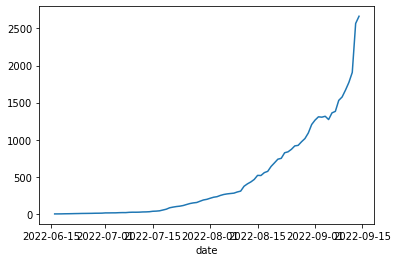

In [167]:
rc.groupby("date").agg({"profit_margin":"prod"}).profit_margin.cumprod().plot()

In [168]:
pd.set_option("display.max_rows",500)

In [169]:
rc.groupby("date").agg({"profit_margin":"prod"}).describe(percentiles=[i/10 for i in range(1,10)])

profit_margin
count      91.000000
mean        1.094071
std         0.093113
min         0.966505
10%         1.015027
20%         1.033720
30%         1.045026
40%         1.058956
50%         1.071630
60%         1.079153
70%         1.105125
80%         1.122777
90%         1.207505
max         1.575103

In [170]:
rc["week"] = rc.time.dt.weekofyear

/tmp/ipykernel_289911/1803472142.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  rc["week"] = rc.time.dt.weekofyear
/tmp/ipykernel_289911/1803472142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc["week"] = rc.time.dt.weekofyear


In [171]:
rc

status                time    price   type   take_profit     stop_loss  \
1      Closed 2022-06-16 08:41:00  22066.6   long  22196.845184  22108.994193   
3      Closed 2022-06-16 08:43:00  22102.6  short  22048.351096  22101.425446   
5      Closed 2022-06-16 08:46:00  22033.7   long  22138.262210  22061.258565   
7      Closed 2022-06-16 08:48:00  21967.4   long  22104.825972  22030.298155   
9      Closed 2022-06-16 08:50:00  21935.8   long  22057.567765  21979.877101   
...       ...                 ...      ...    ...           ...           ...   
53099  Closed 2022-09-14 08:01:00  20350.0   long  20448.722368  20354.247406   
53101  Closed 2022-09-14 08:03:00  20373.1  short  20313.017492  20370.283459   
53103  Closed 2022-09-14 08:07:00  20348.3   long  20445.266433  20354.404616   
53105  Closed 2022-09-14 08:16:00  20336.2   long  20440.883154  20342.898583   
53107  Closed 2022-09-14 08:18:00  20324.4   long  20433.026366  20334.548413   

       take_profit_ratio  stop_loss_ratio result        date  binary_res  \
1               1.007493         0.999547   loss  2022-06-16           0   
3               1.004024         0.999219   loss  2022-06-16           0   
5               1.006622         0.999643   loss  2022-06-16           0   
7               1.006429         0.999664   loss  2022-06-16           0   
9               1.006702         0.999634   loss  2022-06-16           0   
...                  ...              ...    ...         ...         ...   
53099           1.008696         0.999415   loss  2022-09-14           0   
53101           1.004713         0.999088   loss  2022-09-14           0   
53103           1.008376         0.999450   loss  2022-09-14           0   
53105           1.009011         0.999381   loss  2022-09-14           0   
53107           1.009058         0.999375   loss  2022-09-14           0   

       profit_margin  week  
1           0.999397    24  
3           0.999069    24  
5           0.999493    24  
7           0.999514    24  
9           0.999484    24  
...              ...   ...  
53099       0.999265    37  
53101       0.998938    37  
53103       0.999300    37  
53105       0.999231    37  
53107       0.999226    37  

[26554 rows x 13 columns]

In [172]:
rc.groupby("week").agg({"profit_margin":"prod"})

profit_margin
week               
24         2.982680
25         2.825546
26         1.842664
27         1.539185
28         1.792410
29         2.662918
30         1.732575
31         1.396443
32         1.684379
33         1.588071
34         1.318091
35         1.352624
36         1.346430
37         1.502841

In [78]:
rc["profit"] = rc.profit_margin.cumprod()

/tmp/ipykernel_4564/105194822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rc["profit"] = rc.profit_margin.cumprod()


<AxesSubplot:>

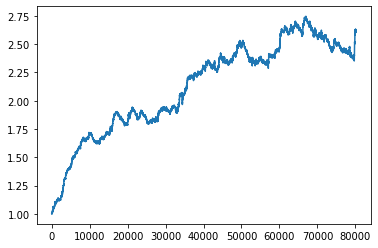

In [79]:
rc.profit.plot()

In [34]:
o1.shape
ohlc = o1[:4,:,:]
vol = o1[-1:,:,:]
ohlc = (ohlc-ohlc_mean)/ohlc_std
vol = (vol-vol_mean)/vol_std
on1 = np.concatenate((ohlc,vol),axis=0).reshape((1,*o1.shape))

In [37]:
torch.Tensor(on1).shape

torch.Size([1, 5, 32, 32])

In [43]:
dg =output.tolist()[0]

In [46]:
aa = dg[0]<dg[2]

In [47]:
aa

True